In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import regularizers

import numpy as np
import os
import random
import matplotlib.pyplot as plt

import importlib
import utils.ml_utils as ml_utils
from utils.clr_callback import CyclicLR
importlib.reload(ml_utils)

<module 'utils.ml_utils' from '/home/darylchang/ml-experiments/utils/ml_utils.py'>

## Init seeds and env variables (makes training deterministic)

In [2]:
ml_utils.init_env()

## Load data and define helpers

In [3]:
# Constants
IMG_SIZE = 128 # All images in the dataset will be resized to this size
BATCH_SIZE = 32 # Batch size

# Read in training and validation data
train, validation = ml_utils.load_batched_and_resized_dataset(
    dataset_name='cats_vs_dogs',
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE
)

Training Data Summary
No. of examples: 18610
Class: 0 :::: Count: 9378 :::: Percentage: 50.39226222461043
Class: 1 :::: Count: 9232 :::: Percentage: 49.60773777538957

Validation Data Summary
No. of examples: 4652
Class: 0 :::: Count: 2280 :::: Percentage: 49.011177987962164
Class: 1 :::: Count: 2372 :::: Percentage: 50.988822012037836


In [4]:
# Define early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Load model states
model_state_by_param_sgd = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_sgd')
model_state_by_param_sgd_2 = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_sgd_2')
model_state_by_param_sgd_3 = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_sgd_3')
model_state_by_param_rms = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_rms')
model_state_by_param_adam = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_adam')
model_state_by_param_adam_2 = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_adam_2')
model_state_by_param_adagrad = ml_utils.load_model_state('optimizers/new_base_model_model_state_by_param_adagrad')
model_state_triangular_clr_by_param = ml_utils.load_model_state('optimizers/new_base_model_model_state_triangular_clr')

## SGD

In [27]:
# Define constants
learning_rates = np.power(10, np.linspace(-3, 0.5, 8))
momentums = [0, 0.5, 0.9, 0.95]

In [10]:
model_state_by_param_sgd = {}

for learning_rate in learning_rates:
    for momentum in momentums:
        print("Learning rate: {}, momentum: {}".format(learning_rate, momentum))
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
        model = ml_utils.build_model(optimizer=optimizer)
        mc = keras.callbacks.ModelCheckpoint(
            'pickled_objects/optimizers/new_base_model_sgd_lr_{}_momentum_{}_best_model.h5'.format(learning_rate, momentum),
            monitor='val_loss',
            mode='min',
            verbose=1,
            save_best_only=True,
        )
        model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)] = ml_utils.train_model(
            model,
            train,
            validation,
            epochs=2000,
            extra_callbacks=[es, mc],
        )

Learning rate: 0.001, momentum: 0
Epoch 1/2000
    582/Unknown - 27s 47ms/step - loss: 1.0693 - accuracy: 0.5206
Epoch 00001: val_loss improved from inf to 0.77138, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0_best_model.h5
582/582 [==============================] - 34s 58ms/step - loss: 1.0693 - accuracy: 0.5206 - val_loss: 0.7714 - val_accuracy: 0.4925
Epoch 2/2000
579/582 [============================>.] - ETA: 0s - loss: 0.9285 - accuracy: 0.5296
Epoch 00002: val_loss improved from 0.77138 to 0.76858, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.9279 - accuracy: 0.5294 - val_loss: 0.7686 - val_accuracy: 0.5000
Epoch 3/2000
581/582 [============================>.] - ETA: 0s - loss: 0.8167 - accuracy: 0.5387
Epoch 00003: val_loss improved from 0.76858 to 0.75196, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.00

Epoch 24/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6367 - accuracy: 0.6334
Epoch 00024: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 26ms/step - loss: 0.6366 - accuracy: 0.6334 - val_loss: 0.6781 - val_accuracy: 0.5795
Epoch 25/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6359 - accuracy: 0.6363
Epoch 00025: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 26ms/step - loss: 0.6358 - accuracy: 0.6362 - val_loss: 0.6839 - val_accuracy: 0.5795
Epoch 26/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6333 - accuracy: 0.6380
Epoch 00026: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 26ms/step - loss: 0.6333 - accuracy: 0.6379 - val_loss: 0.6797 - val_accuracy: 0.5810
Epoch 27/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.6400
Epoch 00027: val_loss did not improve from 0.67455
5

Epoch 53/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5823 - accuracy: 0.6909
Epoch 00053: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 26ms/step - loss: 0.5823 - accuracy: 0.6908 - val_loss: 0.7135 - val_accuracy: 0.5821
Epoch 54/2000
581/582 [============================>.] - ETA: 0s - loss: 0.5817 - accuracy: 0.6913
Epoch 00054: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 26ms/step - loss: 0.5818 - accuracy: 0.6912 - val_loss: 0.6940 - val_accuracy: 0.5946
Epoch 55/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5799 - accuracy: 0.6934
Epoch 00055: val_loss did not improve from 0.67455
582/582 [==============================] - 15s 25ms/step - loss: 0.5799 - accuracy: 0.6933 - val_loss: 0.7052 - val_accuracy: 0.5907
Epoch 56/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5783 - accuracy: 0.6913
Epoch 00056: val_loss did not improve from 0.67455
5

Epoch 8/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6653 - accuracy: 0.5969
Epoch 00008: val_loss improved from 0.66886 to 0.66791, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6651 - accuracy: 0.5969 - val_loss: 0.6679 - val_accuracy: 0.5849
Epoch 9/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6610 - accuracy: 0.6038
Epoch 00009: val_loss improved from 0.66791 to 0.66758, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6609 - accuracy: 0.6039 - val_loss: 0.6676 - val_accuracy: 0.5825
Epoch 10/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6536 - accuracy: 0.6093
Epoch 00010: val_loss did not improve from 0.66758
582/582 [==============================] - 15s 26ms/step - loss: 0.6534 - accura

Epoch 36/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7166
Epoch 00036: val_loss did not improve from 0.66268
582/582 [==============================] - 15s 26ms/step - loss: 0.5558 - accuracy: 0.7164 - val_loss: 0.9526 - val_accuracy: 0.5408
Epoch 37/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5570 - accuracy: 0.7127
Epoch 00037: val_loss did not improve from 0.66268
582/582 [==============================] - 15s 26ms/step - loss: 0.5572 - accuracy: 0.7125 - val_loss: 1.0012 - val_accuracy: 0.5372
Epoch 38/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7141
Epoch 00038: val_loss did not improve from 0.66268
582/582 [==============================] - 15s 26ms/step - loss: 0.5553 - accuracy: 0.7138 - val_loss: 0.9779 - val_accuracy: 0.5464
Epoch 39/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7162
Epoch 00039: val_loss did not improve from 0.66268
5

579/582 [============================>.] - ETA: 0s - loss: 0.4757 - accuracy: 0.7754
Epoch 00030: val_loss did not improve from 0.58983
582/582 [==============================] - 15s 26ms/step - loss: 0.4757 - accuracy: 0.7754 - val_loss: 0.7748 - val_accuracy: 0.6567
Epoch 31/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4707 - accuracy: 0.7810
Epoch 00031: val_loss did not improve from 0.58983
582/582 [==============================] - 15s 26ms/step - loss: 0.4707 - accuracy: 0.7808 - val_loss: 0.5933 - val_accuracy: 0.7077
Epoch 32/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4662 - accuracy: 0.7792
Epoch 00032: val_loss improved from 0.58983 to 0.57988, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.4665 - accuracy: 0.7789 - val_loss: 0.5799 - val_accuracy: 0.7169
Epoch 33/2000
580/582 [============================>.] - ETA: 

Epoch 57/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4056 - accuracy: 0.8152
Epoch 00057: val_loss did not improve from 0.48174
582/582 [==============================] - 15s 26ms/step - loss: 0.4056 - accuracy: 0.8152 - val_loss: 0.5259 - val_accuracy: 0.7616
Epoch 58/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4032 - accuracy: 0.8167
Epoch 00058: val_loss did not improve from 0.48174
582/582 [==============================] - 15s 26ms/step - loss: 0.4031 - accuracy: 0.8166 - val_loss: 0.5453 - val_accuracy: 0.7517
Epoch 59/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4005 - accuracy: 0.8208
Epoch 00059: val_loss did not improve from 0.48174
582/582 [==============================] - 15s 26ms/step - loss: 0.4004 - accuracy: 0.8209 - val_loss: 0.5104 - val_accuracy: 0.7573
Epoch 60/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3992 - accuracy: 0.8202
Epoch 00060: val_loss did not improve from 0.48174
5

Epoch 86/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.8403
Epoch 00086: val_loss did not improve from 0.42521
582/582 [==============================] - 15s 26ms/step - loss: 0.3670 - accuracy: 0.8405 - val_loss: 0.5493 - val_accuracy: 0.7524
Epoch 87/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8363
Epoch 00087: val_loss did not improve from 0.42521
582/582 [==============================] - 15s 26ms/step - loss: 0.3679 - accuracy: 0.8364 - val_loss: 0.5473 - val_accuracy: 0.7676
Epoch 88/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3657 - accuracy: 0.8396
Epoch 00088: val_loss improved from 0.42521 to 0.42491, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3655 - accuracy: 0.8396 - val_loss: 0.4249 - val_accuracy: 0.8018
Epoch 89/2000
581/582 [=========================

Epoch 114/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8446
Epoch 00114: val_loss did not improve from 0.37877
582/582 [==============================] - 15s 26ms/step - loss: 0.3515 - accuracy: 0.8447 - val_loss: 0.4947 - val_accuracy: 0.7883
Epoch 115/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3450 - accuracy: 0.8482
Epoch 00115: val_loss did not improve from 0.37877
582/582 [==============================] - 15s 26ms/step - loss: 0.3447 - accuracy: 0.8483 - val_loss: 0.4484 - val_accuracy: 0.8078
Epoch 116/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3411 - accuracy: 0.8505
Epoch 00116: val_loss did not improve from 0.37877
582/582 [==============================] - 15s 26ms/step - loss: 0.3410 - accuracy: 0.8506 - val_loss: 0.4366 - val_accuracy: 0.8141
Epoch 117/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3473 - accuracy: 0.8464
Epoch 00117: val_loss did not improve from 0.378

Epoch 170/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3103 - accuracy: 0.8656
Epoch 00170: val_loss did not improve from 0.34014
582/582 [==============================] - 15s 25ms/step - loss: 0.3101 - accuracy: 0.8657 - val_loss: 0.3607 - val_accuracy: 0.8435
Epoch 171/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8656
Epoch 00171: val_loss did not improve from 0.34014
582/582 [==============================] - 15s 26ms/step - loss: 0.3116 - accuracy: 0.8655 - val_loss: 0.3708 - val_accuracy: 0.8448
Epoch 172/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.8647
Epoch 00172: val_loss did not improve from 0.34014
582/582 [==============================] - 15s 26ms/step - loss: 0.3134 - accuracy: 0.8645 - val_loss: 0.3728 - val_accuracy: 0.8454
Epoch 173/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3070 - accuracy: 0.8690
Epoch 00173: val_loss did not improve from 0.340

579/582 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8767
Epoch 00226: val_loss improved from 0.30540 to 0.29663, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2914 - accuracy: 0.8767 - val_loss: 0.2966 - val_accuracy: 0.8721
Epoch 227/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.8772
Epoch 00227: val_loss did not improve from 0.29663
582/582 [==============================] - 15s 26ms/step - loss: 0.2906 - accuracy: 0.8774 - val_loss: 0.3279 - val_accuracy: 0.8603
Epoch 228/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2903 - accuracy: 0.8759
Epoch 00228: val_loss did not improve from 0.29663
582/582 [==============================] - 15s 26ms/step - loss: 0.2901 - accuracy: 0.8760 - val_loss: 0.3256 - val_accuracy: 0.8575
Epoch 229/2000
580/582 [============================>.] - ET

580/582 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8805
Epoch 00282: val_loss did not improve from 0.27618
582/582 [==============================] - 15s 26ms/step - loss: 0.2738 - accuracy: 0.8807 - val_loss: 0.3243 - val_accuracy: 0.8588
Epoch 283/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.8836
Epoch 00283: val_loss did not improve from 0.27618
582/582 [==============================] - 15s 26ms/step - loss: 0.2751 - accuracy: 0.8837 - val_loss: 0.2952 - val_accuracy: 0.8745
Epoch 284/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8854
Epoch 00284: val_loss did not improve from 0.27618
582/582 [==============================] - 15s 26ms/step - loss: 0.2753 - accuracy: 0.8855 - val_loss: 0.2866 - val_accuracy: 0.8760
Epoch 285/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.8809
Epoch 00285: val_loss did not improve from 0.27618
582/582 [===

Epoch 310/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.8834
Epoch 00310: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2727 - accuracy: 0.8834 - val_loss: 0.2867 - val_accuracy: 0.8777
Epoch 311/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.8858
Epoch 00311: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2684 - accuracy: 0.8859 - val_loss: 0.2924 - val_accuracy: 0.8719
Epoch 312/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2692 - accuracy: 0.8840
Epoch 00312: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2693 - accuracy: 0.8840 - val_loss: 0.2708 - val_accuracy: 0.8841
Epoch 313/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.8896
Epoch 00313: val_loss did not improve from 0.264

Epoch 339/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2642 - accuracy: 0.8875
Epoch 00339: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2638 - accuracy: 0.8875 - val_loss: 0.2671 - val_accuracy: 0.8841
Epoch 340/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2602 - accuracy: 0.8891
Epoch 00340: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2599 - accuracy: 0.8891 - val_loss: 0.2838 - val_accuracy: 0.8785
Epoch 341/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2588 - accuracy: 0.8888
Epoch 00341: val_loss did not improve from 0.26411
582/582 [==============================] - 15s 26ms/step - loss: 0.2589 - accuracy: 0.8888 - val_loss: 0.2649 - val_accuracy: 0.8874
Epoch 342/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2632 - accuracy: 0.8880
Epoch 00342: val_loss did not improve from 0.264

580/582 [============================>.] - ETA: 0s - loss: 0.2497 - accuracy: 0.8955
Epoch 00395: val_loss improved from 0.24475 to 0.24333, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.001_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2498 - accuracy: 0.8955 - val_loss: 0.2433 - val_accuracy: 0.8972
Epoch 396/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8939
Epoch 00396: val_loss did not improve from 0.24333
582/582 [==============================] - 15s 25ms/step - loss: 0.2519 - accuracy: 0.8939 - val_loss: 0.2673 - val_accuracy: 0.8887
Epoch 397/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.8943
Epoch 00397: val_loss did not improve from 0.24333
582/582 [==============================] - 15s 25ms/step - loss: 0.2527 - accuracy: 0.8944 - val_loss: 0.2525 - val_accuracy: 0.8921
Epoch 398/2000
580/582 [============================>.] - ET

Epoch 423/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.8970
Epoch 00423: val_loss did not improve from 0.23542
582/582 [==============================] - 15s 25ms/step - loss: 0.2496 - accuracy: 0.8968 - val_loss: 0.2363 - val_accuracy: 0.8998
Epoch 424/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.8928
Epoch 00424: val_loss did not improve from 0.23542
582/582 [==============================] - 15s 25ms/step - loss: 0.2489 - accuracy: 0.8929 - val_loss: 0.2461 - val_accuracy: 0.8949
Epoch 425/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.8934
Epoch 00425: val_loss did not improve from 0.23542
582/582 [==============================] - 15s 25ms/step - loss: 0.2504 - accuracy: 0.8935 - val_loss: 0.2511 - val_accuracy: 0.8955
Epoch 426/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8931
Epoch 00426: val_loss did not improve from 0.235

Epoch 480/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2460 - accuracy: 0.8994
Epoch 00480: val_loss did not improve from 0.23162
582/582 [==============================] - 15s 25ms/step - loss: 0.2462 - accuracy: 0.8994 - val_loss: 0.2467 - val_accuracy: 0.8949
Epoch 481/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.8999
Epoch 00481: val_loss did not improve from 0.23162
582/582 [==============================] - 15s 25ms/step - loss: 0.2368 - accuracy: 0.9001 - val_loss: 0.2415 - val_accuracy: 0.8990
Epoch 482/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.8979
Epoch 00482: val_loss did not improve from 0.23162
582/582 [==============================] - 15s 25ms/step - loss: 0.2402 - accuracy: 0.8980 - val_loss: 0.2466 - val_accuracy: 0.8957
Epoch 483/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2437 - accuracy: 0.8969
Epoch 00483: val_loss did not improve from 0.231

580/582 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.8982
Epoch 00536: val_loss did not improve from 0.22692
582/582 [==============================] - 15s 25ms/step - loss: 0.2418 - accuracy: 0.8982 - val_loss: 0.2575 - val_accuracy: 0.8880
Epoch 537/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9006
Epoch 00537: val_loss did not improve from 0.22692
582/582 [==============================] - 15s 26ms/step - loss: 0.2380 - accuracy: 0.9007 - val_loss: 0.2312 - val_accuracy: 0.9033
Epoch 538/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.8993
Epoch 00538: val_loss did not improve from 0.22692
582/582 [==============================] - 15s 26ms/step - loss: 0.2317 - accuracy: 0.8994 - val_loss: 0.2454 - val_accuracy: 0.8951
Epoch 539/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2361 - accuracy: 0.9006
Epoch 00539: val_loss did not improve from 0.22692
582/582 [===

Epoch 565/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9037
Epoch 00565: val_loss did not improve from 0.22314
582/582 [==============================] - 15s 25ms/step - loss: 0.2331 - accuracy: 0.9038 - val_loss: 0.2325 - val_accuracy: 0.9035
Epoch 566/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9038
Epoch 00566: val_loss did not improve from 0.22314
582/582 [==============================] - 15s 25ms/step - loss: 0.2340 - accuracy: 0.9039 - val_loss: 0.2474 - val_accuracy: 0.8949
Epoch 567/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9052
Epoch 00567: val_loss did not improve from 0.22314
582/582 [==============================] - 15s 25ms/step - loss: 0.2278 - accuracy: 0.9055 - val_loss: 0.2451 - val_accuracy: 0.8983
Epoch 568/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9056
Epoch 00568: val_loss did not improve from 0.223

Epoch 622/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2270 - accuracy: 0.9046
Epoch 00622: val_loss did not improve from 0.21268
582/582 [==============================] - 15s 26ms/step - loss: 0.2268 - accuracy: 0.9047 - val_loss: 0.2358 - val_accuracy: 0.9018
Epoch 623/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2258 - accuracy: 0.9045
Epoch 00623: val_loss did not improve from 0.21268
582/582 [==============================] - 15s 25ms/step - loss: 0.2258 - accuracy: 0.9046 - val_loss: 0.2216 - val_accuracy: 0.9095
Epoch 624/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9043
Epoch 00624: val_loss did not improve from 0.21268
582/582 [==============================] - 15s 25ms/step - loss: 0.2278 - accuracy: 0.9045 - val_loss: 0.2242 - val_accuracy: 0.9095
Epoch 625/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2223 - accuracy: 0.9075
Epoch 00625: val_loss did not improve from 0.212

Epoch 10/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5870 - accuracy: 0.6909
Epoch 00010: val_loss did not improve from 0.62991
582/582 [==============================] - 15s 25ms/step - loss: 0.5867 - accuracy: 0.6912 - val_loss: 0.7038 - val_accuracy: 0.6025
Epoch 11/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5719 - accuracy: 0.7028
Epoch 00011: val_loss did not improve from 0.62991
582/582 [==============================] - 15s 25ms/step - loss: 0.5719 - accuracy: 0.7027 - val_loss: 0.6760 - val_accuracy: 0.6135
Epoch 12/2000
581/582 [============================>.] - ETA: 0s - loss: 0.5604 - accuracy: 0.7164
Epoch 00012: val_loss did not improve from 0.62991
582/582 [==============================] - 15s 25ms/step - loss: 0.5603 - accuracy: 0.7164 - val_loss: 0.6554 - val_accuracy: 0.6232
Epoch 13/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7279
Epoch 00013: val_loss did not improve from 0.62991
5

Epoch 66/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3721 - accuracy: 0.8401
Epoch 00066: val_loss did not improve from 0.47683
582/582 [==============================] - 15s 25ms/step - loss: 0.3718 - accuracy: 0.8403 - val_loss: 0.4931 - val_accuracy: 0.7741
Epoch 67/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3734 - accuracy: 0.8373
Epoch 00067: val_loss did not improve from 0.47683
582/582 [==============================] - 15s 26ms/step - loss: 0.3733 - accuracy: 0.8373 - val_loss: 0.5855 - val_accuracy: 0.7414
Epoch 68/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3711 - accuracy: 0.8362
Epoch 00068: val_loss did not improve from 0.47683
582/582 [==============================] - 15s 25ms/step - loss: 0.3707 - accuracy: 0.8363 - val_loss: 0.5728 - val_accuracy: 0.7519
Epoch 69/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3696 - accuracy: 0.8357
Epoch 00069: val_loss did not improve from 0.47683
5

Epoch 94/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3371 - accuracy: 0.8549
Epoch 00094: val_loss did not improve from 0.38272
582/582 [==============================] - 15s 25ms/step - loss: 0.3370 - accuracy: 0.8549 - val_loss: 0.5231 - val_accuracy: 0.7810
Epoch 95/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.8559
Epoch 00095: val_loss did not improve from 0.38272
582/582 [==============================] - 15s 25ms/step - loss: 0.3324 - accuracy: 0.8560 - val_loss: 0.5270 - val_accuracy: 0.7706
Epoch 96/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3385 - accuracy: 0.8536
Epoch 00096: val_loss did not improve from 0.38272
582/582 [==============================] - 15s 25ms/step - loss: 0.3385 - accuracy: 0.8537 - val_loss: 0.4361 - val_accuracy: 0.8029
Epoch 97/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3377 - accuracy: 0.8536
Epoch 00097: val_loss did not improve from 0.38272
5

Epoch 150/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8749
Epoch 00150: val_loss did not improve from 0.30215
582/582 [==============================] - 15s 25ms/step - loss: 0.2969 - accuracy: 0.8751 - val_loss: 0.3156 - val_accuracy: 0.8661
Epoch 151/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.8754
Epoch 00151: val_loss did not improve from 0.30215
582/582 [==============================] - 15s 25ms/step - loss: 0.2948 - accuracy: 0.8754 - val_loss: 0.3961 - val_accuracy: 0.8330
Epoch 152/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3016 - accuracy: 0.8714
Epoch 00152: val_loss did not improve from 0.30215
582/582 [==============================] - 15s 26ms/step - loss: 0.3014 - accuracy: 0.8714 - val_loss: 0.3620 - val_accuracy: 0.8431
Epoch 153/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2984 - accuracy: 0.8727
Epoch 00153: val_loss did not improve from 0.302

Epoch 179/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2858 - accuracy: 0.8753
Epoch 00179: val_loss did not improve from 0.29826
582/582 [==============================] - 15s 25ms/step - loss: 0.2857 - accuracy: 0.8754 - val_loss: 0.3366 - val_accuracy: 0.8564
Epoch 180/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2838 - accuracy: 0.8801
Epoch 00180: val_loss did not improve from 0.29826
582/582 [==============================] - 15s 25ms/step - loss: 0.2836 - accuracy: 0.8802 - val_loss: 0.3743 - val_accuracy: 0.8418
Epoch 181/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8814
Epoch 00181: val_loss did not improve from 0.29826
582/582 [==============================] - 15s 25ms/step - loss: 0.2793 - accuracy: 0.8816 - val_loss: 0.3164 - val_accuracy: 0.8680
Epoch 182/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2853 - accuracy: 0.8801
Epoch 00182: val_loss improved from 0.29826 to 0

Epoch 207/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8854
Epoch 00207: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 25ms/step - loss: 0.2701 - accuracy: 0.8857 - val_loss: 0.3410 - val_accuracy: 0.8616
Epoch 208/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.8862
Epoch 00208: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 25ms/step - loss: 0.2764 - accuracy: 0.8863 - val_loss: 0.3067 - val_accuracy: 0.8704
Epoch 209/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.8843
Epoch 00209: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 25ms/step - loss: 0.2751 - accuracy: 0.8845 - val_loss: 0.3128 - val_accuracy: 0.8749
Epoch 210/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2739 - accuracy: 0.8818
Epoch 00210: val_loss did not improve from 0.262

Epoch 236/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2685 - accuracy: 0.8893
Epoch 00236: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 26ms/step - loss: 0.2684 - accuracy: 0.8893 - val_loss: 0.2929 - val_accuracy: 0.8807
Epoch 237/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.8854
Epoch 00237: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 25ms/step - loss: 0.2710 - accuracy: 0.8856 - val_loss: 0.2666 - val_accuracy: 0.8889
Epoch 238/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2640 - accuracy: 0.8879
Epoch 00238: val_loss did not improve from 0.26280
582/582 [==============================] - 15s 25ms/step - loss: 0.2637 - accuracy: 0.8880 - val_loss: 0.3052 - val_accuracy: 0.8742
Epoch 239/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2691 - accuracy: 0.8868
Epoch 00239: val_loss did not improve from 0.262

Epoch 18/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6015 - accuracy: 0.6773
Epoch 00018: val_loss did not improve from 0.69388
582/582 [==============================] - 15s 25ms/step - loss: 0.6012 - accuracy: 0.6774 - val_loss: 0.8232 - val_accuracy: 0.5355
Epoch 19/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6010 - accuracy: 0.6775
Epoch 00019: val_loss did not improve from 0.69388
582/582 [==============================] - 15s 25ms/step - loss: 0.6008 - accuracy: 0.6776 - val_loss: 0.7904 - val_accuracy: 0.5443
Epoch 20/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5937 - accuracy: 0.6836
Epoch 00020: val_loss did not improve from 0.69388
582/582 [==============================] - 15s 25ms/step - loss: 0.5934 - accuracy: 0.6836 - val_loss: 0.8315 - val_accuracy: 0.5376
Epoch 21/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5897 - accuracy: 0.6859
Epoch 00021: val_loss did not improve from 0.69388
5

Epoch 73/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4605 - accuracy: 0.7842
Epoch 00073: val_loss did not improve from 0.52773
582/582 [==============================] - 15s 25ms/step - loss: 0.4606 - accuracy: 0.7842 - val_loss: 0.6044 - val_accuracy: 0.7083
Epoch 74/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4633 - accuracy: 0.7851
Epoch 00074: val_loss did not improve from 0.52773
582/582 [==============================] - 15s 25ms/step - loss: 0.4634 - accuracy: 0.7851 - val_loss: 0.5965 - val_accuracy: 0.7089
Epoch 75/2000
581/582 [============================>.] - ETA: 0s - loss: 0.4631 - accuracy: 0.7831
Epoch 00075: val_loss improved from 0.52773 to 0.50843, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.4630 - accuracy: 0.7832 - val_loss: 0.5084 - val_accuracy: 0.7521
Epoch 76/2000
579/582 [===========

Epoch 129/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4188 - accuracy: 0.8094
Epoch 00129: val_loss did not improve from 0.45181
582/582 [==============================] - 15s 25ms/step - loss: 0.4187 - accuracy: 0.8094 - val_loss: 0.5079 - val_accuracy: 0.7607
Epoch 130/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4158 - accuracy: 0.8128
Epoch 00130: val_loss did not improve from 0.45181
582/582 [==============================] - 15s 25ms/step - loss: 0.4158 - accuracy: 0.8126 - val_loss: 0.4709 - val_accuracy: 0.7786
Epoch 131/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.8107
Epoch 00131: val_loss did not improve from 0.45181
582/582 [==============================] - 15s 25ms/step - loss: 0.4150 - accuracy: 0.8109 - val_loss: 0.4780 - val_accuracy: 0.7801
Epoch 132/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4146 - accuracy: 0.8099
Epoch 00132: val_loss did not improve from 0.451

Epoch 158/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3979 - accuracy: 0.8189
Epoch 00158: val_loss did not improve from 0.41465
582/582 [==============================] - 15s 25ms/step - loss: 0.3979 - accuracy: 0.8190 - val_loss: 0.5342 - val_accuracy: 0.7592
Epoch 159/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4047 - accuracy: 0.8197
Epoch 00159: val_loss did not improve from 0.41465
582/582 [==============================] - 15s 25ms/step - loss: 0.4045 - accuracy: 0.8198 - val_loss: 0.4951 - val_accuracy: 0.7782
Epoch 160/2000
581/582 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8182
Epoch 00160: val_loss did not improve from 0.41465
582/582 [==============================] - 15s 26ms/step - loss: 0.4013 - accuracy: 0.8182 - val_loss: 0.5023 - val_accuracy: 0.7726
Epoch 161/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4006 - accuracy: 0.8188
Epoch 00161: val_loss did not improve from 0.414

Epoch 00186: early stopping
Learning rate: 0.0031622776601683794, momentum: 0.5
Epoch 1/2000
    582/Unknown - 16s 27ms/step - loss: 0.8356 - accuracy: 0.5383
Epoch 00001: val_loss improved from inf to 0.70212, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 17s 30ms/step - loss: 0.8356 - accuracy: 0.5383 - val_loss: 0.7021 - val_accuracy: 0.5189
Epoch 2/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6800 - accuracy: 0.5761
Epoch 00002: val_loss did not improve from 0.70212
582/582 [==============================] - 15s 25ms/step - loss: 0.6799 - accuracy: 0.5761 - val_loss: 0.7152 - val_accuracy: 0.5191
Epoch 3/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6649 - accuracy: 0.6051
Epoch 00003: val_loss did not improve from 0.70212
582/582 [==============================] - 15s 25ms/step - loss: 0.6649 - accuracy: 0.6049 - val_loss: 0.7021 -

Epoch 54/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4374 - accuracy: 0.7978
Epoch 00054: val_loss did not improve from 0.52035
582/582 [==============================] - 15s 25ms/step - loss: 0.4371 - accuracy: 0.7981 - val_loss: 0.5242 - val_accuracy: 0.7597
Epoch 55/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4381 - accuracy: 0.7997
Epoch 00055: val_loss improved from 0.52035 to 0.50241, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4382 - accuracy: 0.7997 - val_loss: 0.5024 - val_accuracy: 0.7661
Epoch 56/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4321 - accuracy: 0.8027
Epoch 00056: val_loss did not improve from 0.50241
582/582 [==============================] - 15s 25ms/step - loss: 0.4321 - accuracy: 0.8025 - val_loss: 0.5771 - val_accuracy: 0.7425
Epoch 57/2000
579/582 [=========

Epoch 81/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3940 - accuracy: 0.8211
Epoch 00081: val_loss did not improve from 0.44534
582/582 [==============================] - 15s 25ms/step - loss: 0.3939 - accuracy: 0.8212 - val_loss: 0.5115 - val_accuracy: 0.7756
Epoch 82/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3964 - accuracy: 0.8224
Epoch 00082: val_loss did not improve from 0.44534
582/582 [==============================] - 15s 25ms/step - loss: 0.3963 - accuracy: 0.8224 - val_loss: 0.4648 - val_accuracy: 0.7988
Epoch 83/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3978 - accuracy: 0.8197
Epoch 00083: val_loss did not improve from 0.44534
582/582 [==============================] - 15s 25ms/step - loss: 0.3979 - accuracy: 0.8197 - val_loss: 0.4833 - val_accuracy: 0.7857
Epoch 84/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3988 - accuracy: 0.8232
Epoch 00084: val_loss did not improve from 0.44534
5

Epoch 108/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3770 - accuracy: 0.8305
Epoch 00108: val_loss did not improve from 0.40748
582/582 [==============================] - 15s 25ms/step - loss: 0.3769 - accuracy: 0.8306 - val_loss: 0.4201 - val_accuracy: 0.8147
Epoch 109/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3737 - accuracy: 0.8350
Epoch 00109: val_loss improved from 0.40748 to 0.40183, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3734 - accuracy: 0.8350 - val_loss: 0.4018 - val_accuracy: 0.8280
Epoch 110/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8357
Epoch 00110: val_loss did not improve from 0.40183
582/582 [==============================] - 15s 25ms/step - loss: 0.3751 - accuracy: 0.8356 - val_loss: 0.4567 - val_accuracy: 0.8001
Epoch 111/2000
579/582 [=====

Epoch 164/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3367 - accuracy: 0.8495
Epoch 00164: val_loss did not improve from 0.35360
582/582 [==============================] - 15s 25ms/step - loss: 0.3364 - accuracy: 0.8497 - val_loss: 0.3970 - val_accuracy: 0.8265
Epoch 165/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3294 - accuracy: 0.8547
Epoch 00165: val_loss did not improve from 0.35360
582/582 [==============================] - 15s 25ms/step - loss: 0.3289 - accuracy: 0.8548 - val_loss: 0.3879 - val_accuracy: 0.8317
Epoch 166/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8557
Epoch 00166: val_loss did not improve from 0.35360
582/582 [==============================] - 15s 25ms/step - loss: 0.3357 - accuracy: 0.8557 - val_loss: 0.3917 - val_accuracy: 0.8351
Epoch 167/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3268 - accuracy: 0.8575
Epoch 00167: val_loss did not improve from 0.353

Epoch 219/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3091 - accuracy: 0.8656
Epoch 00219: val_loss did not improve from 0.29178
582/582 [==============================] - 15s 25ms/step - loss: 0.3087 - accuracy: 0.8658 - val_loss: 0.3329 - val_accuracy: 0.8616
Epoch 220/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3079 - accuracy: 0.8674
Epoch 00220: val_loss did not improve from 0.29178
582/582 [==============================] - 15s 25ms/step - loss: 0.3076 - accuracy: 0.8675 - val_loss: 0.3206 - val_accuracy: 0.8646
Epoch 221/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3074 - accuracy: 0.8701
Epoch 00221: val_loss did not improve from 0.29178
582/582 [==============================] - 15s 25ms/step - loss: 0.3072 - accuracy: 0.8701 - val_loss: 0.3190 - val_accuracy: 0.8680
Epoch 222/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8664
Epoch 00222: val_loss did not improve from 0.291

Epoch 248/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8746
Epoch 00248: val_loss did not improve from 0.27894
582/582 [==============================] - 15s 25ms/step - loss: 0.2972 - accuracy: 0.8747 - val_loss: 0.3273 - val_accuracy: 0.8663
Epoch 249/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2976 - accuracy: 0.8703
Epoch 00249: val_loss did not improve from 0.27894
582/582 [==============================] - 15s 25ms/step - loss: 0.2974 - accuracy: 0.8704 - val_loss: 0.3035 - val_accuracy: 0.8751
Epoch 250/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2984 - accuracy: 0.8716
Epoch 00250: val_loss did not improve from 0.27894
582/582 [==============================] - 15s 25ms/step - loss: 0.2981 - accuracy: 0.8716 - val_loss: 0.3024 - val_accuracy: 0.8773
Epoch 251/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8715
Epoch 00251: val_loss did not improve from 0.278

581/582 [============================>.] - ETA: 0s - loss: 0.2921 - accuracy: 0.8759
Epoch 00276: val_loss did not improve from 0.27013
582/582 [==============================] - 15s 26ms/step - loss: 0.2918 - accuracy: 0.8760 - val_loss: 0.3005 - val_accuracy: 0.8775
Epoch 277/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2890 - accuracy: 0.8754
Epoch 00277: val_loss did not improve from 0.27013
582/582 [==============================] - 15s 26ms/step - loss: 0.2886 - accuracy: 0.8757 - val_loss: 0.3283 - val_accuracy: 0.8656
Epoch 278/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.8706
Epoch 00278: val_loss did not improve from 0.27013
582/582 [==============================] - 15s 25ms/step - loss: 0.2948 - accuracy: 0.8707 - val_loss: 0.2762 - val_accuracy: 0.8880
Epoch 279/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2849 - accuracy: 0.8752
Epoch 00279: val_loss did not improve from 0.27013
582/582 [===

Epoch 332/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2747 - accuracy: 0.8816
Epoch 00332: val_loss did not improve from 0.25615
582/582 [==============================] - 15s 25ms/step - loss: 0.2748 - accuracy: 0.8815 - val_loss: 0.2588 - val_accuracy: 0.8917
Epoch 333/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.8834
Epoch 00333: val_loss did not improve from 0.25615
582/582 [==============================] - 15s 25ms/step - loss: 0.2743 - accuracy: 0.8836 - val_loss: 0.2840 - val_accuracy: 0.8844
Epoch 334/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.8810
Epoch 00334: val_loss did not improve from 0.25615
582/582 [==============================] - 15s 25ms/step - loss: 0.2762 - accuracy: 0.8809 - val_loss: 0.3100 - val_accuracy: 0.8745
Epoch 335/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8821
Epoch 00335: val_loss did not improve from 0.256

581/582 [============================>.] - ETA: 0s - loss: 0.2717 - accuracy: 0.8826
Epoch 00360: val_loss did not improve from 0.24420
582/582 [==============================] - 15s 25ms/step - loss: 0.2716 - accuracy: 0.8826 - val_loss: 0.2637 - val_accuracy: 0.8940
Epoch 361/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.8848
Epoch 00361: val_loss did not improve from 0.24420
582/582 [==============================] - 15s 25ms/step - loss: 0.2700 - accuracy: 0.8849 - val_loss: 0.2469 - val_accuracy: 0.8983
Epoch 362/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.8840
Epoch 00362: val_loss did not improve from 0.24420
582/582 [==============================] - 15s 25ms/step - loss: 0.2693 - accuracy: 0.8839 - val_loss: 0.2721 - val_accuracy: 0.8876
Epoch 363/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2673 - accuracy: 0.8857
Epoch 00363: val_loss did not improve from 0.24420
582/582 [===

Epoch 389/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2650 - accuracy: 0.8879
Epoch 00389: val_loss did not improve from 0.23607
582/582 [==============================] - 15s 25ms/step - loss: 0.2649 - accuracy: 0.8880 - val_loss: 0.2736 - val_accuracy: 0.8871
Epoch 390/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2627 - accuracy: 0.8881
Epoch 00390: val_loss did not improve from 0.23607
582/582 [==============================] - 15s 25ms/step - loss: 0.2623 - accuracy: 0.8883 - val_loss: 0.2689 - val_accuracy: 0.8899
Epoch 391/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.8870
Epoch 00391: val_loss did not improve from 0.23607
582/582 [==============================] - 15s 25ms/step - loss: 0.2682 - accuracy: 0.8869 - val_loss: 0.2401 - val_accuracy: 0.8990
Epoch 392/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2640 - accuracy: 0.8874
Epoch 00392: val_loss did not improve from 0.236

Epoch 418/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2585 - accuracy: 0.8906
Epoch 00418: val_loss did not improve from 0.22976
582/582 [==============================] - 15s 25ms/step - loss: 0.2584 - accuracy: 0.8908 - val_loss: 0.2342 - val_accuracy: 0.9050
Epoch 419/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.8887
Epoch 00419: val_loss did not improve from 0.22976
582/582 [==============================] - 15s 25ms/step - loss: 0.2652 - accuracy: 0.8887 - val_loss: 0.2356 - val_accuracy: 0.9018
Epoch 420/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2608 - accuracy: 0.8886
Epoch 00420: val_loss did not improve from 0.22976
582/582 [==============================] - 15s 25ms/step - loss: 0.2607 - accuracy: 0.8886 - val_loss: 0.2795 - val_accuracy: 0.8865
Epoch 421/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2611 - accuracy: 0.8889
Epoch 00421: val_loss did not improve from 0.229

Epoch 00446: early stopping
Learning rate: 0.0031622776601683794, momentum: 0.9
Epoch 1/2000
    582/Unknown - 15s 26ms/step - loss: 0.7556 - accuracy: 0.5547
Epoch 00001: val_loss improved from inf to 0.70948, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 17s 29ms/step - loss: 0.7556 - accuracy: 0.5547 - val_loss: 0.7095 - val_accuracy: 0.5374
Epoch 2/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.6040
Epoch 00002: val_loss improved from 0.70948 to 0.68795, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6820 - accuracy: 0.6042 - val_loss: 0.6879 - val_accuracy: 0.5664
Epoch 3/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6540 - accuracy: 0.6353
Epoch 00003: val_loss improved from 0.68795

Epoch 52/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3624 - accuracy: 0.8416
Epoch 00052: val_loss improved from 0.36898 to 0.33509, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3622 - accuracy: 0.8416 - val_loss: 0.3351 - val_accuracy: 0.8515
Epoch 53/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3553 - accuracy: 0.8456
Epoch 00053: val_loss did not improve from 0.33509
582/582 [==============================] - 15s 26ms/step - loss: 0.3551 - accuracy: 0.8457 - val_loss: 0.3771 - val_accuracy: 0.8315
Epoch 54/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8403
Epoch 00054: val_loss did not improve from 0.33509
582/582 [==============================] - 15s 25ms/step - loss: 0.3640 - accuracy: 0.8402 - val_loss: 0.3631 - val_accuracy: 0.8431
Epoch 55/2000
580/582 [=========

Epoch 80/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3243 - accuracy: 0.8630
Epoch 00080: val_loss did not improve from 0.30735
582/582 [==============================] - 15s 25ms/step - loss: 0.3242 - accuracy: 0.8631 - val_loss: 0.3233 - val_accuracy: 0.8515
Epoch 81/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8656
Epoch 00081: val_loss improved from 0.30735 to 0.29899, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3136 - accuracy: 0.8656 - val_loss: 0.2990 - val_accuracy: 0.8699
Epoch 82/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3177 - accuracy: 0.8640
Epoch 00082: val_loss improved from 0.29899 to 0.29190, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s

Epoch 106/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.8715
Epoch 00106: val_loss did not improve from 0.26508
582/582 [==============================] - 15s 25ms/step - loss: 0.2997 - accuracy: 0.8715 - val_loss: 0.2924 - val_accuracy: 0.8661
Epoch 107/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2974 - accuracy: 0.8740
Epoch 00107: val_loss did not improve from 0.26508
582/582 [==============================] - 15s 25ms/step - loss: 0.2972 - accuracy: 0.8742 - val_loss: 0.2879 - val_accuracy: 0.8663
Epoch 108/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2872 - accuracy: 0.8789
Epoch 00108: val_loss did not improve from 0.26508
582/582 [==============================] - 15s 25ms/step - loss: 0.2872 - accuracy: 0.8788 - val_loss: 0.2755 - val_accuracy: 0.8775
Epoch 109/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8776
Epoch 00109: val_loss did not improve from 0.265

580/582 [============================>.] - ETA: 0s - loss: 0.2740 - accuracy: 0.8835
Epoch 00134: val_loss did not improve from 0.24849
582/582 [==============================] - 15s 25ms/step - loss: 0.2742 - accuracy: 0.8832 - val_loss: 0.2873 - val_accuracy: 0.8734
Epoch 135/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2723 - accuracy: 0.8852
Epoch 00135: val_loss did not improve from 0.24849
582/582 [==============================] - 15s 25ms/step - loss: 0.2721 - accuracy: 0.8852 - val_loss: 0.2564 - val_accuracy: 0.8880
Epoch 136/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2751 - accuracy: 0.8846
Epoch 00136: val_loss did not improve from 0.24849
582/582 [==============================] - 15s 25ms/step - loss: 0.2749 - accuracy: 0.8847 - val_loss: 0.2823 - val_accuracy: 0.8708
Epoch 137/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.8846
Epoch 00137: val_loss did not improve from 0.24849
582/582 [===

Epoch 162/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2614 - accuracy: 0.8881
Epoch 00162: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2616 - accuracy: 0.8880 - val_loss: 0.3034 - val_accuracy: 0.8637
Epoch 163/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2679 - accuracy: 0.8857
Epoch 00163: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2679 - accuracy: 0.8857 - val_loss: 0.2612 - val_accuracy: 0.8856
Epoch 164/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.8891
Epoch 00164: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2635 - accuracy: 0.8891 - val_loss: 0.2458 - val_accuracy: 0.8908
Epoch 165/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.8912
Epoch 00165: val_loss did not improve from 0.232

Epoch 191/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2517 - accuracy: 0.8935
Epoch 00191: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2518 - accuracy: 0.8934 - val_loss: 0.2454 - val_accuracy: 0.8940
Epoch 192/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2542 - accuracy: 0.8896
Epoch 00192: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2540 - accuracy: 0.8897 - val_loss: 0.2496 - val_accuracy: 0.8917
Epoch 193/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.8966
Epoch 00193: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2499 - accuracy: 0.8968 - val_loss: 0.2484 - val_accuracy: 0.8897
Epoch 194/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2532 - accuracy: 0.8940
Epoch 00194: val_loss did not improve from 0.227

Epoch 220/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2456 - accuracy: 0.8981
Epoch 00220: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2457 - accuracy: 0.8980 - val_loss: 0.2480 - val_accuracy: 0.8895
Epoch 221/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2473 - accuracy: 0.8965
Epoch 00221: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 26ms/step - loss: 0.2474 - accuracy: 0.8965 - val_loss: 0.2454 - val_accuracy: 0.8960
Epoch 222/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.8938
Epoch 00222: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2507 - accuracy: 0.8938 - val_loss: 0.2432 - val_accuracy: 0.8895
Epoch 223/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2504 - accuracy: 0.8959
Epoch 00223: val_loss did not improve from 0.227

Epoch 249/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.9002
Epoch 00249: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2396 - accuracy: 0.9002 - val_loss: 0.2459 - val_accuracy: 0.8929
Epoch 250/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.8969
Epoch 00250: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2458 - accuracy: 0.8969 - val_loss: 0.2363 - val_accuracy: 0.8966
Epoch 251/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2374 - accuracy: 0.9015
Epoch 00251: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2377 - accuracy: 0.9013 - val_loss: 0.2501 - val_accuracy: 0.8917
Epoch 252/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2372 - accuracy: 0.8987
Epoch 00252: val_loss improved from 0.22368 to 0

Epoch 277/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2344 - accuracy: 0.9038
Epoch 00277: val_loss did not improve from 0.21709
582/582 [==============================] - 15s 25ms/step - loss: 0.2344 - accuracy: 0.9037 - val_loss: 0.2184 - val_accuracy: 0.9052
Epoch 278/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.9014
Epoch 00278: val_loss did not improve from 0.21709
582/582 [==============================] - 15s 25ms/step - loss: 0.2382 - accuracy: 0.9015 - val_loss: 0.2214 - val_accuracy: 0.9065
Epoch 279/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2300 - accuracy: 0.9039
Epoch 00279: val_loss did not improve from 0.21709
582/582 [==============================] - 15s 25ms/step - loss: 0.2298 - accuracy: 0.9039 - val_loss: 0.2254 - val_accuracy: 0.9033
Epoch 280/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9047
Epoch 00280: val_loss did not improve from 0.217

Epoch 306/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9006
Epoch 00306: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 26ms/step - loss: 0.2367 - accuracy: 0.9005 - val_loss: 0.2234 - val_accuracy: 0.9031
Epoch 307/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.9050
Epoch 00307: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2287 - accuracy: 0.9048 - val_loss: 0.2233 - val_accuracy: 0.9031
Epoch 308/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2267 - accuracy: 0.9071
Epoch 00308: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2267 - accuracy: 0.9070 - val_loss: 0.2471 - val_accuracy: 0.8897
Epoch 309/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9058
Epoch 00309: val_loss did not improve from 0.216

Epoch 2/2000
580/582 [============================>.] - ETA: 0s - loss: 0.7383 - accuracy: 0.5695
Epoch 00002: val_loss improved from 0.68121 to 0.63777, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.7383 - accuracy: 0.5694 - val_loss: 0.6378 - val_accuracy: 0.6531
Epoch 3/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6938 - accuracy: 0.6064
Epoch 00003: val_loss improved from 0.63777 to 0.61233, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6937 - accuracy: 0.6064 - val_loss: 0.6123 - val_accuracy: 0.6374
Epoch 4/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6603 - accuracy: 0.6360
Epoch 00004: val_loss improved from 0.61233 to 0.58236, saving model to pickled_objects/optimizers

Epoch 25/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4354 - accuracy: 0.7982
Epoch 00025: val_loss did not improve from 0.40671
582/582 [==============================] - 15s 25ms/step - loss: 0.4351 - accuracy: 0.7981 - val_loss: 0.4161 - val_accuracy: 0.8035
Epoch 26/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4366 - accuracy: 0.8018
Epoch 00026: val_loss improved from 0.40671 to 0.40128, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4363 - accuracy: 0.8019 - val_loss: 0.4013 - val_accuracy: 0.8190
Epoch 27/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4309 - accuracy: 0.8032
Epoch 00027: val_loss improved from 0.40128 to 0.40019, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.95_best_model.h5
582/582 [==============================] - 1

Epoch 51/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8413
Epoch 00051: val_loss did not improve from 0.33394
582/582 [==============================] - 15s 25ms/step - loss: 0.3604 - accuracy: 0.8414 - val_loss: 0.3805 - val_accuracy: 0.8325
Epoch 52/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3598 - accuracy: 0.8393
Epoch 00052: val_loss did not improve from 0.33394
582/582 [==============================] - 15s 25ms/step - loss: 0.3597 - accuracy: 0.8394 - val_loss: 0.3637 - val_accuracy: 0.8386
Epoch 53/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3597 - accuracy: 0.8426
Epoch 00053: val_loss did not improve from 0.33394
582/582 [==============================] - 15s 25ms/step - loss: 0.3597 - accuracy: 0.8425 - val_loss: 0.3569 - val_accuracy: 0.8504
Epoch 54/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.8410
Epoch 00054: val_loss did not improve from 0.33394
5

Epoch 78/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3240 - accuracy: 0.8596
Epoch 00078: val_loss improved from 0.31036 to 0.29467, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.0031622776601683794_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3240 - accuracy: 0.8597 - val_loss: 0.2947 - val_accuracy: 0.8740
Epoch 79/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3212 - accuracy: 0.8629
Epoch 00079: val_loss did not improve from 0.29467
582/582 [==============================] - 15s 25ms/step - loss: 0.3210 - accuracy: 0.8629 - val_loss: 0.2988 - val_accuracy: 0.8747
Epoch 80/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.8617
Epoch 00080: val_loss did not improve from 0.29467
582/582 [==============================] - 15s 25ms/step - loss: 0.3192 - accuracy: 0.8616 - val_loss: 0.3075 - val_accuracy: 0.8715
Epoch 81/2000
580/582 [========

Epoch 105/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3049 - accuracy: 0.8687
Epoch 00105: val_loss did not improve from 0.27649
582/582 [==============================] - 15s 25ms/step - loss: 0.3049 - accuracy: 0.8687 - val_loss: 0.3046 - val_accuracy: 0.8723
Epoch 106/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2968 - accuracy: 0.8708
Epoch 00106: val_loss did not improve from 0.27649
582/582 [==============================] - 15s 25ms/step - loss: 0.2970 - accuracy: 0.8707 - val_loss: 0.3219 - val_accuracy: 0.8592
Epoch 107/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2955 - accuracy: 0.8737
Epoch 00107: val_loss did not improve from 0.27649
582/582 [==============================] - 15s 25ms/step - loss: 0.2954 - accuracy: 0.8738 - val_loss: 0.2803 - val_accuracy: 0.8859
Epoch 108/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3028 - accuracy: 0.8702
Epoch 00108: val_loss did not improve from 0.276

Epoch 160/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8830
Epoch 00160: val_loss did not improve from 0.25882
582/582 [==============================] - 15s 25ms/step - loss: 0.2701 - accuracy: 0.8831 - val_loss: 0.2592 - val_accuracy: 0.8904
Epoch 161/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.8862
Epoch 00161: val_loss did not improve from 0.25882
582/582 [==============================] - 15s 25ms/step - loss: 0.2699 - accuracy: 0.8862 - val_loss: 0.2690 - val_accuracy: 0.8859
Epoch 162/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8835
Epoch 00162: val_loss did not improve from 0.25882
582/582 [==============================] - 15s 25ms/step - loss: 0.2738 - accuracy: 0.8835 - val_loss: 0.2708 - val_accuracy: 0.8865
Epoch 163/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2732 - accuracy: 0.8825
Epoch 00163: val_loss did not improve from 0.258

580/582 [============================>.] - ETA: 0s - loss: 0.2647 - accuracy: 0.8872
Epoch 00188: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2644 - accuracy: 0.8874 - val_loss: 0.2651 - val_accuracy: 0.8904
Epoch 189/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.8882
Epoch 00189: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2668 - accuracy: 0.8884 - val_loss: 0.2617 - val_accuracy: 0.8917
Epoch 190/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.8874
Epoch 00190: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2688 - accuracy: 0.8874 - val_loss: 0.2749 - val_accuracy: 0.8861
Epoch 191/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.8874
Epoch 00191: val_loss did not improve from 0.24788
582/582 [===

Epoch 217/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2570 - accuracy: 0.8922
Epoch 00217: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2568 - accuracy: 0.8922 - val_loss: 0.2999 - val_accuracy: 0.8704
Epoch 218/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2541 - accuracy: 0.8935
Epoch 00218: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2541 - accuracy: 0.8935 - val_loss: 0.2753 - val_accuracy: 0.8805
Epoch 219/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.8942
Epoch 00219: val_loss did not improve from 0.24788
582/582 [==============================] - 15s 25ms/step - loss: 0.2555 - accuracy: 0.8941 - val_loss: 0.2682 - val_accuracy: 0.8876
Epoch 220/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.8898
Epoch 00220: val_loss did not improve from 0.247

Epoch 11/2000
581/582 [============================>.] - ETA: 0s - loss: 0.5692 - accuracy: 0.7009
Epoch 00011: val_loss improved from 0.56750 to 0.55220, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.5690 - accuracy: 0.7010 - val_loss: 0.5522 - val_accuracy: 0.7010
Epoch 12/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5582 - accuracy: 0.7133
Epoch 00012: val_loss improved from 0.55220 to 0.52643, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.5583 - accuracy: 0.7131 - val_loss: 0.5264 - val_accuracy: 0.7240
Epoch 13/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.7192
Epoch 00013: val_loss improved from 0.52643 to 0.50980, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_

Epoch 64/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3849 - accuracy: 0.8290
Epoch 00064: val_loss did not improve from 0.38677
582/582 [==============================] - 15s 25ms/step - loss: 0.3851 - accuracy: 0.8289 - val_loss: 0.4632 - val_accuracy: 0.7904
Epoch 65/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8275
Epoch 00065: val_loss did not improve from 0.38677
582/582 [==============================] - 15s 25ms/step - loss: 0.3871 - accuracy: 0.8275 - val_loss: 0.3930 - val_accuracy: 0.8164
Epoch 66/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8280
Epoch 00066: val_loss did not improve from 0.38677
582/582 [==============================] - 15s 25ms/step - loss: 0.3830 - accuracy: 0.8283 - val_loss: 0.3947 - val_accuracy: 0.8190
Epoch 67/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3819 - accuracy: 0.8320
Epoch 00067: val_loss did not improve from 0.38677
5

Epoch 91/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3551 - accuracy: 0.8445
Epoch 00091: val_loss did not improve from 0.31781
582/582 [==============================] - 15s 25ms/step - loss: 0.3552 - accuracy: 0.8444 - val_loss: 0.3782 - val_accuracy: 0.8304
Epoch 92/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8474
Epoch 00092: val_loss improved from 0.31781 to 0.30936, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3533 - accuracy: 0.8474 - val_loss: 0.3094 - val_accuracy: 0.8631
Epoch 93/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3529 - accuracy: 0.8449
Epoch 00093: val_loss did not improve from 0.30936
582/582 [==============================] - 15s 25ms/step - loss: 0.3528 - accuracy: 0.8451 - val_loss: 0.3650 - val_accuracy: 0.8371
Epoch 94/2000
580/582 [============================

Epoch 147/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8634
Epoch 00147: val_loss did not improve from 0.28530
582/582 [==============================] - 15s 25ms/step - loss: 0.3116 - accuracy: 0.8632 - val_loss: 0.3540 - val_accuracy: 0.8457
Epoch 148/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3079 - accuracy: 0.8650
Epoch 00148: val_loss did not improve from 0.28530
582/582 [==============================] - 15s 25ms/step - loss: 0.3077 - accuracy: 0.8651 - val_loss: 0.3041 - val_accuracy: 0.8704
Epoch 149/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3090 - accuracy: 0.8676
Epoch 00149: val_loss did not improve from 0.28530
582/582 [==============================] - 15s 25ms/step - loss: 0.3089 - accuracy: 0.8675 - val_loss: 0.3137 - val_accuracy: 0.8669
Epoch 150/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3178 - accuracy: 0.8667
Epoch 00150: val_loss did not improve from 0.285

580/582 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0.8780
Epoch 00202: val_loss did not improve from 0.24907
582/582 [==============================] - 15s 25ms/step - loss: 0.2841 - accuracy: 0.8779 - val_loss: 0.2663 - val_accuracy: 0.8828
Epoch 203/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.8775
Epoch 00203: val_loss did not improve from 0.24907
582/582 [==============================] - 15s 25ms/step - loss: 0.2855 - accuracy: 0.8773 - val_loss: 0.2508 - val_accuracy: 0.8945
Epoch 204/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2834 - accuracy: 0.8777
Epoch 00204: val_loss did not improve from 0.24907
582/582 [==============================] - 15s 25ms/step - loss: 0.2834 - accuracy: 0.8777 - val_loss: 0.2617 - val_accuracy: 0.8852
Epoch 205/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2857 - accuracy: 0.8790
Epoch 00205: val_loss did not improve from 0.24907
582/582 [===

Epoch 231/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.8791
Epoch 00231: val_loss did not improve from 0.24424
582/582 [==============================] - 15s 25ms/step - loss: 0.2817 - accuracy: 0.8791 - val_loss: 0.2550 - val_accuracy: 0.8919
Epoch 232/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2814 - accuracy: 0.8780
Epoch 00232: val_loss did not improve from 0.24424
582/582 [==============================] - 15s 25ms/step - loss: 0.2812 - accuracy: 0.8781 - val_loss: 0.2769 - val_accuracy: 0.8828
Epoch 233/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2776 - accuracy: 0.8821
Epoch 00233: val_loss did not improve from 0.24424
582/582 [==============================] - 15s 25ms/step - loss: 0.2774 - accuracy: 0.8822 - val_loss: 0.2637 - val_accuracy: 0.8874
Epoch 234/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8837
Epoch 00234: val_loss did not improve from 0.244

580/582 [============================>.] - ETA: 0s - loss: 0.2627 - accuracy: 0.8888
Epoch 00287: val_loss did not improve from 0.22995
582/582 [==============================] - 15s 25ms/step - loss: 0.2624 - accuracy: 0.8889 - val_loss: 0.2503 - val_accuracy: 0.8947
Epoch 288/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.8874
Epoch 00288: val_loss did not improve from 0.22995
582/582 [==============================] - 15s 25ms/step - loss: 0.2672 - accuracy: 0.8873 - val_loss: 0.2384 - val_accuracy: 0.8968
Epoch 289/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2641 - accuracy: 0.8887
Epoch 00289: val_loss did not improve from 0.22995
582/582 [==============================] - 15s 25ms/step - loss: 0.2639 - accuracy: 0.8884 - val_loss: 0.2475 - val_accuracy: 0.8957
Epoch 290/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2647 - accuracy: 0.8867
Epoch 00290: val_loss did not improve from 0.22995
582/582 [===

Epoch 316/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2606 - accuracy: 0.8891
Epoch 00316: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 25ms/step - loss: 0.2608 - accuracy: 0.8891 - val_loss: 0.2424 - val_accuracy: 0.8964
Epoch 317/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.8883
Epoch 00317: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 25ms/step - loss: 0.2634 - accuracy: 0.8883 - val_loss: 0.2324 - val_accuracy: 0.9026
Epoch 318/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2608 - accuracy: 0.8886
Epoch 00318: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 25ms/step - loss: 0.2607 - accuracy: 0.8887 - val_loss: 0.2429 - val_accuracy: 0.8957
Epoch 319/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.8921
Epoch 00319: val_loss did not improve from 0.227

Epoch 345/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.8951
Epoch 00345: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 26ms/step - loss: 0.2587 - accuracy: 0.8953 - val_loss: 0.2398 - val_accuracy: 0.9015
Epoch 346/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2502 - accuracy: 0.8948
Epoch 00346: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 25ms/step - loss: 0.2500 - accuracy: 0.8948 - val_loss: 0.2490 - val_accuracy: 0.8964
Epoch 347/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.8906
Epoch 00347: val_loss did not improve from 0.22707
582/582 [==============================] - 15s 25ms/step - loss: 0.2571 - accuracy: 0.8904 - val_loss: 0.2319 - val_accuracy: 0.9028
Epoch 348/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8911
Epoch 00348: val_loss did not improve from 0.227

Epoch 374/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8934
Epoch 00374: val_loss did not improve from 0.22432
582/582 [==============================] - 15s 25ms/step - loss: 0.2502 - accuracy: 0.8934 - val_loss: 0.2464 - val_accuracy: 0.8988
Epoch 375/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2465 - accuracy: 0.8951
Epoch 00375: val_loss did not improve from 0.22432
582/582 [==============================] - 15s 25ms/step - loss: 0.2464 - accuracy: 0.8951 - val_loss: 0.2245 - val_accuracy: 0.9069
Epoch 376/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2534 - accuracy: 0.8927
Epoch 00376: val_loss did not improve from 0.22432
582/582 [==============================] - 15s 26ms/step - loss: 0.2532 - accuracy: 0.8927 - val_loss: 0.2358 - val_accuracy: 0.9011
Epoch 377/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2504 - accuracy: 0.8935
Epoch 00377: val_loss did not improve from 0.224

Epoch 431/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9009
Epoch 00431: val_loss did not improve from 0.21926
582/582 [==============================] - 15s 25ms/step - loss: 0.2385 - accuracy: 0.9007 - val_loss: 0.2215 - val_accuracy: 0.9084
Epoch 432/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.8975
Epoch 00432: val_loss did not improve from 0.21926
582/582 [==============================] - 15s 25ms/step - loss: 0.2405 - accuracy: 0.8975 - val_loss: 0.2211 - val_accuracy: 0.9041
Epoch 433/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2438 - accuracy: 0.8999
Epoch 00433: val_loss did not improve from 0.21926
582/582 [==============================] - 15s 25ms/step - loss: 0.2437 - accuracy: 0.9000 - val_loss: 0.2212 - val_accuracy: 0.9065
Epoch 434/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2470 - accuracy: 0.8947
Epoch 00434: val_loss did not improve from 0.219

Epoch 459/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2456 - accuracy: 0.8969
Epoch 00459: val_loss did not improve from 0.21341
582/582 [==============================] - 15s 25ms/step - loss: 0.2451 - accuracy: 0.8970 - val_loss: 0.2280 - val_accuracy: 0.9050
Epoch 460/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8979
Epoch 00460: val_loss did not improve from 0.21341
582/582 [==============================] - 15s 25ms/step - loss: 0.2427 - accuracy: 0.8979 - val_loss: 0.2279 - val_accuracy: 0.9050
Epoch 461/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2404 - accuracy: 0.8985
Epoch 00461: val_loss did not improve from 0.21341
582/582 [==============================] - 15s 25ms/step - loss: 0.2404 - accuracy: 0.8986 - val_loss: 0.2393 - val_accuracy: 0.8983
Epoch 462/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2381 - accuracy: 0.8989
Epoch 00462: val_loss did not improve from 0.213

Epoch 488/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9013
Epoch 00488: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2361 - accuracy: 0.9012 - val_loss: 0.2128 - val_accuracy: 0.9093
Epoch 489/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2371 - accuracy: 0.9028
Epoch 00489: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2369 - accuracy: 0.9028 - val_loss: 0.2250 - val_accuracy: 0.9080
Epoch 490/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.8993
Epoch 00490: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2342 - accuracy: 0.8992 - val_loss: 0.2253 - val_accuracy: 0.9052
Epoch 491/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.8978
Epoch 00491: val_loss did not improve from 0.212

Epoch 517/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9015
Epoch 00517: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2335 - accuracy: 0.9016 - val_loss: 0.2205 - val_accuracy: 0.9058
Epoch 518/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9005
Epoch 00518: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2351 - accuracy: 0.9004 - val_loss: 0.2263 - val_accuracy: 0.9018
Epoch 519/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9043
Epoch 00519: val_loss did not improve from 0.21244
582/582 [==============================] - 15s 25ms/step - loss: 0.2334 - accuracy: 0.9044 - val_loss: 0.2358 - val_accuracy: 0.9003
Epoch 520/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2353 - accuracy: 0.9010
Epoch 00520: val_loss did not improve from 0.212

Epoch 9/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6092 - accuracy: 0.6754
Epoch 00009: val_loss improved from 0.57118 to 0.56278, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6094 - accuracy: 0.6753 - val_loss: 0.5628 - val_accuracy: 0.7040
Epoch 10/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6052 - accuracy: 0.6765
Epoch 00010: val_loss did not improve from 0.56278
582/582 [==============================] - 15s 25ms/step - loss: 0.6052 - accuracy: 0.6765 - val_loss: 0.5711 - val_accuracy: 0.6975
Epoch 11/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5904 - accuracy: 0.6897
Epoch 00011: val_loss improved from 0.56278 to 0.53892, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5905 - accurac

580/582 [============================>.] - ETA: 0s - loss: 0.3847 - accuracy: 0.8273
Epoch 00059: val_loss did not improve from 0.34912
582/582 [==============================] - 15s 25ms/step - loss: 0.3850 - accuracy: 0.8272 - val_loss: 0.3498 - val_accuracy: 0.8409
Epoch 60/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3796 - accuracy: 0.8273
Epoch 00060: val_loss did not improve from 0.34912
582/582 [==============================] - 15s 25ms/step - loss: 0.3794 - accuracy: 0.8274 - val_loss: 0.3800 - val_accuracy: 0.8263
Epoch 61/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3775 - accuracy: 0.8331
Epoch 00061: val_loss did not improve from 0.34912
582/582 [==============================] - 15s 25ms/step - loss: 0.3775 - accuracy: 0.8330 - val_loss: 0.3813 - val_accuracy: 0.8287
Epoch 62/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3831 - accuracy: 0.8295
Epoch 00062: val_loss did not improve from 0.34912
582/582 [======

Epoch 87/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3430 - accuracy: 0.8475
Epoch 00087: val_loss did not improve from 0.31960
582/582 [==============================] - 15s 25ms/step - loss: 0.3434 - accuracy: 0.8474 - val_loss: 0.3347 - val_accuracy: 0.8532
Epoch 88/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.8448
Epoch 00088: val_loss did not improve from 0.31960
582/582 [==============================] - 15s 25ms/step - loss: 0.3470 - accuracy: 0.8449 - val_loss: 0.3416 - val_accuracy: 0.8465
Epoch 89/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3446 - accuracy: 0.8516
Epoch 00089: val_loss did not improve from 0.31960
582/582 [==============================] - 15s 25ms/step - loss: 0.3447 - accuracy: 0.8517 - val_loss: 0.3734 - val_accuracy: 0.8366
Epoch 90/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3369 - accuracy: 0.8534
Epoch 00090: val_loss did not improve from 0.31960
5

580/582 [============================>.] - ETA: 0s - loss: 0.3162 - accuracy: 0.8655
Epoch 00113: val_loss did not improve from 0.28714
582/582 [==============================] - 15s 25ms/step - loss: 0.3163 - accuracy: 0.8654 - val_loss: 0.3091 - val_accuracy: 0.8652
Epoch 114/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3176 - accuracy: 0.8597
Epoch 00114: val_loss did not improve from 0.28714
582/582 [==============================] - 15s 25ms/step - loss: 0.3174 - accuracy: 0.8598 - val_loss: 0.3145 - val_accuracy: 0.8665
Epoch 115/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3210 - accuracy: 0.8592
Epoch 00115: val_loss did not improve from 0.28714
582/582 [==============================] - 15s 26ms/step - loss: 0.3209 - accuracy: 0.8592 - val_loss: 0.3337 - val_accuracy: 0.8545
Epoch 116/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8591
Epoch 00116: val_loss did not improve from 0.28714
582/582 [===

Epoch 141/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3021 - accuracy: 0.8688
Epoch 00141: val_loss did not improve from 0.27626
582/582 [==============================] - 15s 25ms/step - loss: 0.3017 - accuracy: 0.8689 - val_loss: 0.2870 - val_accuracy: 0.8781
Epoch 142/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3033 - accuracy: 0.8680
Epoch 00142: val_loss did not improve from 0.27626
582/582 [==============================] - 15s 26ms/step - loss: 0.3030 - accuracy: 0.8682 - val_loss: 0.2847 - val_accuracy: 0.8805
Epoch 143/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3043 - accuracy: 0.8699
Epoch 00143: val_loss did not improve from 0.27626
582/582 [==============================] - 15s 25ms/step - loss: 0.3045 - accuracy: 0.8699 - val_loss: 0.2888 - val_accuracy: 0.8749
Epoch 144/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3014 - accuracy: 0.8703
Epoch 00144: val_loss did not improve from 0.276

581/582 [============================>.] - ETA: 0s - loss: 0.2879 - accuracy: 0.8744
Epoch 00168: val_loss did not improve from 0.25862
582/582 [==============================] - 15s 26ms/step - loss: 0.2878 - accuracy: 0.8744 - val_loss: 0.2719 - val_accuracy: 0.8844
Epoch 169/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.8779
Epoch 00169: val_loss did not improve from 0.25862
582/582 [==============================] - 15s 25ms/step - loss: 0.2915 - accuracy: 0.8778 - val_loss: 0.2625 - val_accuracy: 0.8923
Epoch 170/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2898 - accuracy: 0.8756
Epoch 00170: val_loss did not improve from 0.25862
582/582 [==============================] - 15s 25ms/step - loss: 0.2897 - accuracy: 0.8757 - val_loss: 0.2727 - val_accuracy: 0.8856
Epoch 171/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.8758
Epoch 00171: val_loss did not improve from 0.25862
582/582 [===

Epoch 195/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.8838
Epoch 00195: val_loss did not improve from 0.24375
582/582 [==============================] - 15s 25ms/step - loss: 0.2727 - accuracy: 0.8836 - val_loss: 0.2479 - val_accuracy: 0.8957
Epoch 196/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8831
Epoch 00196: val_loss did not improve from 0.24375
582/582 [==============================] - 15s 25ms/step - loss: 0.2806 - accuracy: 0.8830 - val_loss: 0.2709 - val_accuracy: 0.8850
Epoch 197/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8849
Epoch 00197: val_loss did not improve from 0.24375
582/582 [==============================] - 15s 25ms/step - loss: 0.2701 - accuracy: 0.8848 - val_loss: 0.2538 - val_accuracy: 0.8934
Epoch 198/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.8810
Epoch 00198: val_loss did not improve from 0.243

Epoch 223/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2603 - accuracy: 0.8888
Epoch 00223: val_loss did not improve from 0.23687
582/582 [==============================] - 15s 25ms/step - loss: 0.2608 - accuracy: 0.8888 - val_loss: 0.2503 - val_accuracy: 0.8929
Epoch 224/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.8847
Epoch 00224: val_loss did not improve from 0.23687
582/582 [==============================] - 15s 25ms/step - loss: 0.2721 - accuracy: 0.8847 - val_loss: 0.2462 - val_accuracy: 0.8940
Epoch 225/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8847
Epoch 00225: val_loss did not improve from 0.23687
582/582 [==============================] - 15s 25ms/step - loss: 0.2698 - accuracy: 0.8850 - val_loss: 0.2440 - val_accuracy: 0.8977
Epoch 226/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.8886
Epoch 00226: val_loss did not improve from 0.236

Epoch 279/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8934
Epoch 00279: val_loss improved from 0.22606 to 0.22280, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2507 - accuracy: 0.8934 - val_loss: 0.2228 - val_accuracy: 0.9037
Epoch 280/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2539 - accuracy: 0.8918
Epoch 00280: val_loss did not improve from 0.22280
582/582 [==============================] - 15s 25ms/step - loss: 0.2539 - accuracy: 0.8918 - val_loss: 0.2513 - val_accuracy: 0.8906
Epoch 281/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.8888
Epoch 00281: val_loss did not improve from 0.22280
582/582 [==============================] - 15s 25ms/step - loss: 0.2583 - accuracy: 0.8888 - val_loss: 0.2408 - val_accuracy: 0.8966
Epoch 282/2000
580/582 [======================

Epoch 336/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2394 - accuracy: 0.8985
Epoch 00336: val_loss did not improve from 0.21452
582/582 [==============================] - 15s 25ms/step - loss: 0.2393 - accuracy: 0.8985 - val_loss: 0.2244 - val_accuracy: 0.9041
Epoch 337/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.8994
Epoch 00337: val_loss did not improve from 0.21452
582/582 [==============================] - 15s 25ms/step - loss: 0.2431 - accuracy: 0.8992 - val_loss: 0.2384 - val_accuracy: 0.8949
Epoch 338/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2523 - accuracy: 0.8933
Epoch 00338: val_loss did not improve from 0.21452
582/582 [==============================] - 15s 25ms/step - loss: 0.2523 - accuracy: 0.8932 - val_loss: 0.2177 - val_accuracy: 0.9095
Epoch 339/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8977
Epoch 00339: val_loss did not improve from 0.214

Epoch 365/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2421 - accuracy: 0.8980
Epoch 00365: val_loss did not improve from 0.21278
582/582 [==============================] - 15s 25ms/step - loss: 0.2420 - accuracy: 0.8981 - val_loss: 0.2248 - val_accuracy: 0.8983
Epoch 366/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9014
Epoch 00366: val_loss did not improve from 0.21278
582/582 [==============================] - 15s 26ms/step - loss: 0.2368 - accuracy: 0.9014 - val_loss: 0.2238 - val_accuracy: 0.9046
Epoch 367/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8979
Epoch 00367: val_loss did not improve from 0.21278
582/582 [==============================] - 15s 25ms/step - loss: 0.2430 - accuracy: 0.8977 - val_loss: 0.2207 - val_accuracy: 0.9050
Epoch 368/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.8969
Epoch 00368: val_loss did not improve from 0.212

Epoch 393/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2357 - accuracy: 0.9001
Epoch 00393: val_loss did not improve from 0.20970
582/582 [==============================] - 15s 25ms/step - loss: 0.2362 - accuracy: 0.9000 - val_loss: 0.2128 - val_accuracy: 0.9061
Epoch 394/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2435 - accuracy: 0.8985
Epoch 00394: val_loss did not improve from 0.20970
582/582 [==============================] - 15s 25ms/step - loss: 0.2438 - accuracy: 0.8986 - val_loss: 0.2101 - val_accuracy: 0.9091
Epoch 395/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.9007
Epoch 00395: val_loss did not improve from 0.20970
582/582 [==============================] - 15s 25ms/step - loss: 0.2382 - accuracy: 0.9009 - val_loss: 0.2243 - val_accuracy: 0.9009
Epoch 396/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2354 - accuracy: 0.8995
Epoch 00396: val_loss did not improve from 0.209

Epoch 450/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9082
Epoch 00450: val_loss did not improve from 0.20460
582/582 [==============================] - 15s 25ms/step - loss: 0.2268 - accuracy: 0.9082 - val_loss: 0.2056 - val_accuracy: 0.9117
Epoch 451/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9054
Epoch 00451: val_loss did not improve from 0.20460
582/582 [==============================] - 15s 25ms/step - loss: 0.2306 - accuracy: 0.9052 - val_loss: 0.2228 - val_accuracy: 0.9043
Epoch 452/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2285 - accuracy: 0.9047
Epoch 00452: val_loss did not improve from 0.20460
582/582 [==============================] - 15s 26ms/step - loss: 0.2286 - accuracy: 0.9047 - val_loss: 0.2101 - val_accuracy: 0.9050
Epoch 453/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9046
Epoch 00453: val_loss did not improve from 0.204

Epoch 21/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4793 - accuracy: 0.7749
Epoch 00021: val_loss did not improve from 0.44637
582/582 [==============================] - 15s 26ms/step - loss: 0.4792 - accuracy: 0.7749 - val_loss: 0.5220 - val_accuracy: 0.7444
Epoch 22/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4711 - accuracy: 0.7760
Epoch 00022: val_loss improved from 0.44637 to 0.43256, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.4708 - accuracy: 0.7762 - val_loss: 0.4326 - val_accuracy: 0.7966
Epoch 23/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4659 - accuracy: 0.7838
Epoch 00023: val_loss improved from 0.43256 to 0.41457, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.4656 - accura

Epoch 46/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3777 - accuracy: 0.8313
Epoch 00046: val_loss did not improve from 0.32812
582/582 [==============================] - 15s 25ms/step - loss: 0.3773 - accuracy: 0.8313 - val_loss: 0.3372 - val_accuracy: 0.8596
Epoch 47/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3724 - accuracy: 0.8365
Epoch 00047: val_loss did not improve from 0.32812
582/582 [==============================] - 15s 26ms/step - loss: 0.3722 - accuracy: 0.8365 - val_loss: 0.3404 - val_accuracy: 0.8553
Epoch 48/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3833 - accuracy: 0.8294
Epoch 00048: val_loss did not improve from 0.32812
582/582 [==============================] - 15s 26ms/step - loss: 0.3832 - accuracy: 0.8294 - val_loss: 0.3327 - val_accuracy: 0.8601
Epoch 49/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3712 - accuracy: 0.8369
Epoch 00049: val_loss improved from 0.32812 to 0.313

Epoch 73/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3314 - accuracy: 0.8542
Epoch 00073: val_loss did not improve from 0.28763
582/582 [==============================] - 15s 26ms/step - loss: 0.3313 - accuracy: 0.8543 - val_loss: 0.3088 - val_accuracy: 0.8747
Epoch 74/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3299 - accuracy: 0.8587
Epoch 00074: val_loss did not improve from 0.28763
582/582 [==============================] - 15s 26ms/step - loss: 0.3298 - accuracy: 0.8586 - val_loss: 0.3091 - val_accuracy: 0.8747
Epoch 75/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3251 - accuracy: 0.8603
Epoch 00075: val_loss did not improve from 0.28763
582/582 [==============================] - 15s 25ms/step - loss: 0.3247 - accuracy: 0.8606 - val_loss: 0.2935 - val_accuracy: 0.8846
Epoch 76/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3222 - accuracy: 0.8612
Epoch 00076: val_loss did not improve from 0.28763
5

Epoch 100/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.8726
Epoch 00100: val_loss did not improve from 0.26267
582/582 [==============================] - 15s 26ms/step - loss: 0.2990 - accuracy: 0.8725 - val_loss: 0.2671 - val_accuracy: 0.8919
Epoch 101/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3021 - accuracy: 0.8696
Epoch 00101: val_loss did not improve from 0.26267
582/582 [==============================] - 15s 25ms/step - loss: 0.3019 - accuracy: 0.8696 - val_loss: 0.2860 - val_accuracy: 0.8865
Epoch 102/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2954 - accuracy: 0.8725
Epoch 00102: val_loss did not improve from 0.26267
582/582 [==============================] - 15s 26ms/step - loss: 0.2955 - accuracy: 0.8724 - val_loss: 0.2754 - val_accuracy: 0.8841
Epoch 103/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3004 - accuracy: 0.8703
Epoch 00103: val_loss improved from 0.26267 to 0

Epoch 128/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8776
Epoch 00128: val_loss did not improve from 0.24802
582/582 [==============================] - 15s 25ms/step - loss: 0.2806 - accuracy: 0.8776 - val_loss: 0.2514 - val_accuracy: 0.8949
Epoch 129/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8811
Epoch 00129: val_loss did not improve from 0.24802
582/582 [==============================] - 15s 25ms/step - loss: 0.2809 - accuracy: 0.8811 - val_loss: 0.2578 - val_accuracy: 0.8955
Epoch 130/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8778
Epoch 00130: val_loss did not improve from 0.24802
582/582 [==============================] - 15s 26ms/step - loss: 0.2797 - accuracy: 0.8778 - val_loss: 0.2752 - val_accuracy: 0.8882
Epoch 131/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2798 - accuracy: 0.8813
Epoch 00131: val_loss did not improve from 0.248

Epoch 156/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.8882
Epoch 00156: val_loss did not improve from 0.23520
582/582 [==============================] - 15s 26ms/step - loss: 0.2683 - accuracy: 0.8883 - val_loss: 0.2584 - val_accuracy: 0.8932
Epoch 157/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.8836
Epoch 00157: val_loss did not improve from 0.23520
582/582 [==============================] - 15s 25ms/step - loss: 0.2707 - accuracy: 0.8836 - val_loss: 0.2372 - val_accuracy: 0.8985
Epoch 158/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.8870
Epoch 00158: val_loss did not improve from 0.23520
582/582 [==============================] - 15s 25ms/step - loss: 0.2697 - accuracy: 0.8868 - val_loss: 0.2526 - val_accuracy: 0.8970
Epoch 159/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2683 - accuracy: 0.8870
Epoch 00159: val_loss did not improve from 0.235

Epoch 185/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2565 - accuracy: 0.8915
Epoch 00185: val_loss did not improve from 0.23304
582/582 [==============================] - 15s 26ms/step - loss: 0.2565 - accuracy: 0.8914 - val_loss: 0.2430 - val_accuracy: 0.9007
Epoch 186/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2585 - accuracy: 0.8912
Epoch 00186: val_loss did not improve from 0.23304
582/582 [==============================] - 15s 26ms/step - loss: 0.2585 - accuracy: 0.8910 - val_loss: 0.2455 - val_accuracy: 0.9035
Epoch 187/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.8930
Epoch 00187: val_loss did not improve from 0.23304
582/582 [==============================] - 15s 26ms/step - loss: 0.2579 - accuracy: 0.8929 - val_loss: 0.2458 - val_accuracy: 0.8977
Epoch 188/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.8927
Epoch 00188: val_loss did not improve from 0.233

581/582 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.8971
Epoch 00241: val_loss did not improve from 0.22559
582/582 [==============================] - 15s 25ms/step - loss: 0.2463 - accuracy: 0.8970 - val_loss: 0.2365 - val_accuracy: 0.9039
Epoch 242/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.8957
Epoch 00242: val_loss did not improve from 0.22559
582/582 [==============================] - 15s 26ms/step - loss: 0.2442 - accuracy: 0.8956 - val_loss: 0.2313 - val_accuracy: 0.9061
Epoch 243/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8958
Epoch 00243: val_loss did not improve from 0.22559
582/582 [==============================] - 15s 25ms/step - loss: 0.2471 - accuracy: 0.8958 - val_loss: 0.2314 - val_accuracy: 0.9071
Epoch 244/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.8985
Epoch 00244: val_loss did not improve from 0.22559
582/582 [===

Epoch 270/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.9017
Epoch 00270: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 26ms/step - loss: 0.2364 - accuracy: 0.9017 - val_loss: 0.2419 - val_accuracy: 0.9037
Epoch 271/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.8994
Epoch 00271: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 26ms/step - loss: 0.2420 - accuracy: 0.8995 - val_loss: 0.2336 - val_accuracy: 0.9039
Epoch 272/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2356 - accuracy: 0.8993
Epoch 00272: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 26ms/step - loss: 0.2354 - accuracy: 0.8994 - val_loss: 0.2427 - val_accuracy: 0.9011
Epoch 273/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.9013
Epoch 00273: val_loss did not improve from 0.222

Epoch 299/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9039
Epoch 00299: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 26ms/step - loss: 0.2292 - accuracy: 0.9038 - val_loss: 0.2314 - val_accuracy: 0.9054
Epoch 300/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9019
Epoch 00300: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 26ms/step - loss: 0.2334 - accuracy: 0.9019 - val_loss: 0.2431 - val_accuracy: 0.8979
Epoch 301/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2357 - accuracy: 0.9009
Epoch 00301: val_loss did not improve from 0.22208
582/582 [==============================] - 15s 25ms/step - loss: 0.2356 - accuracy: 0.9008 - val_loss: 0.2364 - val_accuracy: 0.9035
Epoch 302/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.8989
Epoch 00302: val_loss did not improve from 0.222

Epoch 20/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5666 - accuracy: 0.7069
Epoch 00020: val_loss improved from 0.54807 to 0.54479, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5667 - accuracy: 0.7069 - val_loss: 0.5448 - val_accuracy: 0.7386
Epoch 21/2000
581/582 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7126
Epoch 00021: val_loss did not improve from 0.54479
582/582 [==============================] - 15s 26ms/step - loss: 0.5610 - accuracy: 0.7123 - val_loss: 0.5502 - val_accuracy: 0.7010
Epoch 22/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7186
Epoch 00022: val_loss improved from 0.54479 to 0.51822, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5525 - accu

579/582 [============================>.] - ETA: 0s - loss: 0.3606 - accuracy: 0.8441
Epoch 00071: val_loss improved from 0.34817 to 0.33955, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3606 - accuracy: 0.8442 - val_loss: 0.3396 - val_accuracy: 0.8523
Epoch 72/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3548 - accuracy: 0.8444
Epoch 00072: val_loss improved from 0.33955 to 0.33622, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.01_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3550 - accuracy: 0.8442 - val_loss: 0.3362 - val_accuracy: 0.8497
Epoch 73/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3570 - accuracy: 0.8471
Epoch 00073: val_loss did not improve from 0.33622
582/582 [==============================] - 15s 26ms/step - loss: 0.3567 - accuracy: 0.8472 -

Epoch 98/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3177 - accuracy: 0.8654
Epoch 00098: val_loss did not improve from 0.30713
582/582 [==============================] - 15s 26ms/step - loss: 0.3172 - accuracy: 0.8656 - val_loss: 0.3156 - val_accuracy: 0.8581
Epoch 99/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3182 - accuracy: 0.8628
Epoch 00099: val_loss did not improve from 0.30713
582/582 [==============================] - 15s 26ms/step - loss: 0.3182 - accuracy: 0.8627 - val_loss: 0.3121 - val_accuracy: 0.8635
Epoch 100/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3163 - accuracy: 0.8631
Epoch 00100: val_loss did not improve from 0.30713
582/582 [==============================] - 15s 26ms/step - loss: 0.3158 - accuracy: 0.8634 - val_loss: 0.3184 - val_accuracy: 0.8545
Epoch 101/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3229 - accuracy: 0.8593
Epoch 00101: val_loss improved from 0.30713 to 0.3

Epoch 125/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3035 - accuracy: 0.8686
Epoch 00125: val_loss did not improve from 0.26901
582/582 [==============================] - 15s 26ms/step - loss: 0.3031 - accuracy: 0.8687 - val_loss: 0.2786 - val_accuracy: 0.8796
Epoch 126/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3005 - accuracy: 0.8724
Epoch 00126: val_loss did not improve from 0.26901
582/582 [==============================] - 15s 26ms/step - loss: 0.3005 - accuracy: 0.8723 - val_loss: 0.3004 - val_accuracy: 0.8740
Epoch 127/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2944 - accuracy: 0.8748
Epoch 00127: val_loss did not improve from 0.26901
582/582 [==============================] - 15s 26ms/step - loss: 0.2941 - accuracy: 0.8750 - val_loss: 0.2747 - val_accuracy: 0.8788
Epoch 128/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2963 - accuracy: 0.8717
Epoch 00128: val_loss did not improve from 0.269

580/582 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.8813
Epoch 00152: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2809 - accuracy: 0.8812 - val_loss: 0.2934 - val_accuracy: 0.8633
Epoch 153/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2847 - accuracy: 0.8782
Epoch 00153: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2844 - accuracy: 0.8783 - val_loss: 0.2489 - val_accuracy: 0.8968
Epoch 154/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2846 - accuracy: 0.8791
Epoch 00154: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2843 - accuracy: 0.8791 - val_loss: 0.2660 - val_accuracy: 0.8891
Epoch 155/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2838 - accuracy: 0.8795
Epoch 00155: val_loss did not improve from 0.24732
582/582 [===

Epoch 181/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2750 - accuracy: 0.8828
Epoch 00181: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2748 - accuracy: 0.8828 - val_loss: 0.2561 - val_accuracy: 0.8977
Epoch 182/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2672 - accuracy: 0.8851
Epoch 00182: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2669 - accuracy: 0.8851 - val_loss: 0.2589 - val_accuracy: 0.8884
Epoch 183/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2757 - accuracy: 0.8853
Epoch 00183: val_loss did not improve from 0.24732
582/582 [==============================] - 15s 26ms/step - loss: 0.2755 - accuracy: 0.8854 - val_loss: 0.2891 - val_accuracy: 0.8859
Epoch 184/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8863
Epoch 00184: val_loss did not improve from 0.247

Epoch 10/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7306
Epoch 00010: val_loss improved from 0.51120 to 0.46460, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.5453 - accuracy: 0.7306 - val_loss: 0.4646 - val_accuracy: 0.7767
Epoch 11/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5276 - accuracy: 0.7432
Epoch 00011: val_loss did not improve from 0.46460
582/582 [==============================] - 15s 25ms/step - loss: 0.5275 - accuracy: 0.7430 - val_loss: 0.7821 - val_accuracy: 0.6522
Epoch 12/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5224 - accuracy: 0.7424
Epoch 00012: val_loss improved from 0.46460 to 0.44039, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/st

Epoch 35/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3963 - accuracy: 0.8199
Epoch 00035: val_loss did not improve from 0.34775
582/582 [==============================] - 15s 25ms/step - loss: 0.3962 - accuracy: 0.8200 - val_loss: 0.3592 - val_accuracy: 0.8349
Epoch 36/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3938 - accuracy: 0.8246
Epoch 00036: val_loss improved from 0.34775 to 0.34748, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3939 - accuracy: 0.8246 - val_loss: 0.3475 - val_accuracy: 0.8396
Epoch 37/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3925 - accuracy: 0.8253
Epoch 00037: val_loss improved from 0.34748 to 0.33283, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/st

Epoch 59/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3462 - accuracy: 0.8496
Epoch 00059: val_loss improved from 0.28123 to 0.28109, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3460 - accuracy: 0.8497 - val_loss: 0.2811 - val_accuracy: 0.8816
Epoch 60/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8535
Epoch 00060: val_loss improved from 0.28109 to 0.27850, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3364 - accuracy: 0.8536 - val_loss: 0.2785 - val_accuracy: 0.8788
Epoch 61/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3428 - accuracy: 0.8515
Epoch 00061: val_loss improved from 0.27850 to 0.27842, saving model to pickled_objects/optimizers/new_ba

Epoch 86/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8626
Epoch 00086: val_loss did not improve from 0.25628
582/582 [==============================] - 15s 25ms/step - loss: 0.3124 - accuracy: 0.8626 - val_loss: 0.2605 - val_accuracy: 0.8811
Epoch 87/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8626
Epoch 00087: val_loss did not improve from 0.25628
582/582 [==============================] - 15s 25ms/step - loss: 0.3101 - accuracy: 0.8626 - val_loss: 0.2628 - val_accuracy: 0.8874
Epoch 88/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.8708
Epoch 00088: val_loss did not improve from 0.25628
582/582 [==============================] - 15s 25ms/step - loss: 0.3018 - accuracy: 0.8708 - val_loss: 0.2677 - val_accuracy: 0.8837
Epoch 89/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3059 - accuracy: 0.8689
Epoch 00089: val_loss improved from 0.25628 to 0.255

Epoch 140/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2746 - accuracy: 0.8834
Epoch 00140: val_loss did not improve from 0.22850
582/582 [==============================] - 15s 25ms/step - loss: 0.2747 - accuracy: 0.8834 - val_loss: 0.2321 - val_accuracy: 0.8979
Epoch 141/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2742 - accuracy: 0.8842
Epoch 00141: val_loss did not improve from 0.22850
582/582 [==============================] - 15s 25ms/step - loss: 0.2740 - accuracy: 0.8843 - val_loss: 0.2320 - val_accuracy: 0.9022
Epoch 142/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2737 - accuracy: 0.8820
Epoch 00142: val_loss did not improve from 0.22850
582/582 [==============================] - 15s 25ms/step - loss: 0.2737 - accuracy: 0.8820 - val_loss: 0.2337 - val_accuracy: 0.9000
Epoch 143/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2690 - accuracy: 0.8837
Epoch 00143: val_loss did not improve from 0.228

580/582 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.8926
Epoch 00195: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2530 - accuracy: 0.8924 - val_loss: 0.2182 - val_accuracy: 0.9095
Epoch 196/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2537 - accuracy: 0.8934
Epoch 00196: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2536 - accuracy: 0.8935 - val_loss: 0.2229 - val_accuracy: 0.9039
Epoch 197/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.8922
Epoch 00197: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2555 - accuracy: 0.8923 - val_loss: 0.2179 - val_accuracy: 0.9080
Epoch 198/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8930
Epoch 00198: val_loss did not improve from 0.21659
582/582 [===

Epoch 223/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2499 - accuracy: 0.8936
Epoch 00223: val_loss improved from 0.21137 to 0.21062, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2498 - accuracy: 0.8937 - val_loss: 0.2106 - val_accuracy: 0.9082
Epoch 224/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2510 - accuracy: 0.8949
Epoch 00224: val_loss did not improve from 0.21062
582/582 [==============================] - 15s 25ms/step - loss: 0.2508 - accuracy: 0.8950 - val_loss: 0.2174 - val_accuracy: 0.9104
Epoch 225/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.8981
Epoch 00225: val_loss did not improve from 0.21062
582/582 [==============================] - 15s 25ms/step - loss: 0.2442 - accuracy: 0.8982 - val_loss: 0.2146 - val_accuracy: 0.9097
Epoch 226/2000
580/582 [=========

Epoch 251/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2435 - accuracy: 0.8971
Epoch 00251: val_loss did not improve from 0.20899
582/582 [==============================] - 15s 25ms/step - loss: 0.2433 - accuracy: 0.8972 - val_loss: 0.2151 - val_accuracy: 0.9086
Epoch 252/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2404 - accuracy: 0.9016
Epoch 00252: val_loss did not improve from 0.20899
582/582 [==============================] - 15s 25ms/step - loss: 0.2401 - accuracy: 0.9018 - val_loss: 0.2117 - val_accuracy: 0.9129
Epoch 253/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.8983
Epoch 00253: val_loss did not improve from 0.20899
582/582 [==============================] - 15s 25ms/step - loss: 0.2427 - accuracy: 0.8984 - val_loss: 0.2258 - val_accuracy: 0.9020
Epoch 254/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.8963
Epoch 00254: val_loss did not improve from 0.208

581/582 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9022
Epoch 00279: val_loss did not improve from 0.20426
582/582 [==============================] - 15s 25ms/step - loss: 0.2385 - accuracy: 0.9022 - val_loss: 0.2136 - val_accuracy: 0.9091
Epoch 280/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9037
Epoch 00280: val_loss did not improve from 0.20426
582/582 [==============================] - 15s 25ms/step - loss: 0.2291 - accuracy: 0.9035 - val_loss: 0.2110 - val_accuracy: 0.9134
Epoch 281/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2363 - accuracy: 0.8999
Epoch 00281: val_loss did not improve from 0.20426
582/582 [==============================] - 15s 25ms/step - loss: 0.2362 - accuracy: 0.9001 - val_loss: 0.2176 - val_accuracy: 0.9097
Epoch 282/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.9024
Epoch 00282: val_loss did not improve from 0.20426
582/582 [===

Epoch 307/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2263 - accuracy: 0.9038
Epoch 00307: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2261 - accuracy: 0.9037 - val_loss: 0.2051 - val_accuracy: 0.9112
Epoch 308/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2338 - accuracy: 0.8993
Epoch 00308: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2337 - accuracy: 0.8994 - val_loss: 0.2083 - val_accuracy: 0.9089
Epoch 309/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9056
Epoch 00309: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2281 - accuracy: 0.9056 - val_loss: 0.2023 - val_accuracy: 0.9153
Epoch 310/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9025
Epoch 00310: val_loss did not improve from 0.199

Epoch 336/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9067
Epoch 00336: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2242 - accuracy: 0.9064 - val_loss: 0.2136 - val_accuracy: 0.9112
Epoch 337/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9057
Epoch 00337: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2239 - accuracy: 0.9057 - val_loss: 0.2164 - val_accuracy: 0.9076
Epoch 338/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.9043
Epoch 00338: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 26ms/step - loss: 0.2263 - accuracy: 0.9041 - val_loss: 0.2075 - val_accuracy: 0.9119
Epoch 339/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9049
Epoch 00339: val_loss improved from 0.19913 to 0

579/582 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9089
Epoch 00364: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2185 - accuracy: 0.9089 - val_loss: 0.2069 - val_accuracy: 0.9136
Epoch 365/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9057
Epoch 00365: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2210 - accuracy: 0.9057 - val_loss: 0.2039 - val_accuracy: 0.9157
Epoch 366/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2167 - accuracy: 0.9085
Epoch 00366: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2163 - accuracy: 0.9087 - val_loss: 0.2038 - val_accuracy: 0.9168
Epoch 367/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9066
Epoch 00367: val_loss did not improve from 0.19858
582/582 [===

Epoch 393/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2157 - accuracy: 0.9125
Epoch 00393: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2157 - accuracy: 0.9126 - val_loss: 0.2082 - val_accuracy: 0.9117
Epoch 394/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9092
Epoch 00394: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2199 - accuracy: 0.9093 - val_loss: 0.1982 - val_accuracy: 0.9177
Epoch 395/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9088
Epoch 00395: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2183 - accuracy: 0.9088 - val_loss: 0.1986 - val_accuracy: 0.9187
Epoch 396/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9094
Epoch 00396: val_loss did not improve from 0.197

579/582 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9115
Epoch 00421: val_loss improved from 0.19690 to 0.19642, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2126 - accuracy: 0.9114 - val_loss: 0.1964 - val_accuracy: 0.9142
Epoch 422/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2154 - accuracy: 0.9114
Epoch 00422: val_loss did not improve from 0.19642
582/582 [==============================] - 15s 25ms/step - loss: 0.2156 - accuracy: 0.9113 - val_loss: 0.2061 - val_accuracy: 0.9089
Epoch 423/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9117
Epoch 00423: val_loss did not improve from 0.19642
582/582 [==============================] - 15s 26ms/step - loss: 0.2122 - accuracy: 0.9117 - val_loss: 0.2016 - val_accuracy: 0.9108
Epoch 424/2000
580/582 [========================

Epoch 449/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2125 - accuracy: 0.9119
Epoch 00449: val_loss did not improve from 0.19597
582/582 [==============================] - 15s 25ms/step - loss: 0.2129 - accuracy: 0.9118 - val_loss: 0.1965 - val_accuracy: 0.9196
Epoch 450/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.9078
Epoch 00450: val_loss did not improve from 0.19597
582/582 [==============================] - 15s 25ms/step - loss: 0.2152 - accuracy: 0.9076 - val_loss: 0.2046 - val_accuracy: 0.9132
Epoch 451/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2103 - accuracy: 0.9121
Epoch 00451: val_loss did not improve from 0.19597
582/582 [==============================] - 15s 25ms/step - loss: 0.2104 - accuracy: 0.9119 - val_loss: 0.1975 - val_accuracy: 0.9177
Epoch 452/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9123
Epoch 00452: val_loss did not improve from 0.195

Epoch 478/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9127
Epoch 00478: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2088 - accuracy: 0.9126 - val_loss: 0.1964 - val_accuracy: 0.9200
Epoch 479/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9113
Epoch 00479: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2133 - accuracy: 0.9113 - val_loss: 0.2016 - val_accuracy: 0.9123
Epoch 480/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2135 - accuracy: 0.9113
Epoch 00480: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2135 - accuracy: 0.9111 - val_loss: 0.2013 - val_accuracy: 0.9160
Epoch 481/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2082 - accuracy: 0.9154
Epoch 00481: val_loss did not improve from 0.192

579/582 [============================>.] - ETA: 0s - loss: 0.2124 - accuracy: 0.9106
Epoch 00506: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 25ms/step - loss: 0.2122 - accuracy: 0.9106 - val_loss: 0.1972 - val_accuracy: 0.9185
Epoch 507/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.9141
Epoch 00507: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 26ms/step - loss: 0.2066 - accuracy: 0.9140 - val_loss: 0.2001 - val_accuracy: 0.9162
Epoch 508/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2063 - accuracy: 0.9147
Epoch 00508: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 25ms/step - loss: 0.2061 - accuracy: 0.9148 - val_loss: 0.1997 - val_accuracy: 0.9168
Epoch 509/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9169
Epoch 00509: val_loss did not improve from 0.19227
582/582 [===

Epoch 535/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.9178
Epoch 00535: val_loss did not improve from 0.19143
582/582 [==============================] - 15s 25ms/step - loss: 0.2064 - accuracy: 0.9177 - val_loss: 0.1975 - val_accuracy: 0.9164
Epoch 536/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9175
Epoch 00536: val_loss improved from 0.19143 to 0.18991, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.1999 - accuracy: 0.9177 - val_loss: 0.1899 - val_accuracy: 0.9185
Epoch 537/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2030 - accuracy: 0.9165
Epoch 00537: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2033 - accuracy: 0.9164 - val_loss: 0.1982 - val_accuracy: 0.9155
Epoch 538/2000
580/582 [=========

Epoch 564/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9148
Epoch 00564: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2056 - accuracy: 0.9147 - val_loss: 0.1955 - val_accuracy: 0.9164
Epoch 565/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2042 - accuracy: 0.9126
Epoch 00565: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2042 - accuracy: 0.9125 - val_loss: 0.1956 - val_accuracy: 0.9198
Epoch 566/2000
580/582 [============================>.] - ETA: 0s - loss: 0.1987 - accuracy: 0.9173
Epoch 00566: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.1987 - accuracy: 0.9172 - val_loss: 0.1963 - val_accuracy: 0.9196
Epoch 567/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9172
Epoch 00567: val_loss did not improve from 0.189

Epoch 6/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6262 - accuracy: 0.6596
Epoch 00006: val_loss improved from 0.57887 to 0.55696, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6262 - accuracy: 0.6598 - val_loss: 0.5570 - val_accuracy: 0.7188
Epoch 7/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5957 - accuracy: 0.6841
Epoch 00007: val_loss improved from 0.55696 to 0.53164, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5953 - accuracy: 0.6844 - val_loss: 0.5316 - val_accuracy: 0.7390
Epoch 8/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5791 - accuracy: 0.7007
Epoch 00008: val_loss improved from 0.53164 to 0.51016, saving model to pickled_objects/optimizers/new_b

579/582 [============================>.] - ETA: 0s - loss: 0.3513 - accuracy: 0.8475
Epoch 00054: val_loss did not improve from 0.30807
582/582 [==============================] - 15s 25ms/step - loss: 0.3515 - accuracy: 0.8473 - val_loss: 0.3222 - val_accuracy: 0.8540
Epoch 55/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3473 - accuracy: 0.8478
Epoch 00055: val_loss did not improve from 0.30807
582/582 [==============================] - 15s 26ms/step - loss: 0.3480 - accuracy: 0.8476 - val_loss: 0.3324 - val_accuracy: 0.8519
Epoch 56/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3475 - accuracy: 0.8461
Epoch 00056: val_loss improved from 0.30807 to 0.30318, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3472 - accuracy: 0.8462 - val_loss: 0.3032 - val_accuracy: 0.8644
Epoch 57/2000
579/582 [=========================

Epoch 79/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8628
Epoch 00079: val_loss improved from 0.28549 to 0.27933, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3207 - accuracy: 0.8629 - val_loss: 0.2793 - val_accuracy: 0.8745
Epoch 80/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8634
Epoch 00080: val_loss did not improve from 0.27933
582/582 [==============================] - 15s 26ms/step - loss: 0.3181 - accuracy: 0.8636 - val_loss: 0.2958 - val_accuracy: 0.8678
Epoch 81/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8629
Epoch 00081: val_loss did not improve from 0.27933
582/582 [==============================] - 15s 26ms/step - loss: 0.3184 - accuracy: 0.8628 - val_loss: 0.2862 - val_accuracy: 0.8732
Epoch 82/2000
580/582 [===========

Epoch 105/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3033 - accuracy: 0.8732
Epoch 00105: val_loss did not improve from 0.26663
582/582 [==============================] - 15s 26ms/step - loss: 0.3036 - accuracy: 0.8730 - val_loss: 0.2713 - val_accuracy: 0.8813
Epoch 106/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2969 - accuracy: 0.8735
Epoch 00106: val_loss did not improve from 0.26663
582/582 [==============================] - 15s 25ms/step - loss: 0.2971 - accuracy: 0.8735 - val_loss: 0.2730 - val_accuracy: 0.8818
Epoch 107/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2960 - accuracy: 0.8728
Epoch 00107: val_loss did not improve from 0.26663
582/582 [==============================] - 15s 26ms/step - loss: 0.2960 - accuracy: 0.8728 - val_loss: 0.2929 - val_accuracy: 0.8727
Epoch 108/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2980 - accuracy: 0.8711
Epoch 00108: val_loss did not improve from 0.266

Epoch 133/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2860 - accuracy: 0.8782
Epoch 00133: val_loss did not improve from 0.25697
582/582 [==============================] - 15s 26ms/step - loss: 0.2860 - accuracy: 0.8783 - val_loss: 0.2741 - val_accuracy: 0.8850
Epoch 134/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8812
Epoch 00134: val_loss did not improve from 0.25697
582/582 [==============================] - 15s 26ms/step - loss: 0.2805 - accuracy: 0.8812 - val_loss: 0.2741 - val_accuracy: 0.8833
Epoch 135/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2805 - accuracy: 0.8823
Epoch 00135: val_loss did not improve from 0.25697
582/582 [==============================] - 15s 26ms/step - loss: 0.2805 - accuracy: 0.8824 - val_loss: 0.2610 - val_accuracy: 0.8908
Epoch 136/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.8833
Epoch 00136: val_loss did not improve from 0.256

Epoch 160/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.8831
Epoch 00160: val_loss did not improve from 0.24908
582/582 [==============================] - 15s 26ms/step - loss: 0.2723 - accuracy: 0.8832 - val_loss: 0.2674 - val_accuracy: 0.8884
Epoch 161/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2706 - accuracy: 0.8835
Epoch 00161: val_loss did not improve from 0.24908
582/582 [==============================] - 15s 26ms/step - loss: 0.2706 - accuracy: 0.8834 - val_loss: 0.2520 - val_accuracy: 0.8904
Epoch 162/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.8850
Epoch 00162: val_loss did not improve from 0.24908
582/582 [==============================] - 15s 25ms/step - loss: 0.2672 - accuracy: 0.8847 - val_loss: 0.2722 - val_accuracy: 0.8798
Epoch 163/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2696 - accuracy: 0.8860
Epoch 00163: val_loss did not improve from 0.249

Epoch 187/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.8906
Epoch 00187: val_loss did not improve from 0.24175
582/582 [==============================] - 15s 26ms/step - loss: 0.2550 - accuracy: 0.8906 - val_loss: 0.2436 - val_accuracy: 0.8957
Epoch 188/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.8889
Epoch 00188: val_loss did not improve from 0.24175
582/582 [==============================] - 15s 26ms/step - loss: 0.2660 - accuracy: 0.8890 - val_loss: 0.2469 - val_accuracy: 0.8962
Epoch 189/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2596 - accuracy: 0.8899
Epoch 00189: val_loss did not improve from 0.24175
582/582 [==============================] - 15s 26ms/step - loss: 0.2596 - accuracy: 0.8899 - val_loss: 0.2453 - val_accuracy: 0.8955
Epoch 190/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2610 - accuracy: 0.8904
Epoch 00190: val_loss did not improve from 0.241

Epoch 215/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.8960
Epoch 00215: val_loss did not improve from 0.23594
582/582 [==============================] - 15s 26ms/step - loss: 0.2525 - accuracy: 0.8961 - val_loss: 0.2401 - val_accuracy: 0.8990
Epoch 216/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8947
Epoch 00216: val_loss did not improve from 0.23594
582/582 [==============================] - 15s 26ms/step - loss: 0.2495 - accuracy: 0.8946 - val_loss: 0.2439 - val_accuracy: 0.8985
Epoch 217/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8941
Epoch 00217: val_loss did not improve from 0.23594
582/582 [==============================] - 15s 26ms/step - loss: 0.2517 - accuracy: 0.8941 - val_loss: 0.2408 - val_accuracy: 0.8985
Epoch 218/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2479 - accuracy: 0.8970
Epoch 00218: val_loss did not improve from 0.235

Epoch 244/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.8953
Epoch 00244: val_loss did not improve from 0.23356
582/582 [==============================] - 15s 26ms/step - loss: 0.2499 - accuracy: 0.8952 - val_loss: 0.2401 - val_accuracy: 0.9015
Epoch 245/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.8970
Epoch 00245: val_loss did not improve from 0.23356
582/582 [==============================] - 15s 26ms/step - loss: 0.2493 - accuracy: 0.8969 - val_loss: 0.2458 - val_accuracy: 0.8932
Epoch 246/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.8990
Epoch 00246: val_loss did not improve from 0.23356
582/582 [==============================] - 15s 26ms/step - loss: 0.2449 - accuracy: 0.8991 - val_loss: 0.2394 - val_accuracy: 0.8994
Epoch 247/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2476 - accuracy: 0.8949
Epoch 00247: val_loss did not improve from 0.233

Epoch 273/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2351 - accuracy: 0.9002
Epoch 00273: val_loss did not improve from 0.23161
582/582 [==============================] - 15s 26ms/step - loss: 0.2350 - accuracy: 0.9003 - val_loss: 0.2384 - val_accuracy: 0.8983
Epoch 274/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2422 - accuracy: 0.8965
Epoch 00274: val_loss did not improve from 0.23161
582/582 [==============================] - 15s 26ms/step - loss: 0.2422 - accuracy: 0.8963 - val_loss: 0.2401 - val_accuracy: 0.8988
Epoch 275/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.9007
Epoch 00275: val_loss did not improve from 0.23161
582/582 [==============================] - 15s 26ms/step - loss: 0.2426 - accuracy: 0.9006 - val_loss: 0.2342 - val_accuracy: 0.8988
Epoch 276/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9007
Epoch 00276: val_loss did not improve from 0.231

Epoch 302/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.8996
Epoch 00302: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2410 - accuracy: 0.8994 - val_loss: 0.2623 - val_accuracy: 0.8861
Epoch 303/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2370 - accuracy: 0.9009
Epoch 00303: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2373 - accuracy: 0.9006 - val_loss: 0.2429 - val_accuracy: 0.9005
Epoch 304/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2322 - accuracy: 0.9010
Epoch 00304: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2322 - accuracy: 0.9010 - val_loss: 0.2374 - val_accuracy: 0.9041
Epoch 305/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2402 - accuracy: 0.9004
Epoch 00305: val_loss did not improve from 0.227

Epoch 331/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9030
Epoch 00331: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2286 - accuracy: 0.9030 - val_loss: 0.2374 - val_accuracy: 0.9028
Epoch 332/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9054
Epoch 00332: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2270 - accuracy: 0.9053 - val_loss: 0.2326 - val_accuracy: 0.9031
Epoch 333/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2350 - accuracy: 0.9018
Epoch 00333: val_loss did not improve from 0.22758
582/582 [==============================] - 15s 26ms/step - loss: 0.2348 - accuracy: 0.9019 - val_loss: 0.2358 - val_accuracy: 0.9015
Epoch 334/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9011
Epoch 00334: val_loss did not improve from 0.227

Epoch 360/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2290 - accuracy: 0.9051
Epoch 00360: val_loss did not improve from 0.22456
582/582 [==============================] - 15s 26ms/step - loss: 0.2287 - accuracy: 0.9052 - val_loss: 0.2292 - val_accuracy: 0.9028
Epoch 361/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9045
Epoch 00361: val_loss did not improve from 0.22456
582/582 [==============================] - 15s 26ms/step - loss: 0.2225 - accuracy: 0.9044 - val_loss: 0.2326 - val_accuracy: 0.9009
Epoch 362/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9093
Epoch 00362: val_loss did not improve from 0.22456
582/582 [==============================] - 15s 26ms/step - loss: 0.2223 - accuracy: 0.9089 - val_loss: 0.2310 - val_accuracy: 0.9035
Epoch 363/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9044
Epoch 00363: val_loss did not improve from 0.224

Epoch 389/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9079
Epoch 00389: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2186 - accuracy: 0.9080 - val_loss: 0.2297 - val_accuracy: 0.9050
Epoch 390/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2161 - accuracy: 0.9104
Epoch 00390: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2162 - accuracy: 0.9103 - val_loss: 0.2356 - val_accuracy: 0.9022
Epoch 391/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2185 - accuracy: 0.9087
Epoch 00391: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2187 - accuracy: 0.9085 - val_loss: 0.2288 - val_accuracy: 0.9037
Epoch 392/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9053
Epoch 00392: val_loss did not improve from 0.223

Epoch 418/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9078
Epoch 00418: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2213 - accuracy: 0.9078 - val_loss: 0.2377 - val_accuracy: 0.8992
Epoch 419/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2239 - accuracy: 0.9084
Epoch 00419: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2238 - accuracy: 0.9083 - val_loss: 0.2413 - val_accuracy: 0.8962
Epoch 420/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2126 - accuracy: 0.9117
Epoch 00420: val_loss did not improve from 0.22339
582/582 [==============================] - 15s 26ms/step - loss: 0.2132 - accuracy: 0.9115 - val_loss: 0.2505 - val_accuracy: 0.8921
Epoch 421/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9119
Epoch 00421: val_loss did not improve from 0.223

Epoch 10/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6264 - accuracy: 0.6547
Epoch 00010: val_loss improved from 0.63152 to 0.61595, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6263 - accuracy: 0.6549 - val_loss: 0.6159 - val_accuracy: 0.6924
Epoch 11/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6133 - accuracy: 0.6668
Epoch 00011: val_loss improved from 0.61595 to 0.60631, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6132 - accuracy: 0.6668 - val_loss: 0.6063 - val_accuracy: 0.6543
Epoch 12/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5936 - accuracy: 0.6857
Epoch 00012: val_loss improved from 0.60631 to 0.57334, saving model to pickled_objects/optimizers/ne

Epoch 60/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3527 - accuracy: 0.8450
Epoch 00060: val_loss did not improve from 0.31098
582/582 [==============================] - 15s 25ms/step - loss: 0.3529 - accuracy: 0.8450 - val_loss: 0.3420 - val_accuracy: 0.8265
Epoch 61/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3470 - accuracy: 0.8488
Epoch 00061: val_loss did not improve from 0.31098
582/582 [==============================] - 15s 25ms/step - loss: 0.3468 - accuracy: 0.8487 - val_loss: 0.3134 - val_accuracy: 0.8730
Epoch 62/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3458 - accuracy: 0.8488
Epoch 00062: val_loss did not improve from 0.31098
582/582 [==============================] - 15s 25ms/step - loss: 0.3461 - accuracy: 0.8487 - val_loss: 0.3175 - val_accuracy: 0.8691
Epoch 63/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3469 - accuracy: 0.8527
Epoch 00063: val_loss improved from 0.31098 to 0.303

Epoch 88/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3209 - accuracy: 0.8623
Epoch 00088: val_loss did not improve from 0.28111
582/582 [==============================] - 15s 26ms/step - loss: 0.3210 - accuracy: 0.8624 - val_loss: 0.2965 - val_accuracy: 0.8717
Epoch 89/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3177 - accuracy: 0.8675
Epoch 00089: val_loss did not improve from 0.28111
582/582 [==============================] - 15s 26ms/step - loss: 0.3178 - accuracy: 0.8676 - val_loss: 0.3040 - val_accuracy: 0.8790
Epoch 90/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.8671
Epoch 00090: val_loss did not improve from 0.28111
582/582 [==============================] - 15s 26ms/step - loss: 0.3170 - accuracy: 0.8672 - val_loss: 0.2914 - val_accuracy: 0.8816
Epoch 91/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8670
Epoch 00091: val_loss did not improve from 0.28111
5

Epoch 116/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8738
Epoch 00116: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 26ms/step - loss: 0.2934 - accuracy: 0.8738 - val_loss: 0.2749 - val_accuracy: 0.8902
Epoch 117/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2967 - accuracy: 0.8761
Epoch 00117: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 26ms/step - loss: 0.2974 - accuracy: 0.8758 - val_loss: 0.2671 - val_accuracy: 0.8869
Epoch 118/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.8758
Epoch 00118: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 25ms/step - loss: 0.2907 - accuracy: 0.8758 - val_loss: 0.2742 - val_accuracy: 0.8839
Epoch 119/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.8745
Epoch 00119: val_loss did not improve from 0.258

Epoch 145/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2878 - accuracy: 0.8814
Epoch 00145: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 26ms/step - loss: 0.2881 - accuracy: 0.8810 - val_loss: 0.2651 - val_accuracy: 0.8975
Epoch 146/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2847 - accuracy: 0.8805
Epoch 00146: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 26ms/step - loss: 0.2845 - accuracy: 0.8806 - val_loss: 0.2633 - val_accuracy: 0.8923
Epoch 147/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.8780
Epoch 00147: val_loss did not improve from 0.25820
582/582 [==============================] - 15s 26ms/step - loss: 0.2843 - accuracy: 0.8781 - val_loss: 0.2682 - val_accuracy: 0.8964
Epoch 148/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2881 - accuracy: 0.8801
Epoch 00148: val_loss did not improve from 0.258

Epoch 174/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8854
Epoch 00174: val_loss did not improve from 0.24462
582/582 [==============================] - 15s 26ms/step - loss: 0.2753 - accuracy: 0.8855 - val_loss: 0.2666 - val_accuracy: 0.8908
Epoch 175/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2738 - accuracy: 0.8865
Epoch 00175: val_loss did not improve from 0.24462
582/582 [==============================] - 15s 26ms/step - loss: 0.2738 - accuracy: 0.8866 - val_loss: 0.2696 - val_accuracy: 0.8910
Epoch 176/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2763 - accuracy: 0.8844
Epoch 00176: val_loss did not improve from 0.24462
582/582 [==============================] - 15s 26ms/step - loss: 0.2763 - accuracy: 0.8844 - val_loss: 0.2566 - val_accuracy: 0.8983
Epoch 177/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2758 - accuracy: 0.8837
Epoch 00177: val_loss did not improve from 0.244

Epoch 2/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4933
Epoch 00002: val_loss improved from 0.69338 to 0.69327, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6952 - accuracy: 0.4936 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 3/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6945 - accuracy: 0.4944
Epoch 00003: val_loss did not improve from 0.69327
582/582 [==============================] - 15s 25ms/step - loss: 0.6945 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 4/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6950 - accuracy: 0.4923
Epoch 00004: val_loss improved from 0.69327 to 0.69325, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.03162277660168379_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 26ms

Epoch 58/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.4938
Epoch 00058: val_loss did not improve from 0.69315
582/582 [==============================] - 15s 26ms/step - loss: 0.6944 - accuracy: 0.4941 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 59/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.4924
Epoch 00059: val_loss did not improve from 0.69315
582/582 [==============================] - 15s 25ms/step - loss: 0.6943 - accuracy: 0.4927 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 60/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6944 - accuracy: 0.4920
Epoch 00060: val_loss did not improve from 0.69315
582/582 [==============================] - 15s 26ms/step - loss: 0.6944 - accuracy: 0.4923 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 61/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6943 - accuracy: 0.4923
Epoch 00061: val_loss did not improve from 0.69315
5

Epoch 4/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6529 - accuracy: 0.6316
Epoch 00004: val_loss improved from 0.63539 to 0.58535, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6526 - accuracy: 0.6318 - val_loss: 0.5853 - val_accuracy: 0.6982
Epoch 5/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6133 - accuracy: 0.6708
Epoch 00005: val_loss improved from 0.58535 to 0.57926, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6131 - accuracy: 0.6708 - val_loss: 0.5793 - val_accuracy: 0.7055
Epoch 6/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5840 - accuracy: 0.6963
Epoch 00006: val_loss did not improve from 0.57926
582/582 [==============================] - 15s 25ms/step - loss: 0.5839 - accuracy: 0.696

581/582 [============================>.] - ETA: 0s - loss: 0.4076 - accuracy: 0.8188
Epoch 00027: val_loss improved from 0.36667 to 0.36445, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4075 - accuracy: 0.8188 - val_loss: 0.3644 - val_accuracy: 0.8368
Epoch 28/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4075 - accuracy: 0.8174
Epoch 00028: val_loss improved from 0.36445 to 0.36048, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4073 - accuracy: 0.8175 - val_loss: 0.3605 - val_accuracy: 0.8379
Epoch 29/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3978 - accuracy: 0.8255
Epoch 00029: val_loss did not improve from 0.36048
582/582 [==============================] - 15s 25ms/step - loss: 0.3976 - accuracy: 0.8256 - val_los

580/582 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8649
Epoch 00079: val_loss did not improve from 0.28121
582/582 [==============================] - 15s 25ms/step - loss: 0.3136 - accuracy: 0.8649 - val_loss: 0.3335 - val_accuracy: 0.8497
Epoch 80/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8661
Epoch 00080: val_loss did not improve from 0.28121
582/582 [==============================] - 15s 26ms/step - loss: 0.3127 - accuracy: 0.8660 - val_loss: 0.3797 - val_accuracy: 0.8216
Epoch 81/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.8688
Epoch 00081: val_loss did not improve from 0.28121
582/582 [==============================] - 15s 25ms/step - loss: 0.3099 - accuracy: 0.8688 - val_loss: 0.3115 - val_accuracy: 0.8562
Epoch 82/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3053 - accuracy: 0.8713
Epoch 00082: val_loss improved from 0.28121 to 0.27562, saving mod

Epoch 134/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2678 - accuracy: 0.8872
Epoch 00134: val_loss did not improve from 0.25242
582/582 [==============================] - 15s 26ms/step - loss: 0.2676 - accuracy: 0.8873 - val_loss: 0.2568 - val_accuracy: 0.8923
Epoch 135/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2721 - accuracy: 0.8859
Epoch 00135: val_loss did not improve from 0.25242
582/582 [==============================] - 15s 25ms/step - loss: 0.2722 - accuracy: 0.8857 - val_loss: 0.2659 - val_accuracy: 0.8871
Epoch 136/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2737 - accuracy: 0.8845
Epoch 00136: val_loss did not improve from 0.25242
582/582 [==============================] - 15s 25ms/step - loss: 0.2735 - accuracy: 0.8846 - val_loss: 0.2778 - val_accuracy: 0.8807
Epoch 137/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2698 - accuracy: 0.8857
Epoch 00137: val_loss did not improve from 0.252

Epoch 162/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2684 - accuracy: 0.8866
Epoch 00162: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2681 - accuracy: 0.8867 - val_loss: 0.2467 - val_accuracy: 0.8992
Epoch 163/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2611 - accuracy: 0.8890
Epoch 00163: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2611 - accuracy: 0.8889 - val_loss: 0.2724 - val_accuracy: 0.8820
Epoch 164/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2640 - accuracy: 0.8895
Epoch 00164: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2637 - accuracy: 0.8895 - val_loss: 0.2607 - val_accuracy: 0.8869
Epoch 165/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.8925
Epoch 00165: val_loss did not improve from 0.241

Epoch 191/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2552 - accuracy: 0.8905
Epoch 00191: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2551 - accuracy: 0.8907 - val_loss: 0.2546 - val_accuracy: 0.8996
Epoch 192/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.8917
Epoch 00192: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2555 - accuracy: 0.8917 - val_loss: 0.2503 - val_accuracy: 0.8957
Epoch 193/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2541 - accuracy: 0.8937
Epoch 00193: val_loss did not improve from 0.24126
582/582 [==============================] - 15s 25ms/step - loss: 0.2540 - accuracy: 0.8938 - val_loss: 0.2548 - val_accuracy: 0.8932
Epoch 194/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8920
Epoch 00194: val_loss did not improve from 0.241

Epoch 219/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2466 - accuracy: 0.8966
Epoch 00219: val_loss did not improve from 0.23494
582/582 [==============================] - 15s 25ms/step - loss: 0.2464 - accuracy: 0.8967 - val_loss: 0.2639 - val_accuracy: 0.8910
Epoch 220/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.8986
Epoch 00220: val_loss did not improve from 0.23494
582/582 [==============================] - 15s 25ms/step - loss: 0.2430 - accuracy: 0.8984 - val_loss: 0.2452 - val_accuracy: 0.9015
Epoch 221/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2481 - accuracy: 0.8949
Epoch 00221: val_loss did not improve from 0.23494
582/582 [==============================] - 15s 25ms/step - loss: 0.2477 - accuracy: 0.8950 - val_loss: 0.2584 - val_accuracy: 0.8942
Epoch 222/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.8945
Epoch 00222: val_loss did not improve from 0.234

Epoch 248/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.8990
Epoch 00248: val_loss did not improve from 0.23341
582/582 [==============================] - 15s 25ms/step - loss: 0.2419 - accuracy: 0.8992 - val_loss: 0.2446 - val_accuracy: 0.9007
Epoch 249/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9018
Epoch 00249: val_loss did not improve from 0.23341
582/582 [==============================] - 15s 25ms/step - loss: 0.2338 - accuracy: 0.9018 - val_loss: 0.2552 - val_accuracy: 0.8934
Epoch 250/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.8981
Epoch 00250: val_loss did not improve from 0.23341
582/582 [==============================] - 15s 26ms/step - loss: 0.2441 - accuracy: 0.8983 - val_loss: 0.2501 - val_accuracy: 0.9005
Epoch 251/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2442 - accuracy: 0.8993
Epoch 00251: val_loss did not improve from 0.233

Epoch 305/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9043
Epoch 00305: val_loss did not improve from 0.23193
582/582 [==============================] - 15s 25ms/step - loss: 0.2280 - accuracy: 0.9041 - val_loss: 0.2593 - val_accuracy: 0.8882
Epoch 306/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2380 - accuracy: 0.9008
Epoch 00306: val_loss did not improve from 0.23193
582/582 [==============================] - 15s 25ms/step - loss: 0.2375 - accuracy: 0.9010 - val_loss: 0.2437 - val_accuracy: 0.9015
Epoch 307/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.9038
Epoch 00307: val_loss did not improve from 0.23193
582/582 [==============================] - 15s 25ms/step - loss: 0.2308 - accuracy: 0.9037 - val_loss: 0.2456 - val_accuracy: 0.8990
Epoch 308/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9049
Epoch 00308: val_loss did not improve from 0.231

Epoch 3/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6772 - accuracy: 0.5820
Epoch 00003: val_loss improved from 0.67978 to 0.66717, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6769 - accuracy: 0.5822 - val_loss: 0.6672 - val_accuracy: 0.6068
Epoch 4/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6627 - accuracy: 0.6021
Epoch 00004: val_loss improved from 0.66717 to 0.66179, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6624 - accuracy: 0.6022 - val_loss: 0.6618 - val_accuracy: 0.5567
Epoch 5/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6519 - accuracy: 0.6114
Epoch 00005: val_loss improved from 0.66179 to 0.64698, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0.

Epoch 53/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3442 - accuracy: 0.8506
Epoch 00053: val_loss did not improve from 0.31705
582/582 [==============================] - 15s 26ms/step - loss: 0.3440 - accuracy: 0.8507 - val_loss: 0.3482 - val_accuracy: 0.8396
Epoch 54/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8522
Epoch 00054: val_loss did not improve from 0.31705
582/582 [==============================] - 15s 25ms/step - loss: 0.3441 - accuracy: 0.8522 - val_loss: 0.3684 - val_accuracy: 0.8229
Epoch 55/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3408 - accuracy: 0.8523
Epoch 00055: val_loss did not improve from 0.31705
582/582 [==============================] - 15s 25ms/step - loss: 0.3406 - accuracy: 0.8523 - val_loss: 0.3725 - val_accuracy: 0.8285
Epoch 56/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8543
Epoch 00056: val_loss did not improve from 0.31705
5

Epoch 108/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2891 - accuracy: 0.8748
Epoch 00108: val_loss did not improve from 0.26274
582/582 [==============================] - 15s 26ms/step - loss: 0.2889 - accuracy: 0.8749 - val_loss: 0.2879 - val_accuracy: 0.8695
Epoch 109/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8744
Epoch 00109: val_loss did not improve from 0.26274
582/582 [==============================] - 15s 26ms/step - loss: 0.2930 - accuracy: 0.8745 - val_loss: 0.2908 - val_accuracy: 0.8783
Epoch 110/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2911 - accuracy: 0.8759
Epoch 00110: val_loss did not improve from 0.26274
582/582 [==============================] - 15s 25ms/step - loss: 0.2907 - accuracy: 0.8762 - val_loss: 0.2869 - val_accuracy: 0.8773
Epoch 111/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.8765
Epoch 00111: val_loss did not improve from 0.262

Epoch 137/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2727 - accuracy: 0.8844
Epoch 00137: val_loss did not improve from 0.26111
582/582 [==============================] - 15s 25ms/step - loss: 0.2726 - accuracy: 0.8844 - val_loss: 0.2868 - val_accuracy: 0.8738
Epoch 138/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2780 - accuracy: 0.8812
Epoch 00138: val_loss did not improve from 0.26111
582/582 [==============================] - 15s 25ms/step - loss: 0.2777 - accuracy: 0.8813 - val_loss: 0.2643 - val_accuracy: 0.8874
Epoch 139/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2753 - accuracy: 0.8868
Epoch 00139: val_loss did not improve from 0.26111
582/582 [==============================] - 15s 25ms/step - loss: 0.2751 - accuracy: 0.8868 - val_loss: 0.2798 - val_accuracy: 0.8717
Epoch 140/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.8839
Epoch 00140: val_loss did not improve from 0.261

Epoch 165/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.8871
Epoch 00165: val_loss did not improve from 0.24812
582/582 [==============================] - 15s 25ms/step - loss: 0.2712 - accuracy: 0.8869 - val_loss: 0.2633 - val_accuracy: 0.8899
Epoch 166/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.8890
Epoch 00166: val_loss did not improve from 0.24812
582/582 [==============================] - 15s 25ms/step - loss: 0.2580 - accuracy: 0.8891 - val_loss: 0.2689 - val_accuracy: 0.8818
Epoch 167/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.8858
Epoch 00167: val_loss did not improve from 0.24812
582/582 [==============================] - 15s 25ms/step - loss: 0.2670 - accuracy: 0.8858 - val_loss: 0.2485 - val_accuracy: 0.8966
Epoch 168/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.8889
Epoch 00168: val_loss did not improve from 0.248

Epoch 193/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.8926
Epoch 00193: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 26ms/step - loss: 0.2580 - accuracy: 0.8925 - val_loss: 0.2707 - val_accuracy: 0.8813
Epoch 194/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2563 - accuracy: 0.8940
Epoch 00194: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 25ms/step - loss: 0.2562 - accuracy: 0.8940 - val_loss: 0.2726 - val_accuracy: 0.8852
Epoch 195/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2592 - accuracy: 0.8918
Epoch 00195: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 25ms/step - loss: 0.2595 - accuracy: 0.8918 - val_loss: 0.2700 - val_accuracy: 0.8803
Epoch 196/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.8941
Epoch 00196: val_loss did not improve from 0.235

Epoch 222/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.8940
Epoch 00222: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 25ms/step - loss: 0.2516 - accuracy: 0.8939 - val_loss: 0.2473 - val_accuracy: 0.9035
Epoch 223/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8971
Epoch 00223: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 25ms/step - loss: 0.2476 - accuracy: 0.8969 - val_loss: 0.2384 - val_accuracy: 0.9026
Epoch 224/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.8962
Epoch 00224: val_loss did not improve from 0.23504
582/582 [==============================] - 15s 25ms/step - loss: 0.2523 - accuracy: 0.8962 - val_loss: 0.2393 - val_accuracy: 0.9020
Epoch 225/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8939
Epoch 00225: val_loss did not improve from 0.235

Epoch 251/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.9009
Epoch 00251: val_loss did not improve from 0.23361
582/582 [==============================] - 15s 25ms/step - loss: 0.2405 - accuracy: 0.9009 - val_loss: 0.2490 - val_accuracy: 0.8934
Epoch 252/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2398 - accuracy: 0.9004
Epoch 00252: val_loss did not improve from 0.23361
582/582 [==============================] - 15s 25ms/step - loss: 0.2398 - accuracy: 0.9005 - val_loss: 0.2441 - val_accuracy: 0.9046
Epoch 253/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2432 - accuracy: 0.8990
Epoch 00253: val_loss did not improve from 0.23361
582/582 [==============================] - 15s 25ms/step - loss: 0.2431 - accuracy: 0.8990 - val_loss: 0.2565 - val_accuracy: 0.8891
Epoch 254/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.8989
Epoch 00254: val_loss did not improve from 0.233

Epoch 280/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2373 - accuracy: 0.9010
Epoch 00280: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 26ms/step - loss: 0.2374 - accuracy: 0.9009 - val_loss: 0.2397 - val_accuracy: 0.9063
Epoch 281/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.9024
Epoch 00281: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 25ms/step - loss: 0.2363 - accuracy: 0.9024 - val_loss: 0.2339 - val_accuracy: 0.9074
Epoch 282/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2349 - accuracy: 0.9039
Epoch 00282: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 25ms/step - loss: 0.2349 - accuracy: 0.9038 - val_loss: 0.2388 - val_accuracy: 0.9067
Epoch 283/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2373 - accuracy: 0.9030
Epoch 00283: val_loss did not improve from 0.231

Epoch 309/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9048
Epoch 00309: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 25ms/step - loss: 0.2312 - accuracy: 0.9049 - val_loss: 0.2673 - val_accuracy: 0.8996
Epoch 310/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9034
Epoch 00310: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 25ms/step - loss: 0.2322 - accuracy: 0.9035 - val_loss: 0.2435 - val_accuracy: 0.9031
Epoch 311/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9025
Epoch 00311: val_loss did not improve from 0.23109
582/582 [==============================] - 15s 25ms/step - loss: 0.2342 - accuracy: 0.9025 - val_loss: 0.2507 - val_accuracy: 0.9052
Epoch 312/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9040
Epoch 00312: val_loss did not improve from 0.231

580/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4980
Epoch 00049: val_loss did not improve from 0.69346
582/582 [==============================] - 15s 25ms/step - loss: 0.6953 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 50/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6961 - accuracy: 0.4983
Epoch 00050: val_loss did not improve from 0.69346
582/582 [==============================] - 15s 25ms/step - loss: 0.6961 - accuracy: 0.4986 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 51/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.4979
Epoch 00051: val_loss did not improve from 0.69346
582/582 [==============================] - 15s 26ms/step - loss: 0.6956 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 52/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4981
Epoch 00052: val_loss did not improve from 0.69346
582/582 [======

Epoch 78/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4979
Epoch 00078: val_loss did not improve from 0.69341
582/582 [==============================] - 15s 25ms/step - loss: 0.6953 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 79/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4980
Epoch 00079: val_loss did not improve from 0.69341
582/582 [==============================] - 15s 25ms/step - loss: 0.6953 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 80/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4980
Epoch 00080: val_loss did not improve from 0.69341
582/582 [==============================] - 15s 25ms/step - loss: 0.6953 - accuracy: 0.4982 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 81/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6953 - accuracy: 0.4979
Epoch 00081: val_loss did not improve from 0.69341
5

Epoch 00106: early stopping
Learning rate: 0.1, momentum: 0.95
Epoch 1/2000
    582/Unknown - 16s 27ms/step - loss: nan - accuracy: 0.4988
Epoch 00001: val_loss improved from inf to 0.69438, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0.95_best_model.h5
582/582 [==============================] - 17s 29ms/step - loss: nan - accuracy: 0.4988 - val_loss: 0.6944 - val_accuracy: 0.5099
Epoch 2/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6977 - accuracy: 0.4981
Epoch 00002: val_loss improved from 0.69438 to 0.69438, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.1_momentum_0.95_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6976 - accuracy: 0.4982 - val_loss: 0.6944 - val_accuracy: 0.5099
Epoch 3/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6977 - accuracy: 0.4980
Epoch 00003: val_loss did not improve from 0.69438
582/582 [==============================] - 15s 25

Epoch 6/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6580 - accuracy: 0.6127
Epoch 00006: val_loss did not improve from 0.66206
582/582 [==============================] - 15s 25ms/step - loss: 0.6578 - accuracy: 0.6127 - val_loss: 0.6962 - val_accuracy: 0.5739
Epoch 7/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6484 - accuracy: 0.6263
Epoch 00007: val_loss improved from 0.66206 to 0.62116, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6484 - accuracy: 0.6262 - val_loss: 0.6212 - val_accuracy: 0.6556
Epoch 8/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6434 - accuracy: 0.6265
Epoch 00008: val_loss did not improve from 0.62116
582/582 [==============================] - 15s 25ms/step - loss: 0.6432 - accuracy: 0.6265 - val_loss: 0.6262 - val_accuracy: 0.6571
Epoch 9/2000
579/582 [=================

Epoch 31/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4287 - accuracy: 0.8054
Epoch 00031: val_loss improved from 0.39510 to 0.36527, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4284 - accuracy: 0.8056 - val_loss: 0.3653 - val_accuracy: 0.8454
Epoch 32/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4244 - accuracy: 0.8103
Epoch 00032: val_loss improved from 0.36527 to 0.36379, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4244 - accuracy: 0.8105 - val_loss: 0.3638 - val_accuracy: 0.8414
Epoch 33/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4169 - accuracy: 0.8152
Epoch 00033: val_loss improved from 0.36379 to 0.36154, saving model to pickled_objects/optimizers/new_ba

Epoch 57/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8473
Epoch 00057: val_loss did not improve from 0.30817
582/582 [==============================] - 15s 25ms/step - loss: 0.3544 - accuracy: 0.8471 - val_loss: 0.3319 - val_accuracy: 0.8568
Epoch 58/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3518 - accuracy: 0.8454
Epoch 00058: val_loss did not improve from 0.30817
582/582 [==============================] - 15s 25ms/step - loss: 0.3517 - accuracy: 0.8452 - val_loss: 0.3459 - val_accuracy: 0.8401
Epoch 59/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3489 - accuracy: 0.8468
Epoch 00059: val_loss did not improve from 0.30817
582/582 [==============================] - 15s 25ms/step - loss: 0.3492 - accuracy: 0.8467 - val_loss: 0.3406 - val_accuracy: 0.8631
Epoch 60/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3456 - accuracy: 0.8517
Epoch 00060: val_loss did not improve from 0.30817
5

Epoch 86/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3172 - accuracy: 0.8654
Epoch 00086: val_loss improved from 0.29291 to 0.28953, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3172 - accuracy: 0.8652 - val_loss: 0.2895 - val_accuracy: 0.8844
Epoch 87/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3158 - accuracy: 0.8645
Epoch 00087: val_loss improved from 0.28953 to 0.27274, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3157 - accuracy: 0.8643 - val_loss: 0.2727 - val_accuracy: 0.8891
Epoch 88/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8656
Epoch 00088: val_loss did not improve from 0.27274
582/582 [==============================] - 15s 25ms/st

Epoch 114/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2989 - accuracy: 0.8743
Epoch 00114: val_loss did not improve from 0.27168
582/582 [==============================] - 15s 25ms/step - loss: 0.2985 - accuracy: 0.8744 - val_loss: 0.3109 - val_accuracy: 0.8850
Epoch 115/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8744
Epoch 00115: val_loss did not improve from 0.27168
582/582 [==============================] - 15s 25ms/step - loss: 0.2948 - accuracy: 0.8743 - val_loss: 0.2719 - val_accuracy: 0.8951
Epoch 116/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.8753
Epoch 00116: val_loss did not improve from 0.27168
582/582 [==============================] - 15s 26ms/step - loss: 0.2947 - accuracy: 0.8752 - val_loss: 0.3021 - val_accuracy: 0.8663
Epoch 117/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2967 - accuracy: 0.8739
Epoch 00117: val_loss did not improve from 0.271

581/582 [============================>.] - ETA: 0s - loss: 0.2819 - accuracy: 0.8823
Epoch 00142: val_loss did not improve from 0.26221
582/582 [==============================] - 15s 25ms/step - loss: 0.2820 - accuracy: 0.8823 - val_loss: 0.3082 - val_accuracy: 0.8874
Epoch 143/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2859 - accuracy: 0.8790
Epoch 00143: val_loss did not improve from 0.26221
582/582 [==============================] - 15s 25ms/step - loss: 0.2860 - accuracy: 0.8787 - val_loss: 0.2958 - val_accuracy: 0.8919
Epoch 144/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2862 - accuracy: 0.8783
Epoch 00144: val_loss did not improve from 0.26221
582/582 [==============================] - 15s 25ms/step - loss: 0.2861 - accuracy: 0.8785 - val_loss: 0.2829 - val_accuracy: 0.8942
Epoch 145/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8804
Epoch 00145: val_loss did not improve from 0.26221
582/582 [===

Epoch 171/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2714 - accuracy: 0.8869
Epoch 00171: val_loss did not improve from 0.25678
582/582 [==============================] - 15s 25ms/step - loss: 0.2716 - accuracy: 0.8867 - val_loss: 0.2721 - val_accuracy: 0.8837
Epoch 172/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2709 - accuracy: 0.8864
Epoch 00172: val_loss did not improve from 0.25678
582/582 [==============================] - 15s 25ms/step - loss: 0.2713 - accuracy: 0.8863 - val_loss: 0.2814 - val_accuracy: 0.8936
Epoch 173/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2747 - accuracy: 0.8846
Epoch 00173: val_loss did not improve from 0.25678
582/582 [==============================] - 15s 25ms/step - loss: 0.2747 - accuracy: 0.8846 - val_loss: 0.2636 - val_accuracy: 0.8925
Epoch 174/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2735 - accuracy: 0.8871
Epoch 00174: val_loss improved from 0.25678 to 0

Epoch 200/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.8906
Epoch 00200: val_loss did not improve from 0.25353
582/582 [==============================] - 15s 25ms/step - loss: 0.2661 - accuracy: 0.8905 - val_loss: 0.2890 - val_accuracy: 0.8859
Epoch 201/2000
579/582 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.8876
Epoch 00201: val_loss did not improve from 0.25353
582/582 [==============================] - 15s 25ms/step - loss: 0.2692 - accuracy: 0.8878 - val_loss: 0.2880 - val_accuracy: 0.8942
Epoch 202/2000
581/582 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.8882
Epoch 00202: val_loss did not improve from 0.25353
582/582 [==============================] - 15s 26ms/step - loss: 0.2667 - accuracy: 0.8882 - val_loss: 0.2943 - val_accuracy: 0.8962
Epoch 203/2000
580/582 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.8884
Epoch 00203: val_loss did not improve from 0.253

Epoch 33/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6927 - accuracy: 0.5079
Epoch 00033: val_loss did not improve from 0.69197
582/582 [==============================] - 15s 25ms/step - loss: 0.6927 - accuracy: 0.5084 - val_loss: 0.6935 - val_accuracy: 0.5110
Epoch 34/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6929 - accuracy: 0.5047
Epoch 00034: val_loss did not improve from 0.69197
582/582 [==============================] - 15s 25ms/step - loss: 0.6929 - accuracy: 0.5049 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 35/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6922 - accuracy: 0.5098
Epoch 00035: val_loss did not improve from 0.69197
582/582 [==============================] - 15s 25ms/step - loss: 0.6922 - accuracy: 0.5101 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 36/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6927 - accuracy: 0.5067
Epoch 00036: val_loss did not improve from 0.69197
5

Epoch 62/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.5150
Epoch 00062: val_loss did not improve from 0.69146
582/582 [==============================] - 15s 26ms/step - loss: 0.6891 - accuracy: 0.5154 - val_loss: 0.6926 - val_accuracy: 0.5146
Epoch 63/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5095
Epoch 00063: val_loss did not improve from 0.69146
582/582 [==============================] - 15s 25ms/step - loss: 0.6913 - accuracy: 0.5098 - val_loss: 0.6933 - val_accuracy: 0.5107
Epoch 64/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5135
Epoch 00064: val_loss did not improve from 0.69146
582/582 [==============================] - 15s 25ms/step - loss: 0.6905 - accuracy: 0.5139 - val_loss: 0.6934 - val_accuracy: 0.5123
Epoch 65/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6905 - accuracy: 0.5138
Epoch 00065: val_loss did not improve from 0.69146
5

Epoch 90/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6871 - accuracy: 0.5350
Epoch 00090: val_loss did not improve from 0.69015
582/582 [==============================] - 15s 25ms/step - loss: 0.6871 - accuracy: 0.5351 - val_loss: 0.6913 - val_accuracy: 0.5200
Epoch 91/2000
581/582 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.5454
Epoch 00091: val_loss did not improve from 0.69015
582/582 [==============================] - 15s 25ms/step - loss: 0.6822 - accuracy: 0.5455 - val_loss: 0.6934 - val_accuracy: 0.5142
Epoch 92/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6848 - accuracy: 0.5442
Epoch 00092: val_loss did not improve from 0.69015
582/582 [==============================] - 15s 25ms/step - loss: 0.6846 - accuracy: 0.5444 - val_loss: 0.6923 - val_accuracy: 0.5209
Epoch 93/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5398
Epoch 00093: val_loss did not improve from 0.69015
5

Epoch 116/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.6795
Epoch 00116: val_loss improved from 0.55547 to 0.53877, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6048 - accuracy: 0.6798 - val_loss: 0.5388 - val_accuracy: 0.7227
Epoch 117/2000
580/582 [============================>.] - ETA: 0s - loss: 0.5936 - accuracy: 0.6915
Epoch 00117: val_loss improved from 0.53877 to 0.53029, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5933 - accuracy: 0.6917 - val_loss: 0.5303 - val_accuracy: 0.7287
Epoch 118/2000
581/582 [============================>.] - ETA: 0s - loss: 0.5905 - accuracy: 0.6953
Epoch 00118: val_loss improved from 0.53029 to 0.52909, saving model to pickled_objects/optimizers

Epoch 141/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.7535
Epoch 00141: val_loss improved from 0.44155 to 0.43361, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.5001 - accuracy: 0.7536 - val_loss: 0.4336 - val_accuracy: 0.8016
Epoch 142/2000
579/582 [============================>.] - ETA: 0s - loss: 0.5022 - accuracy: 0.7600
Epoch 00142: val_loss did not improve from 0.43361
582/582 [==============================] - 15s 25ms/step - loss: 0.5017 - accuracy: 0.7604 - val_loss: 0.4494 - val_accuracy: 0.8014
Epoch 143/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4954 - accuracy: 0.7573
Epoch 00143: val_loss did not improve from 0.43361
582/582 [==============================] - 15s 25ms/step - loss: 0.4957 - accuracy: 0.7571 - val_loss: 0.4889 - val_accuracy: 0.7491
Epoch 144/2000
579/582 [=======

Epoch 167/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4519 - accuracy: 0.7916
Epoch 00167: val_loss did not improve from 0.38528
582/582 [==============================] - 15s 26ms/step - loss: 0.4518 - accuracy: 0.7916 - val_loss: 0.3984 - val_accuracy: 0.8394
Epoch 168/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4441 - accuracy: 0.7937
Epoch 00168: val_loss did not improve from 0.38528
582/582 [==============================] - 15s 25ms/step - loss: 0.4439 - accuracy: 0.7939 - val_loss: 0.4153 - val_accuracy: 0.8078
Epoch 169/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4386 - accuracy: 0.7937
Epoch 00169: val_loss did not improve from 0.38528
582/582 [==============================] - 15s 25ms/step - loss: 0.4385 - accuracy: 0.7938 - val_loss: 0.4038 - val_accuracy: 0.8280
Epoch 170/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7858
Epoch 00170: val_loss did not improve from 0.385

Epoch 195/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4013 - accuracy: 0.8180
Epoch 00195: val_loss did not improve from 0.34259
582/582 [==============================] - 15s 26ms/step - loss: 0.4010 - accuracy: 0.8182 - val_loss: 0.4672 - val_accuracy: 0.7255
Epoch 196/2000
580/582 [============================>.] - ETA: 0s - loss: 0.4095 - accuracy: 0.8156
Epoch 00196: val_loss did not improve from 0.34259
582/582 [==============================] - 15s 25ms/step - loss: 0.4094 - accuracy: 0.8153 - val_loss: 0.3579 - val_accuracy: 0.8631
Epoch 197/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3988 - accuracy: 0.8184
Epoch 00197: val_loss did not improve from 0.34259
582/582 [==============================] - 15s 25ms/step - loss: 0.3986 - accuracy: 0.8184 - val_loss: 0.3603 - val_accuracy: 0.8596
Epoch 198/2000
579/582 [============================>.] - ETA: 0s - loss: 0.4047 - accuracy: 0.8146
Epoch 00198: val_loss did not improve from 0.342

Epoch 223/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8340
Epoch 00223: val_loss did not improve from 0.32288
582/582 [==============================] - 15s 26ms/step - loss: 0.3830 - accuracy: 0.8340 - val_loss: 0.3810 - val_accuracy: 0.8495
Epoch 224/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3685 - accuracy: 0.8356
Epoch 00224: val_loss did not improve from 0.32288
582/582 [==============================] - 15s 25ms/step - loss: 0.3680 - accuracy: 0.8357 - val_loss: 0.3375 - val_accuracy: 0.8689
Epoch 225/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3692 - accuracy: 0.8362
Epoch 00225: val_loss did not improve from 0.32288
582/582 [==============================] - 15s 25ms/step - loss: 0.3692 - accuracy: 0.8362 - val_loss: 0.3825 - val_accuracy: 0.8459
Epoch 226/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8339
Epoch 00226: val_loss improved from 0.32288 to 0

Epoch 279/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3442 - accuracy: 0.8485
Epoch 00279: val_loss did not improve from 0.28923
582/582 [==============================] - 15s 25ms/step - loss: 0.3438 - accuracy: 0.8487 - val_loss: 0.3267 - val_accuracy: 0.8719
Epoch 280/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3409 - accuracy: 0.8535
Epoch 00280: val_loss did not improve from 0.28923
582/582 [==============================] - 15s 25ms/step - loss: 0.3407 - accuracy: 0.8535 - val_loss: 0.3161 - val_accuracy: 0.8807
Epoch 281/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3318 - accuracy: 0.8572
Epoch 00281: val_loss improved from 0.28923 to 0.28732, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3313 - accuracy: 0.8574 - val_loss: 0.2873 - val_accuracy: 0.8891
Epoch 282/2000
579/582 [=======

Epoch 307/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3305 - accuracy: 0.8587
Epoch 00307: val_loss improved from 0.27485 to 0.26927, saving model to pickled_objects/optimizers/new_base_model_sgd_lr_0.31622776601683794_momentum_0.5_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3298 - accuracy: 0.8590 - val_loss: 0.2693 - val_accuracy: 0.8955
Epoch 308/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3265 - accuracy: 0.8584
Epoch 00308: val_loss did not improve from 0.26927
582/582 [==============================] - 15s 25ms/step - loss: 0.3262 - accuracy: 0.8586 - val_loss: 0.3102 - val_accuracy: 0.8805
Epoch 309/2000
580/582 [============================>.] - ETA: 0s - loss: 0.3237 - accuracy: 0.8580
Epoch 00309: val_loss did not improve from 0.26927
582/582 [==============================] - 15s 25ms/step - loss: 0.3234 - accuracy: 0.8582 - val_loss: 0.3263 - val_accuracy: 0.8747
Epoch 310/2000
580/582 [=======

Epoch 336/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3171 - accuracy: 0.8645
Epoch 00336: val_loss did not improve from 0.26927
582/582 [==============================] - 15s 25ms/step - loss: 0.3169 - accuracy: 0.8646 - val_loss: 0.3430 - val_accuracy: 0.8940
Epoch 337/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3094 - accuracy: 0.8604
Epoch 00337: val_loss did not improve from 0.26927
582/582 [==============================] - 15s 25ms/step - loss: 0.3102 - accuracy: 0.8605 - val_loss: 0.3115 - val_accuracy: 0.8848
Epoch 338/2000
581/582 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8653
Epoch 00338: val_loss did not improve from 0.26927
582/582 [==============================] - 15s 25ms/step - loss: 0.3182 - accuracy: 0.8653 - val_loss: 0.3245 - val_accuracy: 0.8863
Epoch 339/2000
579/582 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8606
Epoch 00339: val_loss did not improve from 0.269

579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00008: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 9/2000
579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00009: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 10/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00010: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 11/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00011: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - los

Epoch 39/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00039: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 40/2000
579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00040: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 41/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00041: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 42/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00042: val_loss did not improve from inf
582/582 [==============================] - 15s 

Epoch 46/2000
579/582 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.5083
Epoch 00046: val_loss did not improve from 0.69519
582/582 [==============================] - 15s 25ms/step - loss: 0.7044 - accuracy: 0.5082 - val_loss: 0.6952 - val_accuracy: 0.5099
Epoch 47/2000
580/582 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.5083
Epoch 00047: val_loss did not improve from 0.69519
582/582 [==============================] - 15s 25ms/step - loss: 0.7044 - accuracy: 0.5082 - val_loss: 0.6952 - val_accuracy: 0.5099
Epoch 48/2000
580/582 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.5083
Epoch 00048: val_loss did not improve from 0.69519
582/582 [==============================] - 15s 25ms/step - loss: 0.7044 - accuracy: 0.5082 - val_loss: 0.6952 - val_accuracy: 0.5099
Epoch 49/2000
579/582 [============================>.] - ETA: 0s - loss: 0.7045 - accuracy: 0.5083
Epoch 00049: val_loss did not improve from 0.69519
5

Epoch 24/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00024: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 25/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00025: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 26/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00026: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 27/2000
579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00027: val_loss did not improve from inf
582/582 [==============================] - 14s 

Epoch 4/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00004: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 5/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00005: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 6/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00006: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 7/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00007: val_loss did not improve from 0.69818
582/5

Epoch 33/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00033: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 34/2000
579/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00034: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 35/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00035: val_loss did not improve from 0.69818
582/582 [==============================] - 15s 25ms/step - loss: 0.6970 - accuracy: 0.4983 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 36/2000
580/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.4984
Epoch 00036: val_loss did not improve from 0.69818
5

Epoch 42/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00042: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 43/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00043: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 44/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00044: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 45/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00045: val_loss did not improve from inf
582/582 [==============================] - 15s 

579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00002: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 3/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00003: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 4/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00004: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 5/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00005: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss:

Epoch 33/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00033: val_loss did not improve from inf
582/582 [==============================] - 14s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 34/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00034: val_loss did not improve from inf
582/582 [==============================] - 15s 26ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 35/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00035: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 36/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00036: val_loss did not improve from inf
582/582 [==============================] - 15s 

580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00013: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 14/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00014: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 15/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00015: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 16/2000
581/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5040
Epoch 00016: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - lo

Epoch 44/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00044: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 45/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00045: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 46/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00046: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 47/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00047: val_loss did not improve from inf
582/582 [==============================] - 15s 

580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00004: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 5/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00005: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 6/2000
580/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00006: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss: nan - accuracy: 0.5039 - val_loss: nan - val_accuracy: 0.4901
Epoch 7/2000
579/582 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5042
Epoch 00007: val_loss did not improve from inf
582/582 [==============================] - 15s 25ms/step - loss:

In [18]:
ml_utils.save_model_state(model_state_by_param_sgd, 'optimizers/new_base_model_model_state_by_param_sgd')

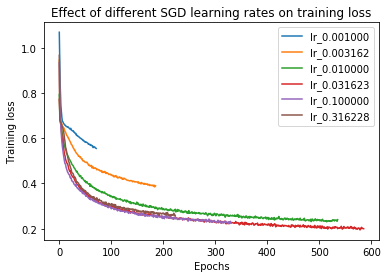

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot training loss curves for each learning rate, with no momentum
plt.figure()
for learning_rate in learning_rates[:-2]:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history
    plt.plot(history['loss'], label='lr_{:f}'.format(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Effect of different SGD learning rates on training loss')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_training_loss_of_sgd_with_different_learning_rates')

As expected, larger learning rates cause training loss to decrease more quickly. However, it is surprising that going from 0.03 to 0.1, and 0.1 to 0.3, does not lead to any decrease in training loss. We may want to explore this further.

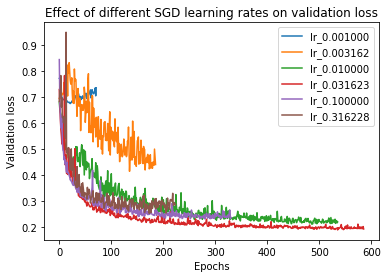

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot validation loss curves for each learning rate, with no momentum
plt.figure()
for learning_rate in learning_rates[:-2]:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history
    plt.plot(history['val_loss'], label='lr_{:f}'.format(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Effect of different SGD learning rates on validation loss')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_validation_loss_of_sgd_with_different_learning_rates')

Learning rate: 0.001, min val loss: 0.5552979462317149
Learning rate: 0.0031622776601683794, min val loss: 0.38507055512427774
Learning rate: 0.01, min val loss: 0.23021337301067482
Learning rate: 0.03162277660168379, min val loss: 0.19447039879822461
Learning rate: 0.1, min val loss: 0.2240049948460437
Learning rate: 0.31622776601683794, min val loss: 0.2563462526871273
Learning rate: 1.0, min val loss: nan
Learning rate: 3.1622776601683795, min val loss: nan


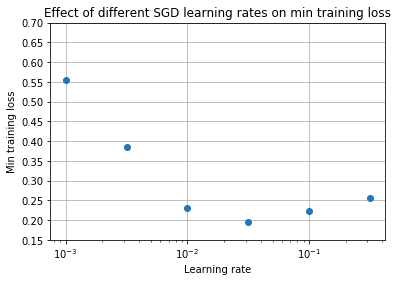

<Figure size 432x288 with 0 Axes>

In [31]:
# Plot min training loss by learning rate
y_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history
    min_train_loss = np.min(history['loss'])
    y_values.append(min_train_loss)
    print("Learning rate: {}, min val loss: {}".format(learning_rate, min_train_loss))
plt.figure()
plt.plot(learning_rates, y_values, 'o')
plt.yticks(np.arange(0.15, 0.75, 0.05))
plt.grid(True, axis='both')
plt.xlabel('Learning rate')
plt.ylabel('Min training loss')
plt.xscale('log')
plt.title('Effect of different SGD learning rates on min training loss')
plt.show()
plt.savefig('graphs/new_base_model_min_training_loss_of_sgd_with_different_learning_rates')

Learning rate: 0.001, min val loss: 0.6745525769991417
Learning rate: 0.0031622776601683794, min val loss: 0.414654293799237
Learning rate: 0.01, min val loss: 0.2124398550758623
Learning rate: 0.03162277660168379, min val loss: 0.1899063341727812
Learning rate: 0.1, min val loss: 0.23192652922174703
Learning rate: 0.31622776601683794, min val loss: 0.2535264552762247
Learning rate: 1.0, min val loss: nan
Learning rate: 3.1622776601683795, min val loss: nan


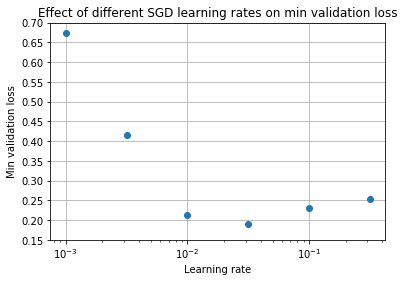

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot min validation loss by learning rate
y_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history
    min_val_loss = np.min(history['val_loss'])
    y_values.append(min_val_loss)
    print("Learning rate: {}, min val loss: {}".format(learning_rate, min_val_loss))
plt.figure()
plt.plot(learning_rates, y_values, 'o')
plt.xlabel('Learning rate')
plt.ylabel('Min validation loss')
plt.yticks(np.arange(0.15, 0.75, 0.05))
plt.grid(True, axis='both')
plt.xscale('log')
plt.title('Effect of different SGD learning rates on min validation loss')
plt.show()
plt.savefig('graphs/new_base_model_min_validation_loss_of_sgd_with_different_learning_rates')

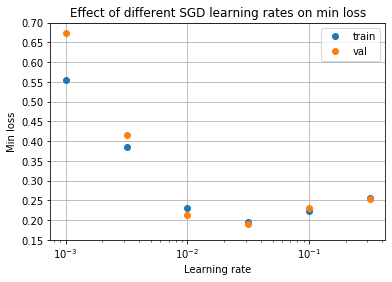

In [33]:
# Plot min validation loss by learning rate
train_loss_values = []
val_loss_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history
    min_loss = np.min(history['loss'])
    min_val_loss = np.min(history['val_loss'])
    train_loss_values.append(min_loss)
    val_loss_values.append(min_val_loss)
plt.figure()
plt.plot(learning_rates, train_loss_values, 'o', label='train')
plt.plot(learning_rates, val_loss_values, 'o', label='val')
plt.xlabel('Learning rate')
plt.ylabel('Min loss')
plt.yticks(np.arange(0.15, 0.75, 0.05))
plt.grid(True, axis='both')
plt.legend()
plt.xscale('log')
plt.title('Effect of different SGD learning rates on min loss')
plt.show()

In [29]:
for learning_rate in learning_rates:
    history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0)].history
    train_loss = np.min(history['loss'])
    val_loss = np.min(history['val_loss'])
    print("Learning rate: {:.4f} \n\ttrain loss: {:.4f} \n\tval loss: {:.4f}".format(
        learning_rate, train_loss, val_loss))

Learning rate: 0.0010 
	train loss: 0.5553 
	val loss: 0.6746
Learning rate: 0.0032 
	train loss: 0.3851 
	val loss: 0.4147
Learning rate: 0.0100 
	train loss: 0.2302 
	val loss: 0.2124
Learning rate: 0.0316 
	train loss: 0.1945 
	val loss: 0.1899
Learning rate: 0.1000 
	train loss: 0.2240 
	val loss: 0.2319
Learning rate: 0.3162 
	train loss: 0.2563 
	val loss: 0.2535
Learning rate: 1.0000 
	train loss: nan 
	val loss: nan
Learning rate: 3.1623 
	train loss: nan 
	val loss: nan


Now, what about momentum? SGD with momentum differs from vanilla SGD in that it dampens oscillations where the sign changes like [+, -, +, -, ...], and it represents the update as the velocity/direction that the weights are heading in, which is changed over time by the gradients, which are akin to acceleration.

Let's look at the effect of momentum for each learning rate.

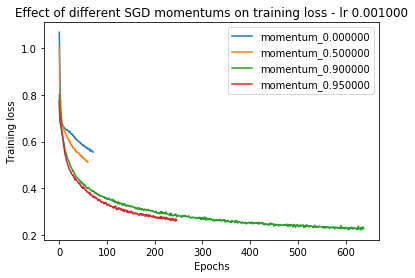

<Figure size 432x288 with 0 Axes>

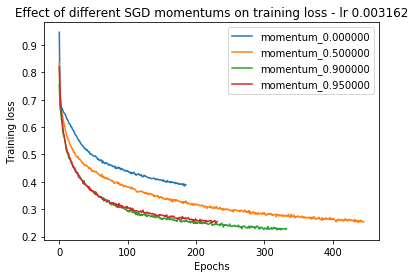

<Figure size 432x288 with 0 Axes>

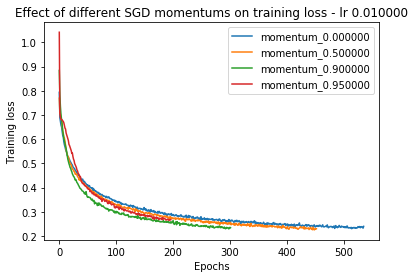

<Figure size 432x288 with 0 Axes>

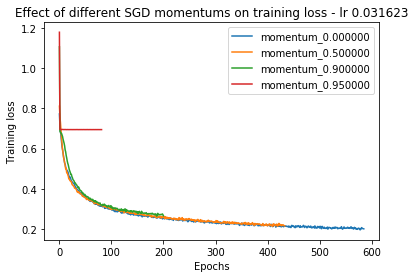

<Figure size 432x288 with 0 Axes>

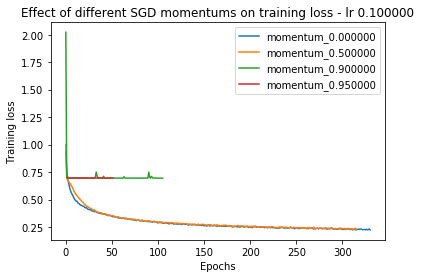

<Figure size 432x288 with 0 Axes>

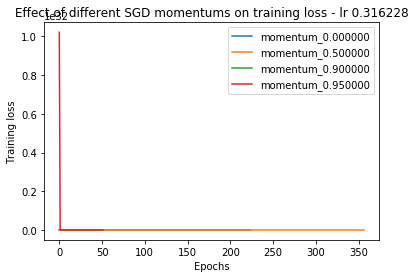

<Figure size 432x288 with 0 Axes>

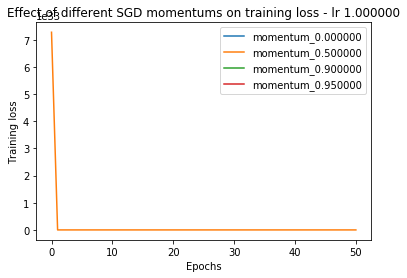

<Figure size 432x288 with 0 Axes>

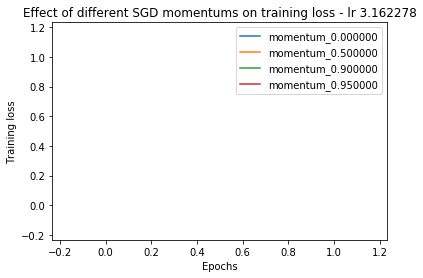

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot effect of momentum for each learning rate (training loss)
for learning_rate in learning_rates:
    plt.figure()
    for momentum in momentums:
        history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)].history
        plt.plot(history['loss'], label='momentum_{:f}'.format(momentum))
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title('Effect of different SGD momentums on training loss - lr {:f}'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_of_sgd_lr_{:d}e-3_with_different_momentums'.format(int(learning_rate*1e3)))

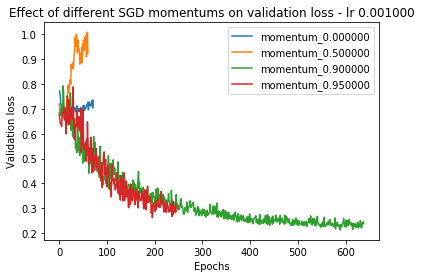

<Figure size 432x288 with 0 Axes>

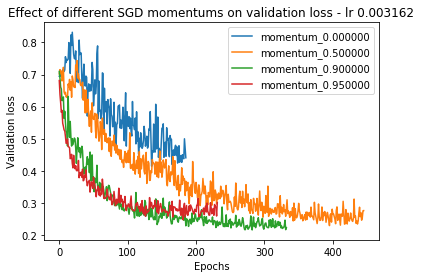

<Figure size 432x288 with 0 Axes>

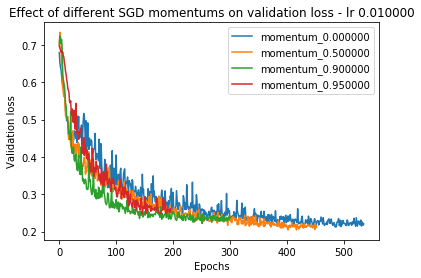

<Figure size 432x288 with 0 Axes>

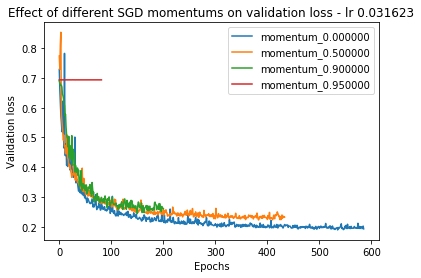

<Figure size 432x288 with 0 Axes>

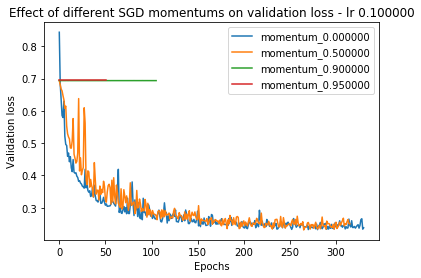

<Figure size 432x288 with 0 Axes>

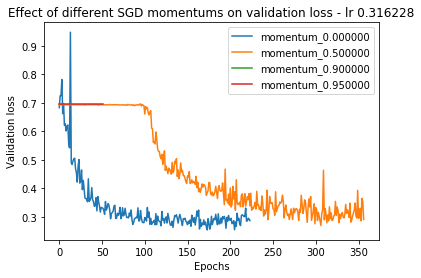

<Figure size 432x288 with 0 Axes>

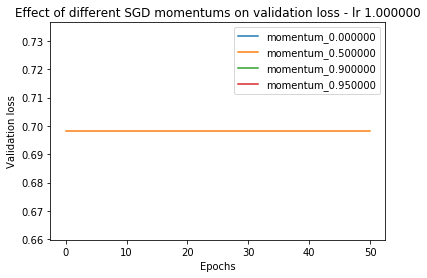

<Figure size 432x288 with 0 Axes>

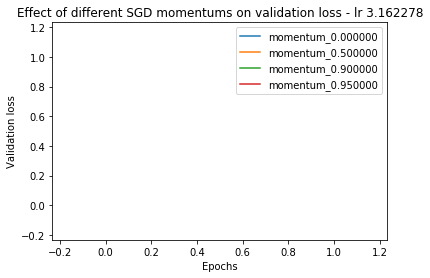

<Figure size 432x288 with 0 Axes>

In [35]:
# Plot effect of momentum for each learning rate (validation loss)
for learning_rate in learning_rates:
    plt.figure()
    for momentum in momentums:
        history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)].history
        plt.plot(history['val_loss'], label='momentum_{:f}'.format(momentum))
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('Effect of different SGD momentums on validation loss - lr {:f}'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_of_sgd_lr_{:d}e-3_with_different_momentums'.format(int(learning_rate*1e3)))

Surprisingly, increasing momentum on small learning rates improves validation loss, even approaching the performance we saw on large learning rates! This is rather unintuitive because we would expect momentum to increase the 'lookback' window for updates, but not change the magnitude of the update itself. The momentum updates are as follows:

$ v := \beta * v - \alpha * dw \\
 w := w + v $
 
where $\beta$ is the momentum and $\alpha$ is the learning rate. If we set momentum to zero, then this is just a regular SGD update. However, as we start increasing momentum, the updates become larger. See the section at the bottom (Why does momentum counteract a smaller learning rate?) for a more detailed explanation. This seems to help to counteract the effect of a small learning rate.

When the learning rate is already large enough, however, it looks like the momentum term actually can harm performance. Maybe this is because the updates are already large enough and don't need to be augmented with velocity from the past updates.

Additionally, momentum also tends to dampen oscillations. We could explore this effect further by comparing the velocity term to the update term and seeing how many of the terms agree in sign.

What is the best performance we've achieved so far with SGD with momentum?

In [39]:
[(params, np.min(model_state.history['loss']), np.min(model_state.history['val_loss'])) for params, model_state in model_state_by_param_sgd.items()]

[('lr_0.001000_momentum_0.000000', 0.5552979462317149, 0.6745525769991417),
 ('lr_0.001000_momentum_0.500000', 0.511905750960576, 0.6626773872604109),
 ('lr_0.001000_momentum_0.900000', 0.22118320747897677, 0.21268039053841814),
 ('lr_0.001000_momentum_0.950000', 0.26003610081950673, 0.26280456225145354),
 ('lr_0.003162_momentum_0.000000', 0.38507055512427774, 0.414654293799237),
 ('lr_0.003162_momentum_0.500000', 0.2515453452515641, 0.22976237390037269),
 ('lr_0.003162_momentum_0.900000', 0.22416594969464015, 0.216301354541354),
 ('lr_0.003162_momentum_0.950000', 0.2492651319132256, 0.2478776146491913),
 ('lr_0.010000_momentum_0.000000', 0.23021337301067482, 0.2124398550758623),
 ('lr_0.010000_momentum_0.500000', 0.22516454150444842, 0.20460260218034867),
 ('lr_0.010000_momentum_0.900000', 0.22926569656138135, 0.22207623720169067),
 ('lr_0.010000_momentum_0.950000', 0.2642663433931644, 0.24731624937833172),
 ('lr_0.031623_momentum_0.000000', 0.19447039879822461, 0.1899063341727812),
 

In [36]:
best_sgd_params, best_sgd_val_loss, best_epochs_to_converge = min(
    [(
        params,
        np.min(model_state.history['val_loss']),
        np.argmin(model_state.history['val_loss'])
    ) for params, model_state in model_state_by_param_sgd.items()],
    key=lambda x: x[1]
)
print("Best SGD params: {}, best SGD validation loss: {}, epochs to converge: {}".format(
    best_sgd_params,
    best_sgd_val_loss,
    best_epochs_to_converge
))

Best SGD params: lr_0.031623_momentum_0.000000, best SGD validation loss: 0.1899063341727812


Let's see how large the batch updates are with momentum.

In [17]:
class WeightHistory(keras.callbacks.Callback):
    def __init__(self):
        self.batch_update_sizes = []
        self.curr_weights = None
    
    def on_train_begin(self, logs={}):
        self.curr_weights = self.model.get_weights()
        
    def on_batch_end(self, batch, logs={}):
        flattened_curr_weights = np.concatenate([w.flatten() for w in self.curr_weights])
        flattened_new_weights = np.concatenate([w.flatten() for w in self.model.get_weights()])
        self.batch_update_sizes.append(np.linalg.norm(flattened_new_weights - flattened_curr_weights))

# Train model with no momentum
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.)
model = ml_utils.build_model(optimizer=optimizer)
wh_no_momentum = WeightHistory()
ml_utils.train_model(
    model,
    train,
    validation,
    epochs=10,
    extra_callbacks=[wh_no_momentum]
)

# Train model with momentum
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.99)
model = ml_utils.build_model(optimizer=optimizer)
wh_momentum = WeightHistory()
ml_utils.train_model(
    model,
    train,
    validation,
    epochs=10,
    extra_callbacks=[wh_momentum]
)

Epoch 1/10
582/582 [==============================] - 31s 53ms/step - loss: 1.0693 - accuracy: 0.5206 - val_loss: 0.7714 - val_accuracy: 0.4925
Epoch 2/10
582/582 [==============================] - 28s 49ms/step - loss: 0.9279 - accuracy: 0.5294 - val_loss: 0.7686 - val_accuracy: 0.5000
Epoch 3/10
582/582 [==============================] - 28s 49ms/step - loss: 0.8164 - accuracy: 0.5387 - val_loss: 0.7520 - val_accuracy: 0.5062
Epoch 4/10
582/582 [==============================] - 30s 52ms/step - loss: 0.7476 - accuracy: 0.5539 - val_loss: 0.7225 - val_accuracy: 0.5131
Epoch 5/10
582/582 [==============================] - 29s 49ms/step - loss: 0.7175 - accuracy: 0.5598 - val_loss: 0.7100 - val_accuracy: 0.5166
Epoch 6/10
582/582 [==============================] - 28s 49ms/step - loss: 0.6916 - accuracy: 0.5666 - val_loss: 0.6977 - val_accuracy: 0.5254
Epoch 7/10
582/582 [==============================] - 28s 49ms/step - loss: 0.6747 - accuracy: 0.5865 - val_loss: 0.6959 - val_accuracy:

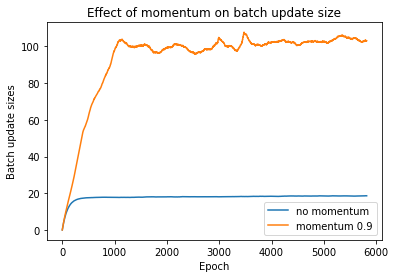

In [19]:
plt.plot(wh_no_momentum.batch_update_sizes, label='no momentum')
plt.plot(wh_momentum.batch_update_sizes, label='momentum 0.9')
plt.ylabel('Batch update sizes')
plt.xlabel('Epoch')
plt.title('Effect of momentum on batch update size')
plt.legend()

Let's try out some larger momentum values (0.99, 0.999). Based on our knowledge of the Keras implementation, let's make sure to scale the learning rate by 1-momentum when we change the momentum. Since lr 0.0316 and momentum 0 performed best, let's take those as our base parameters.

In [42]:
model_state_by_param_sgd_2 = {}

learning_rate_momentum_tuples = [
    (10**(-1.5), 0),     # Base values
    (10**(-2.5), 0.9),   # Scale lr by 1-0.90 = 0.1 = 1e-1
    (10**(-3.5), 0.99),  # Scale lr by 1-0.99 = 0.01 = 1e-2
    (10**(-4.5), 0.999), # Scale lr by 1-0.999 = 0.001 = 1e-3
]

for learning_rate, momentum in learning_rate_momentum_tuples:
    print("Learning rate: {}, momentum: {}".format(learning_rate, momentum))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model = ml_utils.build_model(optimizer=optimizer)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_{}_momentum_{}_best_model.h5'.format(learning_rate, momentum),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
    )
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model_state_by_param_sgd_2['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[mc, es],
    )

Learning rate: 0.03162277660168379, momentum: 0
Epoch 1/1000
    582/Unknown - 15s 26ms/step - loss: 0.7723 - accuracy: 0.5265
Epoch 00001: val_loss improved from inf to 0.72826, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 17s 29ms/step - loss: 0.7723 - accuracy: 0.5265 - val_loss: 0.7283 - val_accuracy: 0.5097
Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7139 - accuracy: 0.5684
Epoch 00002: val_loss improved from 0.72826 to 0.66224, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.7134 - accuracy: 0.5687 - val_loss: 0.6622 - val_accuracy: 0.5911
Epoch 3/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6854 - accuracy: 0.6025
Epoch 00003: val_loss improved from 0.66224 to 0.62251, saving mode

Epoch 24/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4391 - accuracy: 0.7946
Epoch 00024: val_loss did not improve from 0.39040
582/582 [==============================] - 15s 25ms/step - loss: 0.4392 - accuracy: 0.7947 - val_loss: 0.4470 - val_accuracy: 0.7979
Epoch 25/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8028
Epoch 00025: val_loss did not improve from 0.39040
582/582 [==============================] - 15s 25ms/step - loss: 0.4358 - accuracy: 0.8027 - val_loss: 0.4101 - val_accuracy: 0.8076
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4312 - accuracy: 0.8036
Epoch 00026: val_loss improved from 0.39040 to 0.38644, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.4312 - accuracy: 0.8036 - val_loss: 0.3864 - val_accuracy: 0.8224
Epoch 27/1000
580/582 [=====

Epoch 48/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3597 - accuracy: 0.8402
Epoch 00048: val_loss did not improve from 0.30635
582/582 [==============================] - 15s 25ms/step - loss: 0.3598 - accuracy: 0.8401 - val_loss: 0.3292 - val_accuracy: 0.8564
Epoch 49/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3655 - accuracy: 0.8401
Epoch 00049: val_loss improved from 0.30635 to 0.30386, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3651 - accuracy: 0.8402 - val_loss: 0.3039 - val_accuracy: 0.8684
Epoch 50/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3566 - accuracy: 0.8444
Epoch 00050: val_loss improved from 0.30386 to 0.29709, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [=============================

580/582 [============================>.] - ETA: 0s - loss: 0.3245 - accuracy: 0.8618
Epoch 00073: val_loss improved from 0.26666 to 0.25801, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3246 - accuracy: 0.8617 - val_loss: 0.2580 - val_accuracy: 0.8904
Epoch 74/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3248 - accuracy: 0.8592
Epoch 00074: val_loss did not improve from 0.25801
582/582 [==============================] - 15s 25ms/step - loss: 0.3244 - accuracy: 0.8593 - val_loss: 0.2685 - val_accuracy: 0.8856
Epoch 75/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8636
Epoch 00075: val_loss did not improve from 0.25801
582/582 [==============================] - 15s 25ms/step - loss: 0.3178 - accuracy: 0.8636 - val_loss: 0.2640 - val_accuracy: 0.8854
Epoch 76/1000
580/582 [===================

Epoch 100/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.8719
Epoch 00100: val_loss did not improve from 0.24525
582/582 [==============================] - 15s 25ms/step - loss: 0.2982 - accuracy: 0.8720 - val_loss: 0.2555 - val_accuracy: 0.8897
Epoch 101/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2960 - accuracy: 0.8725
Epoch 00101: val_loss did not improve from 0.24525
582/582 [==============================] - 15s 25ms/step - loss: 0.2961 - accuracy: 0.8724 - val_loss: 0.2628 - val_accuracy: 0.8899
Epoch 102/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.8710
Epoch 00102: val_loss did not improve from 0.24525
582/582 [==============================] - 15s 26ms/step - loss: 0.2931 - accuracy: 0.8709 - val_loss: 0.2519 - val_accuracy: 0.8957
Epoch 103/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.8721
Epoch 00103: val_loss did not improve from 0.245

Epoch 127/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2830 - accuracy: 0.8802
Epoch 00127: val_loss did not improve from 0.23636
582/582 [==============================] - 15s 25ms/step - loss: 0.2828 - accuracy: 0.8802 - val_loss: 0.2426 - val_accuracy: 0.8908
Epoch 128/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8776
Epoch 00128: val_loss did not improve from 0.23636
582/582 [==============================] - 15s 25ms/step - loss: 0.2827 - accuracy: 0.8776 - val_loss: 0.2415 - val_accuracy: 0.8929
Epoch 129/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2817 - accuracy: 0.8836
Epoch 00129: val_loss did not improve from 0.23636
582/582 [==============================] - 15s 25ms/step - loss: 0.2815 - accuracy: 0.8836 - val_loss: 0.2410 - val_accuracy: 0.8972
Epoch 130/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2801 - accuracy: 0.8798
Epoch 00130: val_loss did not improve from 0.236

580/582 [============================>.] - ETA: 0s - loss: 0.2562 - accuracy: 0.8918
Epoch 00181: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2560 - accuracy: 0.8918 - val_loss: 0.2193 - val_accuracy: 0.9119
Epoch 182/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.8904
Epoch 00182: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2571 - accuracy: 0.8906 - val_loss: 0.2222 - val_accuracy: 0.9046
Epoch 183/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2597 - accuracy: 0.8893
Epoch 00183: val_loss did not improve from 0.21659
582/582 [==============================] - 15s 25ms/step - loss: 0.2598 - accuracy: 0.8892 - val_loss: 0.2247 - val_accuracy: 0.9071
Epoch 184/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.8903
Epoch 00184: val_loss did not improve from 0.21659
582/582 [===

Epoch 209/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8932
Epoch 00209: val_loss did not improve from 0.21360
582/582 [==============================] - 15s 25ms/step - loss: 0.2523 - accuracy: 0.8932 - val_loss: 0.2158 - val_accuracy: 0.9082
Epoch 210/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.8914
Epoch 00210: val_loss did not improve from 0.21360
582/582 [==============================] - 15s 25ms/step - loss: 0.2515 - accuracy: 0.8914 - val_loss: 0.2267 - val_accuracy: 0.9046
Epoch 211/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.8971
Epoch 00211: val_loss did not improve from 0.21360
582/582 [==============================] - 15s 25ms/step - loss: 0.2486 - accuracy: 0.8971 - val_loss: 0.2232 - val_accuracy: 0.9048
Epoch 212/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.8977
Epoch 00212: val_loss did not improve from 0.213

Epoch 237/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2460 - accuracy: 0.8969
Epoch 00237: val_loss did not improve from 0.20990
582/582 [==============================] - 15s 25ms/step - loss: 0.2460 - accuracy: 0.8969 - val_loss: 0.2116 - val_accuracy: 0.9097
Epoch 238/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9006
Epoch 00238: val_loss did not improve from 0.20990
582/582 [==============================] - 15s 25ms/step - loss: 0.2387 - accuracy: 0.9006 - val_loss: 0.2151 - val_accuracy: 0.9095
Epoch 239/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.8964
Epoch 00239: val_loss did not improve from 0.20990
582/582 [==============================] - 15s 25ms/step - loss: 0.2430 - accuracy: 0.8964 - val_loss: 0.2111 - val_accuracy: 0.9110
Epoch 240/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.8998
Epoch 00240: val_loss did not improve from 0.209

Epoch 266/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2398 - accuracy: 0.8996
Epoch 00266: val_loss did not improve from 0.20899
582/582 [==============================] - 15s 25ms/step - loss: 0.2396 - accuracy: 0.8996 - val_loss: 0.2108 - val_accuracy: 0.9101
Epoch 267/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.8989
Epoch 00267: val_loss did not improve from 0.20899
582/582 [==============================] - 15s 26ms/step - loss: 0.2423 - accuracy: 0.8990 - val_loss: 0.2259 - val_accuracy: 0.9018
Epoch 268/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9001
Epoch 00268: val_loss improved from 0.20899 to 0.20621, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2375 - accuracy: 0.9001 - val_loss: 0.2062 - val_accuracy: 0.9123
Epoch 269/1000
579/582 [=

Epoch 322/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2297 - accuracy: 0.9037
Epoch 00322: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2292 - accuracy: 0.9038 - val_loss: 0.2012 - val_accuracy: 0.9175
Epoch 323/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9077
Epoch 00323: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2217 - accuracy: 0.9077 - val_loss: 0.2039 - val_accuracy: 0.9138
Epoch 324/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2255 - accuracy: 0.9058
Epoch 00324: val_loss did not improve from 0.19913
582/582 [==============================] - 15s 25ms/step - loss: 0.2257 - accuracy: 0.9055 - val_loss: 0.2075 - val_accuracy: 0.9108
Epoch 325/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2277 - accuracy: 0.9045
Epoch 00325: val_loss did not improve from 0.199

Epoch 351/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2275 - accuracy: 0.9038
Epoch 00351: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2274 - accuracy: 0.9038 - val_loss: 0.2068 - val_accuracy: 0.9136
Epoch 352/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9048
Epoch 00352: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2284 - accuracy: 0.9048 - val_loss: 0.2023 - val_accuracy: 0.9138
Epoch 353/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2256 - accuracy: 0.9036
Epoch 00353: val_loss did not improve from 0.19858
582/582 [==============================] - 15s 25ms/step - loss: 0.2258 - accuracy: 0.9035 - val_loss: 0.2007 - val_accuracy: 0.9114
Epoch 354/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2187 - accuracy: 0.9083
Epoch 00354: val_loss did not improve from 0.198

Epoch 380/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9075
Epoch 00380: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2218 - accuracy: 0.9076 - val_loss: 0.2056 - val_accuracy: 0.9125
Epoch 381/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2218 - accuracy: 0.9068
Epoch 00381: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2217 - accuracy: 0.9068 - val_loss: 0.2001 - val_accuracy: 0.9166
Epoch 382/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9053
Epoch 00382: val_loss did not improve from 0.19731
582/582 [==============================] - 15s 25ms/step - loss: 0.2248 - accuracy: 0.9051 - val_loss: 0.2025 - val_accuracy: 0.9144
Epoch 383/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2147 - accuracy: 0.9093
Epoch 00383: val_loss did not improve from 0.197

Epoch 409/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9091
Epoch 00409: val_loss improved from 0.19702 to 0.19690, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2172 - accuracy: 0.9090 - val_loss: 0.1969 - val_accuracy: 0.9157
Epoch 410/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9088
Epoch 00410: val_loss did not improve from 0.19690
582/582 [==============================] - 15s 25ms/step - loss: 0.2185 - accuracy: 0.9090 - val_loss: 0.1985 - val_accuracy: 0.9153
Epoch 411/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2106 - accuracy: 0.9119
Epoch 00411: val_loss did not improve from 0.19690
582/582 [==============================] - 15s 25ms/step - loss: 0.2107 - accuracy: 0.9118 - val_loss: 0.1999 - val_accuracy: 0.9123
Epoch 412/1000
580/582 [=

Epoch 437/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9104
Epoch 00437: val_loss did not improve from 0.19622
582/582 [==============================] - 15s 26ms/step - loss: 0.2132 - accuracy: 0.9104 - val_loss: 0.2066 - val_accuracy: 0.9114
Epoch 438/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2116 - accuracy: 0.9129
Epoch 00438: val_loss did not improve from 0.19622
582/582 [==============================] - 15s 26ms/step - loss: 0.2116 - accuracy: 0.9129 - val_loss: 0.2056 - val_accuracy: 0.9138
Epoch 439/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2120 - accuracy: 0.9131
Epoch 00439: val_loss did not improve from 0.19622
582/582 [==============================] - 15s 25ms/step - loss: 0.2124 - accuracy: 0.9131 - val_loss: 0.2051 - val_accuracy: 0.9119
Epoch 440/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9113
Epoch 00440: val_loss did not improve from 0.196

Epoch 465/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2092 - accuracy: 0.9120
Epoch 00465: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2091 - accuracy: 0.9120 - val_loss: 0.1963 - val_accuracy: 0.9183
Epoch 466/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2094 - accuracy: 0.9136
Epoch 00466: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2093 - accuracy: 0.9136 - val_loss: 0.2008 - val_accuracy: 0.9136
Epoch 467/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2094 - accuracy: 0.9133
Epoch 00467: val_loss did not improve from 0.19292
582/582 [==============================] - 15s 25ms/step - loss: 0.2089 - accuracy: 0.9135 - val_loss: 0.2004 - val_accuracy: 0.9149
Epoch 468/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2095 - accuracy: 0.9140
Epoch 00468: val_loss did not improve from 0.192

Epoch 494/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2066 - accuracy: 0.9143
Epoch 00494: val_loss did not improve from 0.19242
582/582 [==============================] - 14s 25ms/step - loss: 0.2065 - accuracy: 0.9142 - val_loss: 0.2017 - val_accuracy: 0.9136
Epoch 495/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2053 - accuracy: 0.9141
Epoch 00495: val_loss did not improve from 0.19242
582/582 [==============================] - 15s 25ms/step - loss: 0.2056 - accuracy: 0.9140 - val_loss: 0.1954 - val_accuracy: 0.9164
Epoch 496/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9135
Epoch 00496: val_loss improved from 0.19242 to 0.19227, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.03162277660168379_momentum_0_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2026 - accuracy: 0.9136 - val_loss: 0.1923 - val_accuracy: 0.9196
Epoch 497/1000
580/582 [=

Epoch 523/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2048 - accuracy: 0.9151
Epoch 00523: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 25ms/step - loss: 0.2050 - accuracy: 0.9151 - val_loss: 0.1934 - val_accuracy: 0.9187
Epoch 524/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.9161
Epoch 00524: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 25ms/step - loss: 0.1997 - accuracy: 0.9161 - val_loss: 0.1987 - val_accuracy: 0.9179
Epoch 525/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2005 - accuracy: 0.9164
Epoch 00525: val_loss did not improve from 0.19227
582/582 [==============================] - 15s 26ms/step - loss: 0.2006 - accuracy: 0.9164 - val_loss: 0.1936 - val_accuracy: 0.9160
Epoch 526/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2029 - accuracy: 0.9159
Epoch 00526: val_loss did not improve from 0.192

Epoch 551/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9197
Epoch 00551: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2021 - accuracy: 0.9197 - val_loss: 0.1969 - val_accuracy: 0.9166
Epoch 552/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9158
Epoch 00552: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2029 - accuracy: 0.9157 - val_loss: 0.2050 - val_accuracy: 0.9185
Epoch 553/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9168
Epoch 00553: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2026 - accuracy: 0.9168 - val_loss: 0.1987 - val_accuracy: 0.9192
Epoch 554/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2060 - accuracy: 0.9161
Epoch 00554: val_loss did not improve from 0.189

Epoch 580/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9164
Epoch 00580: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2016 - accuracy: 0.9165 - val_loss: 0.2002 - val_accuracy: 0.9168
Epoch 581/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1991 - accuracy: 0.9185
Epoch 00581: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.1992 - accuracy: 0.9185 - val_loss: 0.1995 - val_accuracy: 0.9127
Epoch 582/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2059 - accuracy: 0.9143
Epoch 00582: val_loss did not improve from 0.18991
582/582 [==============================] - 15s 25ms/step - loss: 0.2060 - accuracy: 0.9142 - val_loss: 0.2006 - val_accuracy: 0.9151
Epoch 583/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2015 - accuracy: 0.9179
Epoch 00583: val_loss did not improve from 0.189

Epoch 45/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3737 - accuracy: 0.8352
Epoch 00045: val_loss did not improve from 0.39007
582/582 [==============================] - 15s 26ms/step - loss: 0.3737 - accuracy: 0.8351 - val_loss: 0.3946 - val_accuracy: 0.8222
Epoch 46/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.8360
Epoch 00046: val_loss did not improve from 0.39007
582/582 [==============================] - 15s 25ms/step - loss: 0.3704 - accuracy: 0.8361 - val_loss: 0.4587 - val_accuracy: 0.7971
Epoch 47/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3739 - accuracy: 0.8342
Epoch 00047: val_loss improved from 0.39007 to 0.36898, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3740 - accuracy: 0.8342 - val_loss: 0.3690 - val_accuracy: 0.8405
Epoch 48/1000
579/582 [=

579/582 [============================>.] - ETA: 0s - loss: 0.2978 - accuracy: 0.8726
Epoch 00098: val_loss did not improve from 0.27520
582/582 [==============================] - 15s 25ms/step - loss: 0.2978 - accuracy: 0.8725 - val_loss: 0.2803 - val_accuracy: 0.8753
Epoch 99/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2991 - accuracy: 0.8735
Epoch 00099: val_loss did not improve from 0.27520
582/582 [==============================] - 15s 25ms/step - loss: 0.2993 - accuracy: 0.8736 - val_loss: 0.2932 - val_accuracy: 0.8712
Epoch 100/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2941 - accuracy: 0.8737
Epoch 00100: val_loss did not improve from 0.27520
582/582 [==============================] - 15s 25ms/step - loss: 0.2941 - accuracy: 0.8736 - val_loss: 0.2929 - val_accuracy: 0.8644
Epoch 101/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2943 - accuracy: 0.8744
Epoch 00101: val_loss did not improve from 0.27520
582/582 [====

579/582 [============================>.] - ETA: 0s - loss: 0.2796 - accuracy: 0.8827
Epoch 00126: val_loss did not improve from 0.25336
582/582 [==============================] - 15s 25ms/step - loss: 0.2795 - accuracy: 0.8826 - val_loss: 0.3080 - val_accuracy: 0.8603
Epoch 127/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2759 - accuracy: 0.8813
Epoch 00127: val_loss did not improve from 0.25336
582/582 [==============================] - 15s 25ms/step - loss: 0.2759 - accuracy: 0.8811 - val_loss: 0.3026 - val_accuracy: 0.8650
Epoch 128/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2790 - accuracy: 0.8808
Epoch 00128: val_loss did not improve from 0.25336
582/582 [==============================] - 15s 25ms/step - loss: 0.2795 - accuracy: 0.8806 - val_loss: 0.2601 - val_accuracy: 0.8897
Epoch 129/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2727 - accuracy: 0.8854
Epoch 00129: val_loss did not improve from 0.25336
582/582 [===

Epoch 182/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2558 - accuracy: 0.8915
Epoch 00182: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2560 - accuracy: 0.8915 - val_loss: 0.2631 - val_accuracy: 0.8882
Epoch 183/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.8902
Epoch 00183: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2573 - accuracy: 0.8902 - val_loss: 0.2464 - val_accuracy: 0.8938
Epoch 184/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.8927
Epoch 00184: val_loss did not improve from 0.23292
582/582 [==============================] - 15s 25ms/step - loss: 0.2556 - accuracy: 0.8928 - val_loss: 0.2494 - val_accuracy: 0.8947
Epoch 185/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2541 - accuracy: 0.8940
Epoch 00185: val_loss did not improve from 0.232

Epoch 210/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2468 - accuracy: 0.8981
Epoch 00210: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2468 - accuracy: 0.8980 - val_loss: 0.2512 - val_accuracy: 0.8919
Epoch 211/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.8963
Epoch 00211: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2495 - accuracy: 0.8962 - val_loss: 0.2447 - val_accuracy: 0.8938
Epoch 212/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2491 - accuracy: 0.8955
Epoch 00212: val_loss did not improve from 0.22719
582/582 [==============================] - 15s 25ms/step - loss: 0.2493 - accuracy: 0.8954 - val_loss: 0.2297 - val_accuracy: 0.8998
Epoch 213/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.8947
Epoch 00213: val_loss did not improve from 0.227

Epoch 239/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.8962
Epoch 00239: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2448 - accuracy: 0.8961 - val_loss: 0.2877 - val_accuracy: 0.8725
Epoch 240/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2444 - accuracy: 0.8989
Epoch 00240: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2447 - accuracy: 0.8989 - val_loss: 0.2369 - val_accuracy: 0.8988
Epoch 241/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2346 - accuracy: 0.9039
Epoch 00241: val_loss did not improve from 0.22368
582/582 [==============================] - 15s 25ms/step - loss: 0.2346 - accuracy: 0.9039 - val_loss: 0.2269 - val_accuracy: 0.9005
Epoch 242/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2431 - accuracy: 0.8989
Epoch 00242: val_loss did not improve from 0.223

Epoch 268/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2289 - accuracy: 0.9053
Epoch 00268: val_loss did not improve from 0.22238
582/582 [==============================] - 15s 25ms/step - loss: 0.2289 - accuracy: 0.9054 - val_loss: 0.2388 - val_accuracy: 0.8929
Epoch 269/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.9027
Epoch 00269: val_loss did not improve from 0.22238
582/582 [==============================] - 15s 25ms/step - loss: 0.2369 - accuracy: 0.9027 - val_loss: 0.2543 - val_accuracy: 0.8912
Epoch 270/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9018
Epoch 00270: val_loss did not improve from 0.22238
582/582 [==============================] - 15s 25ms/step - loss: 0.2383 - accuracy: 0.9018 - val_loss: 0.2440 - val_accuracy: 0.8934
Epoch 271/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2368 - accuracy: 0.8988
Epoch 00271: val_loss did not improve from 0.222

Epoch 296/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9025
Epoch 00296: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2343 - accuracy: 0.9024 - val_loss: 0.2317 - val_accuracy: 0.9007
Epoch 297/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2323 - accuracy: 0.9035
Epoch 00297: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2326 - accuracy: 0.9033 - val_loss: 0.2466 - val_accuracy: 0.8895
Epoch 298/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2319 - accuracy: 0.9037
Epoch 00298: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 26ms/step - loss: 0.2320 - accuracy: 0.9037 - val_loss: 0.2525 - val_accuracy: 0.8867
Epoch 299/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2293 - accuracy: 0.9025
Epoch 00299: val_loss did not improve from 0.216

Epoch 325/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9068
Epoch 00325: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 26ms/step - loss: 0.2246 - accuracy: 0.9069 - val_loss: 0.2230 - val_accuracy: 0.9050
Epoch 326/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2291 - accuracy: 0.9036
Epoch 00326: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2291 - accuracy: 0.9036 - val_loss: 0.2283 - val_accuracy: 0.9013
Epoch 327/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9039
Epoch 00327: val_loss did not improve from 0.21630
582/582 [==============================] - 15s 25ms/step - loss: 0.2280 - accuracy: 0.9039 - val_loss: 0.2207 - val_accuracy: 0.9035
Epoch 328/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2272 - accuracy: 0.9043
Epoch 00328: val_loss did not improve from 0.216

580/582 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.7693
Epoch 00018: val_loss did not improve from 0.57605
582/582 [==============================] - 15s 25ms/step - loss: 0.4896 - accuracy: 0.7693 - val_loss: 0.7576 - val_accuracy: 0.6664
Epoch 19/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4766 - accuracy: 0.7753
Epoch 00019: val_loss did not improve from 0.57605
582/582 [==============================] - 15s 25ms/step - loss: 0.4769 - accuracy: 0.7750 - val_loss: 0.7274 - val_accuracy: 0.6737
Epoch 20/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4749 - accuracy: 0.7766
Epoch 00020: val_loss did not improve from 0.57605
582/582 [==============================] - 15s 25ms/step - loss: 0.4750 - accuracy: 0.7765 - val_loss: 0.7747 - val_accuracy: 0.6853
Epoch 21/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4653 - accuracy: 0.7862
Epoch 00021: val_loss did not improve from 0.57605
582/582 [======

Epoch 72/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3500 - accuracy: 0.8457
Epoch 00072: val_loss did not improve from 0.39439
582/582 [==============================] - 15s 25ms/step - loss: 0.3498 - accuracy: 0.8459 - val_loss: 0.4106 - val_accuracy: 0.8117
Epoch 73/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3496 - accuracy: 0.8474
Epoch 00073: val_loss did not improve from 0.39439
582/582 [==============================] - 15s 25ms/step - loss: 0.3495 - accuracy: 0.8474 - val_loss: 0.4018 - val_accuracy: 0.8162
Epoch 74/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3455 - accuracy: 0.8512
Epoch 00074: val_loss did not improve from 0.39439
582/582 [==============================] - 15s 25ms/step - loss: 0.3454 - accuracy: 0.8512 - val_loss: 0.4097 - val_accuracy: 0.8222
Epoch 75/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8519
Epoch 00075: val_loss did not improve from 0.39439
5

581/582 [============================>.] - ETA: 0s - loss: 0.3068 - accuracy: 0.8692
Epoch 00126: val_loss did not improve from 0.31643
582/582 [==============================] - 15s 25ms/step - loss: 0.3068 - accuracy: 0.8692 - val_loss: 0.3179 - val_accuracy: 0.8650
Epoch 127/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.8706
Epoch 00127: val_loss improved from 0.31643 to 0.30525, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2992 - accuracy: 0.8707 - val_loss: 0.3053 - val_accuracy: 0.8704
Epoch 128/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2994 - accuracy: 0.8709
Epoch 00128: val_loss did not improve from 0.30525
582/582 [==============================] - 15s 25ms/step - loss: 0.2992 - accuracy: 0.8710 - val_loss: 0.3263 - val_accuracy: 0.8693
Epoch 129/1000
580/582 [==========

Epoch 180/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2781 - accuracy: 0.8824
Epoch 00180: val_loss did not improve from 0.26959
582/582 [==============================] - 15s 25ms/step - loss: 0.2778 - accuracy: 0.8825 - val_loss: 0.2952 - val_accuracy: 0.8727
Epoch 181/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8865
Epoch 00181: val_loss did not improve from 0.26959
582/582 [==============================] - 15s 25ms/step - loss: 0.2706 - accuracy: 0.8866 - val_loss: 0.2916 - val_accuracy: 0.8734
Epoch 182/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8832
Epoch 00182: val_loss did not improve from 0.26959
582/582 [==============================] - 15s 25ms/step - loss: 0.2753 - accuracy: 0.8832 - val_loss: 0.2782 - val_accuracy: 0.8820
Epoch 183/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2741 - accuracy: 0.8837
Epoch 00183: val_loss did not improve from 0.269

580/582 [============================>.] - ETA: 0s - loss: 0.2622 - accuracy: 0.8895
Epoch 00207: val_loss did not improve from 0.25802
582/582 [==============================] - 15s 25ms/step - loss: 0.2624 - accuracy: 0.8896 - val_loss: 0.2818 - val_accuracy: 0.8740
Epoch 208/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8863
Epoch 00208: val_loss did not improve from 0.25802
582/582 [==============================] - 15s 25ms/step - loss: 0.2642 - accuracy: 0.8863 - val_loss: 0.2761 - val_accuracy: 0.8785
Epoch 209/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2644 - accuracy: 0.8880
Epoch 00209: val_loss did not improve from 0.25802
582/582 [==============================] - 15s 25ms/step - loss: 0.2645 - accuracy: 0.8881 - val_loss: 0.2644 - val_accuracy: 0.8850
Epoch 210/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.8881
Epoch 00210: val_loss did not improve from 0.25802
582/582 [===

Epoch 235/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2587 - accuracy: 0.8907
Epoch 00235: val_loss did not improve from 0.25350
582/582 [==============================] - 15s 25ms/step - loss: 0.2591 - accuracy: 0.8907 - val_loss: 0.2824 - val_accuracy: 0.8794
Epoch 236/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2590 - accuracy: 0.8905
Epoch 00236: val_loss did not improve from 0.25350
582/582 [==============================] - 15s 25ms/step - loss: 0.2590 - accuracy: 0.8907 - val_loss: 0.2623 - val_accuracy: 0.8895
Epoch 237/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2536 - accuracy: 0.8929
Epoch 00237: val_loss did not improve from 0.25350
582/582 [==============================] - 15s 25ms/step - loss: 0.2536 - accuracy: 0.8929 - val_loss: 0.2810 - val_accuracy: 0.8755
Epoch 238/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2540 - accuracy: 0.8945
Epoch 00238: val_loss did not improve from 0.253

579/582 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.8946
Epoch 00262: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2449 - accuracy: 0.8948 - val_loss: 0.2512 - val_accuracy: 0.8882
Epoch 263/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2514 - accuracy: 0.8941
Epoch 00263: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2512 - accuracy: 0.8943 - val_loss: 0.2478 - val_accuracy: 0.8895
Epoch 264/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8942
Epoch 00264: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2494 - accuracy: 0.8941 - val_loss: 0.2577 - val_accuracy: 0.8856
Epoch 265/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2548 - accuracy: 0.8928
Epoch 00265: val_loss did not improve from 0.24069
582/582 [===

Epoch 291/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2410 - accuracy: 0.8977
Epoch 00291: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2411 - accuracy: 0.8977 - val_loss: 0.2536 - val_accuracy: 0.8904
Epoch 292/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.8975
Epoch 00292: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2431 - accuracy: 0.8975 - val_loss: 0.2586 - val_accuracy: 0.8867
Epoch 293/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2460 - accuracy: 0.8963
Epoch 00293: val_loss did not improve from 0.24069
582/582 [==============================] - 15s 25ms/step - loss: 0.2458 - accuracy: 0.8964 - val_loss: 0.2600 - val_accuracy: 0.8884
Epoch 294/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2457 - accuracy: 0.8971
Epoch 00294: val_loss did not improve from 0.240

Epoch 8/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6648 - accuracy: 0.6364
Epoch 00008: val_loss improved from 0.61702 to 0.60276, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6644 - accuracy: 0.6366 - val_loss: 0.6028 - val_accuracy: 0.6578
Epoch 9/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6608 - accuracy: 0.6336
Epoch 00009: val_loss did not improve from 0.60276
582/582 [==============================] - 15s 25ms/step - loss: 0.6604 - accuracy: 0.6338 - val_loss: 0.6352 - val_accuracy: 0.6369
Epoch 10/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6492 - accuracy: 0.6462
Epoch 00010: val_loss did not improve from 0.60276
582/582 [==============================] - 15s 25ms/step - loss: 0.6491 - accuracy: 0.6463 - val_loss: 0.6658 - val_accuracy: 0.6318
Epoch 11/1000
579/582 [

580/582 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.7863
Epoch 00036: val_loss did not improve from 0.58835
582/582 [==============================] - 15s 25ms/step - loss: 0.4552 - accuracy: 0.7861 - val_loss: 0.6934 - val_accuracy: 0.6743
Epoch 37/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4531 - accuracy: 0.7925
Epoch 00037: val_loss did not improve from 0.58835
582/582 [==============================] - 15s 25ms/step - loss: 0.4534 - accuracy: 0.7922 - val_loss: 0.6760 - val_accuracy: 0.6788
Epoch 38/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4559 - accuracy: 0.7918
Epoch 00038: val_loss did not improve from 0.58835
582/582 [==============================] - 15s 25ms/step - loss: 0.4556 - accuracy: 0.7918 - val_loss: 0.6439 - val_accuracy: 0.6881
Epoch 39/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4503 - accuracy: 0.7933
Epoch 00039: val_loss did not improve from 0.58835
582/582 [======

Epoch 64/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4002 - accuracy: 0.8197
Epoch 00064: val_loss did not improve from 0.55804
582/582 [==============================] - 15s 25ms/step - loss: 0.4001 - accuracy: 0.8199 - val_loss: 0.5976 - val_accuracy: 0.7167
Epoch 65/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3971 - accuracy: 0.8207
Epoch 00065: val_loss did not improve from 0.55804
582/582 [==============================] - 15s 25ms/step - loss: 0.3973 - accuracy: 0.8209 - val_loss: 0.5798 - val_accuracy: 0.7240
Epoch 66/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3915 - accuracy: 0.8228
Epoch 00066: val_loss did not improve from 0.55804
582/582 [==============================] - 15s 25ms/step - loss: 0.3914 - accuracy: 0.8228 - val_loss: 0.6412 - val_accuracy: 0.7264
Epoch 67/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3865 - accuracy: 0.8276
Epoch 00067: val_loss did not improve from 0.55804
5

580/582 [============================>.] - ETA: 0s - loss: 0.3632 - accuracy: 0.8417
Epoch 00092: val_loss did not improve from 0.51954
582/582 [==============================] - 15s 25ms/step - loss: 0.3629 - accuracy: 0.8419 - val_loss: 0.5376 - val_accuracy: 0.7444
Epoch 93/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8381
Epoch 00093: val_loss did not improve from 0.51954
582/582 [==============================] - 15s 25ms/step - loss: 0.3630 - accuracy: 0.8383 - val_loss: 0.5302 - val_accuracy: 0.7564
Epoch 94/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3564 - accuracy: 0.8430
Epoch 00094: val_loss did not improve from 0.51954
582/582 [==============================] - 15s 25ms/step - loss: 0.3562 - accuracy: 0.8432 - val_loss: 0.5325 - val_accuracy: 0.7644
Epoch 95/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8435
Epoch 00095: val_loss did not improve from 0.51954
582/582 [======

Epoch 120/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3243 - accuracy: 0.8601
Epoch 00120: val_loss did not improve from 0.47644
582/582 [==============================] - 15s 25ms/step - loss: 0.3243 - accuracy: 0.8601 - val_loss: 0.5122 - val_accuracy: 0.7734
Epoch 121/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3252 - accuracy: 0.8559
Epoch 00121: val_loss did not improve from 0.47644
582/582 [==============================] - 15s 25ms/step - loss: 0.3250 - accuracy: 0.8560 - val_loss: 0.5078 - val_accuracy: 0.7749
Epoch 122/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3256 - accuracy: 0.8572
Epoch 00122: val_loss did not improve from 0.47644
582/582 [==============================] - 15s 25ms/step - loss: 0.3255 - accuracy: 0.8571 - val_loss: 0.5260 - val_accuracy: 0.7715
Epoch 123/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3262 - accuracy: 0.8571
Epoch 00123: val_loss did not improve from 0.476

Epoch 148/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3088 - accuracy: 0.8683
Epoch 00148: val_loss did not improve from 0.43560
582/582 [==============================] - 15s 25ms/step - loss: 0.3088 - accuracy: 0.8684 - val_loss: 0.4812 - val_accuracy: 0.7977
Epoch 149/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3101 - accuracy: 0.8656
Epoch 00149: val_loss improved from 0.43560 to 0.42286, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3101 - accuracy: 0.8656 - val_loss: 0.4229 - val_accuracy: 0.8117
Epoch 150/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3077 - accuracy: 0.8696
Epoch 00150: val_loss did not improve from 0.42286
582/582 [==============================] - 15s 25ms/step - loss: 0.3078 - accuracy: 0.8695 - val_loss: 0.4583 - val_accuracy: 0.7975
Epoch 151/1000
579

Epoch 175/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2892 - accuracy: 0.8767
Epoch 00175: val_loss did not improve from 0.39079
582/582 [==============================] - 15s 25ms/step - loss: 0.2891 - accuracy: 0.8765 - val_loss: 0.4345 - val_accuracy: 0.8222
Epoch 176/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2944 - accuracy: 0.8759
Epoch 00176: val_loss improved from 0.39079 to 0.38561, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2943 - accuracy: 0.8759 - val_loss: 0.3856 - val_accuracy: 0.8280
Epoch 177/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2956 - accuracy: 0.8738
Epoch 00177: val_loss did not improve from 0.38561
582/582 [==============================] - 15s 25ms/step - loss: 0.2954 - accuracy: 0.8738 - val_loss: 0.4136 - val_accuracy: 0.8209
Epoch 178/1000
580

580/582 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8813
Epoch 00202: val_loss did not improve from 0.35277
582/582 [==============================] - 15s 25ms/step - loss: 0.2784 - accuracy: 0.8814 - val_loss: 0.3568 - val_accuracy: 0.8459
Epoch 203/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2862 - accuracy: 0.8789
Epoch 00203: val_loss did not improve from 0.35277
582/582 [==============================] - 15s 26ms/step - loss: 0.2860 - accuracy: 0.8790 - val_loss: 0.3794 - val_accuracy: 0.8276
Epoch 204/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.8802
Epoch 00204: val_loss did not improve from 0.35277
582/582 [==============================] - 15s 25ms/step - loss: 0.2806 - accuracy: 0.8803 - val_loss: 0.3982 - val_accuracy: 0.8248
Epoch 205/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2858 - accuracy: 0.8787
Epoch 00205: val_loss did not improve from 0.35277
582/582 [===

Epoch 230/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2734 - accuracy: 0.8841
Epoch 00230: val_loss did not improve from 0.34401
582/582 [==============================] - 15s 25ms/step - loss: 0.2731 - accuracy: 0.8840 - val_loss: 0.3601 - val_accuracy: 0.8405
Epoch 231/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.8843
Epoch 00231: val_loss did not improve from 0.34401
582/582 [==============================] - 15s 25ms/step - loss: 0.2770 - accuracy: 0.8844 - val_loss: 0.3753 - val_accuracy: 0.8390
Epoch 232/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2737 - accuracy: 0.8803
Epoch 00232: val_loss improved from 0.34401 to 0.32967, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2736 - accuracy: 0.8803 - val_loss: 0.3297 - val_accuracy: 0.8564
Epoch 233/1000
580

Epoch 258/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8876
Epoch 00258: val_loss did not improve from 0.32877
582/582 [==============================] - 15s 25ms/step - loss: 0.2683 - accuracy: 0.8877 - val_loss: 0.3458 - val_accuracy: 0.8459
Epoch 259/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2671 - accuracy: 0.8872
Epoch 00259: val_loss did not improve from 0.32877
582/582 [==============================] - 15s 25ms/step - loss: 0.2669 - accuracy: 0.8872 - val_loss: 0.3552 - val_accuracy: 0.8465
Epoch 260/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8848
Epoch 00260: val_loss improved from 0.32877 to 0.30979, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_2_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2699 - accuracy: 0.8847 - val_loss: 0.3098 - val_accuracy: 0.8624
Epoch 261/1000
580

Epoch 286/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2610 - accuracy: 0.8918
Epoch 00286: val_loss did not improve from 0.30162
582/582 [==============================] - 15s 25ms/step - loss: 0.2608 - accuracy: 0.8919 - val_loss: 0.3294 - val_accuracy: 0.8493
Epoch 287/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2619 - accuracy: 0.8899
Epoch 00287: val_loss did not improve from 0.30162
582/582 [==============================] - 15s 25ms/step - loss: 0.2619 - accuracy: 0.8900 - val_loss: 0.3465 - val_accuracy: 0.8457
Epoch 288/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2573 - accuracy: 0.8925
Epoch 00288: val_loss did not improve from 0.30162
582/582 [==============================] - 15s 26ms/step - loss: 0.2571 - accuracy: 0.8926 - val_loss: 0.3352 - val_accuracy: 0.8525
Epoch 289/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2605 - accuracy: 0.8893
Epoch 00289: val_loss did not improve from 0.301

Epoch 314/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.8938
Epoch 00314: val_loss did not improve from 0.28600
582/582 [==============================] - 15s 25ms/step - loss: 0.2553 - accuracy: 0.8939 - val_loss: 0.3212 - val_accuracy: 0.8588
Epoch 315/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2549 - accuracy: 0.8920
Epoch 00315: val_loss did not improve from 0.28600
582/582 [==============================] - 15s 25ms/step - loss: 0.2550 - accuracy: 0.8919 - val_loss: 0.3064 - val_accuracy: 0.8654
Epoch 316/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.8960
Epoch 00316: val_loss did not improve from 0.28600
582/582 [==============================] - 15s 25ms/step - loss: 0.2526 - accuracy: 0.8960 - val_loss: 0.3162 - val_accuracy: 0.8586
Epoch 317/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8942
Epoch 00317: val_loss did not improve from 0.286

Epoch 343/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8952
Epoch 00343: val_loss did not improve from 0.28192
582/582 [==============================] - 15s 25ms/step - loss: 0.2503 - accuracy: 0.8953 - val_loss: 0.3159 - val_accuracy: 0.8605
Epoch 344/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.8974
Epoch 00344: val_loss did not improve from 0.28192
582/582 [==============================] - 15s 25ms/step - loss: 0.2470 - accuracy: 0.8974 - val_loss: 0.2921 - val_accuracy: 0.8693
Epoch 345/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2477 - accuracy: 0.8943
Epoch 00345: val_loss did not improve from 0.28192
582/582 [==============================] - 15s 25ms/step - loss: 0.2473 - accuracy: 0.8945 - val_loss: 0.3162 - val_accuracy: 0.8652
Epoch 346/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.8958
Epoch 00346: val_loss did not improve from 0.281

Epoch 372/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2423 - accuracy: 0.8984
Epoch 00372: val_loss did not improve from 0.28183
582/582 [==============================] - 15s 26ms/step - loss: 0.2421 - accuracy: 0.8985 - val_loss: 0.2934 - val_accuracy: 0.8747
Epoch 373/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.8965
Epoch 00373: val_loss did not improve from 0.28183
582/582 [==============================] - 15s 25ms/step - loss: 0.2486 - accuracy: 0.8965 - val_loss: 0.2860 - val_accuracy: 0.8755
Epoch 374/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.8980
Epoch 00374: val_loss did not improve from 0.28183
582/582 [==============================] - 15s 25ms/step - loss: 0.2427 - accuracy: 0.8981 - val_loss: 0.2858 - val_accuracy: 0.8730
Epoch 375/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.8968
Epoch 00375: val_loss did not improve from 0.281

Epoch 400/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9006
Epoch 00400: val_loss did not improve from 0.26912
582/582 [==============================] - 15s 25ms/step - loss: 0.2384 - accuracy: 0.9009 - val_loss: 0.2810 - val_accuracy: 0.8775
Epoch 401/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2384 - accuracy: 0.9019
Epoch 00401: val_loss did not improve from 0.26912
582/582 [==============================] - 15s 25ms/step - loss: 0.2384 - accuracy: 0.9020 - val_loss: 0.2845 - val_accuracy: 0.8798
Epoch 402/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.9008
Epoch 00402: val_loss did not improve from 0.26912
582/582 [==============================] - 15s 25ms/step - loss: 0.2364 - accuracy: 0.9009 - val_loss: 0.2980 - val_accuracy: 0.8749
Epoch 403/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2377 - accuracy: 0.9004
Epoch 00403: val_loss did not improve from 0.269

Epoch 429/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2340 - accuracy: 0.9050
Epoch 00429: val_loss did not improve from 0.26875
582/582 [==============================] - 15s 25ms/step - loss: 0.2337 - accuracy: 0.9051 - val_loss: 0.2849 - val_accuracy: 0.8766
Epoch 430/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2364 - accuracy: 0.8994
Epoch 00430: val_loss did not improve from 0.26875
582/582 [==============================] - 15s 25ms/step - loss: 0.2366 - accuracy: 0.8993 - val_loss: 0.2983 - val_accuracy: 0.8693
Epoch 431/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.8987
Epoch 00431: val_loss did not improve from 0.26875
582/582 [==============================] - 15s 25ms/step - loss: 0.2360 - accuracy: 0.8987 - val_loss: 0.2831 - val_accuracy: 0.8783
Epoch 432/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9031
Epoch 00432: val_loss did not improve from 0.268

Epoch 457/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9045
Epoch 00457: val_loss did not improve from 0.26381
582/582 [==============================] - 15s 26ms/step - loss: 0.2305 - accuracy: 0.9046 - val_loss: 0.2934 - val_accuracy: 0.8775
Epoch 458/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9006
Epoch 00458: val_loss did not improve from 0.26381
582/582 [==============================] - 15s 25ms/step - loss: 0.2387 - accuracy: 0.9008 - val_loss: 0.2917 - val_accuracy: 0.8751
Epoch 459/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2365 - accuracy: 0.9018
Epoch 00459: val_loss did not improve from 0.26381
582/582 [==============================] - 15s 25ms/step - loss: 0.2364 - accuracy: 0.9018 - val_loss: 0.2793 - val_accuracy: 0.8781
Epoch 460/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9017
Epoch 00460: val_loss did not improve from 0.263

Epoch 486/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2349 - accuracy: 0.9037
Epoch 00486: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2347 - accuracy: 0.9038 - val_loss: 0.2607 - val_accuracy: 0.8908
Epoch 487/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9049
Epoch 00487: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2308 - accuracy: 0.9049 - val_loss: 0.2776 - val_accuracy: 0.8807
Epoch 488/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2311 - accuracy: 0.9059
Epoch 00488: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2311 - accuracy: 0.9060 - val_loss: 0.2740 - val_accuracy: 0.8837
Epoch 489/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2282 - accuracy: 0.9039
Epoch 00489: val_loss did not improve from 0.256

Epoch 515/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9023
Epoch 00515: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2298 - accuracy: 0.9023 - val_loss: 0.2721 - val_accuracy: 0.8848
Epoch 516/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2307 - accuracy: 0.9047
Epoch 00516: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2307 - accuracy: 0.9048 - val_loss: 0.2635 - val_accuracy: 0.8880
Epoch 517/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9051
Epoch 00517: val_loss did not improve from 0.25664
582/582 [==============================] - 15s 25ms/step - loss: 0.2238 - accuracy: 0.9052 - val_loss: 0.2673 - val_accuracy: 0.8876
Epoch 518/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9042
Epoch 00518: val_loss did not improve from 0.256

In [43]:
ml_utils.save_model_state(model_state_by_param_sgd_2, 'optimizers/new_base_model_model_state_by_param_sgd_2')

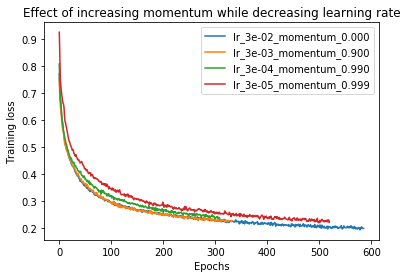

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure()
for learning_rate, momentum in learning_rate_momentum_tuples:
    val_loss = model_state_by_param_sgd_2['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)].history['loss']
    plt.plot(val_loss, label='lr_{:.0e}_momentum_{:.3f}'.format(learning_rate, momentum))
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Effect of increasing momentum while decreasing learning rate')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_effect_of_increasing_momentum_while_decreasing_learning_rate_training_loss')

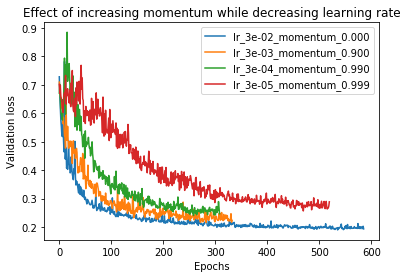

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure()
for learning_rate, momentum in learning_rate_momentum_tuples:
    val_loss = model_state_by_param_sgd_2['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)].history['val_loss']
    plt.plot(val_loss, label='lr_{:.0e}_momentum_{:.3f}'.format(learning_rate, momentum))
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Effect of increasing momentum while decreasing learning rate')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_effect_of_increasing_momentum_while_decreasing_learning_rate')

Now, let's try Nesterov momentum. Nesterov computes the gradient at (x + velocity) instead of x. Let's try it on 3e-4 and momentum 0.99.

In [50]:
model_state_by_param_sgd_3 = {}

learning_rate_momentum_nesterov_tuples = [
    (10**(-2.5), 0.9),   # Scale lr by 1-0.90 = 0.1 = 1e-1
    (10**(-3.5), 0.99),  # Scale lr by 1-0.99 = 0.01 = 1e-2
    (10**(-4.5), 0.999), # Scale lr by 1-0.999 = 0.001 = 1e-3
]

for learning_rate, momentum in learning_rate_momentum_nesterov_tuples:
    print("Learning rate: {}, momentum: {}, nesterov: True".format(learning_rate, momentum))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=True)
    model = ml_utils.build_model(optimizer=optimizer)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_{}_momentum_{}_best_model.h5'.format(learning_rate, momentum),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
    )
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model_state_by_param_sgd_3['lr_{:f}_momentum_{:f}_nesterov'.format(learning_rate, momentum)] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[mc, es],
    )

Learning rate: 0.0031622776601683794, momentum: 0.9, nesterov: True
Epoch 1/1000
    582/Unknown - 15s 27ms/step - loss: 0.7696 - accuracy: 0.5236
Epoch 00001: val_loss improved from inf to 0.67901, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 17s 29ms/step - loss: 0.7696 - accuracy: 0.5236 - val_loss: 0.6790 - val_accuracy: 0.5716
Epoch 2/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7185 - accuracy: 0.5468
Epoch 00002: val_loss improved from 0.67901 to 0.67109, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.7186 - accuracy: 0.5469 - val_loss: 0.6711 - val_accuracy: 0.5976
Epoch 3/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6941 - accuracy: 0.5821
Epoch 00003: val_loss improved from 0.6

Epoch 23/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4627 - accuracy: 0.7857
Epoch 00023: val_loss did not improve from 0.42730
582/582 [==============================] - 15s 25ms/step - loss: 0.4626 - accuracy: 0.7857 - val_loss: 0.4678 - val_accuracy: 0.7810
Epoch 24/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4561 - accuracy: 0.7878
Epoch 00024: val_loss did not improve from 0.42730
582/582 [==============================] - 15s 25ms/step - loss: 0.4561 - accuracy: 0.7879 - val_loss: 0.4394 - val_accuracy: 0.7964
Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4547 - accuracy: 0.7874
Epoch 00025: val_loss did not improve from 0.42730
582/582 [==============================] - 15s 25ms/step - loss: 0.4547 - accuracy: 0.7875 - val_loss: 0.4396 - val_accuracy: 0.7861
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.7982
Epoch 00026: val_loss improved from 0.42730 to 0.426

Epoch 48/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3641 - accuracy: 0.8392
Epoch 00048: val_loss did not improve from 0.31551
582/582 [==============================] - 15s 25ms/step - loss: 0.3644 - accuracy: 0.8391 - val_loss: 0.3353 - val_accuracy: 0.8525
Epoch 49/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3608 - accuracy: 0.8390
Epoch 00049: val_loss did not improve from 0.31551
582/582 [==============================] - 15s 25ms/step - loss: 0.3607 - accuracy: 0.8391 - val_loss: 0.3634 - val_accuracy: 0.8371
Epoch 50/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3625 - accuracy: 0.8414
Epoch 00050: val_loss did not improve from 0.31551
582/582 [==============================] - 15s 25ms/step - loss: 0.3625 - accuracy: 0.8414 - val_loss: 0.3317 - val_accuracy: 0.8530
Epoch 51/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3617 - accuracy: 0.8401
Epoch 00051: val_loss improved from 0.31551 to 0.307

Epoch 100/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3018 - accuracy: 0.8707
Epoch 00100: val_loss did not improve from 0.24526
582/582 [==============================] - 15s 25ms/step - loss: 0.3021 - accuracy: 0.8708 - val_loss: 0.2481 - val_accuracy: 0.8947
Epoch 101/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8711
Epoch 00101: val_loss did not improve from 0.24526
582/582 [==============================] - 15s 25ms/step - loss: 0.2977 - accuracy: 0.8713 - val_loss: 0.2502 - val_accuracy: 0.8899
Epoch 102/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8732
Epoch 00102: val_loss did not improve from 0.24526
582/582 [==============================] - 15s 25ms/step - loss: 0.2959 - accuracy: 0.8733 - val_loss: 0.2535 - val_accuracy: 0.8936
Epoch 103/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2928 - accuracy: 0.8752
Epoch 00103: val_loss did not improve from 0.245

579/582 [============================>.] - ETA: 0s - loss: 0.2688 - accuracy: 0.8841
Epoch 00153: val_loss did not improve from 0.22678
582/582 [==============================] - 15s 26ms/step - loss: 0.2688 - accuracy: 0.8840 - val_loss: 0.2304 - val_accuracy: 0.9011
Epoch 154/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2670 - accuracy: 0.8867
Epoch 00154: val_loss did not improve from 0.22678
582/582 [==============================] - 15s 25ms/step - loss: 0.2673 - accuracy: 0.8866 - val_loss: 0.2352 - val_accuracy: 0.8975
Epoch 155/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2685 - accuracy: 0.8855
Epoch 00155: val_loss did not improve from 0.22678
582/582 [==============================] - 15s 25ms/step - loss: 0.2686 - accuracy: 0.8854 - val_loss: 0.2532 - val_accuracy: 0.8904
Epoch 156/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2693 - accuracy: 0.8859
Epoch 00156: val_loss did not improve from 0.22678
582/582 [===

Epoch 181/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2543 - accuracy: 0.8919
Epoch 00181: val_loss improved from 0.22337 to 0.22056, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.2547 - accuracy: 0.8918 - val_loss: 0.2206 - val_accuracy: 0.9082
Epoch 182/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.8912
Epoch 00182: val_loss did not improve from 0.22056
582/582 [==============================] - 15s 25ms/step - loss: 0.2603 - accuracy: 0.8911 - val_loss: 0.2429 - val_accuracy: 0.8990
Epoch 183/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.8934
Epoch 00183: val_loss improved from 0.22056 to 0.21945, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.0031622776601683794_momentum_0.9_best_model.h5
582/582 [==================

Epoch 209/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8965
Epoch 00209: val_loss did not improve from 0.21879
582/582 [==============================] - 15s 25ms/step - loss: 0.2516 - accuracy: 0.8967 - val_loss: 0.2381 - val_accuracy: 0.8990
Epoch 210/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2446 - accuracy: 0.8988
Epoch 00210: val_loss did not improve from 0.21879
582/582 [==============================] - 15s 26ms/step - loss: 0.2446 - accuracy: 0.8988 - val_loss: 0.2256 - val_accuracy: 0.9022
Epoch 211/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2481 - accuracy: 0.8973
Epoch 00211: val_loss did not improve from 0.21879
582/582 [==============================] - 15s 26ms/step - loss: 0.2481 - accuracy: 0.8973 - val_loss: 0.2238 - val_accuracy: 0.9063
Epoch 212/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2428 - accuracy: 0.8989
Epoch 00212: val_loss did not improve from 0.218

Epoch 237/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9004
Epoch 00237: val_loss did not improve from 0.21530
582/582 [==============================] - 15s 25ms/step - loss: 0.2413 - accuracy: 0.9004 - val_loss: 0.2199 - val_accuracy: 0.9095
Epoch 238/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2372 - accuracy: 0.9023
Epoch 00238: val_loss did not improve from 0.21530
582/582 [==============================] - 15s 25ms/step - loss: 0.2371 - accuracy: 0.9024 - val_loss: 0.2159 - val_accuracy: 0.9071
Epoch 239/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2456 - accuracy: 0.8956
Epoch 00239: val_loss did not improve from 0.21530
582/582 [==============================] - 14s 25ms/step - loss: 0.2454 - accuracy: 0.8956 - val_loss: 0.2165 - val_accuracy: 0.9097
Epoch 240/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2433 - accuracy: 0.9007
Epoch 00240: val_loss did not improve from 0.215

Epoch 266/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.8994
Epoch 00266: val_loss did not improve from 0.21089
582/582 [==============================] - 15s 25ms/step - loss: 0.2396 - accuracy: 0.8994 - val_loss: 0.2189 - val_accuracy: 0.9052
Epoch 267/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9026
Epoch 00267: val_loss did not improve from 0.21089
582/582 [==============================] - 15s 25ms/step - loss: 0.2341 - accuracy: 0.9027 - val_loss: 0.2167 - val_accuracy: 0.9067
Epoch 268/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2349 - accuracy: 0.9014
Epoch 00268: val_loss did not improve from 0.21089
582/582 [==============================] - 15s 26ms/step - loss: 0.2351 - accuracy: 0.9014 - val_loss: 0.2290 - val_accuracy: 0.9024
Epoch 269/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2401 - accuracy: 0.8989
Epoch 00269: val_loss did not improve from 0.210

Epoch 00294: early stopping
Learning rate: 0.00031622776601683794, momentum: 0.99, nesterov: True
Epoch 1/1000
    582/Unknown - 16s 28ms/step - loss: 0.8121 - accuracy: 0.5206
Epoch 00001: val_loss improved from inf to 0.69212, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 18s 30ms/step - loss: 0.8121 - accuracy: 0.5206 - val_loss: 0.6921 - val_accuracy: 0.5327
Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7295 - accuracy: 0.5293
Epoch 00002: val_loss improved from 0.69212 to 0.69058, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.7294 - accuracy: 0.5294 - val_loss: 0.6906 - val_accuracy: 0.5213
Epoch 3/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7136 - accuracy: 0.5576
Epoch

Epoch 52/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3981 - accuracy: 0.8234
Epoch 00052: val_loss improved from 0.39087 to 0.38254, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3983 - accuracy: 0.8234 - val_loss: 0.3825 - val_accuracy: 0.8302
Epoch 53/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8243
Epoch 00053: val_loss did not improve from 0.38254
582/582 [==============================] - 15s 25ms/step - loss: 0.3873 - accuracy: 0.8243 - val_loss: 0.4722 - val_accuracy: 0.7820
Epoch 54/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3898 - accuracy: 0.8267
Epoch 00054: val_loss did not improve from 0.38254
582/582 [==============================] - 15s 25ms/step - loss: 0.3897 - accuracy: 0.8265 - val_loss: 0.4403 - val_accuracy: 0.7992
Epoch 55/1000
580/582 

579/582 [============================>.] - ETA: 0s - loss: 0.3183 - accuracy: 0.8622
Epoch 00104: val_loss did not improve from 0.28296
582/582 [==============================] - 15s 25ms/step - loss: 0.3179 - accuracy: 0.8623 - val_loss: 0.2986 - val_accuracy: 0.8773
Epoch 105/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3249 - accuracy: 0.8568
Epoch 00105: val_loss did not improve from 0.28296
582/582 [==============================] - 15s 25ms/step - loss: 0.3249 - accuracy: 0.8566 - val_loss: 0.2993 - val_accuracy: 0.8736
Epoch 106/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3139 - accuracy: 0.8640
Epoch 00106: val_loss did not improve from 0.28296
582/582 [==============================] - 15s 25ms/step - loss: 0.3137 - accuracy: 0.8641 - val_loss: 0.2865 - val_accuracy: 0.8805
Epoch 107/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3162 - accuracy: 0.8636
Epoch 00107: val_loss improved from 0.28296 to 0.28110, saving 

580/582 [============================>.] - ETA: 0s - loss: 0.2808 - accuracy: 0.8797
Epoch 00158: val_loss improved from 0.24676 to 0.24619, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2808 - accuracy: 0.8796 - val_loss: 0.2462 - val_accuracy: 0.8960
Epoch 159/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.8817
Epoch 00159: val_loss did not improve from 0.24619
582/582 [==============================] - 15s 25ms/step - loss: 0.2819 - accuracy: 0.8816 - val_loss: 0.2470 - val_accuracy: 0.8975
Epoch 160/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.8793
Epoch 00160: val_loss did not improve from 0.24619
582/582 [==============================] - 15s 25ms/step - loss: 0.2774 - accuracy: 0.8794 - val_loss: 0.2777 - val_accuracy: 0.8820
Epoch 161/1000
580/582 [==========

580/582 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.8913
Epoch 00210: val_loss did not improve from 0.22563
582/582 [==============================] - 15s 25ms/step - loss: 0.2576 - accuracy: 0.8914 - val_loss: 0.2259 - val_accuracy: 0.9054
Epoch 211/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2549 - accuracy: 0.8914
Epoch 00211: val_loss did not improve from 0.22563
582/582 [==============================] - 15s 25ms/step - loss: 0.2552 - accuracy: 0.8912 - val_loss: 0.2276 - val_accuracy: 0.9033
Epoch 212/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2535 - accuracy: 0.8908
Epoch 00212: val_loss did not improve from 0.22563
582/582 [==============================] - 15s 25ms/step - loss: 0.2535 - accuracy: 0.8909 - val_loss: 0.2355 - val_accuracy: 0.8998
Epoch 213/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2544 - accuracy: 0.8898
Epoch 00213: val_loss did not improve from 0.22563
582/582 [===

Epoch 238/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8946
Epoch 00238: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2497 - accuracy: 0.8946 - val_loss: 0.2227 - val_accuracy: 0.9080
Epoch 239/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8936
Epoch 00239: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2495 - accuracy: 0.8936 - val_loss: 0.2341 - val_accuracy: 0.9005
Epoch 240/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2467 - accuracy: 0.8957
Epoch 00240: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2466 - accuracy: 0.8957 - val_loss: 0.2218 - val_accuracy: 0.9076
Epoch 241/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.8942
Epoch 00241: val_loss improved from 0.22164 to 0

580/582 [============================>.] - ETA: 0s - loss: 0.2451 - accuracy: 0.8981
Epoch 00265: val_loss did not improve from 0.21531
582/582 [==============================] - 15s 25ms/step - loss: 0.2452 - accuracy: 0.8981 - val_loss: 0.2179 - val_accuracy: 0.9117
Epoch 266/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2429 - accuracy: 0.8978
Epoch 00266: val_loss did not improve from 0.21531
582/582 [==============================] - 15s 25ms/step - loss: 0.2429 - accuracy: 0.8978 - val_loss: 0.2205 - val_accuracy: 0.9082
Epoch 267/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2449 - accuracy: 0.8975
Epoch 00267: val_loss improved from 0.21531 to 0.21321, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2447 - accuracy: 0.8974 - val_loss: 0.2132 - val_accuracy: 0.9071
Epoch 268/1000
580/582 [==========

Epoch 293/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9016
Epoch 00293: val_loss did not improve from 0.20855
582/582 [==============================] - 15s 25ms/step - loss: 0.2343 - accuracy: 0.9017 - val_loss: 0.2106 - val_accuracy: 0.9121
Epoch 294/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9032
Epoch 00294: val_loss improved from 0.20855 to 0.20745, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2322 - accuracy: 0.9031 - val_loss: 0.2074 - val_accuracy: 0.9142
Epoch 295/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9022
Epoch 00295: val_loss improved from 0.20745 to 0.20724, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_0.00031622776601683794_momentum_0.99_best_model.h5
582/582 [==============

Epoch 320/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9046
Epoch 00320: val_loss did not improve from 0.20418
582/582 [==============================] - 15s 25ms/step - loss: 0.2311 - accuracy: 0.9046 - val_loss: 0.2076 - val_accuracy: 0.9097
Epoch 321/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2297 - accuracy: 0.9066
Epoch 00321: val_loss did not improve from 0.20418
582/582 [==============================] - 15s 25ms/step - loss: 0.2298 - accuracy: 0.9066 - val_loss: 0.2157 - val_accuracy: 0.9065
Epoch 322/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2335 - accuracy: 0.9031
Epoch 00322: val_loss did not improve from 0.20418
582/582 [==============================] - 15s 25ms/step - loss: 0.2336 - accuracy: 0.9029 - val_loss: 0.2103 - val_accuracy: 0.9112
Epoch 323/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2292 - accuracy: 0.9038
Epoch 00323: val_loss did not improve from 0.204

580/582 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9047
Epoch 00347: val_loss did not improve from 0.20247
582/582 [==============================] - 15s 25ms/step - loss: 0.2274 - accuracy: 0.9048 - val_loss: 0.2064 - val_accuracy: 0.9114
Epoch 348/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.9081
Epoch 00348: val_loss did not improve from 0.20247
582/582 [==============================] - 15s 25ms/step - loss: 0.2215 - accuracy: 0.9081 - val_loss: 0.2084 - val_accuracy: 0.9138
Epoch 349/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9073
Epoch 00349: val_loss did not improve from 0.20247
582/582 [==============================] - 15s 26ms/step - loss: 0.2254 - accuracy: 0.9074 - val_loss: 0.2133 - val_accuracy: 0.9110
Epoch 350/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2245 - accuracy: 0.9052
Epoch 00350: val_loss did not improve from 0.20247
582/582 [===

Epoch 375/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9094
Epoch 00375: val_loss did not improve from 0.19943
582/582 [==============================] - 15s 25ms/step - loss: 0.2188 - accuracy: 0.9093 - val_loss: 0.2005 - val_accuracy: 0.9183
Epoch 376/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9086
Epoch 00376: val_loss did not improve from 0.19943
582/582 [==============================] - 15s 25ms/step - loss: 0.2207 - accuracy: 0.9085 - val_loss: 0.2071 - val_accuracy: 0.9140
Epoch 377/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9088
Epoch 00377: val_loss did not improve from 0.19943
582/582 [==============================] - 15s 25ms/step - loss: 0.2175 - accuracy: 0.9090 - val_loss: 0.2136 - val_accuracy: 0.9104
Epoch 378/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2248 - accuracy: 0.9033
Epoch 00378: val_loss did not improve from 0.199

Epoch 404/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2199 - accuracy: 0.9107
Epoch 00404: val_loss did not improve from 0.19874
582/582 [==============================] - 15s 25ms/step - loss: 0.2199 - accuracy: 0.9106 - val_loss: 0.2034 - val_accuracy: 0.9157
Epoch 405/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2178 - accuracy: 0.9100
Epoch 00405: val_loss did not improve from 0.19874
582/582 [==============================] - 15s 25ms/step - loss: 0.2179 - accuracy: 0.9100 - val_loss: 0.2018 - val_accuracy: 0.9140
Epoch 406/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2193 - accuracy: 0.9096
Epoch 00406: val_loss did not improve from 0.19874
582/582 [==============================] - 15s 25ms/step - loss: 0.2190 - accuracy: 0.9097 - val_loss: 0.2016 - val_accuracy: 0.9129
Epoch 407/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2140 - accuracy: 0.9107
Epoch 00407: val_loss did not improve from 0.198

Epoch 433/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9096
Epoch 00433: val_loss did not improve from 0.19847
582/582 [==============================] - 15s 25ms/step - loss: 0.2171 - accuracy: 0.9096 - val_loss: 0.2035 - val_accuracy: 0.9149
Epoch 434/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2094 - accuracy: 0.9116
Epoch 00434: val_loss did not improve from 0.19847
582/582 [==============================] - 15s 25ms/step - loss: 0.2094 - accuracy: 0.9116 - val_loss: 0.2004 - val_accuracy: 0.9177
Epoch 435/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2196 - accuracy: 0.9062
Epoch 00435: val_loss did not improve from 0.19847
582/582 [==============================] - 15s 25ms/step - loss: 0.2197 - accuracy: 0.9061 - val_loss: 0.1997 - val_accuracy: 0.9166
Epoch 436/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2137 - accuracy: 0.9129
Epoch 00436: val_loss did not improve from 0.198

Epoch 462/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2106 - accuracy: 0.9124
Epoch 00462: val_loss did not improve from 0.19737
582/582 [==============================] - 15s 25ms/step - loss: 0.2106 - accuracy: 0.9125 - val_loss: 0.1991 - val_accuracy: 0.9142
Epoch 463/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2083 - accuracy: 0.9150
Epoch 00463: val_loss did not improve from 0.19737
582/582 [==============================] - 15s 25ms/step - loss: 0.2083 - accuracy: 0.9149 - val_loss: 0.1996 - val_accuracy: 0.9194
Epoch 464/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9154
Epoch 00464: val_loss did not improve from 0.19737
582/582 [==============================] - 15s 25ms/step - loss: 0.2076 - accuracy: 0.9153 - val_loss: 0.2040 - val_accuracy: 0.9147
Epoch 465/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2079 - accuracy: 0.9126
Epoch 00465: val_loss did not improve from 0.197

Epoch 491/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9122
Epoch 00491: val_loss did not improve from 0.19694
582/582 [==============================] - 15s 25ms/step - loss: 0.2108 - accuracy: 0.9124 - val_loss: 0.2046 - val_accuracy: 0.9132
Epoch 492/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2088 - accuracy: 0.9139
Epoch 00492: val_loss did not improve from 0.19694
582/582 [==============================] - 15s 25ms/step - loss: 0.2086 - accuracy: 0.9138 - val_loss: 0.2012 - val_accuracy: 0.9142
Epoch 493/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9155
Epoch 00493: val_loss did not improve from 0.19694
582/582 [==============================] - 15s 25ms/step - loss: 0.2067 - accuracy: 0.9153 - val_loss: 0.1994 - val_accuracy: 0.9166
Epoch 494/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2046 - accuracy: 0.9147
Epoch 00494: val_loss did not improve from 0.196

580/582 [============================>.] - ETA: 0s - loss: 0.2051 - accuracy: 0.9142
Epoch 00518: val_loss did not improve from 0.19362
582/582 [==============================] - 15s 25ms/step - loss: 0.2051 - accuracy: 0.9142 - val_loss: 0.1945 - val_accuracy: 0.9220
Epoch 519/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2061 - accuracy: 0.9172
Epoch 00519: val_loss did not improve from 0.19362
582/582 [==============================] - 15s 25ms/step - loss: 0.2063 - accuracy: 0.9171 - val_loss: 0.2042 - val_accuracy: 0.9168
Epoch 520/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9161
Epoch 00520: val_loss did not improve from 0.19362
582/582 [==============================] - 15s 25ms/step - loss: 0.2042 - accuracy: 0.9162 - val_loss: 0.1956 - val_accuracy: 0.9207
Epoch 521/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2020 - accuracy: 0.9159
Epoch 00521: val_loss improved from 0.19362 to 0.19340, saving 

Epoch 547/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9176
Epoch 00547: val_loss did not improve from 0.19340
582/582 [==============================] - 15s 25ms/step - loss: 0.2039 - accuracy: 0.9177 - val_loss: 0.1958 - val_accuracy: 0.9162
Epoch 548/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2019 - accuracy: 0.9192
Epoch 00548: val_loss did not improve from 0.19340
582/582 [==============================] - 15s 25ms/step - loss: 0.2019 - accuracy: 0.9194 - val_loss: 0.1960 - val_accuracy: 0.9183
Epoch 549/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2000 - accuracy: 0.9183
Epoch 00549: val_loss did not improve from 0.19340
582/582 [==============================] - 15s 25ms/step - loss: 0.2001 - accuracy: 0.9183 - val_loss: 0.2027 - val_accuracy: 0.9164
Epoch 550/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2067 - accuracy: 0.9164
Epoch 00550: val_loss did not improve from 0.193

Epoch 576/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2013 - accuracy: 0.9180
Epoch 00576: val_loss did not improve from 0.19111
582/582 [==============================] - 15s 25ms/step - loss: 0.2011 - accuracy: 0.9181 - val_loss: 0.1985 - val_accuracy: 0.9192
Epoch 577/1000
581/582 [============================>.] - ETA: 0s - loss: 0.1989 - accuracy: 0.9167
Epoch 00577: val_loss did not improve from 0.19111
582/582 [==============================] - 15s 26ms/step - loss: 0.1986 - accuracy: 0.9168 - val_loss: 0.1991 - val_accuracy: 0.9162
Epoch 578/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.9167
Epoch 00578: val_loss did not improve from 0.19111
582/582 [==============================] - 15s 25ms/step - loss: 0.2040 - accuracy: 0.9167 - val_loss: 0.1986 - val_accuracy: 0.9160
Epoch 579/1000
579/582 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9179
Epoch 00579: val_loss did not improve from 0.191

Epoch 605/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9165
Epoch 00605: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 25ms/step - loss: 0.2002 - accuracy: 0.9165 - val_loss: 0.1988 - val_accuracy: 0.9166
Epoch 606/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2028 - accuracy: 0.9177
Epoch 00606: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 26ms/step - loss: 0.2028 - accuracy: 0.9175 - val_loss: 0.1988 - val_accuracy: 0.9181
Epoch 607/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1984 - accuracy: 0.9170
Epoch 00607: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 25ms/step - loss: 0.1982 - accuracy: 0.9169 - val_loss: 0.1964 - val_accuracy: 0.9190
Epoch 608/1000
579/582 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9193
Epoch 00608: val_loss did not improve from 0.190

Epoch 634/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1952 - accuracy: 0.9213
Epoch 00634: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 25ms/step - loss: 0.1952 - accuracy: 0.9212 - val_loss: 0.1979 - val_accuracy: 0.9177
Epoch 635/1000
579/582 [============================>.] - ETA: 0s - loss: 0.1992 - accuracy: 0.9191
Epoch 00635: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 25ms/step - loss: 0.1989 - accuracy: 0.9192 - val_loss: 0.1954 - val_accuracy: 0.9194
Epoch 636/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1964 - accuracy: 0.9187
Epoch 00636: val_loss did not improve from 0.19033
582/582 [==============================] - 15s 25ms/step - loss: 0.1965 - accuracy: 0.9189 - val_loss: 0.1960 - val_accuracy: 0.9205
Epoch 637/1000
580/582 [============================>.] - ETA: 0s - loss: 0.1963 - accuracy: 0.9190
Epoch 00637: val_loss did not improve from 0.190

Epoch 15/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6206 - accuracy: 0.6623
Epoch 00015: val_loss improved from 0.58988 to 0.57824, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.6206 - accuracy: 0.6622 - val_loss: 0.5782 - val_accuracy: 0.6971
Epoch 16/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6122 - accuracy: 0.6684
Epoch 00016: val_loss did not improve from 0.57824
582/582 [==============================] - 15s 25ms/step - loss: 0.6123 - accuracy: 0.6682 - val_loss: 0.5787 - val_accuracy: 0.7008
Epoch 17/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6049 - accuracy: 0.6736
Epoch 00017: val_loss improved from 0.57824 to 0.57054, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [===============

Epoch 38/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5183 - accuracy: 0.7452
Epoch 00038: val_loss did not improve from 0.49776
582/582 [==============================] - 15s 25ms/step - loss: 0.5183 - accuracy: 0.7451 - val_loss: 0.5382 - val_accuracy: 0.7307
Epoch 39/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5105 - accuracy: 0.7475
Epoch 00039: val_loss did not improve from 0.49776
582/582 [==============================] - 15s 25ms/step - loss: 0.5103 - accuracy: 0.7475 - val_loss: 0.5126 - val_accuracy: 0.7463
Epoch 40/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.7518
Epoch 00040: val_loss did not improve from 0.49776
582/582 [==============================] - 15s 25ms/step - loss: 0.5085 - accuracy: 0.7517 - val_loss: 0.5057 - val_accuracy: 0.7509
Epoch 41/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5064 - accuracy: 0.7512
Epoch 00041: val_loss did not improve from 0.49776
5

Epoch 63/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4293 - accuracy: 0.7999
Epoch 00063: val_loss did not improve from 0.39196
582/582 [==============================] - 15s 25ms/step - loss: 0.4292 - accuracy: 0.7999 - val_loss: 0.4094 - val_accuracy: 0.8057
Epoch 64/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4230 - accuracy: 0.8080
Epoch 00064: val_loss did not improve from 0.39196
582/582 [==============================] - 15s 25ms/step - loss: 0.4227 - accuracy: 0.8080 - val_loss: 0.4130 - val_accuracy: 0.8087
Epoch 65/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.8041
Epoch 00065: val_loss did not improve from 0.39196
582/582 [==============================] - 15s 26ms/step - loss: 0.4264 - accuracy: 0.8042 - val_loss: 0.4003 - val_accuracy: 0.8128
Epoch 66/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4235 - accuracy: 0.8047
Epoch 00066: val_loss did not improve from 0.39196
5

Epoch 89/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.8267
Epoch 00089: val_loss improved from 0.35422 to 0.34766, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 25ms/step - loss: 0.3850 - accuracy: 0.8267 - val_loss: 0.3477 - val_accuracy: 0.8403
Epoch 90/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3854 - accuracy: 0.8265
Epoch 00090: val_loss did not improve from 0.34766
582/582 [==============================] - 15s 25ms/step - loss: 0.3853 - accuracy: 0.8267 - val_loss: 0.3501 - val_accuracy: 0.8416
Epoch 91/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3794 - accuracy: 0.8336
Epoch 00091: val_loss did not improve from 0.34766
582/582 [==============================] - 15s 25ms/step - loss: 0.3792 - accuracy: 0.8337 - val_loss: 0.3495 - val_accuracy: 0.8437
Epoch 92/1000
579/582

Epoch 116/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3389 - accuracy: 0.8519
Epoch 00116: val_loss did not improve from 0.31600
582/582 [==============================] - 15s 26ms/step - loss: 0.3391 - accuracy: 0.8519 - val_loss: 0.3342 - val_accuracy: 0.8489
Epoch 117/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3452 - accuracy: 0.8520
Epoch 00117: val_loss did not improve from 0.31600
582/582 [==============================] - 15s 26ms/step - loss: 0.3452 - accuracy: 0.8520 - val_loss: 0.3229 - val_accuracy: 0.8534
Epoch 118/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3465 - accuracy: 0.8477
Epoch 00118: val_loss did not improve from 0.31600
582/582 [==============================] - 15s 26ms/step - loss: 0.3462 - accuracy: 0.8479 - val_loss: 0.3629 - val_accuracy: 0.8358
Epoch 119/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8536
Epoch 00119: val_loss did not improve from 0.316

579/582 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8664
Epoch 00143: val_loss did not improve from 0.28238
582/582 [==============================] - 15s 26ms/step - loss: 0.3148 - accuracy: 0.8664 - val_loss: 0.2965 - val_accuracy: 0.8682
Epoch 144/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3146 - accuracy: 0.8643
Epoch 00144: val_loss did not improve from 0.28238
582/582 [==============================] - 15s 26ms/step - loss: 0.3144 - accuracy: 0.8643 - val_loss: 0.3004 - val_accuracy: 0.8661
Epoch 145/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8620
Epoch 00145: val_loss improved from 0.28238 to 0.28052, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.3127 - accuracy: 0.8621 - val_loss: 0.2805 - val_accuracy: 0.8730
Epoch 146/1000
580/582 [=========

Epoch 171/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3026 - accuracy: 0.8719
Epoch 00171: val_loss did not improve from 0.27033
582/582 [==============================] - 15s 26ms/step - loss: 0.3028 - accuracy: 0.8719 - val_loss: 0.2713 - val_accuracy: 0.8850
Epoch 172/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.8738
Epoch 00172: val_loss improved from 0.27033 to 0.26788, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2993 - accuracy: 0.8737 - val_loss: 0.2679 - val_accuracy: 0.8818
Epoch 173/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8756
Epoch 00173: val_loss did not improve from 0.26788
582/582 [==============================] - 15s 26ms/step - loss: 0.2959 - accuracy: 0.8758 - val_loss: 0.2847 - val_accuracy: 0.8762
Epoch 174/1000
579

579/582 [============================>.] - ETA: 0s - loss: 0.2823 - accuracy: 0.8807
Epoch 00198: val_loss did not improve from 0.25123
582/582 [==============================] - 15s 26ms/step - loss: 0.2819 - accuracy: 0.8808 - val_loss: 0.2672 - val_accuracy: 0.8848
Epoch 199/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2770 - accuracy: 0.8796
Epoch 00199: val_loss did not improve from 0.25123
582/582 [==============================] - 15s 26ms/step - loss: 0.2770 - accuracy: 0.8795 - val_loss: 0.2797 - val_accuracy: 0.8794
Epoch 200/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2790 - accuracy: 0.8816
Epoch 00200: val_loss did not improve from 0.25123
582/582 [==============================] - 15s 26ms/step - loss: 0.2786 - accuracy: 0.8818 - val_loss: 0.2801 - val_accuracy: 0.8822
Epoch 201/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2771 - accuracy: 0.8820
Epoch 00201: val_loss did not improve from 0.25123
582/582 [===

Epoch 226/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2700 - accuracy: 0.8863
Epoch 00226: val_loss did not improve from 0.24538
582/582 [==============================] - 15s 25ms/step - loss: 0.2703 - accuracy: 0.8863 - val_loss: 0.2604 - val_accuracy: 0.8904
Epoch 227/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.8853
Epoch 00227: val_loss did not improve from 0.24538
582/582 [==============================] - 15s 25ms/step - loss: 0.2692 - accuracy: 0.8853 - val_loss: 0.2629 - val_accuracy: 0.8880
Epoch 228/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2754 - accuracy: 0.8825
Epoch 00228: val_loss did not improve from 0.24538
582/582 [==============================] - 15s 25ms/step - loss: 0.2751 - accuracy: 0.8826 - val_loss: 0.2499 - val_accuracy: 0.8934
Epoch 229/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2664 - accuracy: 0.8861
Epoch 00229: val_loss did not improve from 0.245

579/582 [============================>.] - ETA: 0s - loss: 0.2580 - accuracy: 0.8912
Epoch 00253: val_loss improved from 0.23796 to 0.23773, saving model to pickled_objects/optimizers/new_base_model_sgd_trial_3_lr_3.1622776601683795e-05_momentum_0.999_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.2575 - accuracy: 0.8915 - val_loss: 0.2377 - val_accuracy: 0.9024
Epoch 254/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2560 - accuracy: 0.8936
Epoch 00254: val_loss did not improve from 0.23773
582/582 [==============================] - 15s 25ms/step - loss: 0.2563 - accuracy: 0.8935 - val_loss: 0.2439 - val_accuracy: 0.8988
Epoch 255/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2578 - accuracy: 0.8905
Epoch 00255: val_loss did not improve from 0.23773
582/582 [==============================] - 15s 25ms/step - loss: 0.2580 - accuracy: 0.8904 - val_loss: 0.2455 - val_accuracy: 0.8992
Epoch 256/1000
580/582 [=========

Epoch 281/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8945
Epoch 00281: val_loss did not improve from 0.23272
582/582 [==============================] - 15s 26ms/step - loss: 0.2519 - accuracy: 0.8945 - val_loss: 0.2348 - val_accuracy: 0.9035
Epoch 282/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2503 - accuracy: 0.8954
Epoch 00282: val_loss did not improve from 0.23272
582/582 [==============================] - 15s 26ms/step - loss: 0.2505 - accuracy: 0.8953 - val_loss: 0.2333 - val_accuracy: 0.9031
Epoch 283/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2536 - accuracy: 0.8905
Epoch 00283: val_loss did not improve from 0.23272
582/582 [==============================] - 15s 25ms/step - loss: 0.2536 - accuracy: 0.8907 - val_loss: 0.2358 - val_accuracy: 0.9005
Epoch 284/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2485 - accuracy: 0.8947
Epoch 00284: val_loss did not improve from 0.232

Epoch 310/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2453 - accuracy: 0.8988
Epoch 00310: val_loss did not improve from 0.22787
582/582 [==============================] - 15s 25ms/step - loss: 0.2455 - accuracy: 0.8987 - val_loss: 0.2310 - val_accuracy: 0.9067
Epoch 311/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2419 - accuracy: 0.8962
Epoch 00311: val_loss did not improve from 0.22787
582/582 [==============================] - 15s 25ms/step - loss: 0.2416 - accuracy: 0.8964 - val_loss: 0.2333 - val_accuracy: 0.9026
Epoch 312/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2396 - accuracy: 0.9002
Epoch 00312: val_loss did not improve from 0.22787
582/582 [==============================] - 15s 25ms/step - loss: 0.2395 - accuracy: 0.9001 - val_loss: 0.2461 - val_accuracy: 0.8962
Epoch 313/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2441 - accuracy: 0.8968
Epoch 00313: val_loss did not improve from 0.227

Epoch 338/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2449 - accuracy: 0.8981
Epoch 00338: val_loss did not improve from 0.22537
582/582 [==============================] - 15s 26ms/step - loss: 0.2447 - accuracy: 0.8982 - val_loss: 0.2309 - val_accuracy: 0.9022
Epoch 339/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2425 - accuracy: 0.8975
Epoch 00339: val_loss did not improve from 0.22537
582/582 [==============================] - 15s 25ms/step - loss: 0.2422 - accuracy: 0.8976 - val_loss: 0.2314 - val_accuracy: 0.8998
Epoch 340/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.9009
Epoch 00340: val_loss did not improve from 0.22537
582/582 [==============================] - 15s 25ms/step - loss: 0.2385 - accuracy: 0.9009 - val_loss: 0.2380 - val_accuracy: 0.9024
Epoch 341/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2413 - accuracy: 0.8987
Epoch 00341: val_loss did not improve from 0.225

Epoch 367/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.8999
Epoch 00367: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2390 - accuracy: 0.8998 - val_loss: 0.2296 - val_accuracy: 0.9007
Epoch 368/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2360 - accuracy: 0.9018
Epoch 00368: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2360 - accuracy: 0.9018 - val_loss: 0.2272 - val_accuracy: 0.9052
Epoch 369/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.8999
Epoch 00369: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2376 - accuracy: 0.8998 - val_loss: 0.2313 - val_accuracy: 0.9058
Epoch 370/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2359 - accuracy: 0.8994
Epoch 00370: val_loss did not improve from 0.221

Epoch 396/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9022
Epoch 00396: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2316 - accuracy: 0.9023 - val_loss: 0.2254 - val_accuracy: 0.9067
Epoch 397/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9011
Epoch 00397: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2330 - accuracy: 0.9010 - val_loss: 0.2313 - val_accuracy: 0.9009
Epoch 398/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2302 - accuracy: 0.9055
Epoch 00398: val_loss did not improve from 0.22164
582/582 [==============================] - 15s 25ms/step - loss: 0.2306 - accuracy: 0.9054 - val_loss: 0.2227 - val_accuracy: 0.9067
Epoch 399/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2328 - accuracy: 0.9029
Epoch 00399: val_loss did not improve from 0.221

In [51]:
ml_utils.save_model_state(model_state_by_param_sgd_3, 'optimizers/new_base_model_model_state_by_param_sgd_3')

Learning rate: 0.0032, momentum: 0.9
	No nesterov: min training loss 0.2242, min val loss 0.2163
	Nesterov: min training loss 0.2271, min val loss 0.2109


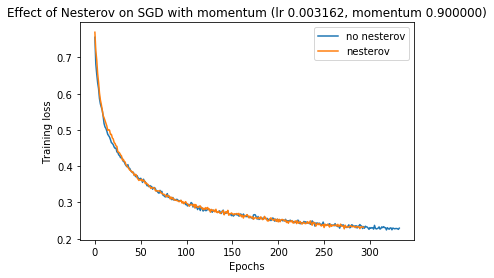

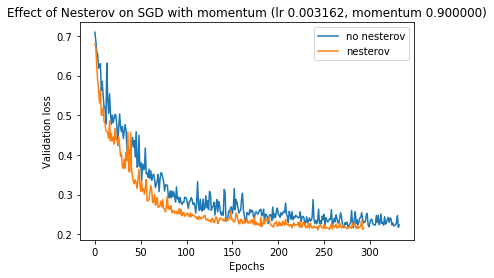

Learning rate: 0.0003, momentum: 0.99
	No nesterov: min training loss 0.2356, min val loss 0.2407
	Nesterov: min training loss 0.1891, min val loss 0.1903


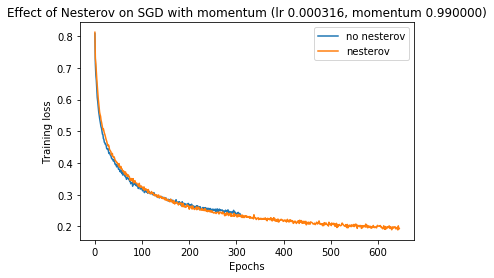

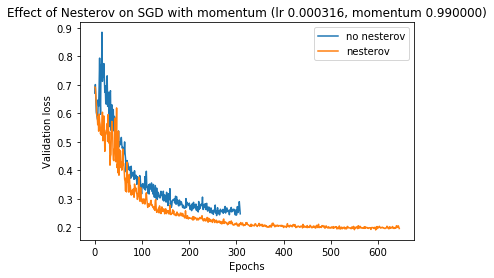

Learning rate: 0.0000, momentum: 0.999
	No nesterov: min training loss 0.2210, min val loss 0.2566
	Nesterov: min training loss 0.2280, min val loss 0.2216


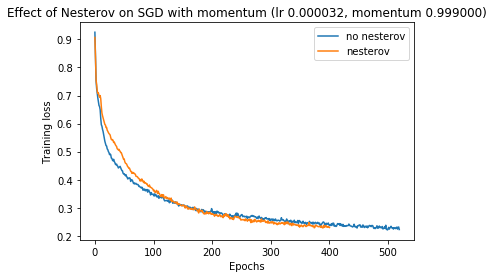

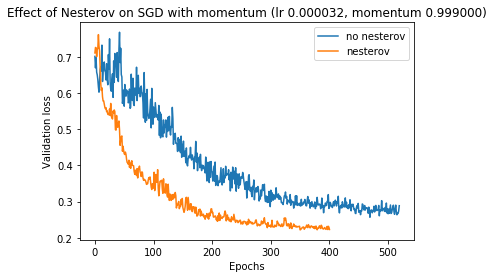

In [59]:
# Compare regular momentum vs Nesterov momentum
for learning_rate, momentum in learning_rate_momentum_nesterov_tuples:
    model_state_no_nesterov = model_state_by_param_sgd_2['lr_{:f}_momentum_{:f}'.format(learning_rate, momentum)]
    model_state_nesterov = model_state_by_param_sgd_3['lr_{:f}_momentum_{:f}_nesterov'.format(learning_rate, momentum)]
    
    print("Learning rate: {:.4f}, momentum: {}".format(learning_rate, momentum))
    print("\tNo nesterov: min training loss {:.4f}, min val loss {:.4f}".format(
        np.min(model_state_no_nesterov.history['loss']),
        np.min(model_state_no_nesterov.history['val_loss'])
    ))
    print("\tNesterov: min training loss {:.4f}, min val loss {:.4f}".format(
        np.min(model_state_nesterov.history['loss']),
        np.min(model_state_nesterov.history['val_loss'])
    ))
    
    plt.plot(model_state_no_nesterov.history['loss'], label='no nesterov')
    plt.plot(model_state_nesterov.history['loss'], label='nesterov')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title('Effect of Nesterov on SGD with momentum (lr {:f}, momentum {:f})'.format(learning_rate, momentum))
    plt.show()
    
    plt.plot(model_state_no_nesterov.history['val_loss'], label='no nesterov')
    plt.plot(model_state_nesterov.history['val_loss'], label='nesterov')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('Effect of Nesterov on SGD with momentum (lr {:f}, momentum {:f})'.format(learning_rate, momentum))
    plt.show()

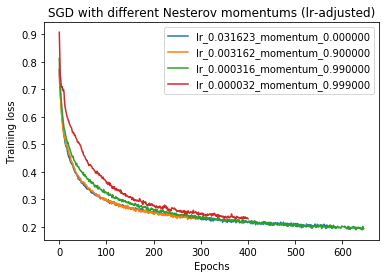

In [36]:
# Plot Nesterov train losses together
no_momentum_label = 'lr_{:f}_momentum_{:f}'.format(10**-1.5, 0.)
plt.plot(model_state_by_param_sgd_2[no_momentum_label].history['loss'], label=no_momentum_label)
for learning_rate, momentum in learning_rate_momentum_nesterov_tuples:
    model_state_nesterov = model_state_by_param_sgd_3['lr_{:f}_momentum_{:f}_nesterov'.format(learning_rate, momentum)]
    plt.plot(model_state_nesterov.history['loss'], label='lr_{:f}_momentum_{:f}'.format(learning_rate, momentum))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('SGD with different Nesterov momentums (lr-adjusted)')
plt.show()

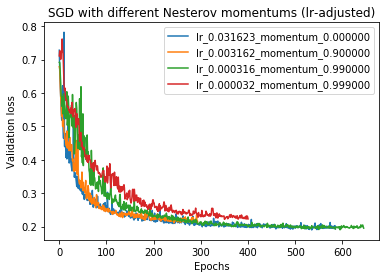

In [14]:
# Plot Nesterov validation losses together
no_momentum_label = 'lr_{:f}_momentum_{:f}'.format(10**-1.5, 0.)
plt.plot(model_state_by_param_sgd_2[no_momentum_label].history['val_loss'], label=no_momentum_label)
for learning_rate, momentum in learning_rate_momentum_nesterov_tuples:
    model_state_nesterov = model_state_by_param_sgd_3['lr_{:f}_momentum_{:f}_nesterov'.format(learning_rate, momentum)]
    plt.plot(model_state_nesterov.history['val_loss'], label='lr_{:f}_momentum_{:f}'.format(learning_rate, momentum))
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('SGD with different Nesterov momentums (lr-adjusted)')
plt.show()

Nesterov does seem to improve validation loss, with the improvement proportional to the magnitude of the momentum. Training loss is about the same.

**tl;dr: learning rate makes a big difference when using SGD, and should be one of the first parameters you search. Additionally, momentum seems to help smaller learning rates converge. As a rule of thumb, the larger the learning rate, the smaller the momentum to use.**

## Why does increasing momentum seem to compensate for a lower learning rate?

At first glance, it doesn't seem to make sense that increasing the momentum compensates for a lower learning rate. Let's take a look at the normal update equations for momentum:

$$
v := \beta v + (1-\beta) dw \\
w := w - \alpha v
$$

Increasing momentum increases the 'lookback' window over which we compute the average, but it doesn't increase the magnitude of the update itself. To see this, consider a trivial example where $dw$ is always equal to some constant $c$. Then when we compute $v$ repeatedly, we see this:

$$
v_0 = c \\
v_1 = \beta v_0 + (1-\beta) c = c \\
v_2 = \beta v_1 + (1-\beta) c = c \\
...
$$

Clearly, the magnitude of the velocity doesn't change, and so the update we apply always has magnitude $\alpha c$.

However, momentum is implemented in Keras as follows:

$$
v := \beta v - \alpha dw \\
w := w + v
$$

Let's see what happens with the trivial example above. When we compute $v$ repeatedly, we see this:

$$
v_0 = c \\
v_1 = \beta v_0 - \alpha c = (\beta - \alpha) c \\
v_2 = \beta v_1 - \alpha c = (\beta^2 - \beta \alpha - \alpha) c \\
v_3 = \beta v_2 - \alpha c = (\beta^3 - \beta^2 \alpha - \beta \alpha - \alpha) c \\
... \\
v_t = \left[\beta^t - \left[\sum_{i=0}^{t-1}{\beta^i}\right] \alpha \right] c \\
... \\
v_{\infty} = -\frac{\alpha}{1-\beta} c
$$

As $t$ goes to infinity, we can use the formula for an infinite series to see that the expression becomes $-\frac{\alpha}{1-\beta} c$. Clearly, the choice of momentum ($\beta$) *does* change the average magnitude of the update! Whereas in the original update equations, the update magnitude was $\alpha c$, here the update magnitude (in the limit) is $\frac{\alpha}{1-\beta}c$. Therefore, the choice of the momentum parameter affects the update magnitude. If you choose a momentum of 0.9, for example, that is akin to multiplying your learning rate by $(1-0.9)=10$!

We can conclude that in this specific implementation of momentum, the momentum parameter has a different effect than in the other implementation.

## RMSProp

The main idea of RMSProp is to divide the gradient by an exponential average of its recent magnitude. The update equations are as follows:

$$
a := \rho * a + (1-\rho)*dw^2 \\
w := w - \frac{\alpha * dw}{\sqrt{a + \epsilon}}
$$

Interestingly, RMSprop tries to normalize the size of the updates across different weights - in other words, reducing the update size when the gradient is large, and increasing it when the gradient is small. As an example, consider a weight parameter where the gradients are [5, 5, 5] (and assume that $\alpha = 1$). The denominator in the second equation is then 5, so the updates applied would be -[1, 1, 1]. Now, consider a weight parameter where the gradients are [0.5, 0.5, 0.5]; the denominator would be 0.5, giving the same updates -[1, 1, 1] as the previous case! In other words, RMSprop cares more about the direction (+ or -) of each weight and tries to normalize the size of the update step for each of these weights.

This is different from momentum, which applies larger updates for weight parameters with larger gradients. (For now, let's consider the regular formulation of momentum, not the one used in Keras.) Considering the above example where the gradient is [5, 5, 5], we can see that the resulting updates would be -[5, 5, 5], whereas for the [0.5, 0.5, 0.5] case the updates would be -[0.5, 0.5, 0.5]. Momentum thus is similar to regular SGD in that the larger the gradient, the larger the update.

In any case, let's try out RMSProp while varying the learning rate $\alpha$ (default 0.001) and the coefficient $\rho$ (default 0.9).

In [13]:
learning_rates = np.power(10, np.linspace(-3, 0, 7))
rhos = [0, 0.5, 0.9, 0.95, 0.99]

In [44]:
model_state_by_param_rms = {}

for learning_rate in learning_rates:
    for rho in rhos:
        print("Learning rate: {}, rho: {}".format(learning_rate, rho))
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate, rho=rho)
        model = ml_utils.build_model(optimizer=optimizer)
        mc = keras.callbacks.ModelCheckpoint(
            'pickled_objects/optimizers/new_base_model_rms_lr_{}_rho_{}_best_model.h5'.format(learning_rate, rho),
            monitor='val_loss',
            mode='min',
            verbose=1,
            save_best_only=True,
        )
        es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
        model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)] = ml_utils.train_model(
            model,
            train,
            validation,
            epochs=1000,
            extra_callbacks=[mc, es],
        )

Learning rate: 0.001, rho: 0
Epoch 1/1000
    582/Unknown - 17s 30ms/step - loss: 0.8846 - accuracy: 0.5793
Epoch 00001: val_loss improved from inf to 0.85532, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0_best_model.h5
582/582 [==============================] - 19s 32ms/step - loss: 0.8846 - accuracy: 0.5793 - val_loss: 0.8553 - val_accuracy: 0.5636
Epoch 2/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.6588
Epoch 00002: val_loss improved from 0.85532 to 0.85427, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6681 - accuracy: 0.6588 - val_loss: 0.8543 - val_accuracy: 0.5793
Epoch 3/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5951 - accuracy: 0.7118
Epoch 00003: val_loss did not improve from 0.85427
582/582 [==============================] - 16s 27ms/step - loss: 0.5952 - accuracy: 0.711

Epoch 28/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6703 - accuracy: 0.7753
Epoch 00028: val_loss did not improve from 0.67670
582/582 [==============================] - 16s 27ms/step - loss: 0.6689 - accuracy: 0.7754 - val_loss: 1.5381 - val_accuracy: 0.6840
Epoch 29/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6920 - accuracy: 0.7739
Epoch 00029: val_loss did not improve from 0.67670
582/582 [==============================] - 16s 27ms/step - loss: 0.6916 - accuracy: 0.7740 - val_loss: 1.4600 - val_accuracy: 0.6726
Epoch 30/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7261 - accuracy: 0.7744
Epoch 00030: val_loss did not improve from 0.67670
582/582 [==============================] - 16s 27ms/step - loss: 0.7255 - accuracy: 0.7745 - val_loss: 4.0697 - val_accuracy: 0.5911
Epoch 31/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.7736
Epoch 00031: val_loss did not improve from 0.67670
5

Epoch 55/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7124 - accuracy: 0.7804
Epoch 00055: val_loss improved from 0.38730 to 0.34517, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7135 - accuracy: 0.7804 - val_loss: 0.3452 - val_accuracy: 0.8583
Epoch 56/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.7887
Epoch 00056: val_loss did not improve from 0.34517
582/582 [==============================] - 16s 27ms/step - loss: 0.6905 - accuracy: 0.7886 - val_loss: 1.4380 - val_accuracy: 0.8523
Epoch 57/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7376 - accuracy: 0.7817
Epoch 00057: val_loss improved from 0.34517 to 0.33478, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7392 - accuracy: 0.7816 -

Epoch 83/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5260 - accuracy: 0.8261
Epoch 00083: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5257 - accuracy: 0.8262 - val_loss: 0.4868 - val_accuracy: 0.8442
Epoch 84/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.8212
Epoch 00084: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5402 - accuracy: 0.8214 - val_loss: 0.4262 - val_accuracy: 0.8590
Epoch 85/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.8240
Epoch 00085: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5326 - accuracy: 0.8239 - val_loss: 0.6989 - val_accuracy: 0.8042
Epoch 86/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.8217
Epoch 00086: val_loss did not improve from 0.31717
5

Epoch 112/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5984 - accuracy: 0.8256
Epoch 00112: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5980 - accuracy: 0.8257 - val_loss: 0.6208 - val_accuracy: 0.8169
Epoch 113/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5933 - accuracy: 0.8248
Epoch 00113: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5931 - accuracy: 0.8250 - val_loss: 0.5584 - val_accuracy: 0.8278
Epoch 114/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5788 - accuracy: 0.8240
Epoch 00114: val_loss did not improve from 0.31717
582/582 [==============================] - 16s 27ms/step - loss: 0.5778 - accuracy: 0.8241 - val_loss: 0.4665 - val_accuracy: 0.8358
Epoch 115/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5976 - accuracy: 0.8200
Epoch 00115: val_loss did not improve from 0.317

Epoch 13/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4497 - accuracy: 0.8045
Epoch 00013: val_loss did not improve from 0.53561
582/582 [==============================] - 15s 27ms/step - loss: 0.4494 - accuracy: 0.8046 - val_loss: 0.5689 - val_accuracy: 0.7537
Epoch 14/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4380 - accuracy: 0.8129
Epoch 00014: val_loss did not improve from 0.53561
582/582 [==============================] - 16s 27ms/step - loss: 0.4384 - accuracy: 0.8131 - val_loss: 0.6983 - val_accuracy: 0.7324
Epoch 15/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4385 - accuracy: 0.8088
Epoch 00015: val_loss did not improve from 0.53561
582/582 [==============================] - 16s 27ms/step - loss: 0.4390 - accuracy: 0.8085 - val_loss: 0.5698 - val_accuracy: 0.7638
Epoch 16/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.8152
Epoch 00016: val_loss improved from 0.53561 to 0.507

Epoch 40/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4334 - accuracy: 0.8278
Epoch 00040: val_loss did not improve from 0.39696
582/582 [==============================] - 16s 27ms/step - loss: 0.4336 - accuracy: 0.8277 - val_loss: 0.5058 - val_accuracy: 0.7599
Epoch 41/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4372 - accuracy: 0.8268
Epoch 00041: val_loss did not improve from 0.39696
582/582 [==============================] - 16s 27ms/step - loss: 0.4371 - accuracy: 0.8269 - val_loss: 0.4077 - val_accuracy: 0.8325
Epoch 42/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4426 - accuracy: 0.8313
Epoch 00042: val_loss improved from 0.39696 to 0.35754, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.5_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4425 - accuracy: 0.8312 - val_loss: 0.3575 - val_accuracy: 0.8512
Epoch 43/1000
581/582 [============================>.

Epoch 68/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4070 - accuracy: 0.8337
Epoch 00068: val_loss did not improve from 0.34928
582/582 [==============================] - 16s 27ms/step - loss: 0.4067 - accuracy: 0.8338 - val_loss: 0.4376 - val_accuracy: 0.8061
Epoch 69/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4112 - accuracy: 0.8358
Epoch 00069: val_loss did not improve from 0.34928
582/582 [==============================] - 16s 27ms/step - loss: 0.4109 - accuracy: 0.8358 - val_loss: 0.3550 - val_accuracy: 0.8444
Epoch 70/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4105 - accuracy: 0.8398
Epoch 00070: val_loss did not improve from 0.34928
582/582 [==============================] - 16s 27ms/step - loss: 0.4103 - accuracy: 0.8396 - val_loss: 0.3537 - val_accuracy: 0.8442
Epoch 71/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4080 - accuracy: 0.8385
Epoch 00071: val_loss did not improve from 0.34928
5

Epoch 97/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4025 - accuracy: 0.8437
Epoch 00097: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4020 - accuracy: 0.8437 - val_loss: 0.4609 - val_accuracy: 0.7825
Epoch 98/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4025 - accuracy: 0.8385
Epoch 00098: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4024 - accuracy: 0.8384 - val_loss: 0.3649 - val_accuracy: 0.7923
Epoch 99/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4083 - accuracy: 0.8360
Epoch 00099: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4082 - accuracy: 0.8361 - val_loss: 0.4465 - val_accuracy: 0.7857
Epoch 100/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4037 - accuracy: 0.8379
Epoch 00100: val_loss did not improve from 0.33599


Epoch 126/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.8339
Epoch 00126: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4264 - accuracy: 0.8337 - val_loss: 0.3368 - val_accuracy: 0.8138
Epoch 127/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4269 - accuracy: 0.8298
Epoch 00127: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4269 - accuracy: 0.8297 - val_loss: 0.4238 - val_accuracy: 0.7580
Epoch 128/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4165 - accuracy: 0.8320
Epoch 00128: val_loss did not improve from 0.33599
582/582 [==============================] - 16s 27ms/step - loss: 0.4163 - accuracy: 0.8320 - val_loss: 0.3590 - val_accuracy: 0.7898
Epoch 00128: early stopping
Learning rate: 0.001, rho: 0.9
Epoch 1/1000
    582/Unknown - 18s 31ms/step - loss: 0.8196 - accuracy: 0.5800
Epoch 0000

Epoch 23/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3663 - accuracy: 0.8412
Epoch 00023: val_loss improved from 0.34368 to 0.33431, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3659 - accuracy: 0.8412 - val_loss: 0.3343 - val_accuracy: 0.8575
Epoch 24/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3759 - accuracy: 0.8395
Epoch 00024: val_loss improved from 0.33431 to 0.33138, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3763 - accuracy: 0.8393 - val_loss: 0.3314 - val_accuracy: 0.8594
Epoch 25/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3691 - accuracy: 0.8410
Epoch 00025: val_loss did not improve from 0.33138
582/582 [==============================] - 16s 27ms/step - loss: 0.3691 - accuracy: 0.84

Epoch 77/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3015 - accuracy: 0.8784
Epoch 00077: val_loss did not improve from 0.24565
582/582 [==============================] - 16s 27ms/step - loss: 0.3011 - accuracy: 0.8786 - val_loss: 0.2493 - val_accuracy: 0.8878
Epoch 78/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8773
Epoch 00078: val_loss did not improve from 0.24565
582/582 [==============================] - 16s 27ms/step - loss: 0.2968 - accuracy: 0.8777 - val_loss: 0.2492 - val_accuracy: 0.8947
Epoch 79/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2973 - accuracy: 0.8787
Epoch 00079: val_loss improved from 0.24565 to 0.24412, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.2973 - accuracy: 0.8786 - val_loss: 0.2441 - val_accuracy: 0.8960
Epoch 80/1000
580/582 [============================>.

Epoch 105/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2903 - accuracy: 0.8838
Epoch 00105: val_loss did not improve from 0.23837
582/582 [==============================] - 16s 27ms/step - loss: 0.2901 - accuracy: 0.8838 - val_loss: 0.2655 - val_accuracy: 0.8897
Epoch 106/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2889 - accuracy: 0.8825
Epoch 00106: val_loss did not improve from 0.23837
582/582 [==============================] - 16s 27ms/step - loss: 0.2889 - accuracy: 0.8824 - val_loss: 0.2438 - val_accuracy: 0.8960
Epoch 107/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2844 - accuracy: 0.8839
Epoch 00107: val_loss did not improve from 0.23837
582/582 [==============================] - 16s 27ms/step - loss: 0.2842 - accuracy: 0.8838 - val_loss: 0.2390 - val_accuracy: 0.8934
Epoch 108/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2889 - accuracy: 0.8830
Epoch 00108: val_loss did not improve from 0.238

581/582 [============================>.] - ETA: 0s - loss: 0.2839 - accuracy: 0.8847
Epoch 00133: val_loss did not improve from 0.22947
582/582 [==============================] - 16s 27ms/step - loss: 0.2839 - accuracy: 0.8846 - val_loss: 0.2445 - val_accuracy: 0.8929
Epoch 134/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2843 - accuracy: 0.8855
Epoch 00134: val_loss did not improve from 0.22947
582/582 [==============================] - 16s 27ms/step - loss: 0.2842 - accuracy: 0.8854 - val_loss: 0.2599 - val_accuracy: 0.8884
Epoch 135/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8851
Epoch 00135: val_loss did not improve from 0.22947
582/582 [==============================] - 15s 27ms/step - loss: 0.2812 - accuracy: 0.8851 - val_loss: 0.2352 - val_accuracy: 0.8962
Epoch 136/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2786 - accuracy: 0.8885
Epoch 00136: val_loss did not improve from 0.22947
582/582 [===

Epoch 190/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.8897
Epoch 00190: val_loss improved from 0.22503 to 0.22259, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.2745 - accuracy: 0.8897 - val_loss: 0.2226 - val_accuracy: 0.9039
Epoch 191/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2743 - accuracy: 0.8919
Epoch 00191: val_loss did not improve from 0.22259
582/582 [==============================] - 15s 27ms/step - loss: 0.2740 - accuracy: 0.8920 - val_loss: 0.2322 - val_accuracy: 0.9013
Epoch 192/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2756 - accuracy: 0.8904
Epoch 00192: val_loss did not improve from 0.22259
582/582 [==============================] - 15s 27ms/step - loss: 0.2752 - accuracy: 0.8904 - val_loss: 0.2281 - val_accuracy: 0.9061
Epoch 193/1000
581/582 [==========================

Epoch 6/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.7829
Epoch 00006: val_loss improved from 0.54555 to 0.49054, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4659 - accuracy: 0.7827 - val_loss: 0.4905 - val_accuracy: 0.7620
Epoch 7/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4480 - accuracy: 0.7929
Epoch 00007: val_loss improved from 0.49054 to 0.47666, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4478 - accuracy: 0.7930 - val_loss: 0.4767 - val_accuracy: 0.7676
Epoch 8/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4405 - accuracy: 0.8047
Epoch 00008: val_loss improved from 0.47666 to 0.46025, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best

Epoch 31/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3411 - accuracy: 0.8551
Epoch 00031: val_loss did not improve from 0.27611
582/582 [==============================] - 16s 27ms/step - loss: 0.3411 - accuracy: 0.8551 - val_loss: 0.2819 - val_accuracy: 0.8768
Epoch 32/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3423 - accuracy: 0.8540
Epoch 00032: val_loss did not improve from 0.27611
582/582 [==============================] - 16s 27ms/step - loss: 0.3424 - accuracy: 0.8541 - val_loss: 0.2827 - val_accuracy: 0.8755
Epoch 33/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8546
Epoch 00033: val_loss did not improve from 0.27611
582/582 [==============================] - 16s 27ms/step - loss: 0.3404 - accuracy: 0.8546 - val_loss: 0.2770 - val_accuracy: 0.8824
Epoch 34/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3317 - accuracy: 0.8585
Epoch 00034: val_loss improved from 0.27611 to 0.269

Epoch 85/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2906 - accuracy: 0.8782
Epoch 00085: val_loss did not improve from 0.23648
582/582 [==============================] - 16s 27ms/step - loss: 0.2904 - accuracy: 0.8782 - val_loss: 0.2553 - val_accuracy: 0.8897
Epoch 86/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.8828
Epoch 00086: val_loss did not improve from 0.23648
582/582 [==============================] - 16s 27ms/step - loss: 0.2851 - accuracy: 0.8827 - val_loss: 0.2458 - val_accuracy: 0.8968
Epoch 87/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2863 - accuracy: 0.8802
Epoch 00087: val_loss did not improve from 0.23648
582/582 [==============================] - 16s 27ms/step - loss: 0.2859 - accuracy: 0.8803 - val_loss: 0.2442 - val_accuracy: 0.8990
Epoch 88/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2894 - accuracy: 0.8811
Epoch 00088: val_loss did not improve from 0.23648
5

581/582 [============================>.] - ETA: 0s - loss: 0.2727 - accuracy: 0.8889
Epoch 00140: val_loss did not improve from 0.22444
582/582 [==============================] - 16s 27ms/step - loss: 0.2725 - accuracy: 0.8890 - val_loss: 0.2265 - val_accuracy: 0.9011
Epoch 141/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2658 - accuracy: 0.8928
Epoch 00141: val_loss did not improve from 0.22444
582/582 [==============================] - 16s 27ms/step - loss: 0.2656 - accuracy: 0.8928 - val_loss: 0.2260 - val_accuracy: 0.9033
Epoch 142/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2724 - accuracy: 0.8868
Epoch 00142: val_loss did not improve from 0.22444
582/582 [==============================] - 16s 27ms/step - loss: 0.2724 - accuracy: 0.8868 - val_loss: 0.2275 - val_accuracy: 0.9031
Epoch 143/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.8924
Epoch 00143: val_loss did not improve from 0.22444
582/582 [===

Epoch 196/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2591 - accuracy: 0.8950
Epoch 00196: val_loss did not improve from 0.21879
582/582 [==============================] - 16s 27ms/step - loss: 0.2589 - accuracy: 0.8951 - val_loss: 0.2277 - val_accuracy: 0.8962
Epoch 197/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2566 - accuracy: 0.8986
Epoch 00197: val_loss improved from 0.21879 to 0.21707, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.2563 - accuracy: 0.8987 - val_loss: 0.2171 - val_accuracy: 0.9078
Epoch 198/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2594 - accuracy: 0.8913
Epoch 00198: val_loss did not improve from 0.21707
582/582 [==============================] - 16s 28ms/step - loss: 0.2592 - accuracy: 0.8913 - val_loss: 0.2232 - val_accuracy: 0.9052
Epoch 199/1000
581/582 [=========================

580/582 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9026
Epoch 00251: val_loss did not improve from 0.20979
582/582 [==============================] - 16s 27ms/step - loss: 0.2454 - accuracy: 0.9027 - val_loss: 0.2142 - val_accuracy: 0.9084
Epoch 252/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8972
Epoch 00252: val_loss did not improve from 0.20979
582/582 [==============================] - 16s 27ms/step - loss: 0.2520 - accuracy: 0.8973 - val_loss: 0.2204 - val_accuracy: 0.9119
Epoch 253/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2579 - accuracy: 0.8950
Epoch 00253: val_loss did not improve from 0.20979
582/582 [==============================] - 16s 27ms/step - loss: 0.2577 - accuracy: 0.8951 - val_loss: 0.2276 - val_accuracy: 0.9018
Epoch 254/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2519 - accuracy: 0.8970
Epoch 00254: val_loss did not improve from 0.20979
582/582 [===

Epoch 280/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2446 - accuracy: 0.9022
Epoch 00280: val_loss did not improve from 0.20979
582/582 [==============================] - 16s 27ms/step - loss: 0.2444 - accuracy: 0.9023 - val_loss: 0.2151 - val_accuracy: 0.9076
Epoch 281/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.8977
Epoch 00281: val_loss improved from 0.20979 to 0.20955, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.2483 - accuracy: 0.8976 - val_loss: 0.2096 - val_accuracy: 0.9082
Epoch 282/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2471 - accuracy: 0.8996
Epoch 00282: val_loss did not improve from 0.20955
582/582 [==============================] - 16s 27ms/step - loss: 0.2475 - accuracy: 0.8993 - val_loss: 0.2148 - val_accuracy: 0.9110
Epoch 283/1000
579/582 [=========================

Epoch 337/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.8982
Epoch 00337: val_loss did not improve from 0.20813
582/582 [==============================] - 16s 27ms/step - loss: 0.2489 - accuracy: 0.8981 - val_loss: 0.2128 - val_accuracy: 0.9136
Epoch 338/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.9007
Epoch 00338: val_loss did not improve from 0.20813
582/582 [==============================] - 16s 27ms/step - loss: 0.2528 - accuracy: 0.9008 - val_loss: 0.2251 - val_accuracy: 0.9067
Epoch 339/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2507 - accuracy: 0.8995
Epoch 00339: val_loss improved from 0.20813 to 0.20610, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.001_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.2505 - accuracy: 0.8995 - val_loss: 0.2061 - val_accuracy: 0.9127
Epoch 340/1000
579/582 [=========================

Epoch 366/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2495 - accuracy: 0.8988
Epoch 00366: val_loss did not improve from 0.20610
582/582 [==============================] - 16s 27ms/step - loss: 0.2496 - accuracy: 0.8989 - val_loss: 0.2128 - val_accuracy: 0.9106
Epoch 367/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2462 - accuracy: 0.9007
Epoch 00367: val_loss did not improve from 0.20610
582/582 [==============================] - 16s 27ms/step - loss: 0.2462 - accuracy: 0.9007 - val_loss: 0.2293 - val_accuracy: 0.9063
Epoch 368/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2518 - accuracy: 0.8987
Epoch 00368: val_loss did not improve from 0.20610
582/582 [==============================] - 16s 27ms/step - loss: 0.2517 - accuracy: 0.8987 - val_loss: 0.2088 - val_accuracy: 0.9121
Epoch 369/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2465 - accuracy: 0.9017
Epoch 00369: val_loss did not improve from 0.206

Epoch 5/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7980 - accuracy: 0.6873
Epoch 00005: val_loss did not improve from 0.58325
582/582 [==============================] - 16s 27ms/step - loss: 0.7974 - accuracy: 0.6874 - val_loss: 0.6882 - val_accuracy: 0.7455
Epoch 6/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7780 - accuracy: 0.6968
Epoch 00006: val_loss did not improve from 0.58325
582/582 [==============================] - 16s 27ms/step - loss: 0.7770 - accuracy: 0.6967 - val_loss: 0.7384 - val_accuracy: 0.7188
Epoch 7/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7718 - accuracy: 0.7065
Epoch 00007: val_loss did not improve from 0.58325
582/582 [==============================] - 16s 27ms/step - loss: 0.7721 - accuracy: 0.7065 - val_loss: 0.6345 - val_accuracy: 0.7126
Epoch 8/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7570 - accuracy: 0.7105
Epoch 00008: val_loss did not improve from 0.58325
582/5

Epoch 32/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7534 - accuracy: 0.7548
Epoch 00032: val_loss did not improve from 0.39889
582/582 [==============================] - 16s 27ms/step - loss: 0.7528 - accuracy: 0.7549 - val_loss: 0.4046 - val_accuracy: 0.8319
Epoch 33/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7506 - accuracy: 0.7536
Epoch 00033: val_loss did not improve from 0.39889
582/582 [==============================] - 16s 27ms/step - loss: 0.7511 - accuracy: 0.7535 - val_loss: 0.4189 - val_accuracy: 0.8098
Epoch 34/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7627 - accuracy: 0.7524
Epoch 00034: val_loss did not improve from 0.39889
582/582 [==============================] - 16s 27ms/step - loss: 0.7630 - accuracy: 0.7524 - val_loss: 0.4404 - val_accuracy: 0.8022
Epoch 35/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7424 - accuracy: 0.7503
Epoch 00035: val_loss did not improve from 0.39889
5

Epoch 87/1000
581/582 [============================>.] - ETA: 0s - loss: 0.8644 - accuracy: 0.7837
Epoch 00087: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 0.8632 - accuracy: 0.7838 - val_loss: 0.4152 - val_accuracy: 0.8601
Epoch 88/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9094 - accuracy: 0.7896
Epoch 00088: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 0.9086 - accuracy: 0.7897 - val_loss: 0.3806 - val_accuracy: 0.8676
Epoch 89/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9126 - accuracy: 0.7871
Epoch 00089: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 0.9119 - accuracy: 0.7872 - val_loss: 0.4547 - val_accuracy: 0.8489
Epoch 90/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9423 - accuracy: 0.7898
Epoch 00090: val_loss did not improve from 0.31147
5

Epoch 116/1000
581/582 [============================>.] - ETA: 0s - loss: 1.0319 - accuracy: 0.7937
Epoch 00116: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 1.0315 - accuracy: 0.7937 - val_loss: 0.5643 - val_accuracy: 0.7721
Epoch 117/1000
580/582 [============================>.] - ETA: 0s - loss: 1.0298 - accuracy: 0.7897
Epoch 00117: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 1.0295 - accuracy: 0.7898 - val_loss: 0.4770 - val_accuracy: 0.8052
Epoch 118/1000
581/582 [============================>.] - ETA: 0s - loss: 1.0592 - accuracy: 0.7934
Epoch 00118: val_loss did not improve from 0.31147
582/582 [==============================] - 16s 27ms/step - loss: 1.0590 - accuracy: 0.7934 - val_loss: 0.4384 - val_accuracy: 0.8282
Epoch 119/1000
581/582 [============================>.] - ETA: 0s - loss: 1.0733 - accuracy: 0.7963
Epoch 00119: val_loss did not improve from 0.311

Epoch 144/1000
580/582 [============================>.] - ETA: 0s - loss: 0.9179 - accuracy: 0.8115
Epoch 00144: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 28ms/step - loss: 0.9167 - accuracy: 0.8115 - val_loss: 0.4273 - val_accuracy: 0.8762
Epoch 145/1000
579/582 [============================>.] - ETA: 0s - loss: 0.8984 - accuracy: 0.8123
Epoch 00145: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 0.8982 - accuracy: 0.8121 - val_loss: 0.3451 - val_accuracy: 0.8852
Epoch 146/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9600 - accuracy: 0.8069
Epoch 00146: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 0.9595 - accuracy: 0.8068 - val_loss: 0.4784 - val_accuracy: 0.8740
Epoch 147/1000
580/582 [============================>.] - ETA: 0s - loss: 0.9306 - accuracy: 0.8091
Epoch 00147: val_loss did not improve from 0.274

Epoch 173/1000
581/582 [============================>.] - ETA: 0s - loss: 1.1498 - accuracy: 0.8087
Epoch 00173: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 1.1487 - accuracy: 0.8087 - val_loss: 0.3738 - val_accuracy: 0.8949
Epoch 174/1000
580/582 [============================>.] - ETA: 0s - loss: 1.2009 - accuracy: 0.8096
Epoch 00174: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 1.2005 - accuracy: 0.8096 - val_loss: 0.3585 - val_accuracy: 0.8687
Epoch 175/1000
580/582 [============================>.] - ETA: 0s - loss: 1.1651 - accuracy: 0.8149
Epoch 00175: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 1.1650 - accuracy: 0.8147 - val_loss: 0.2972 - val_accuracy: 0.8929
Epoch 176/1000
581/582 [============================>.] - ETA: 0s - loss: 1.2334 - accuracy: 0.8079
Epoch 00176: val_loss did not improve from 0.274

Epoch 37/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5174 - accuracy: 0.8008
Epoch 00037: val_loss did not improve from 0.34583
582/582 [==============================] - 16s 27ms/step - loss: 0.5171 - accuracy: 0.8009 - val_loss: 0.3752 - val_accuracy: 0.8242
Epoch 38/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.8033
Epoch 00038: val_loss did not improve from 0.34583
582/582 [==============================] - 16s 27ms/step - loss: 0.5130 - accuracy: 0.8032 - val_loss: 0.4209 - val_accuracy: 0.8298
Epoch 39/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.8034
Epoch 00039: val_loss did not improve from 0.34583
582/582 [==============================] - 16s 27ms/step - loss: 0.5390 - accuracy: 0.8031 - val_loss: 0.4904 - val_accuracy: 0.6720
Epoch 40/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5104 - accuracy: 0.8027
Epoch 00040: val_loss did not improve from 0.34583
5

Epoch 94/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.8013
Epoch 00094: val_loss did not improve from 0.32984
582/582 [==============================] - 16s 27ms/step - loss: 0.5530 - accuracy: 0.8012 - val_loss: 0.4849 - val_accuracy: 0.6730
Epoch 95/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.8023
Epoch 00095: val_loss did not improve from 0.32984
582/582 [==============================] - 16s 27ms/step - loss: 0.5564 - accuracy: 0.8024 - val_loss: 0.4381 - val_accuracy: 0.7354
Epoch 96/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5491 - accuracy: 0.8045
Epoch 00096: val_loss did not improve from 0.32984
582/582 [==============================] - 16s 27ms/step - loss: 0.5483 - accuracy: 0.8046 - val_loss: 0.4027 - val_accuracy: 0.7773
Epoch 97/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5678 - accuracy: 0.7980
Epoch 00097: val_loss did not improve from 0.32984
5

Epoch 22/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3920 - accuracy: 0.8323
Epoch 00022: val_loss did not improve from 0.35886
582/582 [==============================] - 15s 27ms/step - loss: 0.3922 - accuracy: 0.8322 - val_loss: 0.3977 - val_accuracy: 0.8267
Epoch 23/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3911 - accuracy: 0.8368
Epoch 00023: val_loss improved from 0.35886 to 0.35464, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.0031622776601683794_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3907 - accuracy: 0.8368 - val_loss: 0.3546 - val_accuracy: 0.8517
Epoch 24/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3860 - accuracy: 0.8325
Epoch 00024: val_loss did not improve from 0.35464
582/582 [==============================] - 16s 27ms/step - loss: 0.3864 - accuracy: 0.8325 - val_loss: 0.3832 - val_accuracy: 0.8276
Epoch 25/1000
581/582 [==============

Epoch 50/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8470
Epoch 00050: val_loss did not improve from 0.31846
582/582 [==============================] - 16s 27ms/step - loss: 0.3721 - accuracy: 0.8470 - val_loss: 0.3835 - val_accuracy: 0.8461
Epoch 51/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3749 - accuracy: 0.8469
Epoch 00051: val_loss did not improve from 0.31846
582/582 [==============================] - 16s 27ms/step - loss: 0.3744 - accuracy: 0.8470 - val_loss: 0.3880 - val_accuracy: 0.8377
Epoch 52/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3788 - accuracy: 0.8426
Epoch 00052: val_loss did not improve from 0.31846
582/582 [==============================] - 16s 27ms/step - loss: 0.3784 - accuracy: 0.8427 - val_loss: 0.3397 - val_accuracy: 0.8532
Epoch 53/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3750 - accuracy: 0.8480
Epoch 00053: val_loss did not improve from 0.31846
5

Epoch 78/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.8557
Epoch 00078: val_loss did not improve from 0.30393
582/582 [==============================] - 16s 27ms/step - loss: 0.3595 - accuracy: 0.8558 - val_loss: 0.3138 - val_accuracy: 0.8790
Epoch 79/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3636 - accuracy: 0.8557
Epoch 00079: val_loss did not improve from 0.30393
582/582 [==============================] - 16s 27ms/step - loss: 0.3634 - accuracy: 0.8558 - val_loss: 0.3721 - val_accuracy: 0.8444
Epoch 80/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3704 - accuracy: 0.8514
Epoch 00080: val_loss did not improve from 0.30393
582/582 [==============================] - 16s 27ms/step - loss: 0.3701 - accuracy: 0.8515 - val_loss: 0.3288 - val_accuracy: 0.8736
Epoch 81/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3667 - accuracy: 0.8522
Epoch 00081: val_loss did not improve from 0.30393
5

Epoch 107/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3611 - accuracy: 0.8563
Epoch 00107: val_loss did not improve from 0.28709
582/582 [==============================] - 16s 27ms/step - loss: 0.3609 - accuracy: 0.8564 - val_loss: 0.3250 - val_accuracy: 0.8880
Epoch 108/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3687 - accuracy: 0.8528
Epoch 00108: val_loss improved from 0.28709 to 0.27713, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.0031622776601683794_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3683 - accuracy: 0.8528 - val_loss: 0.2771 - val_accuracy: 0.8880
Epoch 109/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3709 - accuracy: 0.8542
Epoch 00109: val_loss did not improve from 0.27713
582/582 [==============================] - 16s 27ms/step - loss: 0.3707 - accuracy: 0.8542 - val_loss: 0.3235 - val_accuracy: 0.8841
Epoch 110/1000
581/582 [==========

581/582 [============================>.] - ETA: 0s - loss: 0.3627 - accuracy: 0.8561
Epoch 00135: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3625 - accuracy: 0.8562 - val_loss: 0.3566 - val_accuracy: 0.8356
Epoch 136/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3733 - accuracy: 0.8532
Epoch 00136: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3731 - accuracy: 0.8532 - val_loss: 0.3221 - val_accuracy: 0.8581
Epoch 137/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8529
Epoch 00137: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3708 - accuracy: 0.8529 - val_loss: 0.3355 - val_accuracy: 0.8676
Epoch 138/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8515
Epoch 00138: val_loss did not improve from 0.27678
582/582 [===

Epoch 164/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3557 - accuracy: 0.8621
Epoch 00164: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3555 - accuracy: 0.8621 - val_loss: 0.2903 - val_accuracy: 0.8736
Epoch 165/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3630 - accuracy: 0.8574
Epoch 00165: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3629 - accuracy: 0.8573 - val_loss: 0.2955 - val_accuracy: 0.8904
Epoch 166/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3506 - accuracy: 0.8589
Epoch 00166: val_loss did not improve from 0.27678
582/582 [==============================] - 16s 27ms/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.3756 - val_accuracy: 0.8358
Epoch 167/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8596
Epoch 00167: val_loss did not improve from 0.276

Epoch 20/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3778 - accuracy: 0.8386
Epoch 00020: val_loss did not improve from 0.31750
582/582 [==============================] - 16s 27ms/step - loss: 0.3776 - accuracy: 0.8387 - val_loss: 0.4035 - val_accuracy: 0.8424
Epoch 21/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3731 - accuracy: 0.8378
Epoch 00021: val_loss did not improve from 0.31750
582/582 [==============================] - 16s 28ms/step - loss: 0.3734 - accuracy: 0.8377 - val_loss: 0.3365 - val_accuracy: 0.8525
Epoch 22/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3810 - accuracy: 0.8398
Epoch 00022: val_loss improved from 0.31750 to 0.30750, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.0031622776601683794_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3809 - accuracy: 0.8397 - val_loss: 0.3075 - val_accuracy: 0.8586
Epoch 23/1000
581/582 [=============

Epoch 47/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8570
Epoch 00047: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 0.3412 - accuracy: 0.8571 - val_loss: 0.3190 - val_accuracy: 0.8699
Epoch 48/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8626
Epoch 00048: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 0.3399 - accuracy: 0.8626 - val_loss: 0.2992 - val_accuracy: 0.8715
Epoch 49/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3302 - accuracy: 0.8620
Epoch 00049: val_loss did not improve from 0.27444
582/582 [==============================] - 16s 27ms/step - loss: 0.3312 - accuracy: 0.8620 - val_loss: 0.3176 - val_accuracy: 0.8742
Epoch 50/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8589
Epoch 00050: val_loss did not improve from 0.27444
5

Epoch 75/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3378 - accuracy: 0.8607
Epoch 00075: val_loss improved from 0.26989 to 0.26747, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.0031622776601683794_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.3376 - accuracy: 0.8607 - val_loss: 0.2675 - val_accuracy: 0.8938
Epoch 76/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8634
Epoch 00076: val_loss did not improve from 0.26747
582/582 [==============================] - 16s 27ms/step - loss: 0.3366 - accuracy: 0.8635 - val_loss: 0.2895 - val_accuracy: 0.8869
Epoch 77/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8606
Epoch 00077: val_loss did not improve from 0.26747
582/582 [==============================] - 16s 27ms/step - loss: 0.3441 - accuracy: 0.8608 - val_loss: 0.3193 - val_accuracy: 0.8876
Epoch 78/1000
580/582 [=============

Epoch 132/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.8667
Epoch 00132: val_loss did not improve from 0.26076
582/582 [==============================] - 16s 27ms/step - loss: 0.3349 - accuracy: 0.8667 - val_loss: 0.3011 - val_accuracy: 0.8884
Epoch 133/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3383 - accuracy: 0.8657
Epoch 00133: val_loss did not improve from 0.26076
582/582 [==============================] - 16s 27ms/step - loss: 0.3380 - accuracy: 0.8658 - val_loss: 0.2969 - val_accuracy: 0.8889
Epoch 134/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3421 - accuracy: 0.8685
Epoch 00134: val_loss did not improve from 0.26076
582/582 [==============================] - 16s 27ms/step - loss: 0.3414 - accuracy: 0.8687 - val_loss: 0.2810 - val_accuracy: 0.8936
Epoch 135/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3428 - accuracy: 0.8659
Epoch 00135: val_loss did not improve from 0.260

Epoch 161/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3240 - accuracy: 0.8717
Epoch 00161: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3241 - accuracy: 0.8717 - val_loss: 0.2695 - val_accuracy: 0.8938
Epoch 162/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3280 - accuracy: 0.8715
Epoch 00162: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3276 - accuracy: 0.8715 - val_loss: 0.2617 - val_accuracy: 0.8951
Epoch 163/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.8704
Epoch 00163: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3329 - accuracy: 0.8703 - val_loss: 0.2763 - val_accuracy: 0.8985
Epoch 164/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3239 - accuracy: 0.8719
Epoch 00164: val_loss did not improve from 0.256

Epoch 190/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3348 - accuracy: 0.8683
Epoch 00190: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3348 - accuracy: 0.8683 - val_loss: 0.2938 - val_accuracy: 0.8960
Epoch 191/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3289 - accuracy: 0.8726
Epoch 00191: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3287 - accuracy: 0.8726 - val_loss: 0.2944 - val_accuracy: 0.8981
Epoch 192/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8678
Epoch 00192: val_loss did not improve from 0.25644
582/582 [==============================] - 16s 27ms/step - loss: 0.3350 - accuracy: 0.8678 - val_loss: 0.2582 - val_accuracy: 0.8992
Epoch 00192: early stopping
Learning rate: 0.01, rho: 0
Epoch 1/1000
    582/Unknown - 17s 30ms/step - loss: 1.0931 - accuracy: 0.5342
Epoch 00001: 

Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 1.3676 - accuracy: 0.6738
Epoch 00025: val_loss did not improve from 0.56242
582/582 [==============================] - 16s 28ms/step - loss: 1.3665 - accuracy: 0.6740 - val_loss: 0.6302 - val_accuracy: 0.7489
Epoch 26/1000
581/582 [============================>.] - ETA: 0s - loss: 1.3615 - accuracy: 0.6755
Epoch 00026: val_loss did not improve from 0.56242
582/582 [==============================] - 16s 27ms/step - loss: 1.3615 - accuracy: 0.6756 - val_loss: 1.1681 - val_accuracy: 0.5770
Epoch 27/1000
580/582 [============================>.] - ETA: 0s - loss: 1.3290 - accuracy: 0.6855
Epoch 00027: val_loss did not improve from 0.56242
582/582 [==============================] - 16s 27ms/step - loss: 1.3271 - accuracy: 0.6855 - val_loss: 0.6080 - val_accuracy: 0.7526
Epoch 28/1000
579/582 [============================>.] - ETA: 0s - loss: 1.3778 - accuracy: 0.6803
Epoch 00028: val_loss did not improve from 0.56242
5

Epoch 53/1000
581/582 [============================>.] - ETA: 0s - loss: 1.3826 - accuracy: 0.7219
Epoch 00053: val_loss did not improve from 0.42200
582/582 [==============================] - 16s 27ms/step - loss: 1.3823 - accuracy: 0.7218 - val_loss: 0.4546 - val_accuracy: 0.8117
Epoch 54/1000
580/582 [============================>.] - ETA: 0s - loss: 1.3880 - accuracy: 0.7215
Epoch 00054: val_loss did not improve from 0.42200
582/582 [==============================] - 16s 27ms/step - loss: 1.3878 - accuracy: 0.7216 - val_loss: 0.5956 - val_accuracy: 0.8267
Epoch 55/1000
579/582 [============================>.] - ETA: 0s - loss: 1.3868 - accuracy: 0.7252
Epoch 00055: val_loss did not improve from 0.42200
582/582 [==============================] - 16s 27ms/step - loss: 1.3844 - accuracy: 0.7260 - val_loss: 1.0846 - val_accuracy: 0.8416
Epoch 56/1000
581/582 [============================>.] - ETA: 0s - loss: 1.3633 - accuracy: 0.7228
Epoch 00056: val_loss did not improve from 0.42200
5

Epoch 110/1000
580/582 [============================>.] - ETA: 0s - loss: 1.4457 - accuracy: 0.7704
Epoch 00110: val_loss did not improve from 0.37563
582/582 [==============================] - 16s 27ms/step - loss: 1.4454 - accuracy: 0.7704 - val_loss: 0.9475 - val_accuracy: 0.8340
Epoch 111/1000
581/582 [============================>.] - ETA: 0s - loss: 1.4601 - accuracy: 0.7602
Epoch 00111: val_loss did not improve from 0.37563
582/582 [==============================] - 16s 27ms/step - loss: 1.4596 - accuracy: 0.7602 - val_loss: 0.4559 - val_accuracy: 0.8663
Epoch 112/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5532 - accuracy: 0.7600
Epoch 00112: val_loss did not improve from 0.37563
582/582 [==============================] - 16s 27ms/step - loss: 1.5497 - accuracy: 0.7605 - val_loss: 0.6402 - val_accuracy: 0.8055
Epoch 113/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5281 - accuracy: 0.7572
Epoch 00113: val_loss did not improve from 0.375

Epoch 138/1000
580/582 [============================>.] - ETA: 0s - loss: 1.6043 - accuracy: 0.7657
Epoch 00138: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.6016 - accuracy: 0.7659 - val_loss: 0.6159 - val_accuracy: 0.8390
Epoch 139/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5307 - accuracy: 0.7679
Epoch 00139: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.5323 - accuracy: 0.7679 - val_loss: 0.4635 - val_accuracy: 0.8478
Epoch 140/1000
580/582 [============================>.] - ETA: 0s - loss: 1.5327 - accuracy: 0.7684
Epoch 00140: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.5315 - accuracy: 0.7685 - val_loss: 0.4380 - val_accuracy: 0.8755
Epoch 141/1000
580/582 [============================>.] - ETA: 0s - loss: 1.5692 - accuracy: 0.7689
Epoch 00141: val_loss did not improve from 0.323

Epoch 167/1000
580/582 [============================>.] - ETA: 0s - loss: 1.5950 - accuracy: 0.7783
Epoch 00167: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.5923 - accuracy: 0.7787 - val_loss: 0.6128 - val_accuracy: 0.8809
Epoch 168/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5405 - accuracy: 0.7828
Epoch 00168: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.5405 - accuracy: 0.7826 - val_loss: 0.3437 - val_accuracy: 0.8755
Epoch 169/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6048 - accuracy: 0.7742
Epoch 00169: val_loss did not improve from 0.32384
582/582 [==============================] - 16s 27ms/step - loss: 1.6029 - accuracy: 0.7742 - val_loss: 0.5514 - val_accuracy: 0.8620
Epoch 170/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5508 - accuracy: 0.7780
Epoch 00170: val_loss did not improve from 0.323

Epoch 196/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6720 - accuracy: 0.7809
Epoch 00196: val_loss did not improve from 0.31891
582/582 [==============================] - 16s 27ms/step - loss: 1.6710 - accuracy: 0.7810 - val_loss: 0.4688 - val_accuracy: 0.8723
Epoch 197/1000
580/582 [============================>.] - ETA: 0s - loss: 1.6275 - accuracy: 0.7760
Epoch 00197: val_loss did not improve from 0.31891
582/582 [==============================] - 16s 27ms/step - loss: 1.6243 - accuracy: 0.7760 - val_loss: 1.8752 - val_accuracy: 0.8598
Epoch 198/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5886 - accuracy: 0.7859
Epoch 00198: val_loss did not improve from 0.31891
582/582 [==============================] - 16s 27ms/step - loss: 1.5867 - accuracy: 0.7862 - val_loss: 0.5586 - val_accuracy: 0.8695
Epoch 199/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6300 - accuracy: 0.7790
Epoch 00199: val_loss did not improve from 0.318

Epoch 225/1000
579/582 [============================>.] - ETA: 0s - loss: 1.6561 - accuracy: 0.7788
Epoch 00225: val_loss did not improve from 0.30561
582/582 [==============================] - 16s 27ms/step - loss: 1.6554 - accuracy: 0.7790 - val_loss: 0.4408 - val_accuracy: 0.8807
Epoch 226/1000
580/582 [============================>.] - ETA: 0s - loss: 1.7054 - accuracy: 0.7780
Epoch 00226: val_loss did not improve from 0.30561
582/582 [==============================] - 16s 27ms/step - loss: 1.7103 - accuracy: 0.7779 - val_loss: 0.3106 - val_accuracy: 0.8665
Epoch 227/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6664 - accuracy: 0.7795
Epoch 00227: val_loss did not improve from 0.30561
582/582 [==============================] - 16s 27ms/step - loss: 1.6649 - accuracy: 0.7795 - val_loss: 0.5993 - val_accuracy: 0.7904
Epoch 228/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6906 - accuracy: 0.7833
Epoch 00228: val_loss did not improve from 0.305

Epoch 254/1000
581/582 [============================>.] - ETA: 0s - loss: 1.8059 - accuracy: 0.7826
Epoch 00254: val_loss improved from 0.30561 to 0.30437, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.01_rho_0_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 1.8061 - accuracy: 0.7825 - val_loss: 0.3044 - val_accuracy: 0.8758
Epoch 255/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7782 - accuracy: 0.7780
Epoch 00255: val_loss did not improve from 0.30437
582/582 [==============================] - 16s 27ms/step - loss: 1.7740 - accuracy: 0.7783 - val_loss: 0.4134 - val_accuracy: 0.8605
Epoch 256/1000
580/582 [============================>.] - ETA: 0s - loss: 1.8239 - accuracy: 0.7928
Epoch 00256: val_loss did not improve from 0.30437
582/582 [==============================] - 16s 27ms/step - loss: 1.8271 - accuracy: 0.7929 - val_loss: 0.3308 - val_accuracy: 0.8807
Epoch 257/1000
579/582 [============================>

Epoch 283/1000
580/582 [============================>.] - ETA: 0s - loss: 1.8624 - accuracy: 0.7890
Epoch 00283: val_loss did not improve from 0.30437
582/582 [==============================] - 16s 27ms/step - loss: 1.8613 - accuracy: 0.7891 - val_loss: 0.5750 - val_accuracy: 0.7771
Epoch 284/1000
580/582 [============================>.] - ETA: 0s - loss: 1.7814 - accuracy: 0.7913
Epoch 00284: val_loss did not improve from 0.30437
582/582 [==============================] - 16s 27ms/step - loss: 1.7825 - accuracy: 0.7914 - val_loss: 0.3067 - val_accuracy: 0.8697
Epoch 285/1000
580/582 [============================>.] - ETA: 0s - loss: 1.8456 - accuracy: 0.7901
Epoch 00285: val_loss did not improve from 0.30437
582/582 [==============================] - 16s 27ms/step - loss: 1.8425 - accuracy: 0.7903 - val_loss: 0.3686 - val_accuracy: 0.8811
Epoch 286/1000
581/582 [============================>.] - ETA: 0s - loss: 1.7504 - accuracy: 0.7899
Epoch 00286: val_loss did not improve from 0.304

Epoch 311/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6901 - accuracy: 0.7938
Epoch 00311: val_loss did not improve from 0.28553
582/582 [==============================] - 16s 27ms/step - loss: 1.6893 - accuracy: 0.7939 - val_loss: 0.4565 - val_accuracy: 0.8025
Epoch 312/1000
581/582 [============================>.] - ETA: 0s - loss: 1.7533 - accuracy: 0.8009
Epoch 00312: val_loss did not improve from 0.28553
582/582 [==============================] - 16s 27ms/step - loss: 1.7512 - accuracy: 0.8009 - val_loss: 0.7672 - val_accuracy: 0.8536
Epoch 313/1000
579/582 [============================>.] - ETA: 0s - loss: 1.6778 - accuracy: 0.7927
Epoch 00313: val_loss did not improve from 0.28553
582/582 [==============================] - 16s 27ms/step - loss: 1.6724 - accuracy: 0.7931 - val_loss: 0.3818 - val_accuracy: 0.8665
Epoch 314/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7792 - accuracy: 0.7936
Epoch 00314: val_loss did not improve from 0.285

Epoch 340/1000
580/582 [============================>.] - ETA: 0s - loss: 1.7500 - accuracy: 0.8008
Epoch 00340: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 28ms/step - loss: 1.7460 - accuracy: 0.8010 - val_loss: 0.7577 - val_accuracy: 0.8532
Epoch 341/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7232 - accuracy: 0.7926
Epoch 00341: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 27ms/step - loss: 1.7174 - accuracy: 0.7930 - val_loss: 0.5700 - val_accuracy: 0.8876
Epoch 342/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7698 - accuracy: 0.7973
Epoch 00342: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 27ms/step - loss: 1.7632 - accuracy: 0.7976 - val_loss: 0.3336 - val_accuracy: 0.8816
Epoch 343/1000
581/582 [============================>.] - ETA: 0s - loss: 1.7600 - accuracy: 0.7926
Epoch 00343: val_loss did not improve from 0.274

Epoch 369/1000
579/582 [============================>.] - ETA: 0s - loss: 1.6813 - accuracy: 0.7945
Epoch 00369: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 27ms/step - loss: 1.6779 - accuracy: 0.7943 - val_loss: 0.7154 - val_accuracy: 0.7567
Epoch 370/1000
580/582 [============================>.] - ETA: 0s - loss: 1.7764 - accuracy: 0.8020
Epoch 00370: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 27ms/step - loss: 1.7748 - accuracy: 0.8017 - val_loss: 0.3574 - val_accuracy: 0.8742
Epoch 371/1000
581/582 [============================>.] - ETA: 0s - loss: 1.6447 - accuracy: 0.7992
Epoch 00371: val_loss did not improve from 0.27468
582/582 [==============================] - 16s 27ms/step - loss: 1.6440 - accuracy: 0.7991 - val_loss: 0.5420 - val_accuracy: 0.7528
Epoch 372/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7071 - accuracy: 0.7933
Epoch 00372: val_loss did not improve from 0.274

Epoch 398/1000
580/582 [============================>.] - ETA: 0s - loss: 1.8778 - accuracy: 0.7980
Epoch 00398: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 27ms/step - loss: 1.8755 - accuracy: 0.7980 - val_loss: 0.4375 - val_accuracy: 0.7481
Epoch 399/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7113 - accuracy: 0.8004
Epoch 00399: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 28ms/step - loss: 1.7078 - accuracy: 0.8005 - val_loss: 0.4121 - val_accuracy: 0.8196
Epoch 400/1000
579/582 [============================>.] - ETA: 0s - loss: 1.7693 - accuracy: 0.7940
Epoch 00400: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 27ms/step - loss: 1.7662 - accuracy: 0.7939 - val_loss: 0.3009 - val_accuracy: 0.8654
Epoch 401/1000
580/582 [============================>.] - ETA: 0s - loss: 1.7192 - accuracy: 0.7998
Epoch 00401: val_loss did not improve from 0.261

Epoch 427/1000
581/582 [============================>.] - ETA: 0s - loss: 1.7707 - accuracy: 0.8037
Epoch 00427: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 27ms/step - loss: 1.7706 - accuracy: 0.8038 - val_loss: 0.8016 - val_accuracy: 0.7304
Epoch 428/1000
581/582 [============================>.] - ETA: 0s - loss: 1.8513 - accuracy: 0.8024
Epoch 00428: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 27ms/step - loss: 1.8490 - accuracy: 0.8025 - val_loss: 0.3344 - val_accuracy: 0.8783
Epoch 429/1000
580/582 [============================>.] - ETA: 0s - loss: 1.8428 - accuracy: 0.7985
Epoch 00429: val_loss did not improve from 0.26184
582/582 [==============================] - 16s 27ms/step - loss: 1.8431 - accuracy: 0.7985 - val_loss: 0.5652 - val_accuracy: 0.7773
Epoch 430/1000
581/582 [============================>.] - ETA: 0s - loss: 1.7746 - accuracy: 0.8022
Epoch 00430: val_loss did not improve from 0.261

Epoch 21/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6373 - accuracy: 0.7526
Epoch 00021: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6363 - accuracy: 0.7528 - val_loss: 0.5191 - val_accuracy: 0.8014
Epoch 22/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6446 - accuracy: 0.7467
Epoch 00022: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6445 - accuracy: 0.7468 - val_loss: 0.4861 - val_accuracy: 0.7638
Epoch 23/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6337 - accuracy: 0.7565
Epoch 00023: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6344 - accuracy: 0.7564 - val_loss: 0.5055 - val_accuracy: 0.7801
Epoch 24/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6489 - accuracy: 0.7519
Epoch 00024: val_loss did not improve from 0.44523
5

Epoch 50/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.7565
Epoch 00050: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6914 - accuracy: 0.7565 - val_loss: 0.4623 - val_accuracy: 0.7990
Epoch 51/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.7613
Epoch 00051: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6916 - accuracy: 0.7613 - val_loss: 0.4803 - val_accuracy: 0.7577
Epoch 52/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6752 - accuracy: 0.7619
Epoch 00052: val_loss did not improve from 0.44523
582/582 [==============================] - 16s 27ms/step - loss: 0.6765 - accuracy: 0.7619 - val_loss: 0.5416 - val_accuracy: 0.7472
Epoch 53/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.7620
Epoch 00053: val_loss did not improve from 0.44523
5

Epoch 79/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7348 - accuracy: 0.7660
Epoch 00079: val_loss did not improve from 0.43286
582/582 [==============================] - 16s 27ms/step - loss: 0.7345 - accuracy: 0.7659 - val_loss: 0.5480 - val_accuracy: 0.7455
Epoch 80/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7496 - accuracy: 0.7721
Epoch 00080: val_loss did not improve from 0.43286
582/582 [==============================] - 16s 27ms/step - loss: 0.7486 - accuracy: 0.7722 - val_loss: 0.5654 - val_accuracy: 0.7984
Epoch 81/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7617 - accuracy: 0.7673
Epoch 00081: val_loss did not improve from 0.43286
582/582 [==============================] - 16s 27ms/step - loss: 0.7605 - accuracy: 0.7674 - val_loss: 0.5717 - val_accuracy: 0.6217
Epoch 82/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7952 - accuracy: 0.7729
Epoch 00082: val_loss did not improve from 0.43286
5

Epoch 108/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.7769
Epoch 00108: val_loss improved from 0.42607 to 0.38624, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.01_rho_0.5_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7956 - accuracy: 0.7771 - val_loss: 0.3862 - val_accuracy: 0.8452
Epoch 109/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7939 - accuracy: 0.7787
Epoch 00109: val_loss did not improve from 0.38624
582/582 [==============================] - 16s 27ms/step - loss: 0.7923 - accuracy: 0.7787 - val_loss: 0.4768 - val_accuracy: 0.7483
Epoch 110/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7926 - accuracy: 0.7696
Epoch 00110: val_loss did not improve from 0.38624
582/582 [==============================] - 16s 27ms/step - loss: 0.7930 - accuracy: 0.7695 - val_loss: 0.5573 - val_accuracy: 0.8141
Epoch 111/1000
580/582 [===========================

Epoch 137/1000
581/582 [============================>.] - ETA: 0s - loss: 0.8090 - accuracy: 0.7614
Epoch 00137: val_loss did not improve from 0.38624
582/582 [==============================] - 16s 27ms/step - loss: 0.8103 - accuracy: 0.7613 - val_loss: 0.4756 - val_accuracy: 0.7227
Epoch 138/1000
581/582 [============================>.] - ETA: 0s - loss: 0.8448 - accuracy: 0.7661
Epoch 00138: val_loss did not improve from 0.38624
582/582 [==============================] - 16s 27ms/step - loss: 0.8438 - accuracy: 0.7662 - val_loss: 0.4673 - val_accuracy: 0.7549
Epoch 139/1000
580/582 [============================>.] - ETA: 0s - loss: 0.8419 - accuracy: 0.7577
Epoch 00139: val_loss did not improve from 0.38624
582/582 [==============================] - 16s 27ms/step - loss: 0.8407 - accuracy: 0.7578 - val_loss: 0.5217 - val_accuracy: 0.7111
Epoch 140/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7848 - accuracy: 0.7582
Epoch 00140: val_loss did not improve from 0.386

Epoch 32/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5028 - accuracy: 0.7802
Epoch 00032: val_loss did not improve from 0.39294
582/582 [==============================] - 16s 27ms/step - loss: 0.5026 - accuracy: 0.7801 - val_loss: 0.4107 - val_accuracy: 0.8117
Epoch 33/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4954 - accuracy: 0.7849
Epoch 00033: val_loss did not improve from 0.39294
582/582 [==============================] - 16s 27ms/step - loss: 0.4954 - accuracy: 0.7851 - val_loss: 0.4722 - val_accuracy: 0.8091
Epoch 34/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5003 - accuracy: 0.7797
Epoch 00034: val_loss did not improve from 0.39294
582/582 [==============================] - 16s 27ms/step - loss: 0.4997 - accuracy: 0.7797 - val_loss: 0.4206 - val_accuracy: 0.8239
Epoch 35/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4933 - accuracy: 0.7846
Epoch 00035: val_loss did not improve from 0.39294
5

Epoch 60/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4890 - accuracy: 0.7879
Epoch 00060: val_loss did not improve from 0.35570
582/582 [==============================] - 16s 27ms/step - loss: 0.4887 - accuracy: 0.7879 - val_loss: 0.4177 - val_accuracy: 0.8205
Epoch 61/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4838 - accuracy: 0.7952
Epoch 00061: val_loss did not improve from 0.35570
582/582 [==============================] - 16s 27ms/step - loss: 0.4835 - accuracy: 0.7952 - val_loss: 0.3742 - val_accuracy: 0.8399
Epoch 62/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4824 - accuracy: 0.7933
Epoch 00062: val_loss did not improve from 0.35570
582/582 [==============================] - 16s 27ms/step - loss: 0.4819 - accuracy: 0.7931 - val_loss: 0.4179 - val_accuracy: 0.8405
Epoch 63/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4851 - accuracy: 0.7905
Epoch 00063: val_loss did not improve from 0.35570
5

Epoch 89/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4622 - accuracy: 0.8001
Epoch 00089: val_loss did not improve from 0.34525
582/582 [==============================] - 16s 27ms/step - loss: 0.4629 - accuracy: 0.7998 - val_loss: 0.4689 - val_accuracy: 0.7285
Epoch 90/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4800 - accuracy: 0.8011
Epoch 00090: val_loss did not improve from 0.34525
582/582 [==============================] - 16s 27ms/step - loss: 0.4802 - accuracy: 0.8011 - val_loss: 0.4054 - val_accuracy: 0.8362
Epoch 91/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4804 - accuracy: 0.8013
Epoch 00091: val_loss did not improve from 0.34525
582/582 [==============================] - 16s 27ms/step - loss: 0.4800 - accuracy: 0.8016 - val_loss: 0.3851 - val_accuracy: 0.8424
Epoch 92/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4802 - accuracy: 0.7999
Epoch 00092: val_loss did not improve from 0.34525
5

Epoch 118/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4720 - accuracy: 0.8043
Epoch 00118: val_loss did not improve from 0.32906
582/582 [==============================] - 16s 27ms/step - loss: 0.4712 - accuracy: 0.8045 - val_loss: 0.3675 - val_accuracy: 0.8463
Epoch 119/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4737 - accuracy: 0.8040
Epoch 00119: val_loss did not improve from 0.32906
582/582 [==============================] - 16s 27ms/step - loss: 0.4736 - accuracy: 0.8040 - val_loss: 0.4452 - val_accuracy: 0.7479
Epoch 120/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4710 - accuracy: 0.8108
Epoch 00120: val_loss did not improve from 0.32906
582/582 [==============================] - 16s 27ms/step - loss: 0.4713 - accuracy: 0.8110 - val_loss: 0.3994 - val_accuracy: 0.8465
Epoch 121/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4694 - accuracy: 0.8055
Epoch 00121: val_loss did not improve from 0.329

Epoch 147/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4582 - accuracy: 0.8120
Epoch 00147: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 27ms/step - loss: 0.4584 - accuracy: 0.8122 - val_loss: 0.3740 - val_accuracy: 0.8390
Epoch 148/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4654 - accuracy: 0.8102
Epoch 00148: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 27ms/step - loss: 0.4647 - accuracy: 0.8103 - val_loss: 0.3996 - val_accuracy: 0.8177
Epoch 149/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8099
Epoch 00149: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 28ms/step - loss: 0.4678 - accuracy: 0.8100 - val_loss: 0.3472 - val_accuracy: 0.8792
Epoch 150/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4624 - accuracy: 0.8085
Epoch 00150: val_loss did not improve from 0.299

Epoch 176/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4698 - accuracy: 0.8068 ETA: 0s - loss: 0.4713 - accuracy
Epoch 00176: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 27ms/step - loss: 0.4698 - accuracy: 0.8068 - val_loss: 0.3700 - val_accuracy: 0.8865
Epoch 177/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4627 - accuracy: 0.8145
Epoch 00177: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 27ms/step - loss: 0.4622 - accuracy: 0.8145 - val_loss: 0.4245 - val_accuracy: 0.7900
Epoch 178/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4685 - accuracy: 0.8087
Epoch 00178: val_loss did not improve from 0.29977
582/582 [==============================] - 16s 27ms/step - loss: 0.4681 - accuracy: 0.8088 - val_loss: 0.3946 - val_accuracy: 0.8581
Epoch 179/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.8163
Epoch 00179: v

581/582 [============================>.] - ETA: 0s - loss: 0.4646 - accuracy: 0.8119
Epoch 00204: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4643 - accuracy: 0.8120 - val_loss: 0.4173 - val_accuracy: 0.7709
Epoch 205/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8087
Epoch 00205: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4679 - accuracy: 0.8088 - val_loss: 0.4087 - val_accuracy: 0.7696
Epoch 206/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4680 - accuracy: 0.8119
Epoch 00206: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4675 - accuracy: 0.8118 - val_loss: 0.3811 - val_accuracy: 0.8493
Epoch 207/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4694 - accuracy: 0.8052
Epoch 00207: val_loss did not improve from 0.28319
582/582 [===

Epoch 233/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4669 - accuracy: 0.8155
Epoch 00233: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4664 - accuracy: 0.8157 - val_loss: 0.3188 - val_accuracy: 0.8508
Epoch 234/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4609 - accuracy: 0.8136
Epoch 00234: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4612 - accuracy: 0.8136 - val_loss: 0.3313 - val_accuracy: 0.8547
Epoch 235/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4587 - accuracy: 0.8171
Epoch 00235: val_loss did not improve from 0.28319
582/582 [==============================] - 16s 27ms/step - loss: 0.4582 - accuracy: 0.8174 - val_loss: 0.3088 - val_accuracy: 0.8865
Epoch 236/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4701 - accuracy: 0.8157
Epoch 00236: val_loss did not improve from 0.283

580/582 [============================>.] - ETA: 0s - loss: 0.4944 - accuracy: 0.7738
Epoch 00017: val_loss improved from 0.42292 to 0.40045, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.01_rho_0.95_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4943 - accuracy: 0.7738 - val_loss: 0.4004 - val_accuracy: 0.8319
Epoch 18/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4848 - accuracy: 0.7846
Epoch 00018: val_loss did not improve from 0.40045
582/582 [==============================] - 16s 27ms/step - loss: 0.4844 - accuracy: 0.7847 - val_loss: 0.4914 - val_accuracy: 0.7610
Epoch 19/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.7823
Epoch 00019: val_loss did not improve from 0.40045
582/582 [==============================] - 16s 27ms/step - loss: 0.4872 - accuracy: 0.7824 - val_loss: 0.4332 - val_accuracy: 0.8018
Epoch 20/1000
580/582 [============================>.] - ETA: 0s - 

Epoch 44/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4368 - accuracy: 0.8124
Epoch 00044: val_loss did not improve from 0.32110
582/582 [==============================] - 16s 27ms/step - loss: 0.4365 - accuracy: 0.8126 - val_loss: 0.3595 - val_accuracy: 0.8087
Epoch 45/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4393 - accuracy: 0.8169
Epoch 00045: val_loss did not improve from 0.32110
582/582 [==============================] - 16s 27ms/step - loss: 0.4394 - accuracy: 0.8168 - val_loss: 0.3609 - val_accuracy: 0.8590
Epoch 46/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8129
Epoch 00046: val_loss did not improve from 0.32110
582/582 [==============================] - 16s 27ms/step - loss: 0.4449 - accuracy: 0.8130 - val_loss: 0.4011 - val_accuracy: 0.8332
Epoch 47/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4342 - accuracy: 0.8157
Epoch 00047: val_loss did not improve from 0.32110
5

Epoch 73/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8116
Epoch 00073: val_loss did not improve from 0.30292
582/582 [==============================] - 16s 27ms/step - loss: 0.4398 - accuracy: 0.8117 - val_loss: 0.3995 - val_accuracy: 0.8186
Epoch 74/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4361 - accuracy: 0.8089
Epoch 00074: val_loss did not improve from 0.30292
582/582 [==============================] - 16s 27ms/step - loss: 0.4361 - accuracy: 0.8089 - val_loss: 0.4088 - val_accuracy: 0.7979
Epoch 75/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4348 - accuracy: 0.8139
Epoch 00075: val_loss did not improve from 0.30292
582/582 [==============================] - 16s 27ms/step - loss: 0.4347 - accuracy: 0.8140 - val_loss: 0.3774 - val_accuracy: 0.8474
Epoch 76/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4335 - accuracy: 0.8152
Epoch 00076: val_loss did not improve from 0.30292
5

Epoch 130/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8223
Epoch 00130: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4198 - accuracy: 0.8224 - val_loss: 0.3470 - val_accuracy: 0.8650
Epoch 131/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4306 - accuracy: 0.8193
Epoch 00131: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4304 - accuracy: 0.8195 - val_loss: 0.4156 - val_accuracy: 0.7825
Epoch 132/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4326 - accuracy: 0.8184
Epoch 00132: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4322 - accuracy: 0.8186 - val_loss: 0.3447 - val_accuracy: 0.8543
Epoch 133/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4220 - accuracy: 0.8218
Epoch 00133: val_loss did not improve from 0.272

Epoch 159/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.8219
Epoch 00159: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4331 - accuracy: 0.8220 - val_loss: 0.3155 - val_accuracy: 0.8562
Epoch 160/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4372 - accuracy: 0.8189 ETA: 0s - loss: 0.4372 - accuracy: 0.81
Epoch 00160: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4374 - accuracy: 0.8191 - val_loss: 0.3452 - val_accuracy: 0.8323
Epoch 161/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4351 - accuracy: 0.8207
Epoch 00161: val_loss did not improve from 0.27246
582/582 [==============================] - 16s 27ms/step - loss: 0.4349 - accuracy: 0.8208 - val_loss: 0.3522 - val_accuracy: 0.8906
Epoch 162/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4360 - accuracy: 0.8175
Epoch 00

Epoch 44/1000
580/582 [============================>.] - ETA: 0s - loss: 1.2069 - accuracy: 0.5557
Epoch 00044: val_loss did not improve from 0.69152
582/582 [==============================] - 16s 27ms/step - loss: 1.2049 - accuracy: 0.5557 - val_loss: 0.7389 - val_accuracy: 0.5851
Epoch 45/1000
579/582 [============================>.] - ETA: 0s - loss: 1.1826 - accuracy: 0.5616
Epoch 00045: val_loss did not improve from 0.69152
582/582 [==============================] - 16s 27ms/step - loss: 1.1810 - accuracy: 0.5616 - val_loss: 3.0983 - val_accuracy: 0.5834
Epoch 46/1000
581/582 [============================>.] - ETA: 0s - loss: 1.2769 - accuracy: 0.5610
Epoch 00046: val_loss did not improve from 0.69152
582/582 [==============================] - 16s 28ms/step - loss: 1.2765 - accuracy: 0.5610 - val_loss: 3.2600 - val_accuracy: 0.5632
Epoch 47/1000
581/582 [============================>.] - ETA: 0s - loss: 1.2162 - accuracy: 0.5624
Epoch 00047: val_loss did not improve from 0.69152
5

Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7221 - accuracy: 0.5032
Epoch 00002: val_loss improved from 15.74031 to 0.71980, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.03162277660168379_rho_0.5_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7219 - accuracy: 0.5035 - val_loss: 0.7198 - val_accuracy: 0.5168
Epoch 3/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7232 - accuracy: 0.5020
Epoch 00003: val_loss improved from 0.71980 to 0.69392, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.03162277660168379_rho_0.5_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7232 - accuracy: 0.5021 - val_loss: 0.6939 - val_accuracy: 0.5099
Epoch 4/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7311 - accuracy: 0.5110
Epoch 00004: val_loss improved from 0.69392 to 0.69120, saving model to pickled_objects/optimizers/new_base_model

Epoch 3/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7038 - accuracy: 0.4961
Epoch 00003: val_loss did not improve from 0.69306
582/582 [==============================] - 16s 27ms/step - loss: 0.7044 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.5099
Epoch 4/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6971 - accuracy: 0.4963
Epoch 00004: val_loss did not improve from 0.69306
582/582 [==============================] - 16s 27ms/step - loss: 0.6970 - accuracy: 0.4966 - val_loss: 0.6938 - val_accuracy: 0.5099
Epoch 5/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7059 - accuracy: 0.4976
Epoch 00005: val_loss improved from 0.69306 to 0.69300, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.03162277660168379_rho_0.9_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7059 - accuracy: 0.4976 - val_loss: 0.6930 - val_accuracy: 0.5099
Epoch 6/1000
580/582 [====================

Epoch 32/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6942 - accuracy: 0.4981
Epoch 00032: val_loss did not improve from 0.69300
582/582 [==============================] - 16s 27ms/step - loss: 0.6942 - accuracy: 0.4982 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 33/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6985 - accuracy: 0.4988
Epoch 00033: val_loss did not improve from 0.69300
582/582 [==============================] - 16s 27ms/step - loss: 0.6984 - accuracy: 0.4989 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 34/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6939 - accuracy: 0.4984
Epoch 00034: val_loss did not improve from 0.69300
582/582 [==============================] - 16s 27ms/step - loss: 0.6939 - accuracy: 0.4985 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 35/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6951 - accuracy: 0.4977
Epoch 00035: val_loss did not improve from 0.69300
5

Epoch 6/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7072 - accuracy: 0.4968
Epoch 00006: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.7071 - accuracy: 0.4970 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 7/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6982 - accuracy: 0.4966
Epoch 00007: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.6982 - accuracy: 0.4967 - val_loss: 75.4255 - val_accuracy: 0.4901
Epoch 8/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7015 - accuracy: 0.4984
Epoch 00008: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.7014 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.5099
Epoch 9/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6950 - accuracy: 0.4964
Epoch 00009: val_loss did not improve from 0.69333
582/

Epoch 35/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6969 - accuracy: 0.4962
Epoch 00035: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.6969 - accuracy: 0.4963 - val_loss: 0.6936 - val_accuracy: 0.5099
Epoch 36/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6967 - accuracy: 0.4973
Epoch 00036: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.6967 - accuracy: 0.4976 - val_loss: 0.6939 - val_accuracy: 0.5099
Epoch 37/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.4973
Epoch 00037: val_loss did not improve from 0.69333
582/582 [==============================] - 16s 27ms/step - loss: 0.6957 - accuracy: 0.4974 - val_loss: 0.6935 - val_accuracy: 0.5099
Epoch 38/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6948 - accuracy: 0.4962
Epoch 00038: val_loss did not improve from 0.69333
5

Epoch 41/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6972 - accuracy: 0.5029
Epoch 00041: val_loss did not improve from 0.69645
582/582 [==============================] - 16s 27ms/step - loss: 0.6972 - accuracy: 0.5030 - val_loss: 0.6966 - val_accuracy: 0.5099
Epoch 42/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6967 - accuracy: 0.5029
Epoch 00042: val_loss did not improve from 0.69645
582/582 [==============================] - 16s 27ms/step - loss: 0.6966 - accuracy: 0.5030 - val_loss: 0.6966 - val_accuracy: 0.5099
Epoch 43/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7015 - accuracy: 0.5024
Epoch 00043: val_loss did not improve from 0.69645
582/582 [==============================] - 16s 27ms/step - loss: 0.7015 - accuracy: 0.5026 - val_loss: 0.6966 - val_accuracy: 0.5099
Epoch 44/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6993 - accuracy: 0.5025
Epoch 00044: val_loss did not improve from 0.69645
5

Epoch 46/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6955 - accuracy: 0.5008
Epoch 00046: val_loss did not improve from 0.69393
582/582 [==============================] - 16s 27ms/step - loss: 0.6955 - accuracy: 0.5010 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 47/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.5009
Epoch 00047: val_loss did not improve from 0.69393
582/582 [==============================] - 16s 27ms/step - loss: 0.6956 - accuracy: 0.5010 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 48/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6965 - accuracy: 0.5011
Epoch 00048: val_loss did not improve from 0.69393
582/582 [==============================] - 16s 27ms/step - loss: 0.6965 - accuracy: 0.5012 - val_loss: 0.6982 - val_accuracy: 0.5099
Epoch 49/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6985 - accuracy: 0.5008
Epoch 00049: val_loss did not improve from 0.69393
5

Epoch 22/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7125 - accuracy: 0.4972
Epoch 00022: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.7124 - accuracy: 0.4975 - val_loss: 0.6979 - val_accuracy: 0.5099
Epoch 23/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7088 - accuracy: 0.4975
Epoch 00023: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.7087 - accuracy: 0.4977 - val_loss: 0.6976 - val_accuracy: 0.5099
Epoch 24/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7032 - accuracy: 0.4968
Epoch 00024: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.7031 - accuracy: 0.4970 - val_loss: 0.6976 - val_accuracy: 0.5099
Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7062 - accuracy: 0.4979
Epoch 00025: val_loss did not improve from 0.69666
5

Epoch 51/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7060 - accuracy: 0.4971
Epoch 00051: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.7059 - accuracy: 0.4973 - val_loss: 0.6976 - val_accuracy: 0.5099
Epoch 52/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6963 - accuracy: 0.4968
Epoch 00052: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.6963 - accuracy: 0.4970 - val_loss: 0.6976 - val_accuracy: 0.5099
Epoch 53/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7011 - accuracy: 0.4973
Epoch 00053: val_loss did not improve from 0.69666
582/582 [==============================] - 16s 28ms/step - loss: 0.7011 - accuracy: 0.4975 - val_loss: 0.6976 - val_accuracy: 0.5099
Epoch 54/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6956 - accuracy: 0.4971
Epoch 00054: val_loss did not improve from 0.69666
5

Epoch 49/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6964 - accuracy: 0.4975
Epoch 00049: val_loss did not improve from 0.69583
582/582 [==============================] - 16s 28ms/step - loss: 0.6964 - accuracy: 0.4978 - val_loss: 0.9262 - val_accuracy: 0.5099
Epoch 50/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7073 - accuracy: 0.4975
Epoch 00050: val_loss did not improve from 0.69583
582/582 [==============================] - 16s 28ms/step - loss: 0.7072 - accuracy: 0.4977 - val_loss: 1.4323 - val_accuracy: 0.5099
Epoch 51/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6957 - accuracy: 0.4976
Epoch 00051: val_loss did not improve from 0.69583
582/582 [==============================] - 16s 28ms/step - loss: 0.6957 - accuracy: 0.4977 - val_loss: 1.3770 - val_accuracy: 0.5099
Epoch 52/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7001 - accuracy: 0.4978
Epoch 00052: val_loss did not improve from 0.69583
5

Epoch 26/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7047 - accuracy: 0.4985
Epoch 00026: val_loss did not improve from 0.73791
582/582 [==============================] - 16s 28ms/step - loss: 0.7046 - accuracy: 0.4986 - val_loss: 0.7389 - val_accuracy: 0.5099
Epoch 27/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7059 - accuracy: 0.4984
Epoch 00027: val_loss did not improve from 0.73791
582/582 [==============================] - 16s 28ms/step - loss: 0.7058 - accuracy: 0.4985 - val_loss: 0.7389 - val_accuracy: 0.5099
Epoch 28/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7288 - accuracy: 0.4984
Epoch 00028: val_loss did not improve from 0.73791
582/582 [==============================] - 16s 28ms/step - loss: 0.7287 - accuracy: 0.4985 - val_loss: 0.7389 - val_accuracy: 0.5099
Epoch 29/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7048 - accuracy: 0.4984
Epoch 00029: val_loss did not improve from 0.73791
5

Epoch 4/1000
581/582 [============================>.] - ETA: 0s - loss: 0.8345 - accuracy: 0.4951
Epoch 00004: val_loss did not improve from 0.71610
582/582 [==============================] - 16s 28ms/step - loss: 0.8343 - accuracy: 0.4952 - val_loss: 0.7398 - val_accuracy: 0.5103
Epoch 5/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7062 - accuracy: 0.4954
Epoch 00005: val_loss did not improve from 0.71610
582/582 [==============================] - 16s 28ms/step - loss: 0.7061 - accuracy: 0.4953 - val_loss: 0.7161 - val_accuracy: 0.5099
Epoch 6/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7444 - accuracy: 0.4946
Epoch 00006: val_loss did not improve from 0.71610
582/582 [==============================] - 16s 28ms/step - loss: 0.7442 - accuracy: 0.4946 - val_loss: 0.7161 - val_accuracy: 0.5099
Epoch 7/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7152 - accuracy: 0.4954
Epoch 00007: val_loss did not improve from 0.71610
582/5

Epoch 33/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7051 - accuracy: 0.4952
Epoch 00033: val_loss did not improve from 0.71593
582/582 [==============================] - 16s 27ms/step - loss: 0.7050 - accuracy: 0.4953 - val_loss: 0.7161 - val_accuracy: 0.5099
Epoch 34/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7065 - accuracy: 0.4950
Epoch 00034: val_loss did not improve from 0.71593
582/582 [==============================] - 16s 27ms/step - loss: 0.7064 - accuracy: 0.4949 - val_loss: 0.7161 - val_accuracy: 0.5099
Epoch 35/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00035: val_loss did not improve from 0.71593
582/582 [==============================] - 16s 28ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 0.7161 - val_accuracy: 0.5099
Epoch 36/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00036: val_loss did not improve from 0.71593
5

Epoch 62/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4950
Epoch 00062: val_loss did not improve from 0.71590
582/582 [==============================] - 16s 28ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 0.7530 - val_accuracy: 0.5101
Epoch 63/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7078 - accuracy: 0.4949
Epoch 00063: val_loss did not improve from 0.71590
582/582 [==============================] - 16s 28ms/step - loss: 0.7077 - accuracy: 0.4950 - val_loss: 0.7425 - val_accuracy: 0.5099
Epoch 64/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00064: val_loss did not improve from 0.71590
582/582 [==============================] - 16s 28ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 1.6031 - val_accuracy: 0.5097
Epoch 65/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4950
Epoch 00065: val_loss did not improve from 0.71590
5

Epoch 91/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7019 - accuracy: 0.4948
Epoch 00091: val_loss improved from 0.71549 to 0.71539, saving model to pickled_objects/optimizers/new_base_model_rms_lr_0.31622776601683794_rho_0.5_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7019 - accuracy: 0.4949 - val_loss: 0.7154 - val_accuracy: 0.5105
Epoch 92/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00092: val_loss did not improve from 0.71539
582/582 [==============================] - 16s 27ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 0.7183 - val_accuracy: 0.5105
Epoch 93/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00093: val_loss did not improve from 0.71539
582/582 [==============================] - 16s 27ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 0.7177 - val_accuracy: 0.5105
Epoch 94/1000
581/582 [================

Epoch 120/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4950
Epoch 00120: val_loss did not improve from 0.71539
582/582 [==============================] - 16s 28ms/step - loss: 0.7016 - accuracy: 0.4950 - val_loss: 1.0954 - val_accuracy: 0.5099
Epoch 121/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7089 - accuracy: 0.4948
Epoch 00121: val_loss did not improve from 0.71539
582/582 [==============================] - 16s 28ms/step - loss: 0.7088 - accuracy: 0.4949 - val_loss: 1.1663 - val_accuracy: 0.5101
Epoch 122/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7016 - accuracy: 0.4949
Epoch 00122: val_loss did not improve from 0.71539
582/582 [==============================] - 16s 28ms/step - loss: 0.7016 - accuracy: 0.4951 - val_loss: 1.7694 - val_accuracy: 0.5107
Epoch 123/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7017 - accuracy: 0.4949
Epoch 00123: val_loss did not improve from 0.715

Epoch 7/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7035 - accuracy: 0.4957
Epoch 00007: val_loss did not improve from 0.71185
582/582 [==============================] - 16s 27ms/step - loss: 0.7035 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 8/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7031 - accuracy: 0.4955
Epoch 00008: val_loss did not improve from 0.71185
582/582 [==============================] - 16s 27ms/step - loss: 0.7030 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 9/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7091 - accuracy: 0.4955
Epoch 00009: val_loss did not improve from 0.71185
582/582 [==============================] - 16s 27ms/step - loss: 0.7089 - accuracy: 0.4958 - val_loss: 3.1956 - val_accuracy: 0.5101
Epoch 10/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7052 - accuracy: 0.4959
Epoch 00010: val_loss did not improve from 0.71185
582/

Epoch 36/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7024 - accuracy: 0.4956
Epoch 00036: val_loss did not improve from 0.71185
582/582 [==============================] - 15s 27ms/step - loss: 0.7023 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 37/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7024 - accuracy: 0.4955
Epoch 00037: val_loss did not improve from 0.71185
582/582 [==============================] - 16s 27ms/step - loss: 0.7023 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 38/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7370 - accuracy: 0.4958
Epoch 00038: val_loss did not improve from 0.71185
582/582 [==============================] - 16s 27ms/step - loss: 0.7369 - accuracy: 0.4959 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 39/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7144 - accuracy: 0.4954
Epoch 00039: val_loss did not improve from 0.71185
5

Epoch 65/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7024 - accuracy: 0.4955
Epoch 00065: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7023 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 66/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.4955
Epoch 00066: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7108 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 67/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7083 - accuracy: 0.4956
Epoch 00067: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7082 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 68/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7024 - accuracy: 0.4956
Epoch 00068: val_loss did not improve from 0.71135
5

Epoch 94/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7023 - accuracy: 0.4955
Epoch 00094: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7023 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 95/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7023 - accuracy: 0.4955
Epoch 00095: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7023 - accuracy: 0.4958 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 96/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7133 - accuracy: 0.4956
Epoch 00096: val_loss did not improve from 0.71135
582/582 [==============================] - 16s 27ms/step - loss: 0.7133 - accuracy: 0.4957 - val_loss: 0.7119 - val_accuracy: 0.5099
Epoch 97/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7281 - accuracy: 0.4957
Epoch 00097: val_loss did not improve from 0.71135
5

Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7026 - accuracy: 0.4949
Epoch 00025: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7025 - accuracy: 0.4952 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7162 - accuracy: 0.4948
Epoch 00026: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7161 - accuracy: 0.4951 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 27/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.4950
Epoch 00027: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7036 - accuracy: 0.4951 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 28/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7056 - accuracy: 0.4949
Epoch 00028: val_loss did not improve from 0.71029
5

Epoch 54/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7026 - accuracy: 0.4950
Epoch 00054: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7025 - accuracy: 0.4951 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 55/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7026 - accuracy: 0.4949
Epoch 00055: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7025 - accuracy: 0.4952 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 56/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7026 - accuracy: 0.4948
Epoch 00056: val_loss did not improve from 0.71029
582/582 [==============================] - 16s 27ms/step - loss: 0.7025 - accuracy: 0.4951 - val_loss: 0.7104 - val_accuracy: 0.5099
Epoch 00056: early stopping
Learning rate: 1.0, rho: 0
Epoch 1/1000
    582/Unknown - 18s 30ms/step - loss: 54.7743 - accuracy: 0.5004
Epoch 00001: val

580/582 [============================>.] - ETA: 0s - loss: 0.7809 - accuracy: 0.5009
Epoch 00026: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.7807 - accuracy: 0.5009 - val_loss: 0.6938 - val_accuracy: 0.4901
Epoch 27/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7559 - accuracy: 0.5008
Epoch 00027: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.7558 - accuracy: 0.5009 - val_loss: 0.6938 - val_accuracy: 0.4901
Epoch 28/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7553 - accuracy: 0.5010
Epoch 00028: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.7551 - accuracy: 0.5009 - val_loss: 0.6938 - val_accuracy: 0.4901
Epoch 29/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7720 - accuracy: 0.5008
Epoch 00029: val_loss did not improve from 0.69354
582/582 [======

Epoch 55/1000
581/582 [============================>.] - ETA: 0s - loss: 0.8357 - accuracy: 0.5008
Epoch 00055: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.8354 - accuracy: 0.5009 - val_loss: 0.6938 - val_accuracy: 0.4901
Epoch 56/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7554 - accuracy: 0.5010
Epoch 00056: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.7552 - accuracy: 0.5009 - val_loss: 0.6940 - val_accuracy: 0.4901
Epoch 57/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7672 - accuracy: 0.5009
Epoch 00057: val_loss did not improve from 0.69354
582/582 [==============================] - 16s 27ms/step - loss: 0.7670 - accuracy: 0.5009 - val_loss: 0.6940 - val_accuracy: 0.4901
Epoch 00057: early stopping
Learning rate: 1.0, rho: 0.5
Epoch 1/1000
    582/Unknown - 17s 30ms/step - loss: 92.5582 - accuracy: 0.5002
Epoch 00001: v

Epoch 27/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7305 - accuracy: 0.4990
Epoch 00027: val_loss did not improve from 0.69958
582/582 [==============================] - 16s 27ms/step - loss: 0.7304 - accuracy: 0.4990 - val_loss: 0.6999 - val_accuracy: 0.5099
Epoch 28/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7305 - accuracy: 0.4990
Epoch 00028: val_loss did not improve from 0.69958
582/582 [==============================] - 16s 27ms/step - loss: 0.7304 - accuracy: 0.4990 - val_loss: 0.6999 - val_accuracy: 0.5099
Epoch 29/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7305 - accuracy: 0.4990
Epoch 00029: val_loss did not improve from 0.69958
582/582 [==============================] - 16s 27ms/step - loss: 0.7304 - accuracy: 0.4990 - val_loss: 0.6999 - val_accuracy: 0.5099
Epoch 30/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7305 - accuracy: 0.4989
Epoch 00030: val_loss did not improve from 0.69958
5

Epoch 4/1000
580/582 [============================>.] - ETA: 0s - loss: 0.8984 - accuracy: 0.4968
Epoch 00004: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 0.8978 - accuracy: 0.4967 - val_loss: 0.7004 - val_accuracy: 0.5099
Epoch 5/1000
581/582 [============================>.] - ETA: 0s - loss: 1.3172 - accuracy: 0.4966
Epoch 00005: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 1.3161 - accuracy: 0.4967 - val_loss: 0.7004 - val_accuracy: 0.5099
Epoch 6/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7969 - accuracy: 0.4967
Epoch 00006: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 0.7964 - accuracy: 0.4966 - val_loss: 0.7009 - val_accuracy: 0.5099
Epoch 7/1000
580/582 [============================>.] - ETA: 0s - loss: 1.0476 - accuracy: 0.4966
Epoch 00007: val_loss did not improve from 0.70044
582/5

Epoch 33/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7353 - accuracy: 0.4965
Epoch 00033: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 0.7352 - accuracy: 0.4966 - val_loss: 548.8197 - val_accuracy: 0.5099
Epoch 34/1000
581/582 [============================>.] - ETA: 0s - loss: 1.8303 - accuracy: 0.4965
Epoch 00034: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 1.8283 - accuracy: 0.4966 - val_loss: 0.7004 - val_accuracy: 0.5099
Epoch 35/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7604 - accuracy: 0.4966
Epoch 00035: val_loss did not improve from 0.70044
582/582 [==============================] - 16s 27ms/step - loss: 0.7602 - accuracy: 0.4966 - val_loss: 0.7004 - val_accuracy: 0.5099
Epoch 36/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7353 - accuracy: 0.4967
Epoch 00036: val_loss did not improve from 0.70044

Epoch 3/1000
581/582 [============================>.] - ETA: 0s - loss: 2.4242 - accuracy: 0.4974
Epoch 00003: val_loss did not improve from 0.69777
582/582 [==============================] - 16s 27ms/step - loss: 2.4212 - accuracy: 0.4975 - val_loss: 81098.8711 - val_accuracy: 0.5183
Epoch 4/1000
581/582 [============================>.] - ETA: 0s - loss: 2.3357 - accuracy: 0.4978
Epoch 00004: val_loss did not improve from 0.69777
582/582 [==============================] - 15s 27ms/step - loss: 2.3329 - accuracy: 0.4979 - val_loss: 0.7051 - val_accuracy: 0.5099
Epoch 5/1000
581/582 [============================>.] - ETA: 0s - loss: 4.1047 - accuracy: 0.4980
Epoch 00005: val_loss did not improve from 0.69777
582/582 [==============================] - 15s 26ms/step - loss: 4.0988 - accuracy: 0.4981 - val_loss: 0.7051 - val_accuracy: 0.5099
Epoch 6/1000
581/582 [============================>.] - ETA: 0s - loss: 2.2317 - accuracy: 0.4980
Epoch 00006: val_loss did not improve from 0.69777
5

Epoch 32/1000
579/582 [============================>.] - ETA: 0s - loss: 1.5530 - accuracy: 0.4978
Epoch 00032: val_loss did not improve from 0.69777
582/582 [==============================] - 16s 27ms/step - loss: 1.5486 - accuracy: 0.4977 - val_loss: 0.7051 - val_accuracy: 0.5099
Epoch 33/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7359 - accuracy: 0.4977
Epoch 00033: val_loss did not improve from 0.69777
582/582 [==============================] - 16s 27ms/step - loss: 0.7358 - accuracy: 0.4978 - val_loss: 0.7051 - val_accuracy: 0.5099
Epoch 34/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7359 - accuracy: 0.4978
Epoch 00034: val_loss did not improve from 0.69777
582/582 [==============================] - 16s 27ms/step - loss: 0.7358 - accuracy: 0.4978 - val_loss: 0.7051 - val_accuracy: 0.5099
Epoch 35/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7359 - accuracy: 0.4978
Epoch 00035: val_loss did not improve from 0.69777
5

In [45]:
ml_utils.save_model_state(model_state_by_param_rms, 'optimizers/new_base_model_model_state_by_param_rms')

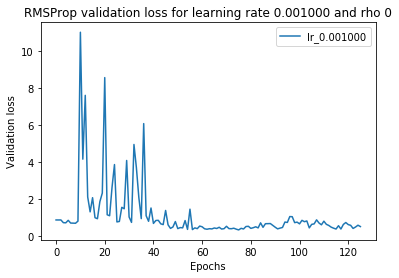

<Figure size 432x288 with 0 Axes>

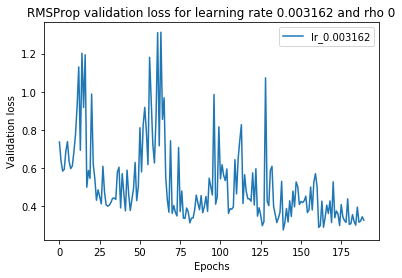

<Figure size 432x288 with 0 Axes>

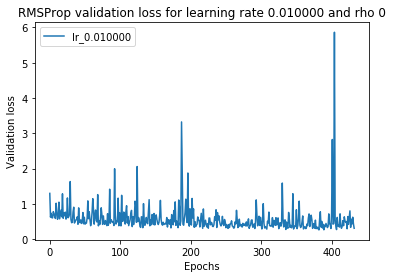

<Figure size 432x288 with 0 Axes>

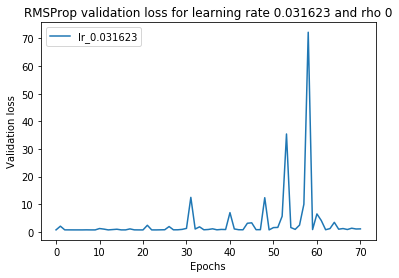

<Figure size 432x288 with 0 Axes>

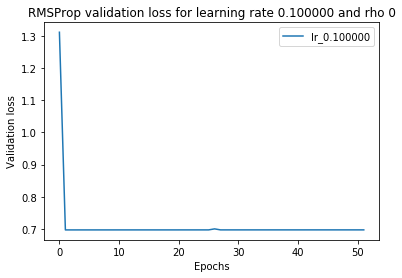

<Figure size 432x288 with 0 Axes>

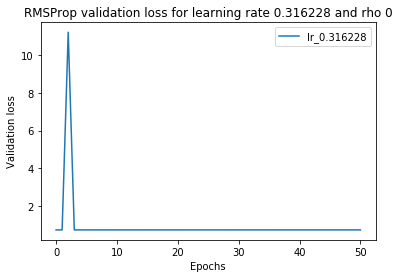

<Figure size 432x288 with 0 Axes>

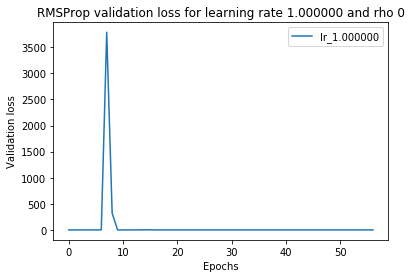

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot validation loss curves for each learning rate with rho 0
for learning_rate in learning_rates:
    history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, 0)].history
    plt.figure()
    plt.plot(history['val_loss'], label='lr_{:f}'.format(learning_rate))
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('RMSProp validation loss for learning rate {:f} and rho 0'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_of_rms_with_lr_{:d}e-3_rho_0'.format(int(learning_rate*1e3)))

First lesson learned - don't use RMSProp with $\rho=0$! This results in the update being as follows:

$$
w := w - \frac{\alpha * dw}{\sqrt{dw^2 + \epsilon}} \approx w - \alpha
$$

Let's try again over all the rho values.

In [15]:
# Print min train and output loss for each setting
for learning_rate in learning_rates:
    for rho in rhos:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        print("Learning rate: {:.4f}, rho: {}".format(learning_rate, rho))
        print("\tMin training loss: {:.4f}".format(np.min(history['loss'])))
        print("\tMin val loss: {:.4f}".format(np.min(history['val_loss'])))

Learning rate: 0.0010, rho: 0
	Min training loss: 0.5037
	Min val loss: 0.3172
Learning rate: 0.0010, rho: 0.5
	Min training loss: 0.3986
	Min val loss: 0.3360
Learning rate: 0.0010, rho: 0.9
	Min training loss: 0.2682
	Min val loss: 0.2226
Learning rate: 0.0010, rho: 0.95
	Min training loss: 0.2408
	Min val loss: 0.2061
Learning rate: 0.0010, rho: 0.99
	Min training loss: 0.2236
	Min val loss: 0.2090
Learning rate: 0.0032, rho: 0
	Min training loss: 0.7144
	Min val loss: 0.2744
Learning rate: 0.0032, rho: 0.5
	Min training loss: 0.4846
	Min val loss: 0.3298
Learning rate: 0.0032, rho: 0.9
	Min training loss: 0.3468
	Min val loss: 0.2768
Learning rate: 0.0032, rho: 0.95
	Min training loss: 0.3190
	Min val loss: 0.2564
Learning rate: 0.0032, rho: 0.99
	Min training loss: 0.2733
	Min val loss: 0.2365
Learning rate: 0.0100, rho: 0
	Min training loss: 0.7635
	Min val loss: 0.2618
Learning rate: 0.0100, rho: 0.5
	Min training loss: 0.5885
	Min val loss: 0.3862
Learning rate: 0.0100, rho: 0.

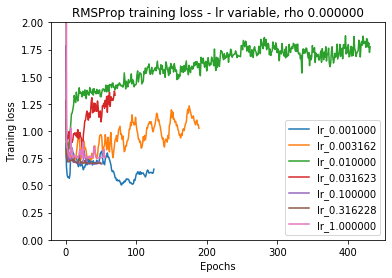

<Figure size 432x288 with 0 Axes>

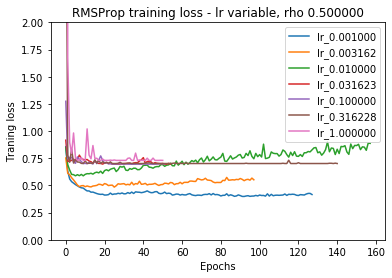

<Figure size 432x288 with 0 Axes>

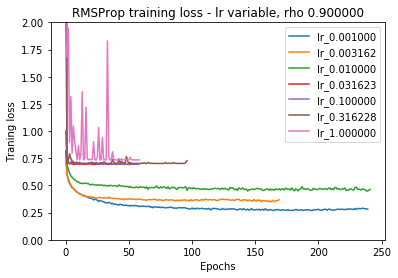

<Figure size 432x288 with 0 Axes>

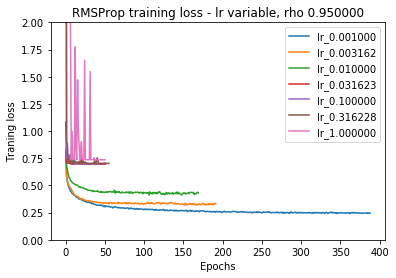

<Figure size 432x288 with 0 Axes>

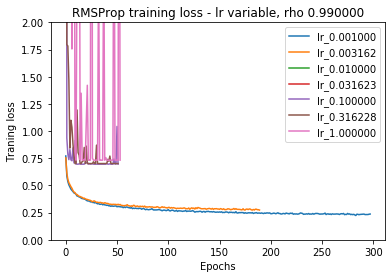

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot training loss curves for each learning rate, at a given rho
for rho in rhos:
    plt.figure()
    for learning_rate in learning_rates:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        plt.plot(history['loss'], label='lr_{:f}'.format(learning_rate))
    plt.xlabel('Epochs')
    plt.ylim(0, 2)
    plt.ylabel('Traning loss')
    plt.title('RMSProp training loss - lr variable, rho {:f}'.format(rho))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_training_loss_of_rms_with_lr_variable_rho_{:d}e-2'.format(int(learning_rate*1e2)))

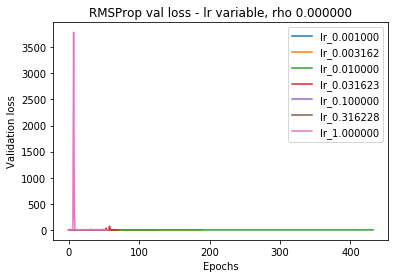

<Figure size 432x288 with 0 Axes>

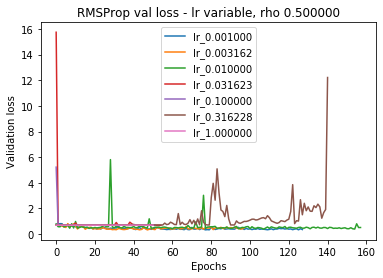

<Figure size 432x288 with 0 Axes>

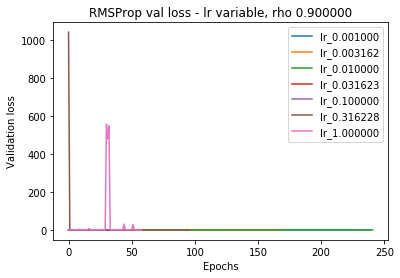

<Figure size 432x288 with 0 Axes>

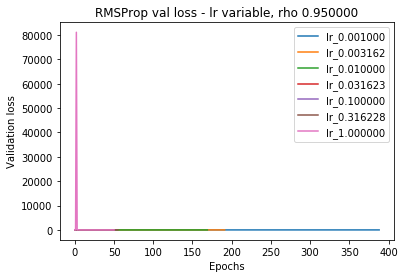

<Figure size 432x288 with 0 Axes>

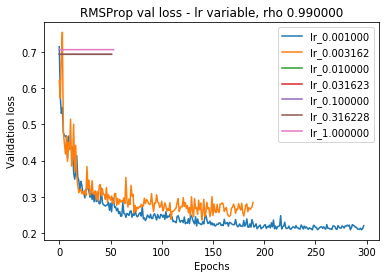

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot validation loss curves for each learning rate, at a given rho
for rho in rhos:
    plt.figure()
    for learning_rate in learning_rates:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        plt.plot(history['val_loss'], label='lr_{:f}'.format(learning_rate))
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('RMSProp val loss - lr variable, rho {:f}'.format(rho))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_of_rms_with_lr_variable_rho_{:d}e-2'.format(int(learning_rate*1e2)))

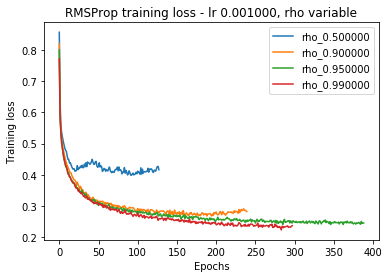

<Figure size 432x288 with 0 Axes>

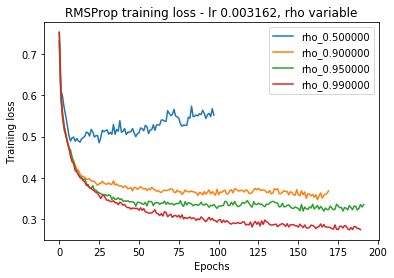

<Figure size 432x288 with 0 Axes>

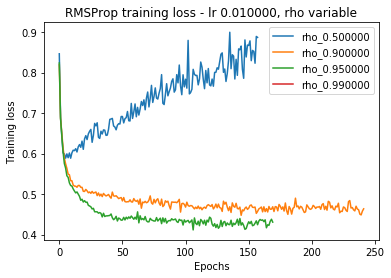

<Figure size 432x288 with 0 Axes>

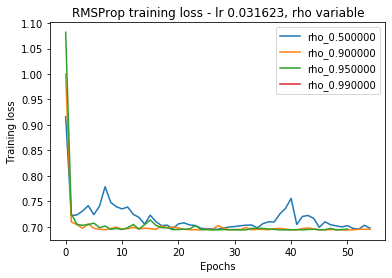

<Figure size 432x288 with 0 Axes>

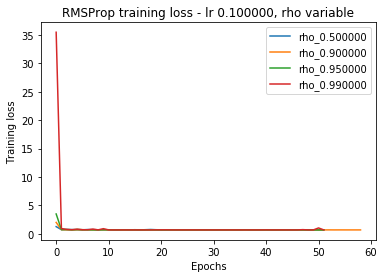

<Figure size 432x288 with 0 Axes>

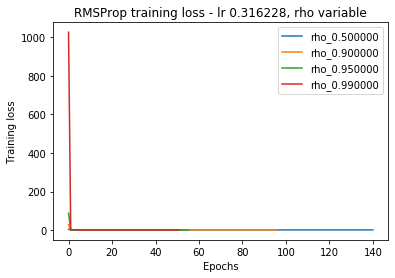

<Figure size 432x288 with 0 Axes>

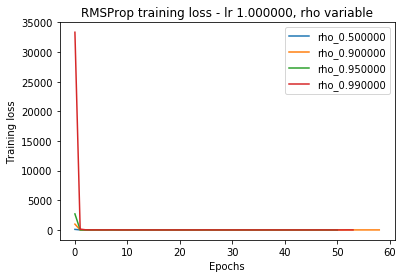

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot training loss curves for each rho, at a given learning rate
for learning_rate in learning_rates:
    plt.figure()
    for rho in rhos[1:]:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        plt.plot(history['loss'], label='rho_{:f}'.format(rho))
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title('RMSProp training loss - lr {:f}, rho variable'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_training_loss_of_rms_with_lr_{:d}e-3_rho_variable'.format(int(learning_rate*1e3)))

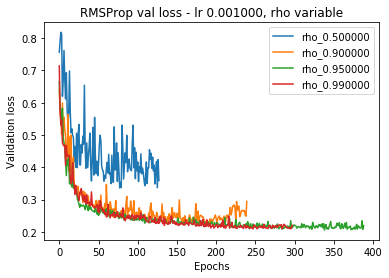

<Figure size 432x288 with 0 Axes>

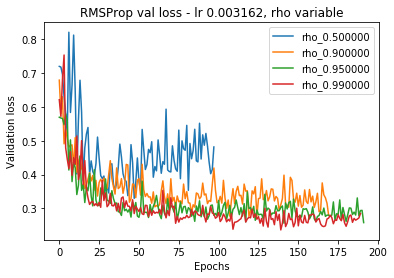

<Figure size 432x288 with 0 Axes>

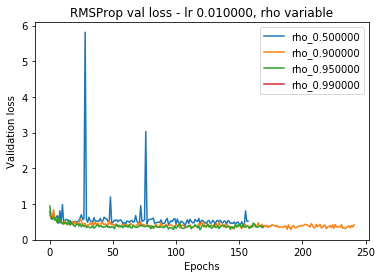

<Figure size 432x288 with 0 Axes>

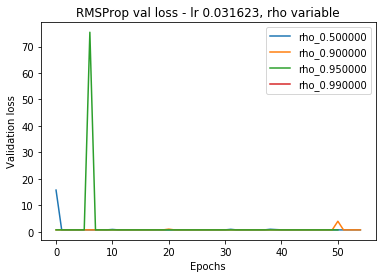

<Figure size 432x288 with 0 Axes>

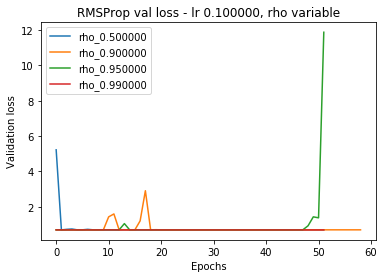

<Figure size 432x288 with 0 Axes>

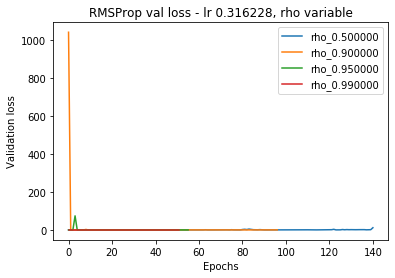

<Figure size 432x288 with 0 Axes>

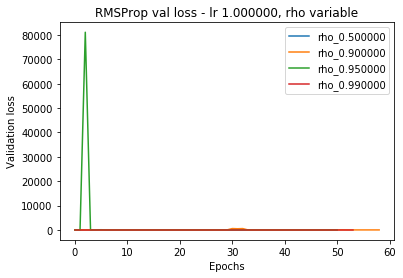

<Figure size 432x288 with 0 Axes>

In [19]:
# Plot validation loss curves for each rho, at a given learning rate
for learning_rate in learning_rates:
    plt.figure()
    for rho in rhos[1:]:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        plt.plot(history['val_loss'], label='rho_{:f}'.format(rho))
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('RMSProp val loss - lr {:f}, rho variable'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_of_rms_with_lr_{:d}e-3_rho_variable'.format(int(learning_rate*1e3)))

In [20]:
for learning_rate in learning_rates:
    for rho in rhos:
        history = model_state_by_param_rms['lr_{:f}_rho_{:f}'.format(learning_rate, rho)].history
        train_loss = np.min(history['loss'])
        val_loss = np.min(history['val_loss'])
        print("Learning rate: {:.4f}, rho: {:.4f}".format(learning_rate, rho))
        print("\tTrain loss: {}".format(train_loss))
        print("\tVal loss: {}".format(val_loss))

Learning rate: 0.0010, rho: 0.0000
	Train loss: 0.5036659356152607
	Val loss: 0.3171660212213046
Learning rate: 0.0010, rho: 0.5000
	Train loss: 0.3986272034050636
	Val loss: 0.3359948689602826
Learning rate: 0.0010, rho: 0.9000
	Train loss: 0.2681742826083346
	Val loss: 0.22258620744902793
Learning rate: 0.0010, rho: 0.9500
	Train loss: 0.24083533654092526
	Val loss: 0.20609645864428722
Learning rate: 0.0010, rho: 0.9900
	Train loss: 0.2235971601947157
	Val loss: 0.2089621156249961
Learning rate: 0.0032, rho: 0.0000
	Train loss: 0.7143822836401896
	Val loss: 0.27443755310896323
Learning rate: 0.0032, rho: 0.5000
	Train loss: 0.48464378746910036
	Val loss: 0.32983956394130237
Learning rate: 0.0032, rho: 0.9000
	Train loss: 0.34681139769956415
	Val loss: 0.27678128796285145
Learning rate: 0.0032, rho: 0.9500
	Train loss: 0.31904514646863247
	Val loss: 0.2564436347313123
Learning rate: 0.0032, rho: 0.9900
	Train loss: 0.2732683849680622
	Val loss: 0.23652788435351357
Learning rate: 0.010

We can see from the graphs above the RMS performs the best on our data with high $\rho$ values (0.9 to 1) and low learning rate.

Using the right value of $\rho$ matters. Keras docs recommend using the default value of rho, but here we see that if we increase rho to 0.95, it substantially improves the best attained validation loss.

Regarding the learning rate, the optimal learning rate found here is around ten times as small as the optimal learning rate on SGD! One hypothesis is that the denominator term ($\sqrt(\alpha + \epsilon)$) is smaller than one, so we need to adjust the learning rate compensate.

Now we ask - does RMSProp perform better than SGD with momentum?

In [14]:
best_rms_params, best_rms_train_loss = min(
    [(params, np.min(model_state.history['loss'])) for params, model_state in model_state_by_param_rms.items()],
    key=lambda x: x[1]
)
print("Best RMSprop params: {}, best RMSprop training loss: {}".format(best_rms_params, best_rms_val_loss))

Best RMSprop params: lr_0.001000_rho_0.990000, best RMSprop training loss: 0.2235971601947157


In [15]:
best_rms_params, best_rms_val_loss = min(
    [(params, np.min(model_state.history['val_loss'])) for params, model_state in model_state_by_param_rms.items()],
    key=lambda x: x[1]
)
print("Best RMSprop params: {}, best RMSprop validation loss: {}".format(best_rms_params, best_rms_val_loss))

Best RMSprop params: lr_0.001000_rho_0.950000, best RMSprop validation loss: 0.20609645864428722


The answer is no.

**tl;dr: RMSprop seems to work at much smaller learning rates than vanilla SGD (about ten times smaller). This is likely because we divide the original update (dw) by the averaged gradient. Additionally, it seems to pay off to explore different values of $\rho$, contrary to the Keras docs' recommendation to use the default value.**

Now, can we do even better than SGD and RMSprop by combining the two, as the Adam optimizer does?

## Adam

Adam is essentially a combination of SGD with momentum and RMSProp. It uses the following update equations:
    
$$
v := \beta_1 * v + (1-\beta_1) * dw \\
s := \beta_2 * s + (1-\beta_2) * dw^2 \\
v^{corrected} := \frac{v}{(1-\beta_1^t)} \\
s^{corrected} := \frac{s}{1-\beta_2^t} \\
w := w - \alpha \frac{v^{corrected}}{\sqrt{s^{corrected}}}
$$

Note that the Keras documentation states, "It is recommended to leave the parameters of this optimizer at their default values." However, let's verify that by testing out different parameter values. It has been suggested that the learning rate is more important than the $\beta_1$ and $\beta_2$ parameters, so let's try varying that first.

In [6]:
learning_rates = np.power(10, np.linspace(-4, 0, 9))

In [18]:
model_state_by_param_adam = {}

for learning_rate in learning_rates:
    print("Learning rate: {}".format(learning_rate))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model = ml_utils.build_model(optimizer=optimizer)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/new_base_model_adam_lr_{}_best_model.h5'.format(learning_rate),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
    )
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model_state_by_param_adam['lr_{:f}'.format(learning_rate)] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[mc, es],
    )

Learning rate: 0.001
Epoch 1/1000
    582/Unknown - 28s 47ms/step - loss: 0.8181 - accuracy: 0.5725
Epoch 00001: val_loss improved from inf to 0.63427, saving model to pickled_objects/new_base_model_adam_lr_0.001_best_model.h5
582/582 [==============================] - 34s 59ms/step - loss: 0.8181 - accuracy: 0.5725 - val_loss: 0.6343 - val_accuracy: 0.6361
Epoch 2/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6229 - accuracy: 0.6496
Epoch 00002: val_loss improved from 0.63427 to 0.62527, saving model to pickled_objects/new_base_model_adam_lr_0.001_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.6228 - accuracy: 0.6497 - val_loss: 0.6253 - val_accuracy: 0.6494
Epoch 3/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5679 - accuracy: 0.7033
Epoch 00003: val_loss improved from 0.62527 to 0.60170, saving model to pickled_objects/new_base_model_adam_lr_0.001_best_model.h5
582/582 [==============================] - 15s 25

Epoch 27/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8538
Epoch 00027: val_loss did not improve from 0.31928
582/582 [==============================] - 15s 26ms/step - loss: 0.3478 - accuracy: 0.8537 - val_loss: 0.3332 - val_accuracy: 0.8517
Epoch 28/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8487
Epoch 00028: val_loss did not improve from 0.31928
582/582 [==============================] - 15s 26ms/step - loss: 0.3516 - accuracy: 0.8486 - val_loss: 0.3312 - val_accuracy: 0.8504
Epoch 29/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8520
Epoch 00029: val_loss did not improve from 0.31928
582/582 [==============================] - 15s 26ms/step - loss: 0.3398 - accuracy: 0.8520 - val_loss: 0.3277 - val_accuracy: 0.8515
Epoch 30/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3391 - accuracy: 0.8531
Epoch 00030: val_loss improved from 0.31928 to 0.312

Epoch 54/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3001 - accuracy: 0.8758
Epoch 00054: val_loss did not improve from 0.25778
582/582 [==============================] - 15s 26ms/step - loss: 0.2999 - accuracy: 0.8759 - val_loss: 0.2720 - val_accuracy: 0.8841
Epoch 55/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3018 - accuracy: 0.8710
Epoch 00055: val_loss did not improve from 0.25778
582/582 [==============================] - 15s 26ms/step - loss: 0.3015 - accuracy: 0.8710 - val_loss: 0.2677 - val_accuracy: 0.8904
Epoch 56/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8731
Epoch 00056: val_loss did not improve from 0.25778
582/582 [==============================] - 15s 26ms/step - loss: 0.2961 - accuracy: 0.8731 - val_loss: 0.2773 - val_accuracy: 0.8833
Epoch 57/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2956 - accuracy: 0.8745
Epoch 00057: val_loss did not improve from 0.25778
5

Epoch 82/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8824
Epoch 00082: val_loss did not improve from 0.24147
582/582 [==============================] - 15s 26ms/step - loss: 0.2813 - accuracy: 0.8824 - val_loss: 0.2489 - val_accuracy: 0.8955
Epoch 83/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2740 - accuracy: 0.8844
Epoch 00083: val_loss did not improve from 0.24147
582/582 [==============================] - 15s 26ms/step - loss: 0.2738 - accuracy: 0.8845 - val_loss: 0.2668 - val_accuracy: 0.8932
Epoch 84/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8832
Epoch 00084: val_loss did not improve from 0.24147
582/582 [==============================] - 15s 26ms/step - loss: 0.2785 - accuracy: 0.8832 - val_loss: 0.2586 - val_accuracy: 0.8966
Epoch 85/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.8848
Epoch 00085: val_loss did not improve from 0.24147
5

Epoch 110/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2599 - accuracy: 0.8905
Epoch 00110: val_loss did not improve from 0.22248
582/582 [==============================] - 15s 26ms/step - loss: 0.2597 - accuracy: 0.8904 - val_loss: 0.2323 - val_accuracy: 0.9035
Epoch 111/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2595 - accuracy: 0.8890
Epoch 00111: val_loss did not improve from 0.22248
582/582 [==============================] - 15s 26ms/step - loss: 0.2591 - accuracy: 0.8891 - val_loss: 0.2368 - val_accuracy: 0.8998
Epoch 112/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.8900
Epoch 00112: val_loss did not improve from 0.22248
582/582 [==============================] - 15s 26ms/step - loss: 0.2574 - accuracy: 0.8900 - val_loss: 0.2431 - val_accuracy: 0.8985
Epoch 113/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2579 - accuracy: 0.8911
Epoch 00113: val_loss did not improve from 0.222

580/582 [============================>.] - ETA: 0s - loss: 0.2414 - accuracy: 0.8983
Epoch 00166: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 25ms/step - loss: 0.2414 - accuracy: 0.8983 - val_loss: 0.2197 - val_accuracy: 0.9134
Epoch 167/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2416 - accuracy: 0.9014
Epoch 00167: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 25ms/step - loss: 0.2414 - accuracy: 0.9014 - val_loss: 0.2116 - val_accuracy: 0.9140
Epoch 168/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2391 - accuracy: 0.8997
Epoch 00168: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 26ms/step - loss: 0.2388 - accuracy: 0.8998 - val_loss: 0.2127 - val_accuracy: 0.9151
Epoch 169/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.8994
Epoch 00169: val_loss did not improve from 0.21121
582/582 [===

Epoch 195/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9032
Epoch 00195: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 25ms/step - loss: 0.2343 - accuracy: 0.9032 - val_loss: 0.2155 - val_accuracy: 0.9121
Epoch 196/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2323 - accuracy: 0.9033
Epoch 00196: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 25ms/step - loss: 0.2322 - accuracy: 0.9033 - val_loss: 0.2199 - val_accuracy: 0.9086
Epoch 197/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2343 - accuracy: 0.9018
Epoch 00197: val_loss did not improve from 0.21121
582/582 [==============================] - 15s 26ms/step - loss: 0.2341 - accuracy: 0.9019 - val_loss: 0.2161 - val_accuracy: 0.9067
Epoch 198/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2299 - accuracy: 0.9019
Epoch 00198: val_loss did not improve from 0.211

581/582 [============================>.] - ETA: 0s - loss: 0.2260 - accuracy: 0.9079
Epoch 00251: val_loss did not improve from 0.20276
582/582 [==============================] - 15s 26ms/step - loss: 0.2258 - accuracy: 0.9080 - val_loss: 0.2160 - val_accuracy: 0.9104
Epoch 252/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9053
Epoch 00252: val_loss did not improve from 0.20276
582/582 [==============================] - 15s 25ms/step - loss: 0.2248 - accuracy: 0.9053 - val_loss: 0.2074 - val_accuracy: 0.9153
Epoch 253/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2226 - accuracy: 0.9073
Epoch 00253: val_loss did not improve from 0.20276
582/582 [==============================] - 15s 26ms/step - loss: 0.2226 - accuracy: 0.9072 - val_loss: 0.2114 - val_accuracy: 0.9134
Epoch 254/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9078
Epoch 00254: val_loss did not improve from 0.20276
582/582 [===

Epoch 280/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9124
Epoch 00280: val_loss did not improve from 0.20124
582/582 [==============================] - 15s 26ms/step - loss: 0.2160 - accuracy: 0.9125 - val_loss: 0.2087 - val_accuracy: 0.9153
Epoch 281/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9119
Epoch 00281: val_loss did not improve from 0.20124
582/582 [==============================] - 15s 26ms/step - loss: 0.2160 - accuracy: 0.9118 - val_loss: 0.2126 - val_accuracy: 0.9123
Epoch 282/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9086
Epoch 00282: val_loss did not improve from 0.20124
582/582 [==============================] - 15s 25ms/step - loss: 0.2240 - accuracy: 0.9086 - val_loss: 0.2106 - val_accuracy: 0.9140
Epoch 283/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2201 - accuracy: 0.9092
Epoch 00283: val_loss did not improve from 0.201

Epoch 3/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5595 - accuracy: 0.7146
Epoch 00003: val_loss did not improve from 0.54188
582/582 [==============================] - 15s 26ms/step - loss: 0.5594 - accuracy: 0.7146 - val_loss: 0.5680 - val_accuracy: 0.7053
Epoch 4/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7396
Epoch 00004: val_loss did not improve from 0.54188
582/582 [==============================] - 15s 25ms/step - loss: 0.5277 - accuracy: 0.7394 - val_loss: 0.6237 - val_accuracy: 0.6920
Epoch 5/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5043 - accuracy: 0.7590
Epoch 00005: val_loss did not improve from 0.54188
582/582 [==============================] - 15s 25ms/step - loss: 0.5043 - accuracy: 0.7590 - val_loss: 0.5668 - val_accuracy: 0.6890
Epoch 6/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4851 - accuracy: 0.7721
Epoch 00006: val_loss did not improve from 0.54188
582/5

Epoch 28/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3424 - accuracy: 0.8542
Epoch 00028: val_loss did not improve from 0.27880
582/582 [==============================] - 15s 26ms/step - loss: 0.3422 - accuracy: 0.8544 - val_loss: 0.2933 - val_accuracy: 0.8734
Epoch 29/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3493 - accuracy: 0.8518
Epoch 00029: val_loss did not improve from 0.27880
582/582 [==============================] - 15s 26ms/step - loss: 0.3491 - accuracy: 0.8517 - val_loss: 0.2972 - val_accuracy: 0.8848
Epoch 30/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.8546
Epoch 00030: val_loss did not improve from 0.27880
582/582 [==============================] - 15s 26ms/step - loss: 0.3356 - accuracy: 0.8546 - val_loss: 0.2868 - val_accuracy: 0.8805
Epoch 31/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3408 - accuracy: 0.8531
Epoch 00031: val_loss did not improve from 0.27880
5

Epoch 56/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3089 - accuracy: 0.8685
Epoch 00056: val_loss did not improve from 0.26083
582/582 [==============================] - 15s 26ms/step - loss: 0.3092 - accuracy: 0.8683 - val_loss: 0.2855 - val_accuracy: 0.8861
Epoch 57/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3027 - accuracy: 0.8718
Epoch 00057: val_loss did not improve from 0.26083
582/582 [==============================] - 15s 25ms/step - loss: 0.3026 - accuracy: 0.8718 - val_loss: 0.2814 - val_accuracy: 0.8904
Epoch 58/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3069 - accuracy: 0.8716
Epoch 00058: val_loss did not improve from 0.26083
582/582 [==============================] - 15s 25ms/step - loss: 0.3068 - accuracy: 0.8715 - val_loss: 0.2832 - val_accuracy: 0.8966
Epoch 59/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3014 - accuracy: 0.8738
Epoch 00059: val_loss did not improve from 0.26083
5

Epoch 85/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2885 - accuracy: 0.8764
Epoch 00085: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 25ms/step - loss: 0.2884 - accuracy: 0.8765 - val_loss: 0.2817 - val_accuracy: 0.8966
Epoch 86/1000
580/582 [============================>.] - ETA: 0s - loss: 0.2856 - accuracy: 0.8791
Epoch 00086: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 26ms/step - loss: 0.2854 - accuracy: 0.8792 - val_loss: 0.2679 - val_accuracy: 0.8985
Epoch 87/1000
579/582 [============================>.] - ETA: 0s - loss: 0.2765 - accuracy: 0.8817
Epoch 00087: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 26ms/step - loss: 0.2766 - accuracy: 0.8818 - val_loss: 0.2702 - val_accuracy: 0.9003
Epoch 88/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2838 - accuracy: 0.8829
Epoch 00088: val_loss did not improve from 0.26078
5

Epoch 114/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2721 - accuracy: 0.8881
Epoch 00114: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 26ms/step - loss: 0.2721 - accuracy: 0.8881 - val_loss: 0.2757 - val_accuracy: 0.8942
Epoch 115/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.8889
Epoch 00115: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 26ms/step - loss: 0.2676 - accuracy: 0.8889 - val_loss: 0.2986 - val_accuracy: 0.8955
Epoch 116/1000
581/582 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.8863
Epoch 00116: val_loss did not improve from 0.26078
582/582 [==============================] - 15s 26ms/step - loss: 0.2706 - accuracy: 0.8865 - val_loss: 0.2883 - val_accuracy: 0.8970
Epoch 00116: early stopping
Learning rate: 0.01
Epoch 1/1000
    582/Unknown - 16s 27ms/step - loss: 0.7793 - accuracy: 0.5510
Epoch 00001: val_loss

Epoch 24/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4225 - accuracy: 0.8124
Epoch 00024: val_loss did not improve from 0.42992
582/582 [==============================] - 15s 26ms/step - loss: 0.4223 - accuracy: 0.8127 - val_loss: 0.4303 - val_accuracy: 0.7760
Epoch 25/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4135 - accuracy: 0.8142
Epoch 00025: val_loss improved from 0.42992 to 0.42535, saving model to pickled_objects/new_base_model_adam_lr_0.01_best_model.h5
582/582 [==============================] - 15s 26ms/step - loss: 0.4136 - accuracy: 0.8144 - val_loss: 0.4254 - val_accuracy: 0.8478
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.8164
Epoch 00026: val_loss did not improve from 0.42535
582/582 [==============================] - 15s 25ms/step - loss: 0.4064 - accuracy: 0.8167 - val_loss: 0.4541 - val_accuracy: 0.7623
Epoch 27/1000
581/582 [============================>.] - ETA: 0s - loss:

Epoch 81/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3444 - accuracy: 0.8453
Epoch 00081: val_loss did not improve from 0.36002
582/582 [==============================] - 15s 26ms/step - loss: 0.3445 - accuracy: 0.8452 - val_loss: 0.3643 - val_accuracy: 0.8706
Epoch 82/1000
581/582 [============================>.] - ETA: 0s - loss: 0.3558 - accuracy: 0.8397
Epoch 00082: val_loss did not improve from 0.36002
582/582 [==============================] - 15s 25ms/step - loss: 0.3557 - accuracy: 0.8397 - val_loss: 0.4132 - val_accuracy: 0.8603
Epoch 83/1000
579/582 [============================>.] - ETA: 0s - loss: 0.3549 - accuracy: 0.8404
Epoch 00083: val_loss did not improve from 0.36002
582/582 [==============================] - 15s 26ms/step - loss: 0.3551 - accuracy: 0.8403 - val_loss: 0.3951 - val_accuracy: 0.8330
Epoch 84/1000
580/582 [============================>.] - ETA: 0s - loss: 0.3418 - accuracy: 0.8441
Epoch 00084: val_loss did not improve from 0.36002
5

Epoch 51/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.5026
Epoch 00051: val_loss did not improve from 0.69305
582/582 [==============================] - 15s 26ms/step - loss: 0.6937 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5099
Epoch 52/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6937 - accuracy: 0.5026
Epoch 00052: val_loss did not improve from 0.69305
582/582 [==============================] - 15s 26ms/step - loss: 0.6937 - accuracy: 0.5031 - val_loss: 0.6931 - val_accuracy: 0.5099
Epoch 00052: early stopping
Learning rate: 0.1
Epoch 1/1000
    582/Unknown - 16s 27ms/step - loss: 1.5311 - accuracy: 0.4959
Epoch 00001: val_loss improved from inf to 0.69535, saving model to pickled_objects/new_base_model_adam_lr_0.1_best_model.h5
582/582 [==============================] - 17s 29ms/step - loss: 1.5311 - accuracy: 0.4959 - val_loss: 0.6953 - val_accuracy: 0.5099
Epoch 2/1000
580/582 [============================

Epoch 2/1000
579/582 [============================>.] - ETA: 0s - loss: 1.0208 - accuracy: 0.4924
Epoch 00002: val_loss did not improve from 0.70229
582/582 [==============================] - 15s 25ms/step - loss: 1.0190 - accuracy: 0.4929 - val_loss: 0.7588 - val_accuracy: 0.5101
Epoch 3/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9891 - accuracy: 0.4945
Epoch 00003: val_loss did not improve from 0.70229
582/582 [==============================] - 15s 26ms/step - loss: 0.9885 - accuracy: 0.4946 - val_loss: 0.7028 - val_accuracy: 0.5099
Epoch 4/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7480 - accuracy: 0.4935
Epoch 00004: val_loss did not improve from 0.70229
582/582 [==============================] - 15s 26ms/step - loss: 0.7478 - accuracy: 0.4936 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 5/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7037 - accuracy: 0.4924
Epoch 00005: val_loss did not improve from 0.70229
582/5

Epoch 30/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7731 - accuracy: 0.4938
Epoch 00030: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.7729 - accuracy: 0.4939 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 31/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6988 - accuracy: 0.4938
Epoch 00031: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.6987 - accuracy: 0.4939 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 32/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7663 - accuracy: 0.4935
Epoch 00032: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.7660 - accuracy: 0.4939 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 33/1000
580/582 [============================>.] - ETA: 0s - loss: 0.8673 - accuracy: 0.4935
Epoch 00033: val_loss did not improve from 0.70163
5

Epoch 59/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6988 - accuracy: 0.4935
Epoch 00059: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.6987 - accuracy: 0.4940 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 60/1000
581/582 [============================>.] - ETA: 0s - loss: 0.9113 - accuracy: 0.4941
Epoch 00060: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.9109 - accuracy: 0.4942 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 61/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6988 - accuracy: 0.4938
Epoch 00061: val_loss did not improve from 0.70163
582/582 [==============================] - 15s 26ms/step - loss: 0.6988 - accuracy: 0.4939 - val_loss: 0.7024 - val_accuracy: 0.5099
Epoch 62/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6988 - accuracy: 0.4935
Epoch 00062: val_loss did not improve from 0.70163
5

Epoch 39/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.4962
Epoch 00039: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 26ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 40/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.4962
Epoch 00040: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 26ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 41/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7109 - accuracy: 0.4962
Epoch 00041: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 26ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 42/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.4959
Epoch 00042: val_loss did not improve from 0.69700
5

Epoch 68/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7109 - accuracy: 0.4961
Epoch 00068: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 25ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 69/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7109 - accuracy: 0.4961
Epoch 00069: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 26ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 70/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7109 - accuracy: 0.4961
Epoch 00070: val_loss did not improve from 0.69700
582/582 [==============================] - 15s 26ms/step - loss: 0.7110 - accuracy: 0.4958 - val_loss: 0.6980 - val_accuracy: 0.4901
Epoch 71/1000
581/582 [============================>.] - ETA: 0s - loss: 0.7110 - accuracy: 0.4959
Epoch 00071: val_loss did not improve from 0.69700
5

In [25]:
ml_utils.save_model_state(model_state_by_param_adam, 'optimizers/new_base_model_model_state_by_param_adam')

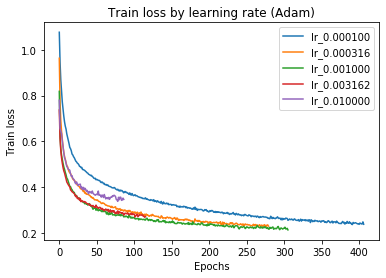

In [33]:
# Plot validation loss
plt.figure()
for learning_rate in learning_rates[:-4]:
    history = model_state_by_param_adam['lr_{:f}'.format(learning_rate)].history
    plt.plot(history['loss'], label='lr_{:f}'.format(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.title('Train loss by learning rate (Adam)')
plt.legend()
plt.show()

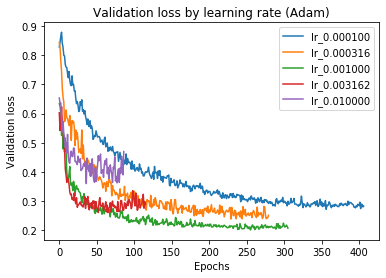

In [32]:
# Plot validation loss
plt.figure()
for learning_rate in learning_rates[:-4]:
    history = model_state_by_param_adam['lr_{:f}'.format(learning_rate)].history
    plt.plot(history['val_loss'], label='lr_{:f}'.format(learning_rate))
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss by learning rate (Adam)')
plt.legend()
plt.show()

Let's plot the best train and validation loss of each learning rate.

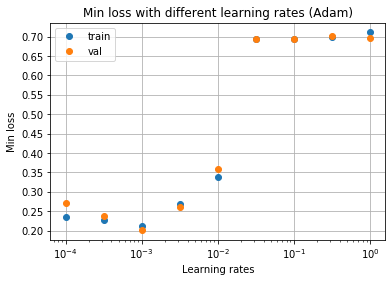

In [8]:
train_loss_values = []
val_loss_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_adam['lr_{:f}'.format(learning_rate)].history
    train_loss_values.append(np.min(history['loss']))
    val_loss_values.append(np.min(history['val_loss']))
plt.plot(learning_rates, train_loss_values, 'o', label='train')
plt.plot(learning_rates, val_loss_values, 'o', label='val')
plt.xlabel('Learning rates')
plt.xscale('log')
plt.ylabel('Min loss')
plt.yticks(np.arange(0.20, 0.75, 0.05))
plt.grid(True, axis='both')
plt.legend()
plt.title('Min loss with different learning rates (Adam)')
plt.show()

Learning rate: 0.0001, min train loss: 0.23584721563709224
Learning rate: 0.00031622776601683794, min train loss: 0.22702223854094408
Learning rate: 0.001, min train loss: 0.21241824581162191
Learning rate: 0.0031622776601683794, min train loss: 0.2676212342370908
Learning rate: 0.01, min train loss: 0.3372344961863317
Learning rate: 0.03162277660168379, min train loss: 0.6936573954822555
Learning rate: 0.1, min train loss: 0.694866348869502
Learning rate: 0.31622776601683794, min train loss: 0.6986697872437052
Learning rate: 1.0, min train loss: 0.7106953257005232


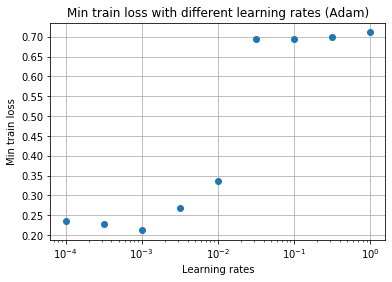

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure()
y_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_adam['lr_{:f}'.format(learning_rate)].history
    y_values.append(np.min(history['loss']))
    print("Learning rate: {}, min train loss: {}".format(learning_rate, np.min(history['loss'])))
plt.plot(learning_rates, y_values, 'o')
plt.xlabel('Learning rates')
plt.xscale('log')
plt.ylabel('Min train loss')
plt.yticks(np.arange(0.20, 0.75, 0.05))
plt.grid(True, axis='both')
plt.title('Min train loss with different learning rates (Adam)')
plt.show()
plt.savefig('graphs/new_base_model_min_train_loss_with_different_learning_rates_adam')

Learning rate: 0.0001, min validation loss: 0.2718911702706389
Learning rate: 0.00031622776601683794, min validation loss: 0.23860346469773006
Learning rate: 0.001, min validation loss: 0.201244888801689
Learning rate: 0.0031622776601683794, min validation loss: 0.2607813535691941
Learning rate: 0.01, min validation loss: 0.36001663185554006
Learning rate: 0.03162277660168379, min validation loss: 0.6930507715434244
Learning rate: 0.1, min validation loss: 0.6936037960934313
Learning rate: 0.31622776601683794, min validation loss: 0.7016320477609765
Learning rate: 1.0, min validation loss: 0.6970010648851526


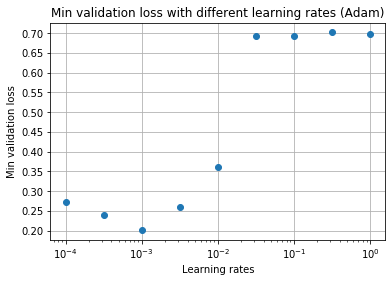

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure()
y_values = []
for learning_rate in learning_rates:
    history = model_state_by_param_adam['lr_{:f}'.format(learning_rate)].history
    y_values.append(np.min(history['val_loss']))
    print("Learning rate: {}, min validation loss: {}".format(learning_rate, np.min(history['val_loss'])))
plt.plot(learning_rates, y_values, 'o')
plt.xlabel('Learning rates')
plt.xscale('log')
plt.ylabel('Min validation loss')
plt.yticks(np.arange(0.20, 0.75, 0.05))
plt.grid(True, axis='both')
plt.title('Min validation loss with different learning rates (Adam)')
plt.show()
plt.savefig('graphs/new_base_model_min_validation_loss_with_different_learning_rates_adam')

In [10]:
beta_1_values = [0.5, 0.9, 0.95]
beta_2_values = [0.9, 0.99, 0.999]

Now, let's use 0.001 as our learning rate (since it performed the best on train and validation), and try varying the values for $\beta_1$ and $\beta_2$ instead.

In [ ]:
model_state_by_param_adam_2 = {}

for beta_1 in beta_1_values:
    for beta_2 in beta_2_values:
        print("Beta_1: {}, beta_2: {}".format(beta_1, beta_2))
        optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=beta_1, beta_2=beta_2)
        model = ml_utils.build_model(optimizer=optimizer)
        es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
        model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(beta_1, beta_2)] = ml_utils.train_model(
            model,
            train,
            validation,
            epochs=1000,
            extra_callbacks=[es],
        )

Beta_1: 0.5, beta_2: 0.9
Epoch 1/1000
582/582 [==============================] - 17s 29ms/step - loss: 0.8231 - accuracy: 0.5781 - val_loss: 0.6322 - val_accuracy: 0.6432
Epoch 2/1000
582/582 [==============================] - 15s 25ms/step - loss: 0.5926 - accuracy: 0.6829 - val_loss: 0.6194 - val_accuracy: 0.6664
Epoch 3/1000
582/582 [==============================] - 15s 26ms/step - loss: 0.5420 - accuracy: 0.7297 - val_loss: 0.5007 - val_accuracy: 0.7429
Epoch 4/1000
582/582 [==============================] - 15s 26ms/step - loss: 0.5123 - accuracy: 0.7574 - val_loss: 0.5672 - val_accuracy: 0.7231
Epoch 5/1000
582/582 [==============================] - 15s 25ms/step - loss: 0.4974 - accuracy: 0.7613 - val_loss: 0.6101 - val_accuracy: 0.7229
Epoch 6/1000
582/582 [==============================] - 15s 25ms/step - loss: 0.4834 - accuracy: 0.7760 - val_loss: 0.4544 - val_accuracy: 0.7724
Epoch 7/1000
582/582 [==============================] - 15s 26ms/step - loss: 0.4699 - accuracy: 0.

In [ ]:
ml_utils.save_model_state(model_state_by_param_adam_2, 'optimizers/model_state_by_param_adam_2')

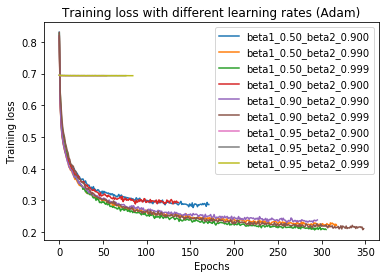

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot validation losses
plt.figure()
for beta_1 in beta_1_values:
    for beta_2 in beta_2_values:
        history = model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(beta_1, beta_2)].history
        plt.plot(history['loss'], label='beta1_{:.2f}_beta2_{:.3f}'.format(beta_1, beta_2))
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Training loss with different learning rates (Adam)')
plt.legend()
plt.show()
plt.savefig('graphs/training_loss_with_different_betas_adam_2')

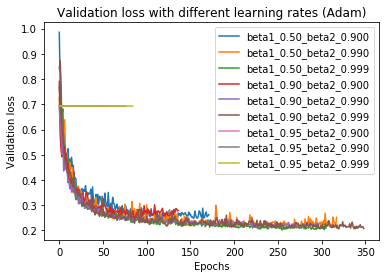

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot validation losses
plt.figure()
for beta_1 in beta_1_values:
    for beta_2 in beta_2_values:
        history = model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(beta_1, beta_2)].history
        plt.plot(history['val_loss'], label='beta1_{:.2f}_beta2_{:.3f}'.format(beta_1, beta_2))
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss with different learning rates (Adam)')
plt.legend()
plt.show()
plt.savefig('graphs/validation_loss_with_different_betas_adam_2')

In [12]:
# Print minimum training and validation losses
for beta_1 in beta_1_values:
    for beta_2 in beta_2_values:
        history = model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(beta_1, beta_2)].history
        print("Beta 1: {}, beta 2: {}, min training loss: {:.4f}, min validation loss: {:.4f}".format(
            beta_1,
            beta_2,
            np.min(history['loss']),
            np.min(history['val_loss'])
        ))

Beta 1: 0.5, beta 2: 0.9, min training loss: 0.2775, min validation loss: 0.2448
Beta 1: 0.5, beta 2: 0.99, min training loss: 0.2163, min validation loss: 0.2118
Beta 1: 0.5, beta 2: 0.999, min training loss: 0.2071, min validation loss: 0.2021
Beta 1: 0.9, beta 2: 0.9, min training loss: 0.2888, min validation loss: 0.2450
Beta 1: 0.9, beta 2: 0.99, min training loss: 0.2295, min validation loss: 0.2138
Beta 1: 0.9, beta 2: 0.999, min training loss: 0.2077, min validation loss: 0.2059
Beta 1: 0.95, beta 2: 0.9, min training loss: 0.6931, min validation loss: 0.6933
Beta 1: 0.95, beta 2: 0.99, min training loss: 0.6931, min validation loss: 0.6932
Beta 1: 0.95, beta 2: 0.999, min training loss: 0.6931, min validation loss: 0.6932


In [25]:
best_val_loss = np.inf
best_params = ()
for beta_1 in beta_1_values:
    for beta_2 in beta_2_values:
        history = model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(beta_1, beta_2)].history
        if np.min(history['val_loss']) < best_val_loss:
            best_val_loss = np.min(history['val_loss'])
            best_params = (beta_1, beta_2)
print("Best params: {}, val loss: {}".format(best_params, best_val_loss))

Best params: (0.5, 0.999), val loss: 0.20214103177598078


In [27]:
default_val_loss = np.min(model_state_by_param_adam_2['beta1_{:f}_beta2_{:f}'.format(0.9, 0.999)].history['val_loss'])
print("Default params: {}, val loss: {}".format((0.9, 0.999), default_val_loss))

Default params: (0.9, 0.999), val loss: 0.2058621317607491


It looks like it does pay off to experiment with different values of beta_1 and beta_2, contrary to the recommendation in the Keras docs. However, we were not able to beat the best RMSprop performance, despite searching over the parameters four times.

What if we turn off the beta_1 completely and use only beta_2? This should basically be the same as RMSprop.

We see that when using Adam, it's worth trying out beta_1 and beta_2, despite the Keras documentation's recommendation to the contrary.


## Adagrad

Adagrad accumulates the squares of gradients, and divides the update by the square root of this accumulator term.

$$
a := a + (dw)^2 \\
w := w - \frac{\alpha * dw}{\sqrt{a + \epsilon}}
$$

This is similar to RMSprop, but the difference is that it simply accumulates the squares of the gradients, without using an exponential average. This should result in the size of the updates decaying over time.

Let's try Adagrad at different learning rates. We'll restrict ourselves to relatively larger learning rates (>0.01) since we know that that the size of the updates will decay over time.

In [30]:
learning_rates = np.power(10, np.linspace(-3, -0.5, 6))

In [43]:
model_state_by_param_adagrad = {}

for learning_rate in learning_rates:
    print("Learning rate: {}".format(learning_rate))
    optimizer = keras.optimizers.Adagrad(learning_rate=learning_rate)
    model = ml_utils.build_model(optimizer=optimizer)
    mc = keras.callbacks.ModelCheckpoint(
        'pickled_objects/new_base_model_adagrad_lr_{}_best_model.h5'.format(learning_rate),
        monitor='val_loss',
        mode='min',
        verbose=1,
        save_best_only=True,
    )
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    model_state_by_param_adagrad['lr_{:f}'.format(learning_rate)] = ml_utils.train_model(
        model,
        train,
        validation,
        epochs=1000,
        extra_callbacks=[mc, es],
    )

Learning rate: 0.001
Epoch 1/1000
    582/Unknown - 16s 28ms/step - loss: 0.9475 - accuracy: 0.5148
Epoch 00001: val_loss improved from inf to 0.66205, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 18s 31ms/step - loss: 0.9475 - accuracy: 0.5148 - val_loss: 0.6621 - val_accuracy: 0.6139
Epoch 2/1000
579/582 [============================>.] - ETA: 0s - loss: 0.9028 - accuracy: 0.5227
Epoch 00002: val_loss improved from 0.66205 to 0.65792, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.9023 - accuracy: 0.5227 - val_loss: 0.6579 - val_accuracy: 0.6189
Epoch 3/1000
579/582 [============================>.] - ETA: 0s - loss: 0.8849 - accuracy: 0.5260
Epoch 00003: val_loss improved from 0.65792 to 0.65557, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================]

Epoch 24/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7526 - accuracy: 0.5672
Epoch 00024: val_loss improved from 0.63363 to 0.63290, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7521 - accuracy: 0.5678 - val_loss: 0.6329 - val_accuracy: 0.6402
Epoch 25/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7442 - accuracy: 0.5723
Epoch 00025: val_loss improved from 0.63290 to 0.63219, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7442 - accuracy: 0.5723 - val_loss: 0.6322 - val_accuracy: 0.6408
Epoch 26/1000
580/582 [============================>.] - ETA: 0s - loss: 0.7434 - accuracy: 0.5690
Epoch 00026: val_loss improved from 0.63219 to 0.63151, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==========================

Epoch 48/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6964 - accuracy: 0.6006
Epoch 00048: val_loss did not improve from 0.62064
582/582 [==============================] - 16s 27ms/step - loss: 0.6961 - accuracy: 0.6006 - val_loss: 0.6212 - val_accuracy: 0.6539
Epoch 49/1000
579/582 [============================>.] - ETA: 0s - loss: 0.7001 - accuracy: 0.5970
Epoch 00049: val_loss improved from 0.62064 to 0.61956, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.7001 - accuracy: 0.5970 - val_loss: 0.6196 - val_accuracy: 0.6558
Epoch 50/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6970 - accuracy: 0.6007
Epoch 00050: val_loss improved from 0.61956 to 0.61882, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6968 - accuracy: 0.6008 - val_loss: 0.6188 - val_ac

Epoch 72/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6695 - accuracy: 0.6191
Epoch 00072: val_loss did not improve from 0.60858
582/582 [==============================] - 16s 27ms/step - loss: 0.6692 - accuracy: 0.6194 - val_loss: 0.6090 - val_accuracy: 0.6685
Epoch 73/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6670 - accuracy: 0.6184
Epoch 00073: val_loss improved from 0.60858 to 0.60687, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6671 - accuracy: 0.6182 - val_loss: 0.6069 - val_accuracy: 0.6715
Epoch 74/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6669 - accuracy: 0.6219
Epoch 00074: val_loss did not improve from 0.60687
582/582 [==============================] - 16s 27ms/step - loss: 0.6668 - accuracy: 0.6219 - val_loss: 0.6070 - val_accuracy: 0.6709
Epoch 75/1000
579/582 [============================>.] - ETA: 0s - l

Epoch 97/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6454 - accuracy: 0.6391
Epoch 00097: val_loss did not improve from 0.59668
582/582 [==============================] - 15s 27ms/step - loss: 0.6454 - accuracy: 0.6392 - val_loss: 0.5971 - val_accuracy: 0.6823
Epoch 98/1000
581/582 [============================>.] - ETA: 0s - loss: 0.6480 - accuracy: 0.6386
Epoch 00098: val_loss improved from 0.59668 to 0.59657, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6477 - accuracy: 0.6387 - val_loss: 0.5966 - val_accuracy: 0.6825
Epoch 99/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.6350
Epoch 00099: val_loss improved from 0.59657 to 0.59523, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6486 - accuracy: 0.6349 - val_loss: 0.5952 - val_ac

Epoch 145/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6181 - accuracy: 0.6607
Epoch 00145: val_loss improved from 0.57654 to 0.57636, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6180 - accuracy: 0.6607 - val_loss: 0.5764 - val_accuracy: 0.7042
Epoch 146/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6186 - accuracy: 0.6650
Epoch 00146: val_loss did not improve from 0.57636
582/582 [==============================] - 15s 27ms/step - loss: 0.6182 - accuracy: 0.6652 - val_loss: 0.5765 - val_accuracy: 0.7038
Epoch 147/1000
579/582 [============================>.] - ETA: 0s - loss: 0.6152 - accuracy: 0.6665
Epoch 00147: val_loss improved from 0.57636 to 0.57559, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6146 - accuracy: 0.6668 - val_loss: 0.5756 - val

Epoch 194/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5946 - accuracy: 0.6859
Epoch 00194: val_loss improved from 0.55860 to 0.55779, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5943 - accuracy: 0.6862 - val_loss: 0.5578 - val_accuracy: 0.7199
Epoch 195/1000
580/582 [============================>.] - ETA: 0s - loss: 0.6010 - accuracy: 0.6803
Epoch 00195: val_loss improved from 0.55779 to 0.55733, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.6010 - accuracy: 0.6802 - val_loss: 0.5573 - val_accuracy: 0.7195
Epoch 196/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.6814
Epoch 00196: val_loss did not improve from 0.55733
582/582 [==============================] - 16s 27ms/step - loss: 0.5963 - accuracy: 0.6814 - val_loss: 0.5574 - val

Epoch 218/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5882 - accuracy: 0.6948
Epoch 00218: val_loss did not improve from 0.55021
582/582 [==============================] - 16s 27ms/step - loss: 0.5882 - accuracy: 0.6947 - val_loss: 0.5504 - val_accuracy: 0.7248
Epoch 219/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5859 - accuracy: 0.6939
Epoch 00219: val_loss improved from 0.55021 to 0.54962, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5857 - accuracy: 0.6940 - val_loss: 0.5496 - val_accuracy: 0.7244
Epoch 220/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5883 - accuracy: 0.6897
Epoch 00220: val_loss improved from 0.54962 to 0.54935, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5882 - accuracy: 0.6896 - val_loss: 0.5494 - val

Epoch 267/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7068
Epoch 00267: val_loss improved from 0.53411 to 0.53391, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5701 - accuracy: 0.7065 - val_loss: 0.5339 - val_accuracy: 0.7382
Epoch 268/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7048
Epoch 00268: val_loss did not improve from 0.53391
582/582 [==============================] - 16s 27ms/step - loss: 0.5662 - accuracy: 0.7047 - val_loss: 0.5343 - val_accuracy: 0.7382
Epoch 269/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5661 - accuracy: 0.7079
Epoch 00269: val_loss did not improve from 0.53391
582/582 [==============================] - 16s 27ms/step - loss: 0.5660 - accuracy: 0.7078 - val_loss: 0.5344 - val_accuracy: 0.7386
Epoch 270/1000
581/582 [============================>.] - ETA: 0s

Epoch 317/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7196
Epoch 00317: val_loss did not improve from 0.51871
582/582 [==============================] - 16s 27ms/step - loss: 0.5518 - accuracy: 0.7196 - val_loss: 0.5195 - val_accuracy: 0.7500
Epoch 318/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5514 - accuracy: 0.7208
Epoch 00318: val_loss improved from 0.51871 to 0.51826, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5515 - accuracy: 0.7207 - val_loss: 0.5183 - val_accuracy: 0.7504
Epoch 319/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5479 - accuracy: 0.7212
Epoch 00319: val_loss did not improve from 0.51826
582/582 [==============================] - 15s 27ms/step - loss: 0.5481 - accuracy: 0.7210 - val_loss: 0.5189 - val_accuracy: 0.7487
Epoch 320/1000
581/582 [============================>.] - ETA: 0s

579/582 [============================>.] - ETA: 0s - loss: 0.5440 - accuracy: 0.7262
Epoch 00342: val_loss improved from 0.51233 to 0.51110, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5440 - accuracy: 0.7260 - val_loss: 0.5111 - val_accuracy: 0.7552
Epoch 343/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7312
Epoch 00343: val_loss did not improve from 0.51110
582/582 [==============================] - 15s 27ms/step - loss: 0.5378 - accuracy: 0.7312 - val_loss: 0.5116 - val_accuracy: 0.7558
Epoch 344/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7310
Epoch 00344: val_loss did not improve from 0.51110
582/582 [==============================] - 16s 27ms/step - loss: 0.5418 - accuracy: 0.7309 - val_loss: 0.5119 - val_accuracy: 0.7534
Epoch 345/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5413

Epoch 367/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5352 - accuracy: 0.7315
Epoch 00367: val_loss did not improve from 0.50430
582/582 [==============================] - 16s 27ms/step - loss: 0.5351 - accuracy: 0.7314 - val_loss: 0.5045 - val_accuracy: 0.7577
Epoch 368/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7359
Epoch 00368: val_loss did not improve from 0.50430
582/582 [==============================] - 15s 27ms/step - loss: 0.5314 - accuracy: 0.7357 - val_loss: 0.5045 - val_accuracy: 0.7586
Epoch 369/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7353
Epoch 00369: val_loss improved from 0.50430 to 0.50334, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5370 - accuracy: 0.7351 - val_loss: 0.5033 - val_accuracy: 0.7592
Epoch 370/1000
580/582 [============================>.] - ETA: 0s

Epoch 393/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5280 - accuracy: 0.7398
Epoch 00393: val_loss improved from 0.49840 to 0.49810, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5281 - accuracy: 0.7396 - val_loss: 0.4981 - val_accuracy: 0.7595
Epoch 394/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7374
Epoch 00394: val_loss did not improve from 0.49810
582/582 [==============================] - 16s 27ms/step - loss: 0.5306 - accuracy: 0.7376 - val_loss: 0.4986 - val_accuracy: 0.7590
Epoch 395/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7409
Epoch 00395: val_loss improved from 0.49810 to 0.49691, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5304 - accuracy: 0.7406 - val_loss: 0.4969 - val

Epoch 419/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5251 - accuracy: 0.7421
Epoch 00419: val_loss did not improve from 0.49319
582/582 [==============================] - 16s 27ms/step - loss: 0.5251 - accuracy: 0.7422 - val_loss: 0.4934 - val_accuracy: 0.7635
Epoch 420/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5240 - accuracy: 0.7431
Epoch 00420: val_loss did not improve from 0.49319
582/582 [==============================] - 16s 27ms/step - loss: 0.5238 - accuracy: 0.7431 - val_loss: 0.4938 - val_accuracy: 0.7633
Epoch 421/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5184 - accuracy: 0.7465
Epoch 00421: val_loss did not improve from 0.49319
582/582 [==============================] - 16s 27ms/step - loss: 0.5183 - accuracy: 0.7465 - val_loss: 0.4935 - val_accuracy: 0.7635
Epoch 422/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5210 - accuracy: 0.7448
Epoch 00422: val_loss improved from 0.49319 to 0

Epoch 472/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5098 - accuracy: 0.7542 ETA
Epoch 00472: val_loss improved from 0.48374 to 0.48359, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.5098 - accuracy: 0.7543 - val_loss: 0.4836 - val_accuracy: 0.7719
Epoch 473/1000
581/582 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.7498
Epoch 00473: val_loss did not improve from 0.48359
582/582 [==============================] - 16s 27ms/step - loss: 0.5121 - accuracy: 0.7497 - val_loss: 0.4844 - val_accuracy: 0.7706
Epoch 474/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5088 - accuracy: 0.7528
Epoch 00474: val_loss did not improve from 0.48359
582/582 [==============================] - 16s 27ms/step - loss: 0.5088 - accuracy: 0.7527 - val_loss: 0.4838 - val_accuracy: 0.7706
Epoch 475/1000
581/582 [============================>.] - ETA

Epoch 526/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5019 - accuracy: 0.7581
Epoch 00526: val_loss did not improve from 0.47538
582/582 [==============================] - 16s 27ms/step - loss: 0.5020 - accuracy: 0.7579 - val_loss: 0.4758 - val_accuracy: 0.7771
Epoch 527/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5051 - accuracy: 0.7582
Epoch 00527: val_loss did not improve from 0.47538
582/582 [==============================] - 16s 27ms/step - loss: 0.5053 - accuracy: 0.7582 - val_loss: 0.4761 - val_accuracy: 0.7779
Epoch 528/1000
579/582 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.7577
Epoch 00528: val_loss did not improve from 0.47538
582/582 [==============================] - 16s 27ms/step - loss: 0.5022 - accuracy: 0.7577 - val_loss: 0.4756 - val_accuracy: 0.7779
Epoch 529/1000
580/582 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.7626
Epoch 00529: val_loss improved from 0.47538 to 0

580/582 [============================>.] - ETA: 0s - loss: 0.4926 - accuracy: 0.7646
Epoch 00578: val_loss did not improve from 0.46890
582/582 [==============================] - 16s 27ms/step - loss: 0.4926 - accuracy: 0.7647 - val_loss: 0.4699 - val_accuracy: 0.7794
Epoch 579/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4916 - accuracy: 0.7650
Epoch 00579: val_loss did not improve from 0.46890
582/582 [==============================] - 16s 27ms/step - loss: 0.4915 - accuracy: 0.7651 - val_loss: 0.4693 - val_accuracy: 0.7803
Epoch 580/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4963 - accuracy: 0.7623
Epoch 00580: val_loss improved from 0.46890 to 0.46881, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4962 - accuracy: 0.7622 - val_loss: 0.4688 - val_accuracy: 0.7799
Epoch 581/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4936

Epoch 605/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4869 - accuracy: 0.7673
Epoch 00605: val_loss did not improve from 0.46574
582/582 [==============================] - 16s 27ms/step - loss: 0.4868 - accuracy: 0.7673 - val_loss: 0.4661 - val_accuracy: 0.7820
Epoch 606/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4864 - accuracy: 0.7704
Epoch 00606: val_loss did not improve from 0.46574
582/582 [==============================] - 16s 27ms/step - loss: 0.4864 - accuracy: 0.7704 - val_loss: 0.4661 - val_accuracy: 0.7820
Epoch 607/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4889 - accuracy: 0.7680
Epoch 00607: val_loss did not improve from 0.46574
582/582 [==============================] - 16s 27ms/step - loss: 0.4888 - accuracy: 0.7681 - val_loss: 0.4662 - val_accuracy: 0.7810
Epoch 608/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4905 - accuracy: 0.7682
Epoch 00608: val_loss improved from 0.46574 to 0

Epoch 633/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4880 - accuracy: 0.7676
Epoch 00633: val_loss did not improve from 0.46306
582/582 [==============================] - 16s 27ms/step - loss: 0.4880 - accuracy: 0.7675 - val_loss: 0.4633 - val_accuracy: 0.7822
Epoch 634/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4833 - accuracy: 0.7705
Epoch 00634: val_loss improved from 0.46306 to 0.46304, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4835 - accuracy: 0.7703 - val_loss: 0.4630 - val_accuracy: 0.7822
Epoch 635/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4849 - accuracy: 0.7723
Epoch 00635: val_loss did not improve from 0.46304
582/582 [==============================] - 16s 27ms/step - loss: 0.4850 - accuracy: 0.7722 - val_loss: 0.4634 - val_accuracy: 0.7837
Epoch 636/1000
579/582 [============================>.] - ETA: 0s

Epoch 660/1000
579/582 [============================>.] - ETA: 0s - loss: 0.4833 - accuracy: 0.7727
Epoch 00660: val_loss did not improve from 0.46013
582/582 [==============================] - 16s 27ms/step - loss: 0.4832 - accuracy: 0.7729 - val_loss: 0.4612 - val_accuracy: 0.7846
Epoch 661/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4833 - accuracy: 0.7730
Epoch 00661: val_loss improved from 0.46013 to 0.46002, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4829 - accuracy: 0.7732 - val_loss: 0.4600 - val_accuracy: 0.7853
Epoch 662/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4811 - accuracy: 0.7744
Epoch 00662: val_loss did not improve from 0.46002
582/582 [==============================] - 16s 27ms/step - loss: 0.4812 - accuracy: 0.7744 - val_loss: 0.4605 - val_accuracy: 0.7850
Epoch 663/1000
581/582 [============================>.] - ETA: 0s

Epoch 687/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4771 - accuracy: 0.7739
Epoch 00687: val_loss improved from 0.45797 to 0.45745, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4770 - accuracy: 0.7739 - val_loss: 0.4574 - val_accuracy: 0.7855
Epoch 688/1000
581/582 [============================>.] - ETA: 0s - loss: 0.4775 - accuracy: 0.7726
Epoch 00688: val_loss did not improve from 0.45745
582/582 [==============================] - 15s 27ms/step - loss: 0.4777 - accuracy: 0.7725 - val_loss: 0.4576 - val_accuracy: 0.7855
Epoch 689/1000
580/582 [============================>.] - ETA: 0s - loss: 0.4789 - accuracy: 0.7727
Epoch 00689: val_loss improved from 0.45745 to 0.45727, saving model to pickled_objects/new_base_model_adagrad_lr_0.001_best_model.h5
582/582 [==============================] - 16s 27ms/step - loss: 0.4787 - accuracy: 0.7729 - val_loss: 0.4573 - val

KeyboardInterrupt: 

In [26]:
ml_utils.save_model_state(model_state_by_param_adagrad, 'optimizers/new_base_model_model_state_by_param_adagrad')

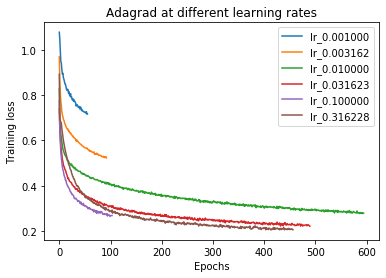

<Figure size 432x288 with 0 Axes>

In [49]:
# Plot training loss curves
plt.figure()
for learning_rate in learning_rates:
    param_str = 'lr_{:f}'.format(learning_rate)
    plt.plot(model_state_by_param_adagrad[param_str].history['loss'], label=param_str)
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Adagrad at different learning rates')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_adagrad_at_different_learning_rates_training')

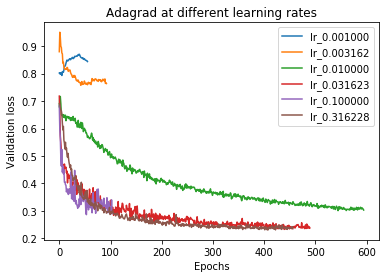

In [31]:
# Plot validation loss curves
plt.figure()
for learning_rate in learning_rates:
    param_str = 'lr_{:f}'.format(learning_rate)
    plt.plot(model_state_by_param_adagrad[param_str].history['val_loss'], label=param_str)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Adagrad at different learning rates')
plt.legend()
plt.show()
plt.savefig('graphs/new_base_model_adagrad_at_different_learning_rates')

In [34]:
best_adagrad_params, best_adagrad_training_loss = min(
    [(params, np.min(model_state.history['loss'])) for params, model_state in model_state_by_param_adagrad.items()],
    key=lambda x: x[1]
)
print("Best Adagrad params: {}, best Adagrad training loss: {}".format(best_adagrad_params, best_adagrad_training_loss))

Best Adagrad params: lr_0.316228, best Adagrad training loss: 0.205689233824939


In [33]:
best_adagrad_params, best_adagrad_val_loss = min(
    [(params, np.min(model_state.history['val_loss'])) for params, model_state in model_state_by_param_adagrad.items()],
    key=lambda x: x[1]
)
print("Best Adagrad params: {}, best Adagrad validation loss: {}".format(best_adagrad_params, best_adagrad_val_loss))

Best Adagrad params: lr_0.316228, best Adagrad validation loss: 0.2309562530725786


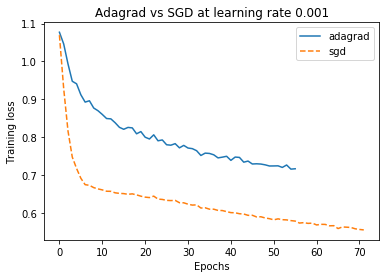

<Figure size 432x288 with 0 Axes>

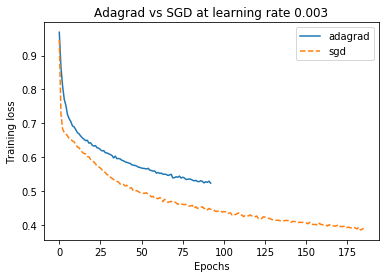

<Figure size 432x288 with 0 Axes>

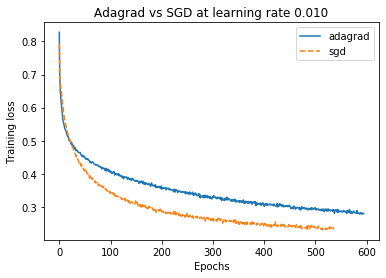

<Figure size 432x288 with 0 Axes>

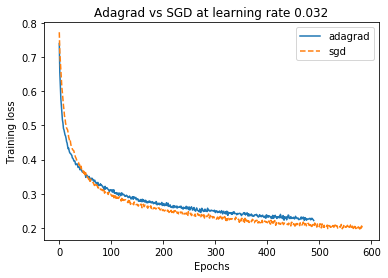

<Figure size 432x288 with 0 Axes>

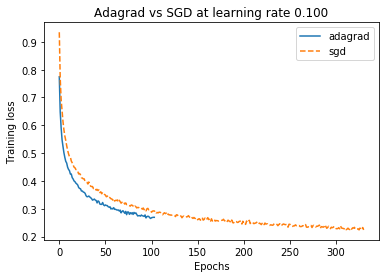

<Figure size 432x288 with 0 Axes>

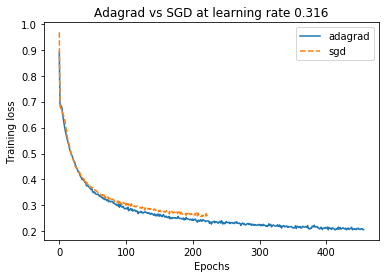

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot Adagrad vs SGD train loss
learning_rates = np.power(10, np.linspace(-3, -0.5, 6))
for learning_rate in learning_rates:
    plt.figure()
    adagrad_history = model_state_by_param_adagrad['lr_{:f}'.format(learning_rate)].history['loss']
    sgd_history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history['loss']
    plt.plot(adagrad_history, label='adagrad')
    plt.plot(sgd_history, label='sgd', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Training loss')
    plt.title('Adagrad vs SGD at learning rate {:.3f}'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_training_loss_adagrad_vs_sgd_at_lr_{:d}e-3'.format(int(learning_rate*1000)))

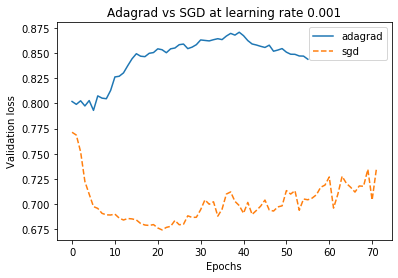

<Figure size 432x288 with 0 Axes>

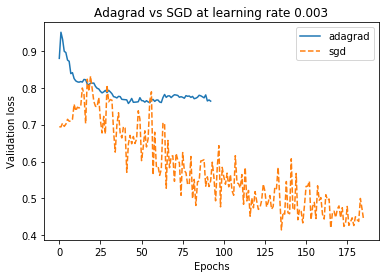

<Figure size 432x288 with 0 Axes>

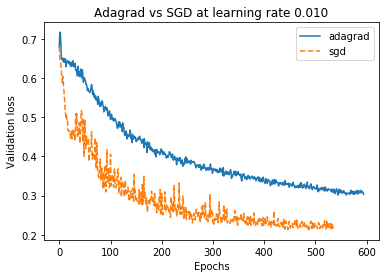

<Figure size 432x288 with 0 Axes>

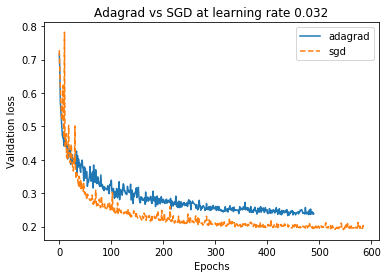

<Figure size 432x288 with 0 Axes>

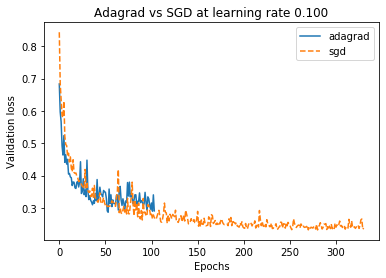

<Figure size 432x288 with 0 Axes>

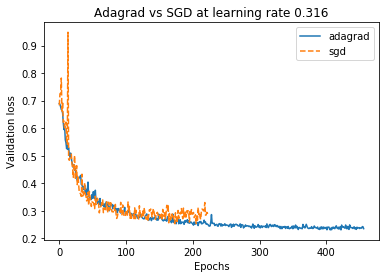

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot Adagrad vs SGD val loss
learning_rates = np.power(10, np.linspace(-3, -0.5, 6))
for learning_rate in learning_rates:
    plt.figure()
    adagrad_history = model_state_by_param_adagrad['lr_{:f}'.format(learning_rate)].history['val_loss']
    sgd_history = model_state_by_param_sgd['lr_{:f}_momentum_{:f}'.format(learning_rate, 0.)].history['val_loss']
    plt.plot(adagrad_history, label='adagrad')
    plt.plot(sgd_history, label='sgd', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    plt.title('Adagrad vs SGD at learning rate {:.3f}'.format(learning_rate))
    plt.legend()
    plt.show()
    plt.savefig('graphs/new_base_model_validation_loss_adagrad_vs_sgd_at_lr_{:d}e-3'.format(int(learning_rate*1000)))

## Cyclic learning rate

See https://arxiv.org/pdf/1506.01186.pdf. Let's try a regular triangular cyclical learning rate and regular SGD, with no momentum.

In [46]:
model_state_triangular_clr_by_param = {}

triangular_clr = CyclicLR(base_lr=0.01, max_lr=0.1, step_size=582*4)
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model = ml_utils.build_model(optimizer=optimizer)
model_state_triangular_clr_by_param['base'] = ml_utils.train_model(
    model,
    train,
    validation,
    epochs=560,
    extra_callbacks=[es, triangular_clr],
)

Epoch 1/560
582/582 [==============================] - 17s 30ms/step - loss: 0.7999 - accuracy: 0.5217 - val_loss: 0.6735 - val_accuracy: 0.5926
Epoch 2/560
582/582 [==============================] - 15s 26ms/step - loss: 0.7618 - accuracy: 0.5341 - val_loss: 0.6793 - val_accuracy: 0.5641
Epoch 3/560
582/582 [==============================] - 15s 26ms/step - loss: 0.7782 - accuracy: 0.5583 - val_loss: 0.6890 - val_accuracy: 0.6017
Epoch 4/560
582/582 [==============================] - 15s 26ms/step - loss: 0.7598 - accuracy: 0.5811 - val_loss: 0.6615 - val_accuracy: 0.5924
Epoch 5/560
582/582 [==============================] - 15s 26ms/step - loss: 0.6907 - accuracy: 0.6216 - val_loss: 0.6240 - val_accuracy: 0.6374
Epoch 6/560
582/582 [==============================] - 15s 26ms/step - loss: 0.6177 - accuracy: 0.6702 - val_loss: 0.7297 - val_accuracy: 0.5374
Epoch 7/560
582/582 [==============================] - 15s 26ms/step - loss: 0.5815 - accuracy: 0.6961 - val_loss: 0.6324 - val_ac

582/582 [==============================] - 15s 26ms/step - loss: 0.3407 - accuracy: 0.8533 - val_loss: 0.3901 - val_accuracy: 0.8095
Epoch 58/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3474 - accuracy: 0.8468 - val_loss: 0.3798 - val_accuracy: 0.8186
Epoch 59/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3576 - accuracy: 0.8451 - val_loss: 0.3618 - val_accuracy: 0.8289
Epoch 60/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3651 - accuracy: 0.8398 - val_loss: 0.3455 - val_accuracy: 0.8469
Epoch 61/560
582/582 [==============================] - 15s 27ms/step - loss: 0.3633 - accuracy: 0.8375 - val_loss: 0.3528 - val_accuracy: 0.8474
Epoch 62/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3530 - accuracy: 0.8443 - val_loss: 0.3757 - val_accuracy: 0.8199
Epoch 63/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3356 - accuracy: 0.8556 - val_loss: 0.3504 - val_accuracy

582/582 [==============================] - 15s 26ms/step - loss: 0.2873 - accuracy: 0.8768 - val_loss: 0.2799 - val_accuracy: 0.8826
Epoch 114/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2929 - accuracy: 0.8738 - val_loss: 0.2889 - val_accuracy: 0.8727
Epoch 115/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2966 - accuracy: 0.8727 - val_loss: 0.3084 - val_accuracy: 0.8577
Epoch 116/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3032 - accuracy: 0.8709 - val_loss: 0.2894 - val_accuracy: 0.8747
Epoch 117/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3081 - accuracy: 0.8679 - val_loss: 0.2991 - val_accuracy: 0.8633
Epoch 118/560
582/582 [==============================] - 15s 26ms/step - loss: 0.3003 - accuracy: 0.8701 - val_loss: 0.3255 - val_accuracy: 0.8497
Epoch 119/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2856 - accuracy: 0.8801 - val_loss: 0.2940 - val_ac

Epoch 169/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2611 - accuracy: 0.8874 - val_loss: 0.2556 - val_accuracy: 0.8957
Epoch 170/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2635 - accuracy: 0.8847 - val_loss: 0.2652 - val_accuracy: 0.8792
Epoch 171/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2735 - accuracy: 0.8829 - val_loss: 0.2740 - val_accuracy: 0.8813
Epoch 172/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2740 - accuracy: 0.8806 - val_loss: 0.2472 - val_accuracy: 0.9007
Epoch 173/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2802 - accuracy: 0.8789 - val_loss: 0.2651 - val_accuracy: 0.8863
Epoch 174/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2686 - accuracy: 0.8880 - val_loss: 0.2607 - val_accuracy: 0.8899
Epoch 175/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2673 - accuracy: 0.8877 - val_loss: 0

Epoch 225/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2490 - accuracy: 0.8963 - val_loss: 0.2593 - val_accuracy: 0.8899
Epoch 226/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2536 - accuracy: 0.8907 - val_loss: 0.2525 - val_accuracy: 0.8983
Epoch 227/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2624 - accuracy: 0.8885 - val_loss: 0.2600 - val_accuracy: 0.8895
Epoch 228/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2539 - accuracy: 0.8933 - val_loss: 0.2725 - val_accuracy: 0.8738
Epoch 229/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2543 - accuracy: 0.8905 - val_loss: 0.2386 - val_accuracy: 0.8981
Epoch 230/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2555 - accuracy: 0.8895 - val_loss: 0.2578 - val_accuracy: 0.8848
Epoch 231/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2504 - accuracy: 0.8929 - val_loss: 0

Epoch 281/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2335 - accuracy: 0.9016 - val_loss: 0.2318 - val_accuracy: 0.9061
Epoch 282/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2402 - accuracy: 0.8979 - val_loss: 0.2605 - val_accuracy: 0.8876
Epoch 283/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2436 - accuracy: 0.8967 - val_loss: 0.2522 - val_accuracy: 0.8957
Epoch 284/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2447 - accuracy: 0.8965 - val_loss: 0.2959 - val_accuracy: 0.8639
Epoch 285/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2554 - accuracy: 0.8918 - val_loss: 0.2437 - val_accuracy: 0.8979
Epoch 286/560
582/582 [==============================] - 16s 27ms/step - loss: 0.2465 - accuracy: 0.8952 - val_loss: 0.2468 - val_accuracy: 0.8966
Epoch 287/560
582/582 [==============================] - 15s 26ms/step - loss: 0.2418 - accuracy: 0.8992 - val_loss: 0

In [48]:
ml_utils.save_model_state(model_state_triangular_clr_by_param, 'optimizers/new_base_model_model_state_triangular_clr')

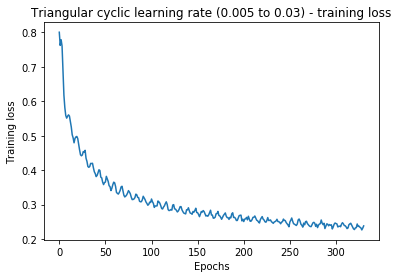

In [51]:
plt.figure()
plt.plot(model_state_triangular_clr_by_param['base'].history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Triangular cyclic learning rate (0.005 to 0.03) - training loss')
plt.savefig('graphs/new_base_model_triangular_clr_training_loss')

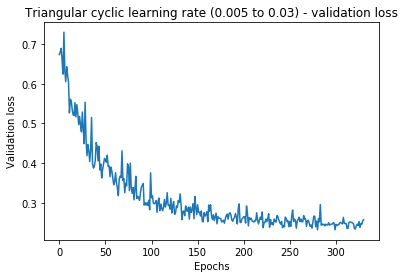

In [50]:
plt.figure()
plt.plot(model_state_triangular_clr_by_param['base'].history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Triangular cyclic learning rate (0.005 to 0.03) - validation loss')
plt.savefig('graphs/new_base_model_triangular_clr_val_loss')

In [53]:
print("Best training loss achieved: {}".format(np.min(model_state_triangular_clr_by_param['base'].history['loss'])))
print("Best val loss achieved: {}".format(np.min(model_state_triangular_clr_by_param['base'].history['val_loss'])))

Best training loss achieved: 0.2266869059145803
Best val loss achieved: 0.23176270503907986


## Compare all optimizers

In [73]:
def get_min_training_loss(filename):
    model_state_by_param = ml_utils.load_model_state(filename)
    return np.nanmin([np.min(state.history['loss']) for state in model_state_by_param.values()])

In [74]:
best_training_losses = [
    # SGD
    np.min([
        get_min_training_loss('optimizers/new_base_model_model_state_by_param_sgd'),
        get_min_training_loss('optimizers/new_base_model_model_state_by_param_sgd_2'),
        get_min_training_loss('optimizers/new_base_model_model_state_by_param_sgd_3')
    ]),
    # RMSprop
    get_min_training_loss('optimizers/new_base_model_model_state_by_param_rms'),
    # Adam
    np.min([
        get_min_training_loss('optimizers/new_base_model_model_state_by_param_adam'),
        get_min_training_loss('optimizers/new_base_model_model_state_by_param_adam_2'),
    ]),
    # Adagrad
    get_min_training_loss('optimizers/new_base_model_model_state_by_param_adagrad'),
    # CLR
    get_min_training_loss('optimizers/new_base_model_model_state_triangular_clr'),
]

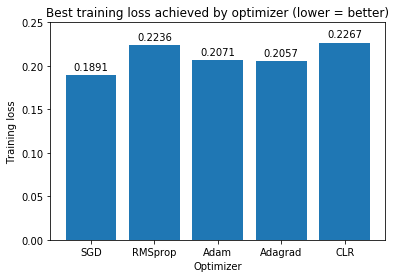

<Figure size 432x288 with 0 Axes>

In [75]:
fig, ax = plt.subplots()
rects = ax.bar(range(5), best_training_losses)
ax.set_xticks(range(5))
ax.set_ylabel('Training loss')
ax.set_xlabel('Optimizer')
ax.set_xticklabels(['SGD', 'RMSprop', 'Adam', 'Adagrad', 'CLR'])
ax.set_ylim([0, 0.25])
ax.set_title('Best training loss achieved by optimizer (lower = better)')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
plt.show()
plt.savefig('graphs/best_training_loss_by_optimizer')

In [65]:
def get_min_val_loss(filename):
    model_state_by_param = ml_utils.load_model_state(filename)
    return np.nanmin([np.min(state.history['val_loss']) for state in model_state_by_param.values()])

In [71]:
best_val_losses = [
    # SGD
    np.min([
        get_min_val_loss('optimizers/new_base_model_model_state_by_param_sgd'),
        get_min_val_loss('optimizers/new_base_model_model_state_by_param_sgd_2'),
        get_min_val_loss('optimizers/new_base_model_model_state_by_param_sgd_3')
    ]),
    # RMSprop
    get_min_val_loss('optimizers/new_base_model_model_state_by_param_rms'),
    # Adam
    np.min([
        get_min_val_loss('optimizers/new_base_model_model_state_by_param_adam'),
        get_min_val_loss('optimizers/new_base_model_model_state_by_param_adam_2'),
    ]),
    # Adagrad
    get_min_val_loss('optimizers/new_base_model_model_state_by_param_adagrad'),
    # CLR
    get_min_val_loss('optimizers/new_base_model_model_state_triangular_clr'),
]

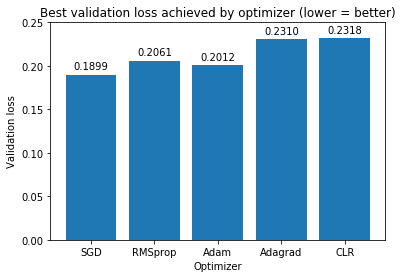

<Figure size 432x288 with 0 Axes>

In [72]:
fig, ax = plt.subplots()
rects = ax.bar(range(5), best_val_losses)
ax.set_xticks(range(5))
ax.set_ylabel('Validation loss')
ax.set_xlabel('Optimizer')
ax.set_xticklabels(['SGD', 'RMSprop', 'Adam', 'Adagrad', 'CLR'])
ax.set_ylim([0, 0.25])
ax.set_title('Best validation loss achieved by optimizer (lower = better)')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
plt.show()
plt.savefig('graphs/best_validation_loss_by_optimizer')

In [85]:
def get_max_training_accuracy(filename):
    model_state_by_param = ml_utils.load_model_state(filename)
    return np.max([np.max(state.history['accuracy']) for state in model_state_by_param.values()])

In [86]:
best_training_accuracies = [
    # SGD
    np.min([
        get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_sgd'),
        get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_sgd_2'),
        get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_sgd_3')
    ]),
    # RMSprop
    get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_rms'),
    # Adam
    np.min([
        get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_adam'),
        get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_adam_2'),
    ]),
    # Adagrad
    get_max_training_accuracy('optimizers/new_base_model_model_state_by_param_adagrad'),
    # CLR
    get_max_training_accuracy('optimizers/new_base_model_model_state_triangular_clr'),
]

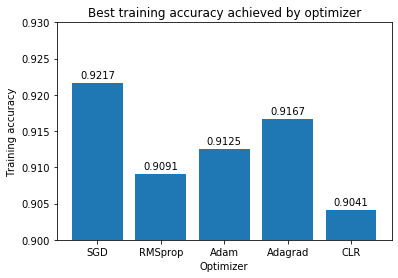

<Figure size 432x288 with 0 Axes>

In [87]:
fig, ax = plt.subplots()
rects = ax.bar(range(5), best_training_accuracies)
ax.set_xticks(range(5))
ax.set_ylabel('Training accuracy')
ax.set_xlabel('Optimizer')
ax.set_xticklabels(['SGD', 'RMSprop', 'Adam', 'Adagrad', 'CLR'])
ax.set_ylim([0.9, 0.93])
ax.set_title('Best training accuracy achieved by optimizer')
autolabel(rects)
plt.show()
plt.savefig('graphs/best_training_accuracy_by_optimizer')

In [76]:
def get_max_val_accuracy(filename):
    model_state_by_param = ml_utils.load_model_state(filename)
    return np.max([np.max(state.history['val_accuracy']) for state in model_state_by_param.values()])

In [78]:
best_val_accuracies = [
    # SGD
    np.min([
        get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_sgd'),
        get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_sgd_2'),
        get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_sgd_3')
    ]),
    # RMSprop
    get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_rms'),
    # Adam
    np.min([
        get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_adam'),
        get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_adam_2'),
    ]),
    # Adagrad
    get_max_val_accuracy('optimizers/new_base_model_model_state_by_param_adagrad'),
    # CLR
    get_max_val_accuracy('optimizers/new_base_model_model_state_triangular_clr'),
]

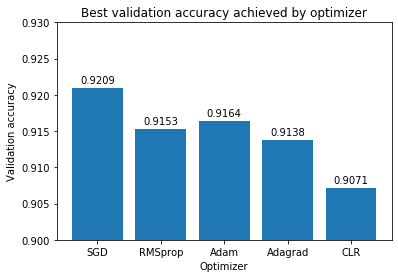

<Figure size 432x288 with 0 Axes>

In [83]:
fig, ax = plt.subplots()
rects = ax.bar(range(5), best_val_accuracies)
ax.set_xticks(range(5))
ax.set_ylabel('Validation accuracy')
ax.set_xlabel('Optimizer')
ax.set_xticklabels(['SGD', 'RMSprop', 'Adam', 'Adagrad', 'CLR'])
ax.set_ylim([0.9, 0.93])
ax.set_title('Best validation accuracy achieved by optimizer')
autolabel(rects)
plt.show()
plt.savefig('graphs/best_validation_accuracy_by_optimizer')

In [102]:
def get_num_epochs_for_val_loss_convergence(filename):
    model_state_by_param = ml_utils.load_model_state(filename)
    best_param = min([(min(state.history['val_loss']), key) for key, state in model_state_by_param.items()])[1]
    return np.argmin(model_state_by_param[best_param].history['val_loss'])

In [103]:
num_epochs_to_converge = [
    # SGD
    np.min([
        get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_sgd'),
        get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_sgd_2'),
        get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_sgd_3')
    ]),
    # RMSprop
    get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_rms'),
    # Adam
    np.min([
        get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_adam'),
        get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_adam_2'),
    ]),
    # Adagrad
    get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_by_param_adagrad'),
    # CLR
    get_num_epochs_for_val_loss_convergence('optimizers/new_base_model_model_state_triangular_clr'),
]

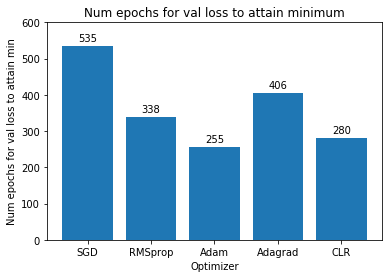

<Figure size 432x288 with 0 Axes>

In [118]:
def autolabel_int(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:d}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig, ax = plt.subplots()
rects = ax.bar(range(5), num_epochs_to_converge)
ax.set_xticks(range(5))
ax.set_ylabel('Num epochs for val loss to attain min')
ax.set_xlabel('Optimizer')
ax.set_xticklabels(['SGD', 'RMSprop', 'Adam', 'Adagrad', 'CLR'])
ax.set_ylim(0, 600)
ax.set_title('Num epochs for val loss to attain minimum')
autolabel_int(rects)
plt.show()
plt.savefig('graphs/convergence_epochs_by_optimizer')